# Benchmarking Field Transformation HMC

### DONE - FT-HMC implemented for 8x8 2D QED (using SiLU as activation function).

- [x] Try to minimize size of the force in training. No significant improvements.
- [x]  Some test on ergodicity
- [x] (calculate the probablity of generating the configs obtained via conventional HMC).

### TODO

- [ ] Plot the force size distribution 
- [ ] Is the large force from the original action or Field-Transformation the determinant?
- [ ] If from the determinant, then the fermion force won't cause problem for HMC
- [ ] Use the same Field-Transformation for larger system (say 16x16, 32x32, 64x64, etc)
- [ ] Study how the delta H depends on the system size ( perhaps delta H ~ sqrt(volume) )
- [ ] Study the auto-correlation for observables, topo, plaq, flowed plaq, etc.
- [ ] Improving the Field-Transformation to reduce force.

In [2]:
%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format ='retina'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import torch
import math
import sys
import os
from timeit import default_timer as timer
from functools import reduce

In [4]:
project_dir = os.path.abspath('../../')
if project_dir not in sys.path:
    sys.path.append(project_dir)
    
    
from utils.param import Param
import utils.io as io
logger = io.Logger(156)

In [5]:
torch.manual_seed(9)

#torch.set_num_threads(param.nth)
#torch.set_num_interop_threads(param.nth_interop)
#os.environ["OMP_NUM_THREADS"] = str(param.nth)
#os.environ["KMP_BLOCKTIME"] = "0"
#os.environ["KMP_SETTINGS"] = "1"
#os.environ["KMP_AFFINITY"]= "granularity=fine,verbose,compact,1,0"

#torch.set_default_tensor_type(torch.DoubleTensor)

# Define `Param` specifying lattice and MCMC params

In [6]:
param=Param(
    beta=2.0,
    L=8,
    #lat=(16, 16),
    tau=0.5, # 0.3
    nstep=10, # 3
    nrun=10,
    randinit=True,
    # ADJUST ME
    ntraj=256, # 2**16 # 2**10 # 2**15
    nprint=10,
    seed=1331,
)

logger.log(repr(param))

[13:00:58]  Param:                                                                                                                                          
            ----------------                                                                                                                                
            beta=2.0                                                                                                                                        
            L=8                                                                                                                                             
            tau=0.5                                                                                                                                         
            nstep=10                                                                                                                                        
            ntraj=256                                                                                                                                       
            nrun=10                                                                                                                                         
            nprint=10                                                                                                                                       
            seed=1331                                                                                                                                       
            randinit=True                                                                                                                                   
            nth=2                                                                                                                                           
            nth_interop=2                                                                                                                                   
            lat=[8, 8]                                                                                                                                      
            nd=2                                                                                                                                            
            shape=[2, 8, 8]                                                                                                                                 
            volume=64                                                                                                                                       
            dt=0.05

In [7]:
from train import run as hmc_run


import datetime

NOW = io.get_timestamp('%Y-%m-%d')
OUTDIR = os.path.join(os.getcwd(), 'outputs', NOW)

param_dir = os.path.join(OUTDIR, param.uniquestr())
if not os.path.isdir(OUTDIR):
    os.makedirs(OUTDIR)

fields, metrics = hmc_run(param, logger=logger)

metrics_dir = os.path.join(OUTDIR, 'metrics', 'hmc')
metrics_file = os.path.join(metrics_dir, 'metrics.z')
io.savez(metrics, metrics_file)

Duplicate key in file PosixPath('/home/foremans/.config/matplotlib/stylelib/dark_jupyter.mplstyle'), line 92 ('figure.facecolor: 474747')
Duplicate key in file PosixPath('/home/foremans/.config/matplotlib/stylelib/dark_jupyter.mplstyle'), line 93 ('figure.edgecolor: 0.50')
In /home/foremans/.config/matplotlib/stylelib/dark_jupyter.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.


TORCH DEVICE: cuda


[13:01:19]  Param:                                                                                                                                          
            ----------------                                                                                                                                
            beta=2.0                                                                                                                                        
            L=8                                                                                                                                             
            tau=0.5                                                                                                                                         
            nstep=10                                                                                                                                        
            ntraj=256                                                                                                                                       
            nrun=10                                                                                                                                         
            nprint=10                                                                                                                                       
            seed=1331                                                                                                                                       
            randinit=True                                                                                                                                   
            nth=2                                                                                                                                           
            nth_interop=2                                                                                                                                   
            lat=[8, 8]                                                                                                                                      
            nd=2                                                                                                                                            
            shape=[2, 8, 8]                                                                                                                                 
            volume=64                                                                                                                                       
            dt=0.05

            plaq=-0.0114 charge=2

            traj=25    accept=True  dH=0.04951 expdH=0.9517 plaq=0.7591 charge=-1

            traj=50    accept=True  dH=-0.07879 expdH=1.082 plaq=0.6615 charge=0

            traj=75    accept=True  dH=0.04549 expdH=0.9555 plaq=0.7985 charge=0

            traj=100   accept=True  dH=-0.03832 expdH=1.039 plaq=0.6903 charge=0

[13:01:20]  traj=125   accept=True  dH=0.001167 expdH=0.9988 plaq=0.6832 charge=-2

            traj=150   accept=True  dH=-0.0005722 expdH=1.001 plaq=0.6817 charge=0

            traj=175   accept=True  dH=-0.03914 expdH=1.04  plaq=0.7236 charge=-1

            traj=200   accept=True  dH=0.05721 expdH=0.9444 plaq=0.7283 charge=-1

            traj=225   accept=True  dH=-0.03278 expdH=1.033 plaq=0.6615 charge=1

            traj=250   accept=True  dH=-0.01498 expdH=1.015 plaq=0.7237 charge=-1

[13:01:21]  traj=281   accept=True  dH=0.02029 expdH=0.9799 plaq=0.7201 charge=0

            traj=306   accept=True  dH=0.02369 expdH=0.9766 plaq=0.7343 charge=0

            traj=331   accept=True  dH=-0.003036 expdH=1.003 plaq=0.7462 charge=1

            traj=356   accept=True  dH=0.05914 expdH=0.9426 plaq=0.7768 charge=-1

            traj=381   accept=True  dH=0.02647 expdH=0.9739 plaq=0.6768 charge=0

            traj=406   accept=True  dH=0.006287 expdH=0.9937 plaq=0.769 charge=1

            traj=431   accept=True  dH=0.05963 expdH=0.9421 plaq=0.7216 charge=0

[13:01:22]  traj=456   accept=True  dH=0.01802 expdH=0.9821 plaq=0.7829 charge=0

            traj=481   accept=True  dH=-0.005932 expdH=1.006 plaq=0.7262 charge=1

            traj=506   accept=True  dH=-0.02955 expdH=1.03  plaq=0.6298 charge=0

            traj=537   accept=True  dH=0.00528 expdH=0.9947 plaq=0.6896 charge=2

            traj=562   accept=True  dH=0.0111 expdH=0.989 plaq=0.703 charge=0

            traj=587   accept=True  dH=0.01835 expdH=0.9818 plaq=0.6771 charge=-1

[13:01:23]  traj=612   accept=True  dH=0.05044 expdH=0.9508 plaq=0.7632 charge=0

            traj=637   accept=True  dH=-0.02444 expdH=1.025 plaq=0.697 charge=2

            traj=662   accept=True  dH=0.01684 expdH=0.9833 plaq=0.6877 charge=0

            traj=687   accept=True  dH=-0.007301 expdH=1.007 plaq=0.7397 charge=0

            traj=712   accept=True  dH=-0.02868 expdH=1.029 plaq=0.6603 charge=0

            traj=737   accept=True  dH=0.03358 expdH=0.967 plaq=0.7592 charge=0

            traj=762   accept=True  dH=0.04175 expdH=0.9591 plaq=0.6629 charge=0

[13:01:24]  traj=793   accept=True  dH=-0.02207 expdH=1.022 plaq=0.6809 charge=0

            traj=818   accept=True  dH=0.005318 expdH=0.9947 plaq=0.6687 charge=0

            traj=843   accept=True  dH=-0.001041 expdH=1.001 plaq=0.7367 charge=0

            traj=868   accept=True  dH=-0.01995 expdH=1.02  plaq=0.7225 charge=1

            traj=893   accept=True  dH=-0.04877 expdH=1.05  plaq=0.6871 charge=0

            traj=918   accept=True  dH=-0.03359 expdH=1.034 plaq=0.6455 charge=0

[13:01:25]  traj=943   accept=True  dH=-0.01045 expdH=1.011 plaq=0.5988 charge=1

            traj=968   accept=True  dH=0.004299 expdH=0.9957 plaq=0.6799 charge=-2

            traj=993   accept=True  dH=0.01972 expdH=0.9805 plaq=0.7164 charge=0

            traj=1018  accept=True  dH=0.01925 expdH=0.9809 plaq=0.7089 charge=2

            traj=1049  accept=True  dH=0.03075 expdH=0.9697 plaq=0.7827 charge=0

            traj=1074  accept=True  dH=-0.0332 expdH=1.034 plaq=0.7622 charge=0

[13:01:26]  traj=1099  accept=True  dH=0.01974 expdH=0.9805 plaq=0.7002 charge=0

            traj=1124  accept=True  dH=0.01951 expdH=0.9807 plaq=0.777 charge=0

            traj=1149  accept=True  dH=-0.02039 expdH=1.021 plaq=0.7056 charge=1

            traj=1174  accept=True  dH=0.002014 expdH=0.998 plaq=0.7413 charge=0

            traj=1199  accept=True  dH=0.01356 expdH=0.9865 plaq=0.6448 charge=3

            traj=1224  accept=True  dH=0.02886 expdH=0.9716 plaq=0.816 charge=1

            traj=1249  accept=True  dH=0.01638 expdH=0.9837 plaq=0.7316 charge=0

[13:01:27]  traj=1274  accept=True  dH=-0.03129 expdH=1.032 plaq=0.6012 charge=0

            traj=1305  accept=True  dH=0.02386 expdH=0.9764 plaq=0.6228 charge=1

            traj=1330  accept=True  dH=0.01346 expdH=0.9866 plaq=0.7156 charge=0

            traj=1355  accept=True  dH=-0.02406 expdH=1.024 plaq=0.7038 charge=1

            traj=1380  accept=True  dH=0.008476 expdH=0.9916 plaq=0.6707 charge=-1

            traj=1405  accept=True  dH=-0.009071 expdH=1.009 plaq=0.7174 charge=0

[13:01:28]  traj=1430  accept=True  dH=-0.009758 expdH=1.01  plaq=0.6779 charge=0

            traj=1455  accept=True  dH=-0.01884 expdH=1.019 plaq=0.7332 charge=0

            traj=1480  accept=True  dH=-0.002491 expdH=1.002 plaq=0.6855 charge=0

            traj=1505  accept=True  dH=0.004742 expdH=0.9953 plaq=0.7615 charge=1

            traj=1530  accept=True  dH=0.0175 expdH=0.9827 plaq=0.7968 charge=1

            traj=1561  accept=True  dH=-0.01437 expdH=1.014 plaq=0.724 charge=0

[13:01:29]  traj=1586  accept=True  dH=-0.001171 expdH=1.001 plaq=0.6369 charge=0

            traj=1611  accept=True  dH=-0.05331 expdH=1.055 plaq=0.6617 charge=0

            traj=1636  accept=True  dH=-0.008434 expdH=1.008 plaq=0.7853 charge=0

            traj=1661  accept=True  dH=0.01475 expdH=0.9854 plaq=0.7374 charge=1

            traj=1686  accept=True  dH=0.004238 expdH=0.9958 plaq=0.7659 charge=0

            traj=1711  accept=True  dH=0.02634 expdH=0.974 plaq=0.7271 charge=0

            traj=1736  accept=True  dH=0.04187 expdH=0.959 plaq=0.7619 charge=0

[13:01:30]  traj=1761  accept=True  dH=0.0249 expdH=0.9754 plaq=0.7122 charge=0

            traj=1786  accept=True  dH=0.005634 expdH=0.9944 plaq=0.6467 charge=0

            traj=1817  accept=True  dH=0.01464 expdH=0.9855 plaq=0.7319 charge=-2

            traj=1842  accept=True  dH=-0.04268 expdH=1.044 plaq=0.61  charge=0

            traj=1867  accept=True  dH=-0.02362 expdH=1.024 plaq=0.7303 charge=0

            traj=1892  accept=True  dH=0.0219 expdH=0.9783 plaq=0.7215 charge=-1

[13:01:31]  traj=1917  accept=True  dH=-0.02016 expdH=1.02  plaq=0.6203 charge=0

            traj=1942  accept=True  dH=0.06376 expdH=0.9382 plaq=0.8345 charge=0

            traj=1967  accept=True  dH=0.007027 expdH=0.993 plaq=0.7847 charge=1

            traj=1992  accept=True  dH=-0.0056 expdH=1.006 plaq=0.8004 charge=1

            traj=2017  accept=True  dH=0.01919 expdH=0.981 plaq=0.7454 charge=0

            traj=2042  accept=True  dH=0.02164 expdH=0.9786 plaq=0.7117 charge=0

[13:01:32]  traj=2073  accept=True  dH=-0.02753 expdH=1.028 plaq=0.7011 charge=0

            traj=2098  accept=True  dH=0.01879 expdH=0.9814 plaq=0.745 charge=1

            traj=2123  accept=True  dH=0.001045 expdH=0.999 plaq=0.6345 charge=1

            traj=2148  accept=True  dH=-0.007317 expdH=1.007 plaq=0.6496 charge=1

            traj=2173  accept=True  dH=-0.002533 expdH=1.003 plaq=0.7545 charge=-1

            traj=2198  accept=True  dH=-0.08759 expdH=1.092 plaq=0.6122 charge=0

            traj=2223  accept=True  dH=-0.02834 expdH=1.029 plaq=0.6249 charge=2

[13:01:33]  traj=2248  accept=True  dH=0.01683 expdH=0.9833 plaq=0.667 charge=0

            traj=2273  accept=True  dH=-0.001823 expdH=1.002 plaq=0.6903 charge=1

            traj=2298  accept=True  dH=0.006107 expdH=0.9939 plaq=0.6429 charge=0

            traj=2329  accept=True  dH=0.01398 expdH=0.9861 plaq=0.6843 charge=1

            traj=2354  accept=True  dH=0.03435 expdH=0.9662 plaq=0.7182 charge=0

            traj=2379  accept=True  dH=-0.00124 expdH=1.001 plaq=0.7024 charge=0

[13:01:34]  traj=2404  accept=True  dH=0.001499 expdH=0.9985 plaq=0.7117 charge=0

            traj=2429  accept=True  dH=0.02451 expdH=0.9758 plaq=0.7727 charge=-1

            traj=2454  accept=True  dH=0.03992 expdH=0.9609 plaq=0.6727 charge=1

            traj=2479  accept=True  dH=-0.02517 expdH=1.025 plaq=0.7149 charge=0

            traj=2504  accept=False dH=0.0116 expdH=0.9885 plaq=0.6546 charge=0

            traj=2529  accept=True  dH=-0.03695 expdH=1.038 plaq=0.7092 charge=0

            traj=2554  accept=True  dH=-0.00573 expdH=1.006 plaq=0.6876 charge=0

[13:01:35]  Run times: [1.5743083953857422, 1.5736634731292725, 1.56732177734375, 1.5727653503417969, 1.5606684684753418, 1.569014310836792,                
            1.5733227729797363, 1.5671639442443848, 1.5760860443115234, 1.5592598915100098]

            Per trajectory: [0.006149642169475555, 0.0061471229419112206, 0.0061223506927490234, 0.006143614649772644, 0.006096361204981804,                
            0.006128962151706219, 0.006145792081952095, 0.006121734157204628, 0.006156586110591888, 0.006090858951210976]

[13:01:35]  Saving <class 'dict'> to /lus/grand/projects/DLHMC/nftqcd/fthmc/flow_test_sam/notebooks/outputs/2021-05-20/metrics/hmc/metrics.z.

## Helper functions for training model

In [15]:
import time
import utils.qed_helpers as qed
from typing import Callable

import torch.nn as nn

from utils.layers import make_u1_equiv_layers, set_weights
from utils.distributions import MultivariateUniform, bootstrap, calc_dkl, calc_ess
from utils.samplers import make_mcmc_ensemble, apply_flow_to_prior

from utils.plot_helpers import (init_live_joint_plots, update_joint_plots,
                                init_live_plot, update_plot)

grab = qed.grab

def train_step(
        model,
        action,
        optimizer,
        #metrics,
        batch_size,
        with_force=False,
        pre_model=None,
        verbose=True,
        era=None,
        epoch=None,
        #gamma=None,  # annealing factor, should be in [0, 1]
):
    t0 = time.time()
    layers, prior = model['layers'], model['prior']
    optimizer.zero_grad()
    
    xi = None
    if pre_model != None:
        pre_layers, pre_prior = pre_model['layers'], pre_model['prior']
        pre_xi = pre_prior.sample_n(batch_size)
        x = qed.ft_flow(pre_layers, pre_xi)
        xi = qed.ft_flow_inv(layers, x)
        
    xi, x, logq = apply_flow_to_prior(prior, layers, batch_size=batch_size, xi=xi)#, gamma=gamma)
    logp = -action(x)
    
    force_size = torch.tensor(0.0)
    dkl = calc_dkl(logp, logq)
    loss_force = torch.tensor(0.0)
    loss_dkl = torch.tensor(0.0)
    if with_force:
        assert pre_model != None
        force = qed.ft_force(param, layers, xi, True)
        force_size = torch.sum(torch.square(force))
        loss_force = force_size
        loss_force.backward()
    else:
        loss_dkl = dkl
        loss_dkl.backward()
        
    #loss.backward()
    #
    # minimization target
    # loss mini
    # -> (logq - logp) mini
    # -> (action - logJ) mini
    #
    optimizer.step()
    ess = calc_ess(logp, logq)
    batch_metrics = {
        'dt': time.time() - t0,
        #'loss': grab(loss),
        'loss_force': grab(loss_force),
        'loss': grab(loss_dkl),
        'force': grab(force_size),
        'dkl': grab(dkl),
        'logp': grab(logp),
        'logq': grab(logq),
        'ess': grab(ess),
        'force_norm': grab(torch.linalg.norm(qed.ft_force(param, layers, xi))),
    }
    #if verbose:
    #    io.print_metrics(batch_metrics)
    #    #ioprint_metrics(batch_metrics, era=era, epoch=epoch)
        
    return batch_metrics
        
                
                
def update_history(history, metrics, extras=None):
    if extras is not None:
        for key, val in extras.items():
            try:
                history[key].append(val)
            except KeyError:
                history[key] = [val]
                
    for key, val in metrics.items():
        try:
            history[key].append(val)
        except KeyError:
            history[key] = [val]

    return history


from dataclasses import dataclass
        
            
def flow_train(
    param,
    n_era=10,
    n_epoch=100,
    n_layers=24,
    n_s_nets=2,
    hidden_sizes=[8, 8],
    kernel_size=3,
    base_lr=0.001,
    batch_size=64,
    print_freq=10,
    plot_freq=20,
    with_force=False,
    pre_model=None
):  # packaged from original ipynb by Xiao-Yong Jin
    # Theory
    lattice_shape = tuple(param.lat)
    link_shape = (2,*param.lat)
    beta = param.beta
    #u1_action = U1GaugeAction(beta)
    u1_action = qed.BatchAction(param.beta)
    # Model
    prior = MultivariateUniform(torch.zeros(link_shape), 2*np.pi*torch.ones(link_shape))
    
    layers = make_u1_equiv_layers(lattice_shape=lattice_shape,
                                  n_layers=n_layers,
                                  n_mixture_comps=n_s_nets,
                                  hidden_sizes=hidden_sizes,
                                  kernel_size=kernel_size)
    set_weights(layers)
    
    model = {'layers': layers, 'prior': prior}
    
    # Training
    optimizer = torch.optim.Adam(model['layers'].parameters(), lr=base_lr)
    optimizer_wf = torch.optim.Adam(model['layers'].parameters(), lr=base_lr / 100.0)
    #
    history = {
        'era': [], 'epoch': [],
        'dt': [], 'force' : [], 'force_norm': [], 'ess' : [],
        'dkl' : [], 'logp' : [], 'logq' : [],
        'loss': [], 'loss_force': [],
    }
                
    dt = 0.0
    history.update({'loss': []})
    plots = init_live_joint_plots(n_era, n_epoch, dpi=125, figsize=(4, 3), param=param)
    
    if with_force:
        y_label = ['ESS', 'loss_force']
        force_plots = init_live_joint_plots(n_era, n_epoch, dpi=125, figsize=(4, 3), param=param, y_label=y_label)
        force_optimizer = torch.optim.Adam(model['layers'].parameters(),
                                           lr=base_lr / 100.0, weight_decay=1e-5)
        history.update({
            'loss_force': [], 
        })
        
    for era in range(n_era):
        t0 = time.time()
        #console.rule(f'ERA: {era} (last took: {int(dt // 60)} min {dt % 60:.4g}s)', style='bright_yellow')
        logger.rule(f'ERA={era} (last took: {int(dt // 60)} min {dt % 60:.4g}s)', style='bright_yellow')
        for epoch in range(n_epoch):
            if with_force:
                batch_metrics = train_step(model, u1_action, optimizer_wf, #history,
                                           batch_size, with_force=with_force, pre_model=pre_model,
                                           verbose=(epoch%print_freq==0), era=era, epoch=epoch)
            else:
                batch_metrics = train_step(model, u1_action, optimizer, #history,
                                           batch_size, era=era, epoch=epoch,
                                           verbose=(epoch%print_freq==0))
                
            history = update_history(history, batch_metrics,
                                     extras={'era': era, 'epoch': epoch})
                
            if (epoch + 1) % param.nprint == 0:
                running_avgs = io.running_averages(history,
                                                   n_epochs=min(epoch, 5))
                io.print_metrics(running_avgs, logger=logger)
                
            if epoch % plot_freq == 0:
                if with_force:
                    update_joint_plots(history, alt_loss='loss_force', **force_plots)
                    
                update_joint_plots(history, **plots)
        
        dt = time.time() - t0
        
    outputs = {
        'model': model,
        'history': history,
        'action': u1_action,
    }
    
    return outputs


ActionFn = Callable[[float], torch.Tensor]


def generate_ensemble(
    model: nn.Module,
    u1_action: ActionFn = qed.BatchAction,
    ensemble_size: int = 1024,
    batch_size: int = 64,
    nboot: int = 100,
    binsize: int = 16,
):
    """Calculate the topological susceptibility.
    
    Packaged from original ipynb by Xiao-Yong Jin.
    """
    u1_ens = make_mcmc_ensemble(model, u1_action, batch_size, ensemble_size)
    charge = qed.grab(qed.topo_charge(torch.stack(u1_ens['x'], axis=0)))
    x_mean, x_err = bootstrap(charge**2, nboot=nboot, binsize=16)
    
    logger.log(f'Accept rate: {np.mean(u1_ens["accepted"])}')
    logger.log(f'Topological susceptibility = {x_mean:.5f} +/- {x_err:.5f}')
    #logger.log(f'... vs HMC estimate = 1.23 +/- 0.02')
    return {
        'u1_ens': u1_ens,
        'charge': charge,
        'suscept_mean': x_mean,
        'suscept_err': x_err,
    }
    return outputs

## Train model without force:

In [ ]:
with mpl.rc_context({
    'figure.figsize': (4, 3),
    'legend.labelspacing': 0.2, # 0.5
    'legend.handletextpad': 0.3,  # 0.8
    'text.usetex': False,
    'text.latex.preamble': (            # LaTeX preamble
        r'\usepackage{amsfonts}'
    )
}):

In [10]:
import matplotlib as mpl

mpl.rc_param.update({'text.usetex': False})

AttributeError: module 'matplotlib' has no attribute 'rc_param'

In [11]:
mpl.rcParams['text.usetex'] = False
#mpl.rcParams['lines.linestyle'] = '--'

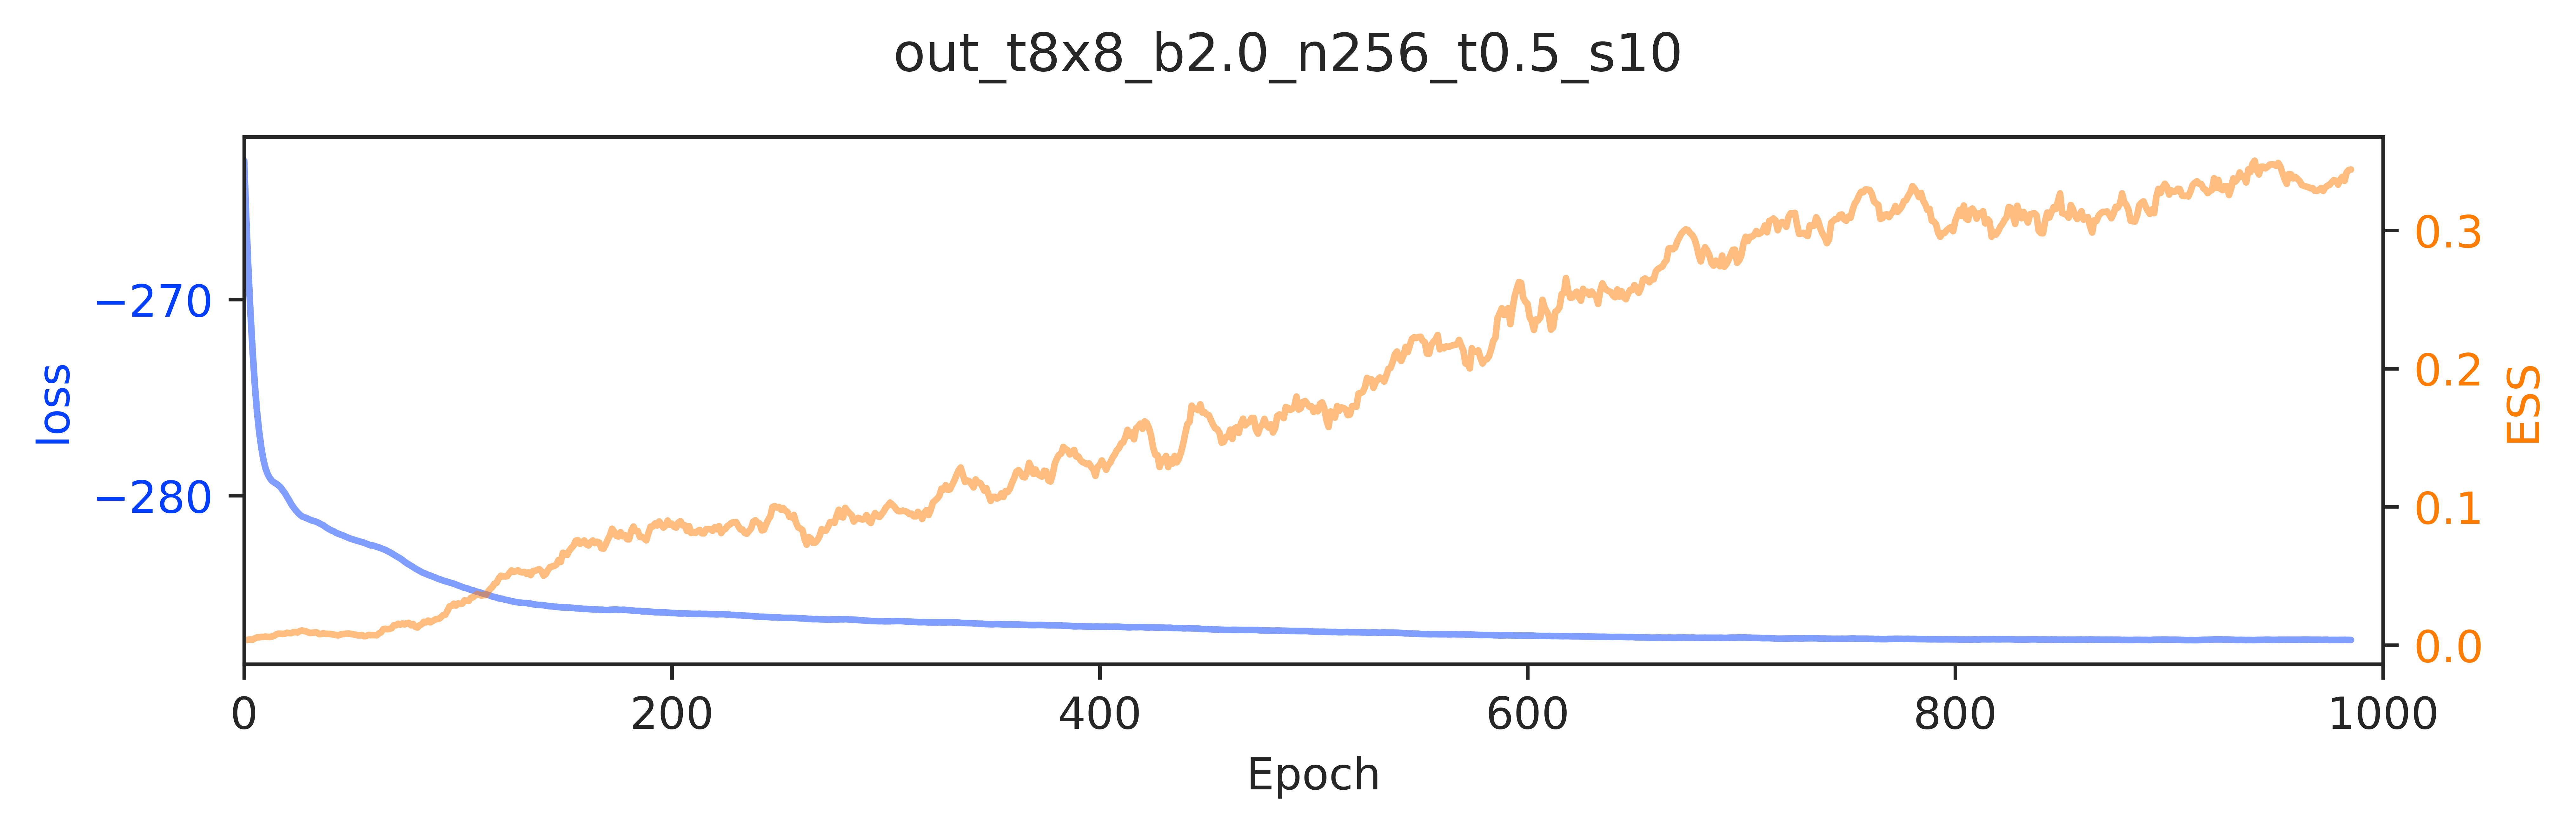

[04:21:09]  ------------------------------------------------------------ ERA=0, last took: 0 min 0 s                                                        
            ------------------------------------------------------------

/lus/grand/projects/DLHMC/conda/pytorch/2021-05-12/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/lus/grand/projects/DLHMC/conda/pytorch/2021-05-12/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[04:21:13]  era=0     epoch=7     dt=0.32  ess=0.00337051 loss=-265.891 loss_force=0     force=nan   force_norm=636.039 dkl=-265.891 logp=37.3084           
            logq=-228.583 force_size=404569

[04:21:17]  era=0     epoch=17    dt=0.3199 ess=0.00570755 loss=-279.161 loss_force=0     force=nan   force_norm=808.026 dkl=-279.161 logp=79.0664          
            logq=-200.095 force_size=653597

[04:21:21]  era=0     epoch=27    dt=0.3199 ess=0.0101244 loss=-280.387 loss_force=0     force=nan   force_norm=780.277 dkl=-280.387 logp=78.4488           
            logq=-201.938 force_size=609246

[04:21:26]  era=0     epoch=37    dt=0.32  ess=0.00784539 loss=-281.04 loss_force=0     force=nan   force_norm=681.595 dkl=-281.04 logp=69.4465             
            logq=-211.594 force_size=464585

[04:21:30]  era=0     epoch=47    dt=0.3196 ess=0.00566982 loss=-281.771 loss_force=0     force=nan   force_norm=705.014 dkl=-281.771 logp=73.6408          
            logq=-208.13 force_size=497130

[04:21:34]  era=0     epoch=57    dt=0.3206 ess=0.00884337 loss=-282.161 loss_force=0     force=nan   force_norm=728.342 dkl=-282.161 logp=77.3937          
            logq=-204.767 force_size=530501

[04:21:39]  era=0     epoch=67    dt=0.3203 ess=0.00566218 loss=-282.536 loss_force=0     force=nan   force_norm=696.735 dkl=-282.536 logp=75.8457          
            logq=-206.69 force_size=485466

[04:21:43]  era=0     epoch=77    dt=0.3207 ess=0.0198174 loss=-282.981 loss_force=0     force=nan   force_norm=688.7 dkl=-282.981 logp=77.0012 logq=-205.98
            force_size=474350

[04:21:48]  era=0     epoch=87    dt=0.3205 ess=0.0103959 loss=-283.743 loss_force=0     force=nan   force_norm=672.125 dkl=-283.743 logp=78.4823           
            logq=-205.26 force_size=451782

[04:21:52]  era=0     epoch=97    dt=0.321 ess=0.0241282 loss=-284.215 loss_force=0     force=nan   force_norm=672.627 dkl=-284.215 logp=80.3805            
            logq=-203.834 force_size=452519

[04:21:53]  ---------------------------------------------------------- ERA=1, last took: 0 min 43.68 s                                                      
            ----------------------------------------------------------

[04:21:56]  era=1     epoch=7     dt=0.3195 ess=0.0320043 loss=-284.57 loss_force=0     force=nan   force_norm=663   dkl=-284.57 logp=80.9577 logq=-203.612 
            force_size=439598

[04:22:01]  era=1     epoch=17    dt=0.3204 ess=0.0229267 loss=-284.948 loss_force=0     force=nan   force_norm=634.325 dkl=-284.948 logp=81.2888           
            logq=-203.659 force_size=402417

[04:22:05]  era=1     epoch=27    dt=0.32  ess=0.0531612 loss=-285.284 loss_force=0     force=nan   force_norm=631.823 dkl=-285.284 logp=82.5914            
            logq=-202.693 force_size=399215

[04:22:09]  era=1     epoch=37    dt=0.3205 ess=0.057064 loss=-285.47 loss_force=0     force=nan   force_norm=629.503 dkl=-285.47 logp=83.1304 logq=-202.34 
            force_size=396357

[04:22:14]  era=1     epoch=47    dt=0.3203 ess=0.0543815 loss=-285.615 loss_force=0     force=nan   force_norm=622.326 dkl=-285.615 logp=83.5773           
            logq=-202.038 force_size=387298

[04:22:18]  era=1     epoch=57    dt=0.3202 ess=0.0702293 loss=-285.768 loss_force=0     force=nan   force_norm=615.756 dkl=-285.768 logp=83.8948           
            logq=-201.873 force_size=379186

[04:22:23]  era=1     epoch=67    dt=0.3203 ess=0.0748935 loss=-285.752 loss_force=0     force=nan   force_norm=609.471 dkl=-285.752 logp=83.8113           
            logq=-201.941 force_size=371544

[04:22:27]  era=1     epoch=77    dt=0.3202 ess=0.0869339 loss=-285.836 loss_force=0     force=nan   force_norm=597.565 dkl=-285.836 logp=83.9353           
            logq=-201.901 force_size=357203

[04:22:31]  era=1     epoch=87    dt=0.321 ess=0.0687169 loss=-285.815 loss_force=0     force=nan   force_norm=613.12 dkl=-285.815 logp=84.0077             
            logq=-201.807 force_size=375986

[04:22:36]  era=1     epoch=97    dt=0.3212 ess=0.0848185 loss=-285.935 loss_force=0     force=nan   force_norm=602.421 dkl=-285.935 logp=84.2054           
            logq=-201.729 force_size=362935

[04:22:37]  ---------------------------------------------------------- ERA=2, last took: 0 min 43.79 s                                                      
            ----------------------------------------------------------

[04:22:40]  era=2     epoch=7     dt=0.3205 ess=0.0856777 loss=-286.014 loss_force=0     force=nan   force_norm=597.372 dkl=-286.014 logp=84.267            
            logq=-201.747 force_size=356904

[04:22:45]  era=2     epoch=17    dt=0.3216 ess=0.0875312 loss=-285.988 loss_force=0     force=nan   force_norm=606.142 dkl=-285.988 logp=84.4052           
            logq=-201.583 force_size=367482

[04:22:49]  era=2     epoch=27    dt=0.321 ess=0.0834306 loss=-286.048 loss_force=0     force=nan   force_norm=605.542 dkl=-286.048 logp=84.5209            
            logq=-201.527 force_size=366727

[04:22:53]  era=2     epoch=37    dt=0.3216 ess=0.0682643 loss=-286.097 loss_force=0     force=nan   force_norm=605.418 dkl=-286.097 logp=84.5702           
            logq=-201.527 force_size=366591

[04:22:58]  era=2     epoch=47    dt=0.321 ess=0.0753637 loss=-286.15 loss_force=0     force=nan   force_norm=613.402 dkl=-286.15 logp=84.6584 logq=-201.492
            force_size=376297

[04:23:02]  era=2     epoch=57    dt=0.3209 ess=0.103811 loss=-286.233 loss_force=0     force=nan   force_norm=608.656 dkl=-286.233 logp=84.8816            
            logq=-201.352 force_size=370611

[04:23:06]  era=2     epoch=67    dt=0.3208 ess=0.0711702 loss=-286.251 loss_force=0     force=nan   force_norm=611.596 dkl=-286.251 logp=84.5753           
            logq=-201.676 force_size=374071

[04:23:11]  era=2     epoch=77    dt=0.3212 ess=0.0812973 loss=-286.319 loss_force=0     force=nan   force_norm=622.771 dkl=-286.319 logp=84.961            
            logq=-201.358 force_size=387998

[04:23:15]  era=2     epoch=87    dt=0.3208 ess=0.0941168 loss=-286.315 loss_force=0     force=nan   force_norm=623.067 dkl=-286.315 logp=85.0647           
            logq=-201.25 force_size=388315

[04:23:20]  era=2     epoch=97    dt=0.3209 ess=0.0826537 loss=-286.369 loss_force=0     force=nan   force_norm=624.298 dkl=-286.369 logp=85.1093           
            logq=-201.26 force_size=390090

[04:23:21]  ---------------------------------------------------------- ERA=3, last took: 0 min 43.91 s                                                      
            ----------------------------------------------------------

[04:23:24]  era=3     epoch=7     dt=0.321 ess=0.103847 loss=-286.406 loss_force=0     force=nan   force_norm=625.191 dkl=-286.406 logp=85.0516             
            logq=-201.354 force_size=390886

[04:23:28]  era=3     epoch=17    dt=0.3214 ess=0.0953088 loss=-286.395 loss_force=0     force=nan   force_norm=631.907 dkl=-286.395 logp=85.2059           
            logq=-201.189 force_size=399326

[04:23:33]  era=3     epoch=27    dt=0.3214 ess=0.0951246 loss=-286.49 loss_force=0     force=nan   force_norm=626.019 dkl=-286.49 logp=85.1002             
            logq=-201.389 force_size=392080

[04:23:37]  era=3     epoch=37    dt=0.3216 ess=0.139929 loss=-286.47 loss_force=0     force=nan   force_norm=639.156 dkl=-286.47 logp=85.0736 logq=-201.396
            force_size=408586

[04:23:42]  era=3     epoch=47    dt=0.3211 ess=0.13587 loss=-286.512 loss_force=0     force=nan   force_norm=659.589 dkl=-286.512 logp=85.5438             
            logq=-200.968 force_size=435098

[04:23:46]  era=3     epoch=57    dt=0.3211 ess=0.10517 loss=-286.586 loss_force=0     force=nan   force_norm=643.75 dkl=-286.586 logp=85.631 logq=-200.955 
            force_size=414574

[04:23:50]  era=3     epoch=67    dt=0.3208 ess=0.10408 loss=-286.545 loss_force=0     force=nan   force_norm=641.798 dkl=-286.545 logp=85.2684             
            logq=-201.276 force_size=412197

[04:23:55]  era=3     epoch=77    dt=0.3215 ess=0.113914 loss=-286.628 loss_force=0     force=nan   force_norm=631.714 dkl=-286.628 logp=85.4273            
            logq=-201.201 force_size=399288

[04:23:59]  era=3     epoch=87    dt=0.3214 ess=0.142138 loss=-286.623 loss_force=0     force=nan   force_norm=646.433 dkl=-286.623 logp=85.4443            
            logq=-201.179 force_size=417982

[04:24:04]  era=3     epoch=97    dt=0.3218 ess=0.138876 loss=-286.645 loss_force=0     force=nan   force_norm=651.362 dkl=-286.645 logp=85.3851            
            logq=-201.26 force_size=424399

[04:24:05]  ----------------------------------------------------------- ERA=4, last took: 0 min 44.2 s                                                      
            -----------------------------------------------------------

[04:24:08]  era=4     epoch=7     dt=0.3213 ess=0.126552 loss=-286.699 loss_force=0     force=nan   force_norm=653.732 dkl=-286.699 logp=85.7385            
            logq=-200.961 force_size=427536

[04:24:13]  era=4     epoch=17    dt=0.3217 ess=0.134292 loss=-286.715 loss_force=0     force=nan   force_norm=668.872 dkl=-286.715 logp=85.7647            
            logq=-200.95 force_size=447993

[04:24:17]  era=4     epoch=27    dt=0.3216 ess=0.159286 loss=-286.719 loss_force=0     force=nan   force_norm=707.062 dkl=-286.719 logp=85.9716            
            logq=-200.748 force_size=500743

[04:24:21]  era=4     epoch=37    dt=0.3222 ess=0.126762 loss=-286.746 loss_force=0     force=nan   force_norm=684.795 dkl=-286.746 logp=85.6046            
            logq=-201.141 force_size=469244

[04:24:26]  era=4     epoch=47    dt=0.3217 ess=0.149727 loss=-286.765 loss_force=0     force=nan   force_norm=683.888 dkl=-286.765 logp=85.7044            
            logq=-201.06 force_size=468292

[04:24:30]  era=4     epoch=57    dt=0.3226 ess=0.187362 loss=-286.784 loss_force=0     force=nan   force_norm=693.442 dkl=-286.784 logp=85.9633            
            logq=-200.82 force_size=481656

[04:24:35]  era=4     epoch=67    dt=0.3224 ess=0.14327 loss=-286.87 loss_force=0     force=nan   force_norm=681.097 dkl=-286.87 logp=85.7752 logq=-201.095 
            force_size=464229

[04:24:39]  era=4     epoch=77    dt=0.3215 ess=0.145729 loss=-286.847 loss_force=0     force=nan   force_norm=694.453 dkl=-286.847 logp=85.9838            
            logq=-200.863 force_size=482565

[04:24:44]  era=4     epoch=87    dt=0.3226 ess=0.159847 loss=-286.894 loss_force=0     force=nan   force_norm=721.801 dkl=-286.894 logp=86.1782            
            logq=-200.716 force_size=521512

[04:24:48]  era=4     epoch=97    dt=0.322 ess=0.186656 loss=-286.884 loss_force=0     force=nan   force_norm=700.326 dkl=-286.884 logp=86.212 logq=-200.672
            force_size=491039

[04:24:49]  ---------------------------------------------------------- ERA=5, last took: 0 min 44.12 s                                                      
            ----------------------------------------------------------

[04:24:52]  era=5     epoch=7     dt=0.3218 ess=0.166665 loss=-286.91 loss_force=0     force=nan   force_norm=737.569 dkl=-286.91 logp=86.451 logq=-200.459 
            force_size=545374

[04:24:57]  era=5     epoch=17    dt=0.3223 ess=0.18172 loss=-286.95 loss_force=0     force=nan   force_norm=722.512 dkl=-286.95 logp=86.1432 logq=-200.807 
            force_size=524716

[04:25:01]  era=5     epoch=27    dt=0.3223 ess=0.182915 loss=-286.983 loss_force=0     force=nan   force_norm=728.325 dkl=-286.983 logp=86.037             
            logq=-200.946 force_size=531286

[04:25:06]  era=5     epoch=37    dt=0.3217 ess=0.209313 loss=-286.996 loss_force=0     force=nan   force_norm=782.762 dkl=-286.996 logp=86.399             
            logq=-200.597 force_size=616312

[04:25:10]  era=5     epoch=47    dt=0.3222 ess=0.211006 loss=-286.984 loss_force=0     force=nan   force_norm=776.721 dkl=-286.984 logp=86.4484            
            logq=-200.536 force_size=603916

[04:25:14]  era=5     epoch=57    dt=0.3222 ess=0.208132 loss=-287.07 loss_force=0     force=nan   force_norm=731.777 dkl=-287.07 logp=86.5437 logq=-200.526
            force_size=536708

[04:25:19]  era=5     epoch=67    dt=0.3225 ess=0.214886 loss=-287.081 loss_force=0     force=nan   force_norm=771.002 dkl=-287.081 logp=86.7769            
            logq=-200.304 force_size=598010

[04:25:23]  era=5     epoch=77    dt=0.3225 ess=0.232015 loss=-287.067 loss_force=0     force=nan   force_norm=786.762 dkl=-287.067 logp=87.0347            
            logq=-200.033 force_size=620017

[04:25:28]  era=5     epoch=87    dt=0.3223 ess=0.199834 loss=-287.132 loss_force=0     force=nan   force_norm=851.837 dkl=-287.132 logp=87.3808            
            logq=-199.751 force_size=728034

[04:25:32]  era=5     epoch=97    dt=0.3223 ess=0.251743 loss=-287.135 loss_force=0     force=nan   force_norm=854.518 dkl=-287.135 logp=86.859             
            logq=-200.276 force_size=733712

[04:25:33]  ---------------------------------------------------------- ERA=6, last took: 0 min 44.08 s                                                      
            ----------------------------------------------------------

[04:25:36]  era=6     epoch=7     dt=0.3222 ess=0.265053 loss=-287.176 loss_force=0     force=nan   force_norm=808.163 dkl=-287.176 logp=87.0286            
            logq=-200.147 force_size=653978

[04:25:41]  era=6     epoch=17    dt=0.3225 ess=0.220091 loss=-287.175 loss_force=0     force=nan   force_norm=888.068 dkl=-287.175 logp=86.7632            
            logq=-200.412 force_size=796951

[04:25:45]  era=6     epoch=27    dt=0.3218 ess=0.238239 loss=-287.165 loss_force=0     force=nan   force_norm=886.686 dkl=-287.165 logp=87.0964            
            logq=-200.069 force_size=793336

[04:25:50]  era=6     epoch=37    dt=0.3218 ess=0.268805 loss=-287.191 loss_force=0     force=nan   force_norm=868.733 dkl=-287.191 logp=87.0029            
            logq=-200.188 force_size=760297

[04:25:54]  era=6     epoch=47    dt=0.3224 ess=0.258072 loss=-287.194 loss_force=0     force=nan   force_norm=942.022 dkl=-287.194 logp=87.1495            
            logq=-200.045 force_size=902376

[04:25:58]  era=6     epoch=57    dt=0.3228 ess=0.254844 loss=-287.214 loss_force=0     force=nan   force_norm=940.768 dkl=-287.214 logp=87.0839            
            logq=-200.13 force_size=917251

[04:26:03]  era=6     epoch=67    dt=0.3223 ess=0.256765 loss=-287.277 loss_force=0     force=nan   force_norm=930.525 dkl=-287.277 logp=87.1294            
            logq=-200.147 force_size=867400

[04:26:07]  era=6     epoch=77    dt=0.3227 ess=0.308163 loss=-287.232 loss_force=0     force=nan   force_norm=1019.6 dkl=-287.232 logp=86.9138             
            logq=-200.318 force_size=1.05282e+06

[04:26:12]  era=6     epoch=87    dt=0.3223 ess=0.295317 loss=-287.238 loss_force=0     force=nan   force_norm=933.232 dkl=-287.238 logp=86.9867            
            logq=-200.252 force_size=883631

[04:26:16]  era=6     epoch=97    dt=0.3225 ess=0.296723 loss=-287.262 loss_force=0     force=nan   force_norm=1090.02 dkl=-287.262 logp=87.0993            
            logq=-200.163 force_size=1.20264e+06

[04:26:17]  ---------------------------------------------------------- ERA=7, last took: 0 min 44.03 s                                                      
            ----------------------------------------------------------

[04:26:21]  era=7     epoch=7     dt=0.3221 ess=0.279139 loss=-287.241 loss_force=0     force=nan   force_norm=931.135 dkl=-287.241 logp=86.8404            
            logq=-200.401 force_size=867646

[04:26:25]  era=7     epoch=17    dt=0.3224 ess=0.311884 loss=-287.268 loss_force=0     force=nan   force_norm=1002.5 dkl=-287.268 logp=86.7913             
            logq=-200.477 force_size=1.03341e+06

[04:26:29]  era=7     epoch=27    dt=0.3228 ess=0.321791 loss=-287.294 loss_force=0     force=nan   force_norm=991.951 dkl=-287.294 logp=86.8781            
            logq=-200.416 force_size=995952

[04:26:34]  era=7     epoch=37    dt=0.3232 ess=0.31498 loss=-287.255 loss_force=0     force=nan   force_norm=976.663 dkl=-287.255 logp=86.8985             
            logq=-200.356 force_size=966103

[04:26:38]  era=7     epoch=47    dt=0.3223 ess=0.338835 loss=-287.293 loss_force=0     force=nan   force_norm=1028.09 dkl=-287.293 logp=87.0124            
            logq=-200.281 force_size=1.08166e+06

[04:26:43]  era=7     epoch=57    dt=0.3236 ess=0.327349 loss=-287.305 loss_force=0     force=nan   force_norm=1190.19 dkl=-287.305 logp=87.1811            
            logq=-200.124 force_size=1.4694e+06

[04:26:47]  era=7     epoch=67    dt=0.3229 ess=0.304903 loss=-287.308 loss_force=0     force=nan   force_norm=1081.67 dkl=-287.308 logp=87.5243            
            logq=-199.784 force_size=1.1808e+06

[04:26:52]  era=7     epoch=77    dt=0.3228 ess=0.280997 loss=-287.319 loss_force=0     force=nan   force_norm=1024.7 dkl=-287.319 logp=87.4369             
            logq=-199.882 force_size=1.0656e+06

[04:26:56]  era=7     epoch=87    dt=0.3233 ess=0.354783 loss=-287.318 loss_force=0     force=nan   force_norm=959.168 dkl=-287.318 logp=87.4151            
            logq=-199.903 force_size=927940

[04:27:00]  era=7     epoch=97    dt=0.3226 ess=0.283959 loss=-287.319 loss_force=0     force=nan   force_norm=1176.46 dkl=-287.319 logp=87.2613            
            logq=-200.057 force_size=1.46794e+06

[04:27:02]  ---------------------------------------------------------- ERA=8, last took: 0 min 44.39 s                                                      
            ----------------------------------------------------------

[04:27:05]  era=8     epoch=7     dt=0.3227 ess=0.300973 loss=-287.343 loss_force=0     force=nan   force_norm=1215.67 dkl=-287.343 logp=87.2338            
            logq=-200.109 force_size=1.53518e+06

[04:27:09]  era=8     epoch=17    dt=0.3233 ess=0.314594 loss=-287.364 loss_force=0     force=nan   force_norm=939.654 dkl=-287.364 logp=87.3132            
            logq=-200.051 force_size=885380

[04:27:14]  era=8     epoch=27    dt=0.3231 ess=0.309681 loss=-287.304 loss_force=0     force=nan   force_norm=1052.58 dkl=-287.304 logp=87.2162            
            logq=-200.087 force_size=1.12074e+06

[04:27:18]  era=8     epoch=37    dt=0.3232 ess=0.353555 loss=-287.322 loss_force=0     force=nan   force_norm=1121.03 dkl=-287.322 logp=87.003             
            logq=-200.319 force_size=1.35208e+06

[04:27:23]  era=8     epoch=47    dt=0.3237 ess=0.285056 loss=-287.33 loss_force=0     force=nan   force_norm=1151  dkl=-287.33 logp=87.4393 logq=-199.89   
            force_size=1.36512e+06

[04:27:27]  era=8     epoch=57    dt=0.3235 ess=0.342094 loss=-287.346 loss_force=0     force=nan   force_norm=1155.05 dkl=-287.346 logp=87.0319            
            logq=-200.314 force_size=1.39422e+06

[04:27:31]  era=8     epoch=67    dt=0.3235 ess=0.321844 loss=-287.348 loss_force=0     force=nan   force_norm=1003.96 dkl=-287.348 logp=87.2565            
            logq=-200.092 force_size=1.02825e+06

[04:27:36]  era=8     epoch=77    dt=0.323 ess=0.281224 loss=-287.355 loss_force=0     force=nan   force_norm=1019.85 dkl=-287.355 logp=87.3134             
            logq=-200.042 force_size=1.0464e+06

[04:27:40]  era=8     epoch=87    dt=0.323 ess=0.329683 loss=-287.341 loss_force=0     force=nan   force_norm=1028.83 dkl=-287.341 logp=87.5765             
            logq=-199.764 force_size=1.09249e+06

[04:27:45]  era=8     epoch=97    dt=0.3246 ess=0.31735 loss=-287.339 loss_force=0     force=nan   force_norm=1251.95 dkl=-287.339 logp=87.3872             
            logq=-199.952 force_size=1.69085e+06

[04:27:46]  ---------------------------------------------------------- ERA=9, last took: 0 min 44.16 s                                                      
            ----------------------------------------------------------

[04:27:49]  era=9     epoch=7     dt=0.3233 ess=0.332962 loss=-287.348 loss_force=0     force=nan   force_norm=1155.47 dkl=-287.348 logp=87.325             
            logq=-200.023 force_size=1.4071e+06

[04:27:53]  era=9     epoch=17    dt=0.3243 ess=0.351556 loss=-287.382 loss_force=0     force=nan   force_norm=1045.21 dkl=-287.382 logp=87.2239            
            logq=-200.158 force_size=1.14085e+06

[04:27:58]  era=9     epoch=27    dt=0.3236 ess=0.320805 loss=-287.332 loss_force=0     force=nan   force_norm=1040.57 dkl=-287.332 logp=87.3687            
            logq=-199.964 force_size=1.09506e+06

[04:28:02]  era=9     epoch=37    dt=0.3243 ess=0.327874 loss=-287.358 loss_force=0     force=nan   force_norm=1006.56 dkl=-287.358 logp=87.3886            
            logq=-199.969 force_size=1.02378e+06

[04:28:07]  era=9     epoch=47    dt=0.3238 ess=0.343086 loss=-287.349 loss_force=0     force=nan   force_norm=1381.56 dkl=-287.349 logp=87.3495            
            logq=-199.999 force_size=2.08261e+06

[04:28:11]  era=9     epoch=57    dt=0.3237 ess=0.329751 loss=-287.335 loss_force=0     force=nan   force_norm=1259.08 dkl=-287.335 logp=87.0397            
            logq=-200.296 force_size=1.64454e+06

[04:28:16]  era=9     epoch=67    dt=0.3243 ess=0.322868 loss=-287.347 loss_force=0     force=nan   force_norm=1107.42 dkl=-287.347 logp=87.2093            
            logq=-200.137 force_size=1.24511e+06

[04:28:20]  era=9     epoch=77    dt=0.3247 ess=0.330581 loss=-287.347 loss_force=0     force=nan   force_norm=1177.64 dkl=-287.347 logp=87.5343            
            logq=-199.813 force_size=1.41829e+06

[04:28:24]  era=9     epoch=87    dt=0.3237 ess=0.35168 loss=-287.383 loss_force=0     force=nan   force_norm=1012.35 dkl=-287.383 logp=87.4046             
            logq=-199.979 force_size=1.03216e+06

[04:28:29]  era=9     epoch=97    dt=0.3238 ess=0.338175 loss=-287.387 loss_force=0     force=nan   force_norm=957.997 dkl=-287.387 logp=87.3972            
            logq=-199.99 force_size=920465

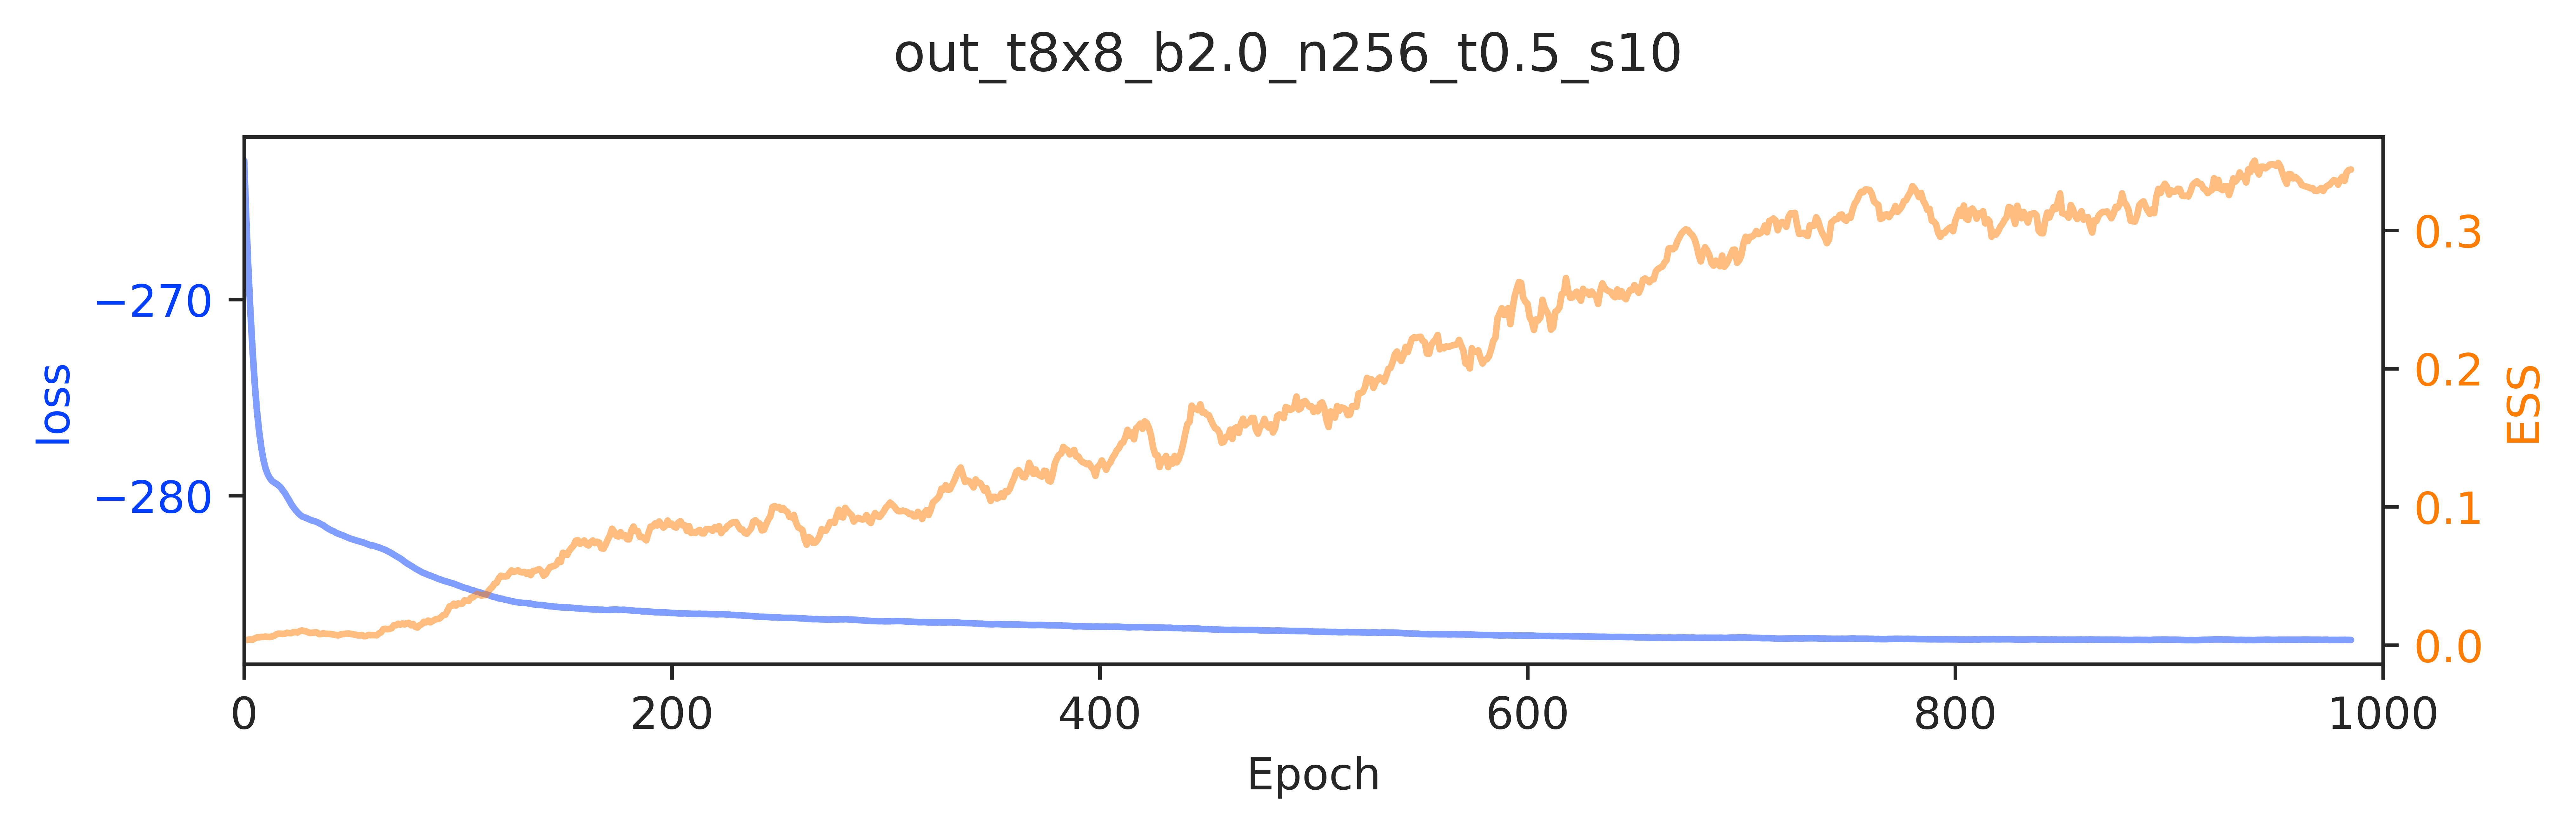

In [12]:
from train import TrainConfig, train

train_config = TrainConfig(**{
    'n_era': 10,
    'n_epoch': 100,
    'n_layers': 32,
    'n_s_nets': 2,
    'hidden_sizes': [8, 8],
    'kernel_size': 3,
    'batch_size': 1024,
    # 'print_freq': 10,
    'plot_freq': 10,
})

outputs = train(param, train_config, pre_model=None,
                logger=logger, figsize=(8, 2.5))

pre_flow_model = outputs['model']
pre_flow_history = outputs['history']
flow_act = outputs['action']

### Evaluate trained model and calculate topological susceptibility $\chi_{\mathcal{Q}}$

In [15]:
from train import generate_ensemble

outputs = generate_ensemble(pre_flow_model, flow_act)
u1_ens = outputs['ensemble']

pre_flow = pre_flow_model['layers']

[04:30:33]  Accept rate=0.4580078125

            Topological susceptibility=1.32199 +/- 0.10278

### Save `model.state_dict()` to `./pre_flow_model/pre_flow_model_layers.pt`:

In [17]:
#model_dir = os.path.join(os.getcwd(), 'pre_flow_model') 
model_dir = os.path.join(param_dir, 'pre_flow_model')
if not os.path.isdir(model_dir):
    os.makedirs(model_dir)

layers_file = os.path.join(model_dir, 'pre_flow_model_layers.pt')
logger.log(f'saving `pre_flow_model` to: {layers_file}.')
torch.save(pre_flow_model['layers'].state_dict(), layers_file)

[04:31:37]  saving `pre_flow_model` to: /lus/grand/projects/DLHMC/nftqcd/fthmc/flow_test_sam/notebooks/outputs/2021-05-20/out_t8x8_b2.0_n256_t0.5_s10/pre_fl
            ow_model/pre_flow_model_layers.pt.

In [18]:
train_force = False
flow_model = None

if train_force:
    flow_model, flow_act = flow_train(param, with_force=True, pre_model=pre_flow_model)
else:
    flow_model = pre_flow_model
    
u1_ens = generate_ensemble(flow_model, flow_act)
flow = flow_model['layers']
# flow.eval()

[04:33:46]  Accept rate=0.455078125

            Topological susceptibility=1.46538 +/- 0.09515

In [19]:
logger = io.Logger(width=256)

In [ ]:
from dataclasses import asdict
from copy import deepcopy
from utils.distributions import MultivariateUniform
from utils.layers import make_u1_equiv_layers, set_weights
from math import pi as PI
import utils.qed_helpers as qed

TWO_PI = 2 * PI
# from train import train

train_cfg_force = asdict(train_config)
train_cfg_force['with_force'] = True

tconfig_force = TrainConfig(**train_cfg_force)

link_shape = (2, *param.lat)
lattice_shape = tuple(param.lat)
u1_action = qed.BatchAction(param.beta)

prior = MultivariateUniform(torch.zeros(link_shape),
                            TWO_PI * torch.ones(link_shape))

tconfig_force
layers = make_u1_equiv_layers(lattice_shape=lattice_shape,
                              n_layers=tconfig_force.n_layers,
                              n_mixture_comps=tconfig_force.n_s_nets,
                              hidden_sizes=tconfig_force.hidden_sizes,
                              kernel_size=tconfig_force.kernel_size)

set_weights(layers)

model_force = {
    'prior': prior,
    'layers': layers,
}
                              

outputs = train(param, tconfig_force,
                model=model_force,
                pre_model=pre_flow_model,
                figsize=(8, 2.5), logger=logger)

[autoreload of pygments.token failed: Traceback (most recent call last):
  File "/lus/grand/projects/DLHMC/conda/pytorch/2021-05-12/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/lus/grand/projects/DLHMC/conda/pytorch/2021-05-12/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/lus/grand/projects/DLHMC/conda/pytorch/2021-05-12/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/lus/grand/projects/DLHMC/conda/pytorch/2021-05-12/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 317, in update_class
    update_instances(old, new)
  File "/lus/grand/projects/DLHMC/conda/pytorch/2021-05-12/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 280, in update_instances
    ref.__class__ = new
TypeError: __class__ assignment: '_

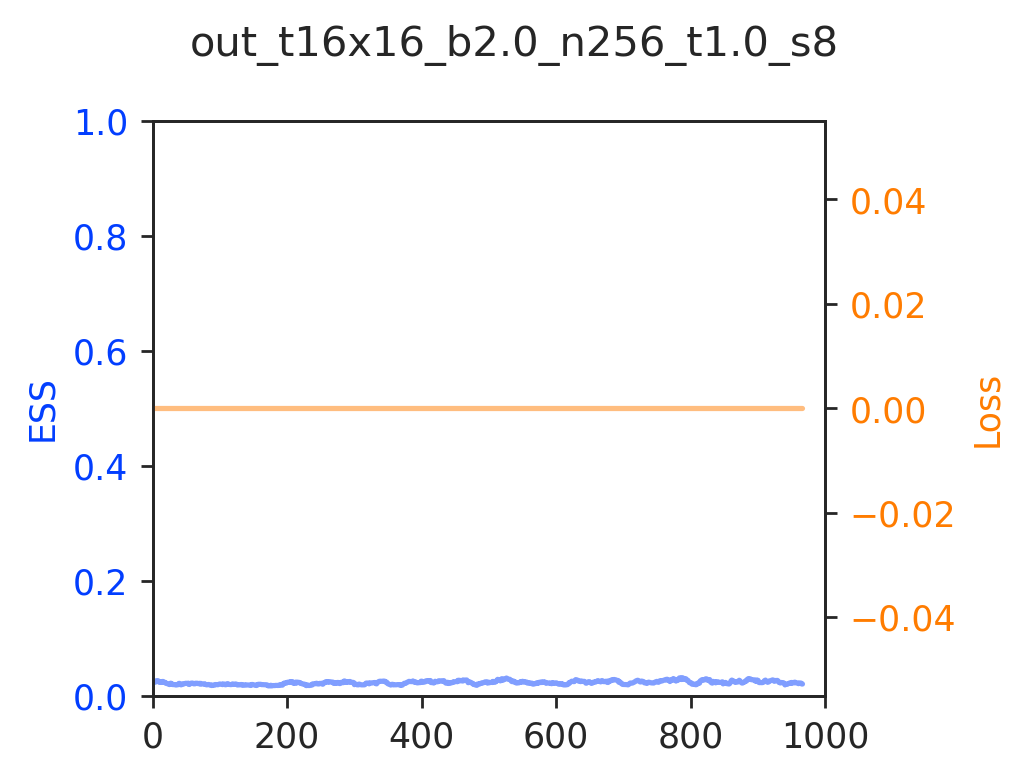

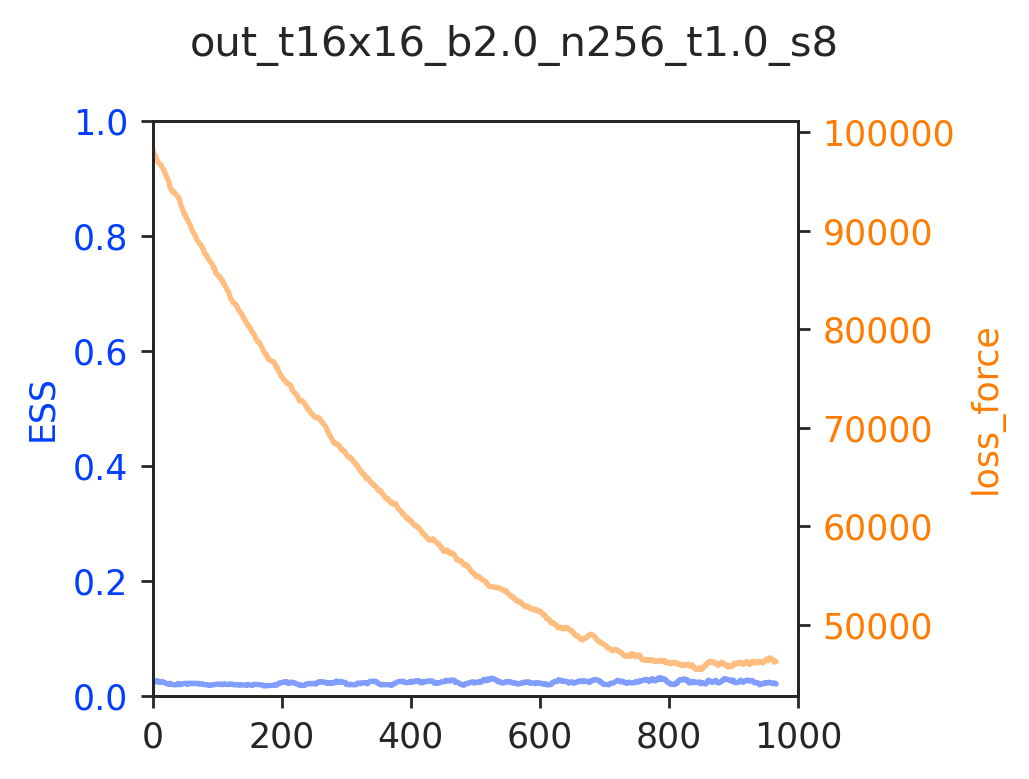

[15:45:01]  -------------------------------------------------------------- ERA=0 (last took: 0 min 0s)                                                      
            --------------------------------------------------------------                                                                                  
                                                                                                                                                            

[15:45:09]  era=0     epoch=7     dt=0.6726 force=98086.3 force_norm=312.827 ess=0.0301957 dkl=-1286.55 logp=342.303 logq=-944.25 loss=0                    
            loss_force=98086.3

[15:45:17]  era=0     epoch=17    dt=0.6723 force=96468.8 force_norm=310.241 ess=0.029136 dkl=-1285.83 logp=342.846 logq=-942.988 loss=0                    
            loss_force=96468.8

[15:45:25]  era=0     epoch=27    dt=0.6749 force=96616.3 force_norm=310.477 ess=0.0233364 dkl=-1284.83 logp=342.93 logq=-941.902 loss=0                    
            loss_force=96616.3

[15:45:33]  era=0     epoch=37    dt=0.6724 force=94041.9 force_norm=306.321 ess=0.0158231 dkl=-1283.77 logp=343.037 logq=-940.737 loss=0                   
            loss_force=94041.9

[15:45:42]  era=0     epoch=47    dt=0.6715 force=93334.9 force_norm=305.161 ess=0.0164331 dkl=-1282.71 logp=343.115 logq=-939.591 loss=0                   
            loss_force=93334.9

[15:45:50]  era=0     epoch=57    dt=0.6728 force=91227.3 force_norm=301.704 ess=0.0189087 dkl=-1280.93 logp=342.2 logq=-938.733 loss=0                     
            loss_force=91227.3

[15:45:58]  era=0     epoch=67    dt=0.6721 force=90698.8 force_norm=300.833 ess=0.0185766 dkl=-1281.71 logp=344.26 logq=-937.453 loss=0                    
            loss_force=90698.8

[15:46:06]  era=0     epoch=77    dt=0.6733 force=89285 force_norm=298.482 ess=0.0213498 dkl=-1278.49 logp=342.1 logq=-936.387 loss=0     loss_force=89285

[15:46:14]  era=0     epoch=87    dt=0.6782 force=87700.4 force_norm=295.823 ess=0.0217002 dkl=-1278.88 logp=343.398 logq=-935.478 loss=0                   
            loss_force=87700.4

[15:46:22]  era=0     epoch=97    dt=0.6761 force=87131.4 force_norm=294.864 ess=0.0174933 dkl=-1276.71 logp=342.34 logq=-934.371 loss=0                    
            loss_force=87131.4

            ------------------------------------------------------------ ERA=1 (last took: 1 min 21.72s)                                                    
            ------------------------------------------------------------                                                                                    
                                                                                                                                                            

[15:46:31]  era=1     epoch=7     dt=0.6759 force=85415.7 force_norm=291.946 ess=0.0199579 dkl=-1276.43 logp=343.194 logq=-933.236 loss=0                   
            loss_force=85415.7

[15:46:39]  era=1     epoch=17    dt=0.6735 force=84971.1 force_norm=291.184 ess=0.0200553 dkl=-1274.4 logp=342.1 logq=-932.297 loss=0                      
            loss_force=84971.1

[15:46:47]  era=1     epoch=27    dt=0.6737 force=83147.4 force_norm=288.051 ess=0.0193719 dkl=-1273.67 logp=342.418 logq=-931.249 loss=0                   
            loss_force=83147.4

[15:46:55]  era=1     epoch=37    dt=0.6735 force=82210.2 force_norm=286.425 ess=0.0188763 dkl=-1274.32 logp=344.053 logq=-930.265 loss=0                   
            loss_force=82210.2

[15:47:03]  era=1     epoch=47    dt=0.6731 force=81080.9 force_norm=284.449 ess=0.019734 dkl=-1273.07 logp=343.795 logq=-929.279 loss=0                    
            loss_force=81080.9

[15:47:11]  era=1     epoch=57    dt=0.6733 force=80338.2 force_norm=283.145 ess=0.0157644 dkl=-1272.91 logp=344.709 logq=-928.205 loss=0                   
            loss_force=80338.2

[15:47:20]  era=1     epoch=67    dt=0.6743 force=79001.4 force_norm=280.786 ess=0.0183387 dkl=-1270.66 logp=343.309 logq=-927.356 loss=0                   
            loss_force=79001.4

[15:47:28]  era=1     epoch=77    dt=0.6732 force=78337.8 force_norm=279.602 ess=0.0193035 dkl=-1269.63 logp=343.419 logq=-926.209 loss=0                   
            loss_force=78337.8

[15:47:36]  era=1     epoch=87    dt=0.673 force=76761.9 force_norm=276.779 ess=0.0185296 dkl=-1269.48 logp=344.239 logq=-925.241 loss=0                    
            loss_force=76761.9

[15:47:44]  era=1     epoch=97    dt=0.6735 force=76469.5 force_norm=276.249 ess=0.016644 dkl=-1267.73 logp=343.402 logq=-924.332 loss=0                    
            loss_force=76469.5

            ------------------------------------------------------------ ERA=2 (last took: 1 min 21.63s)                                                    
            ------------------------------------------------------------                                                                                    
                                                                                                                                                            

[15:47:52]  era=2     epoch=7     dt=0.6731 force=75035.5 force_norm=273.65 ess=0.0253649 dkl=-1266.25 logp=342.863 logq=-923.385 loss=0                    
            loss_force=75035.5

[15:48:00]  era=2     epoch=17    dt=0.6729 force=74537.3 force_norm=272.74 ess=0.0233728 dkl=-1265.93 logp=343.463 logq=-922.471 loss=0                    
            loss_force=74537.3

[15:48:09]  era=2     epoch=27    dt=0.6726 force=73622 force_norm=271.058 ess=0.0224796 dkl=-1264.73 logp=343.188 logq=-921.538 loss=0     loss_force=73622

[15:48:17]  era=2     epoch=37    dt=0.6752 force=72769.1 force_norm=269.492 ess=0.0161758 dkl=-1263.27 logp=342.561 logq=-920.704 loss=0                   
            loss_force=72769.1

[15:48:25]  era=2     epoch=47    dt=0.6734 force=72118.6 force_norm=268.282 ess=0.0200932 dkl=-1263.52 logp=343.817 logq=-919.701 loss=0                   
            loss_force=72118.6

[15:48:33]  era=2     epoch=57    dt=0.6731 force=71268 force_norm=266.697 ess=0.019046 dkl=-1261.83 logp=343.128 logq=-918.705 loss=0     loss_force=71268

[15:48:41]  era=2     epoch=67    dt=0.6738 force=70853.3 force_norm=265.919 ess=0.025754 dkl=-1259.74 logp=341.804 logq=-917.934 loss=0                    
            loss_force=70853.3

[15:48:49]  era=2     epoch=77    dt=0.6738 force=69845.6 force_norm=264.02 ess=0.022076 dkl=-1259.6 logp=342.661 logq=-916.935 loss=0                      
            loss_force=69845.6

[15:48:58]  era=2     epoch=87    dt=0.6746 force=68649.1 force_norm=261.752 ess=0.0260909 dkl=-1259.2 logp=343.149 logq=-916.055 loss=0                    
            loss_force=68649.1

[15:49:06]  era=2     epoch=97    dt=0.6751 force=68633 force_norm=261.724 ess=0.0290626 dkl=-1256.91 logp=341.719 logq=-915.191 loss=0     loss_force=68633

            ------------------------------------------------------------- ERA=3 (last took: 1 min 21.6s)                                                    
            -------------------------------------------------------------                                                                                   
                                                                                                                                                            

[15:49:14]  era=3     epoch=7     dt=0.6748 force=67019.6 force_norm=258.623 ess=0.0217115 dkl=-1257.95 logp=343.832 logq=-914.121 loss=0                   
            loss_force=67019.6

[15:49:22]  era=3     epoch=17    dt=0.6996 force=66585.4 force_norm=257.788 ess=0.0188597 dkl=-1256.23 logp=342.953 logq=-913.279 loss=0                   
            loss_force=66585.4

[15:49:31]  era=3     epoch=27    dt=0.6779 force=66086.5 force_norm=256.822 ess=0.0160209 dkl=-1255.4 logp=342.925 logq=-912.478 loss=0                    
            loss_force=66086.5

[15:49:38]  era=3     epoch=37    dt=0.6711 force=64943 force_norm=254.587 ess=0.0224131 dkl=-1255.08 logp=343.64 logq=-911.442 loss=0     loss_force=64943

[15:49:47]  era=3     epoch=47    dt=0.6774 force=64606.3 force_norm=253.924 ess=0.0306174 dkl=-1254.37 logp=343.845 logq=-910.521 loss=0                   
            loss_force=64606.3

[15:49:55]  era=3     epoch=57    dt=0.6698 force=63792.2 force_norm=252.329 ess=0.0188339 dkl=-1251.44 logp=341.464 logq=-909.972 loss=0                   
            loss_force=63792.2

[15:50:03]  era=3     epoch=67    dt=0.673 force=63152.7 force_norm=251.052 ess=0.0231822 dkl=-1251.1 logp=342.134 logq=-908.965 loss=0                     
            loss_force=63152.7

[15:50:11]  era=3     epoch=77    dt=0.6706 force=62605 force_norm=249.963 ess=0.016615 dkl=-1251.51 logp=343.337 logq=-908.172 loss=0     loss_force=62605

[15:50:19]  era=3     epoch=87    dt=0.6707 force=62271.9 force_norm=249.296 ess=0.0264443 dkl=-1249.76 logp=342.452 logq=-907.303 loss=0                   
            loss_force=62271.9

[15:50:27]  era=3     epoch=97    dt=0.6687 force=60910 force_norm=246.557 ess=0.021972 dkl=-1249.3 logp=343.049 logq=-906.256 loss=0     loss_force=60910

            ------------------------------------------------------------ ERA=4 (last took: 1 min 21.61s)                                                    
            ------------------------------------------------------------                                                                                    
                                                                                                                                                            

[15:50:35]  era=4     epoch=7     dt=0.6681 force=60656.9 force_norm=246.044 ess=0.0213845 dkl=-1248 logp=342.382 logq=-905.613 loss=0                      
            loss_force=60656.9

[15:50:43]  era=4     epoch=17    dt=0.669 force=59648.8 force_norm=243.991 ess=0.0204065 dkl=-1248.14 logp=343.461 logq=-904.68 loss=0                     
            loss_force=59648.8

[15:50:52]  era=4     epoch=27    dt=0.6681 force=59161.9 force_norm=242.996 ess=0.0211924 dkl=-1246.76 logp=343   logq=-903.757 loss=0                     
            loss_force=59161.9

[15:50:59]  era=4     epoch=37    dt=0.6715 force=58806.6 force_norm=242.264 ess=0.029147 dkl=-1245.93 logp=342.99 logq=-902.936 loss=0                     
            loss_force=58806.6

[15:51:08]  era=4     epoch=47    dt=0.669 force=58572.1 force_norm=241.776 ess=0.0198792 dkl=-1245.06 logp=342.799 logq=-902.263 loss=0                    
            loss_force=58572.1

[15:51:16]  era=4     epoch=57    dt=0.672 force=57767.3 force_norm=240.112 ess=0.0236493 dkl=-1244.82 logp=343.63 logq=-901.189 loss=0                     
            loss_force=57767.3

[15:51:24]  era=4     epoch=67    dt=0.6703 force=57393.8 force_norm=239.336 ess=0.0311903 dkl=-1242.56 logp=342.088 logq=-900.472 loss=0                   
            loss_force=57393.8

[15:51:32]  era=4     epoch=77    dt=0.6695 force=57179.3 force_norm=238.883 ess=0.0263162 dkl=-1242.31 logp=342.499 logq=-899.811 loss=0                   
            loss_force=57179.3

[15:51:40]  era=4     epoch=87    dt=0.6683 force=56394 force_norm=237.238 ess=0.0203073 dkl=-1241.62 logp=342.736 logq=-898.889 loss=0     loss_force=56394

[15:51:48]  era=4     epoch=97    dt=0.6702 force=55567 force_norm=235.489 ess=0.0244744 dkl=-1240.95 logp=342.864 logq=-898.085 loss=0     loss_force=55567

            ------------------------------------------------------------ ERA=5 (last took: 1 min 20.87s)                                                    
            ------------------------------------------------------------                                                                                    
                                                                                                                                                            

[15:51:56]  era=5     epoch=7     dt=0.6692 force=54958.8 force_norm=234.199 ess=0.0211679 dkl=-1242.05 logp=345.273 logq=-896.778 loss=0                   
            loss_force=54958.8

[15:52:04]  era=5     epoch=17    dt=0.6706 force=55019.4 force_norm=234.323 ess=0.0249852 dkl=-1238.6 logp=342.175 logq=-896.427 loss=0                    
            loss_force=55019.4

[15:52:13]  era=5     epoch=27    dt=0.6709 force=54155.3 force_norm=232.482 ess=0.027441 dkl=-1238.16 logp=342.457 logq=-895.698 loss=0                    
            loss_force=54155.3

[15:52:20]  era=5     epoch=37    dt=0.67  force=53579.1 force_norm=231.244 ess=0.0311477 dkl=-1237.66 logp=342.98 logq=-894.675 loss=0                     
            loss_force=53579.1

[15:52:29]  era=5     epoch=47    dt=0.6704 force=53604 force_norm=231.293 ess=0.0199835 dkl=-1236.67 logp=342.572 logq=-894.098 loss=0     loss_force=53604

[15:52:37]  era=5     epoch=57    dt=0.6701 force=53321.3 force_norm=230.685 ess=0.0249779 dkl=-1235.94 logp=342.619 logq=-893.318 loss=0                   
            loss_force=53321.3

[15:52:45]  era=5     epoch=67    dt=0.67  force=52572.3 force_norm=229.056 ess=0.0201814 dkl=-1236.05 logp=343.593 logq=-892.453 loss=0                    
            loss_force=52572.3

[15:52:53]  era=5     epoch=77    dt=0.6683 force=51898.9 force_norm=227.584 ess=0.0209402 dkl=-1234.96 logp=343.288 logq=-891.67 loss=0                    
            loss_force=51898.9

[15:53:01]  era=5     epoch=87    dt=0.6723 force=51748.2 force_norm=227.252 ess=0.0241233 dkl=-1233.29 logp=342.222 logq=-891.069 loss=0                   
            loss_force=51748.2

[15:53:09]  era=5     epoch=97    dt=0.6766 force=51502.1 force_norm=226.708 ess=0.0185545 dkl=-1233.26 logp=343.064 logq=-890.194 loss=0                   
            loss_force=51502.1

            ------------------------------------------------------------ ERA=6 (last took: 1 min 21.03s)                                                    
            ------------------------------------------------------------                                                                                    
                                                                                                                                                            

[15:53:17]  era=6     epoch=7     dt=0.6774 force=51393.5 force_norm=226.471 ess=0.0214594 dkl=-1231.58 logp=342.055 logq=-889.524 loss=0                   
            loss_force=51393.5

[15:53:25]  era=6     epoch=17    dt=0.6783 force=50451.7 force_norm=224.385 ess=0.0208707 dkl=-1232.4 logp=343.966 logq=-888.438 loss=0                    
            loss_force=50451.7

[15:53:34]  era=6     epoch=27    dt=0.6764 force=50448.4 force_norm=224.377 ess=0.0187545 dkl=-1231.3 logp=343.498 logq=-887.801 loss=0                    
            loss_force=50448.4

[15:53:42]  era=6     epoch=37    dt=0.6732 force=49687 force_norm=222.676 ess=0.0254863 dkl=-1229.77 logp=342.758 logq=-887.014 loss=0     loss_force=49687

[15:53:50]  era=6     epoch=47    dt=0.6801 force=49419.4 force_norm=222.075 ess=0.0236495 dkl=-1230.13 logp=343.877 logq=-886.251 loss=0                   
            loss_force=49419.4

[15:53:58]  era=6     epoch=57    dt=0.6777 force=49105.7 force_norm=221.372 ess=0.0169239 dkl=-1228.46 logp=342.572 logq=-885.892 loss=0                   
            loss_force=49105.7

[15:54:07]  era=6     epoch=67    dt=0.6811 force=48820.5 force_norm=220.712 ess=0.0251813 dkl=-1228.58 logp=343.788 logq=-884.79 loss=0                    
            loss_force=48820.5

[15:54:15]  era=6     epoch=77    dt=0.6859 force=48214.8 force_norm=219.35 ess=0.0290061 dkl=-1228.47 logp=344.676 logq=-883.793 loss=0                    
            loss_force=48214.8

[15:54:23]  era=6     epoch=87    dt=0.6726 force=49403.3 force_norm=222.037 ess=0.0225002 dkl=-1225.37 logp=341.487 logq=-883.883 loss=0                   
            loss_force=49403.3

[15:54:31]  era=6     epoch=97    dt=0.672 force=48513 force_norm=220.03 ess=0.0305183 dkl=-1225.69 logp=342.921 logq=-882.772 loss=0     loss_force=48513

            ------------------------------------------------------------ ERA=7 (last took: 1 min 22.13s)                                                    
            ------------------------------------------------------------                                                                                    
                                                                                                                                                            

[15:54:40]  era=7     epoch=7     dt=0.6729 force=47743.4 force_norm=218.276 ess=0.020478 dkl=-1225.78 logp=344.067 logq=-881.718 loss=0                    
            loss_force=47743.4

[15:54:47]  era=7     epoch=17    dt=0.6705 force=47219.4 force_norm=217.073 ess=0.019602 dkl=-1225.09 logp=343.945 logq=-881.142 loss=0                    
            loss_force=47219.4

[15:54:56]  era=7     epoch=27    dt=0.6713 force=47664.2 force_norm=218.088 ess=0.0205021 dkl=-1224 logp=343.018 logq=-880.978 loss=0                      
            loss_force=47664.2

[15:55:04]  era=7     epoch=37    dt=0.6734 force=46849.2 force_norm=216.221 ess=0.0215483 dkl=-1223.63 logp=343.676 logq=-879.956 loss=0                   
            loss_force=46849.2

[15:55:12]  era=7     epoch=47    dt=0.6719 force=47150.5 force_norm=216.909 ess=0.0206285 dkl=-1222.55 logp=342.916 logq=-879.634 loss=0                   
            loss_force=47150.5

[15:55:20]  era=7     epoch=57    dt=0.6736 force=47189.5 force_norm=216.995 ess=0.0203275 dkl=-1220.72 logp=341.927 logq=-878.795 loss=0                   
            loss_force=47189.5

[15:55:28]  era=7     epoch=67    dt=0.6771 force=46992 force_norm=216.546 ess=0.0289669 dkl=-1220.27 logp=341.835 logq=-878.434 loss=0     loss_force=46992

[15:55:36]  era=7     epoch=77    dt=0.6823 force=46538.7 force_norm=215.499 ess=0.0335075 dkl=-1220.66 logp=343.319 logq=-877.339 loss=0                   
            loss_force=46538.7

[15:55:45]  era=7     epoch=87    dt=0.681 force=46112.8 force_norm=214.498 ess=0.0329986 dkl=-1220.68 logp=344.077 logq=-876.601 loss=0                    
            loss_force=46112.8

[15:55:53]  era=7     epoch=97    dt=0.6803 force=46625.6 force_norm=215.699 ess=0.0297916 dkl=-1218.86 logp=342.279 logq=-876.583 loss=0                   
            loss_force=46625.6

            ------------------------------------------------------------ ERA=8 (last took: 1 min 21.64s)                                                    
            ------------------------------------------------------------                                                                                    
                                                                                                                                                            

[15:56:01]  era=8     epoch=7     dt=0.6781 force=45956.3 force_norm=214.141 ess=0.0196591 dkl=-1218.91 logp=343.435 logq=-875.478 loss=0                   
            loss_force=45956.3

[15:56:09]  era=8     epoch=17    dt=0.6849 force=46349.9 force_norm=215.05 ess=0.0230359 dkl=-1218.16 logp=342.93 logq=-875.231 loss=0                     
            loss_force=46349.9

[15:56:18]  era=8     epoch=27    dt=0.6827 force=45870.5 force_norm=213.937 ess=0.0313451 dkl=-1217.42 logp=342.864 logq=-874.553 loss=0                   
            loss_force=45870.5

[15:56:26]  era=8     epoch=37    dt=0.6811 force=46060.2 force_norm=214.365 ess=0.0223344 dkl=-1217.17 logp=343.132 logq=-874.043 loss=0                   
            loss_force=46060.2

[15:56:34]  era=8     epoch=47    dt=0.6812 force=45490.2 force_norm=213.042 ess=0.0292368 dkl=-1216.76 logp=343.552 logq=-873.212 loss=0                   
            loss_force=45490.2

[15:56:42]  era=8     epoch=57    dt=0.6813 force=45553.6 force_norm=213.195 ess=0.0176164 dkl=-1216.28 logp=343.594 logq=-872.687 loss=0                   
            loss_force=45553.6

[15:56:51]  era=8     epoch=67    dt=0.6816 force=46122.6 force_norm=214.52 ess=0.0178523 dkl=-1214.49 logp=341.98 logq=-872.507 loss=0                     
            loss_force=46122.6

[15:56:59]  era=8     epoch=77    dt=0.6745 force=46031.5 force_norm=214.287 ess=0.0199867 dkl=-1215.15 logp=343.498 logq=-871.647 loss=0                   
            loss_force=46031.5

[15:57:07]  era=8     epoch=87    dt=0.6834 force=45802.8 force_norm=213.77 ess=0.0310928 dkl=-1213.95 logp=342.51 logq=-871.437 loss=0                     
            loss_force=45802.8

[15:57:15]  era=8     epoch=97    dt=0.675 force=45755.4 force_norm=213.649 ess=0.0316293 dkl=-1213.67 logp=343.006 logq=-870.667 loss=0                    
            loss_force=45755.4

            ------------------------------------------------------------ ERA=9 (last took: 1 min 22.57s)                                                    
            ------------------------------------------------------------                                                                                    
                                                                                                                                                            

[15:57:24]  era=9     epoch=7     dt=0.674 force=46541 force_norm=215.476 ess=0.0191161 dkl=-1213.55 logp=343.377 logq=-870.174 loss=0     loss_force=46541

[15:57:32]  era=9     epoch=17    dt=0.6765 force=45643 force_norm=213.387 ess=0.016408 dkl=-1211.53 logp=341.568 logq=-869.961 loss=0     loss_force=45643

[15:57:40]  era=9     epoch=27    dt=0.6753 force=45640.7 force_norm=213.375 ess=0.0231994 dkl=-1212.27 logp=342.939 logq=-869.327 loss=0                   
            loss_force=45640.7

[15:57:48]  era=9     epoch=37    dt=0.6729 force=45799 force_norm=213.745 ess=0.0304954 dkl=-1212.31 logp=343.483 logq=-868.826 loss=0     loss_force=45799

[15:57:56]  era=9     epoch=47    dt=0.6757 force=45826.8 force_norm=213.815 ess=0.0194541 dkl=-1210.8 logp=342.374 logq=-868.43 loss=0                     
            loss_force=45826.8

[15:58:04]  era=9     epoch=57    dt=0.6751 force=46552 force_norm=215.498 ess=0.0258967 dkl=-1210.43 logp=342.688 logq=-867.745 loss=0     loss_force=46552

[15:58:13]  era=9     epoch=67    dt=0.6742 force=46383.8 force_norm=215.07 ess=0.0195864 dkl=-1210.08 logp=342.326 logq=-867.753 loss=0                    
            loss_force=46383.8

[15:58:21]  era=9     epoch=77    dt=0.6788 force=46234.4 force_norm=214.731 ess=0.0229268 dkl=-1210.58 logp=343.836 logq=-866.741 loss=0                   
            loss_force=46234.4

[15:58:29]  era=9     epoch=87    dt=0.6778 force=46439 force_norm=215.207 ess=0.0320307 dkl=-1209.96 logp=343.41 logq=-866.553 loss=0     loss_force=46439

[15:58:37]  era=9     epoch=97    dt=0.6762 force=46466.8 force_norm=215.258 ess=0.029202 dkl=-1210.03 logp=343.661 logq=-866.372 loss=0                    
            loss_force=46466.8

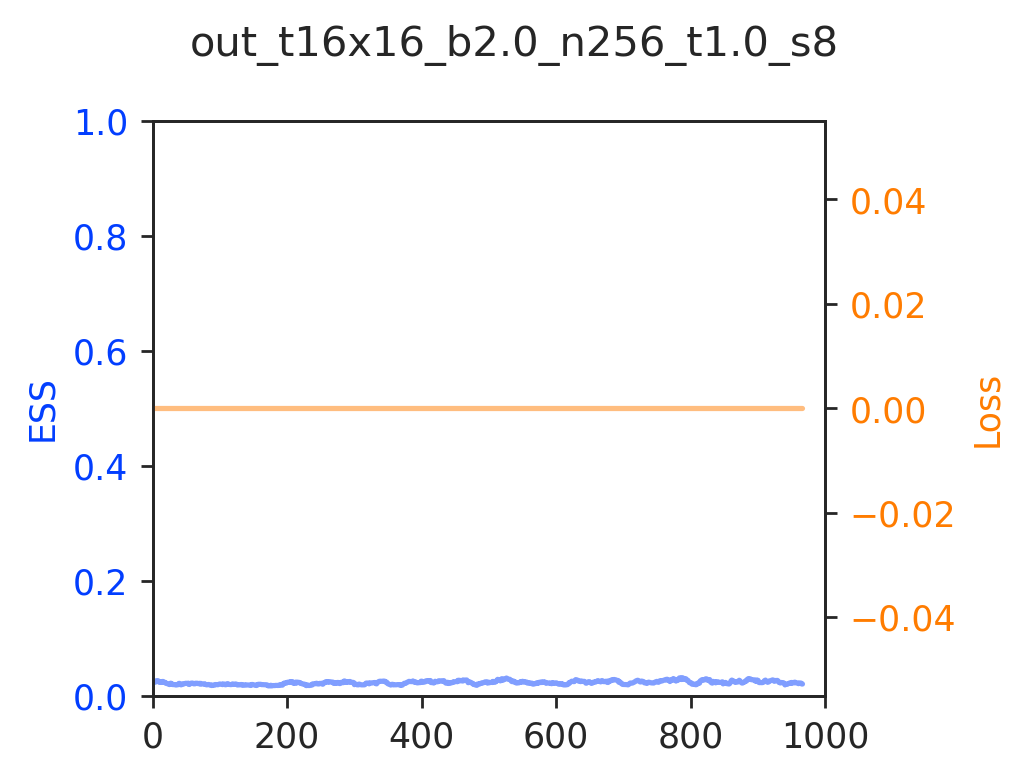

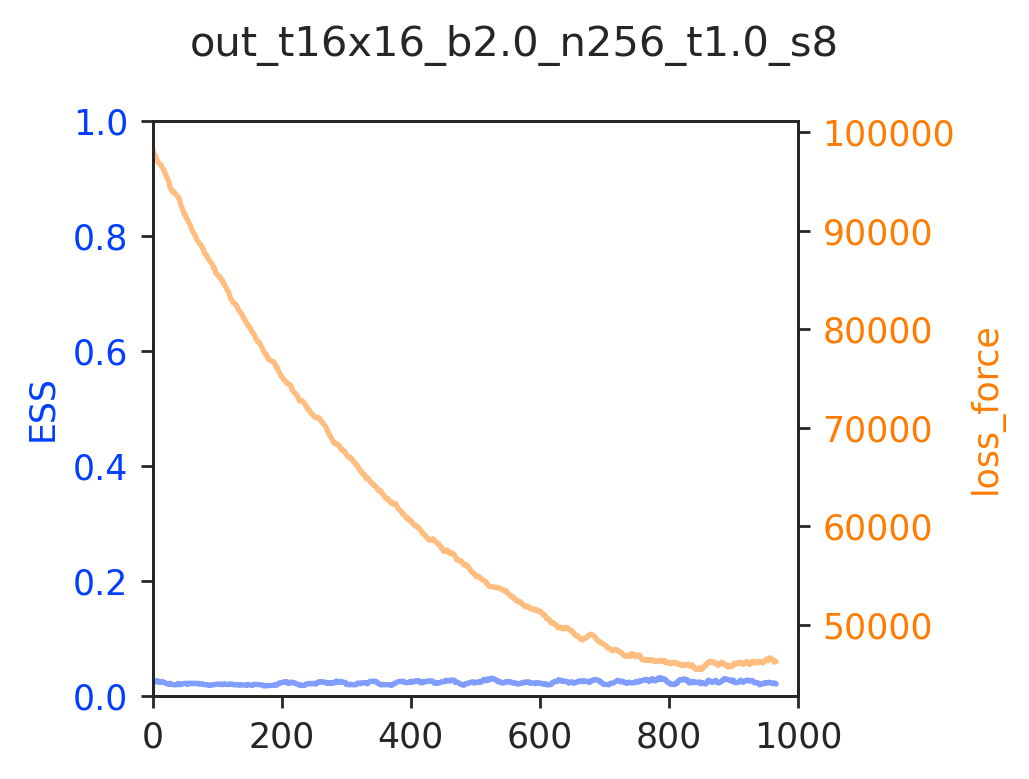

In [28]:
# flow_model_trained_force
#flow_model_tf, flow_act_tf = flow_train(param, n_era=5,
outputs = flow_train(param, n_era=10,
                     with_force=True,
                     pre_model=pre_flow_model)

flow_model_tf = outputs['model']
flow_model_history_tf = outputs['history']
flow_act_tf = outputs['action']

### Save the model trained with force:

In [31]:
model_dir = os.path.join(param_dir, 'flow_model_with_force')
if not os.path.isdir(model_dir):
    os.makedirs(model_dir)
    
layers_file = os.path.join(model_dir, 'flow_model_with_force.pt')

logger.log(f'Saving `flow_model_tf` to {layers_file}.')
torch.save(flow_model_tf['layers'].state_dict(), layers_file)

[16:31:42]  Saving `flow_model_tf` to /lus/grand/projects/DLHMC/nftqcd/fthmc/flow_test_sam/notebooks/outputs/2021-05-19/out_t16x16_b2.0_n256_t1.0_s8/flow_mo
            del_with_force/flow_model_with_force.pt.

In [34]:
def test_force(
    param: Param,
    model: dict,
    x: torch.Tensor = None,
    pre_model: dict = None
):
    """Test the force."""
    if x is None:
        if pre_model is None:
            raise ValueError(f'Either `x` or `pre_model` must be specified.')
            
        pre_xi = pre_model['prior'].sample_n(1)
        x = qed.ft_flow(pre_model['layers'], pre_xi)
        
    xi = qed.ft_flow_inv(model['layers'], x)
    force = qed.ft_force(param, model['layers'], xi)
    force_norm = torch.linalg.norm(force)
    return force_norm

In [44]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
from train import run as hmc_run
fields, metrics = hmc_run(param, logger=logger, keep_fields=True)

#metrics_dir = os.path.join(OUTDIR, 'metrics', 'hmc')
#metrics_file = os.path.join(metrics_dir, 'metrics.z')
#io.savez(metrics, metrics_file)

[autoreload of train failed: Traceback (most recent call last):
  File "/lus/grand/projects/DLHMC/conda/pytorch/2021-05-12/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/lus/grand/projects/DLHMC/conda/pytorch/2021-05-12/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/lus/grand/projects/DLHMC/conda/pytorch/2021-05-12/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/lus/grand/projects/DLHMC/conda/pytorch/2021-05-12/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 783, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/lus/grand/projects/DLHMC/nftqcd/fthmc/train.py", line 288, in <m

[17:28:55]  Param:                                                                                                                                          
            ----------------                                                                                                                                
            beta=2.0                                                                                                                                        
            L=16                                                                                                                                            
            tau=1.0                                                                                                                                         
            nstep=8                                                                                                                                         
            ntraj=256                                                                                                                                       
            nrun=10                                                                                                                                         
            nprint=10                                                                                                                                       
            seed=1331                                                                                                                                       
            randinit=True                                                                                                                                   
            nth=2                                                                                                                                           
            nth_interop=2                                                                                                                                   
            lat=[16, 16]                                                                                                                                    
            nd=2                                                                                                                                            
            shape=[2, 16, 16]                                                                                                                               
            volume=256                                                                                                                                      
            dt=0.125

            plaq=-0.03527 charge=3

            traj=25    accept=1     dH=-0.08197 expdH=1.085 plaq=0.6604 charge=-2

            traj=50    accept=1     dH=0.06467 expdH=0.9374 plaq=0.7294 charge=-1

            traj=75    accept=1     dH=-0.2036 expdH=1.226 plaq=0.6761 charge=4

            traj=100   accept=1     dH=-0.3368 expdH=1.4   plaq=0.6923 charge=3

            traj=125   accept=1     dH=0.0979 expdH=0.9067 plaq=0.6925 charge=1

[17:28:56]  traj=150   accept=1     dH=-0.03323 expdH=1.034 plaq=0.7291 charge=-1

            traj=175   accept=1     dH=0.184 expdH=0.832 plaq=0.7084 charge=4

            traj=200   accept=0     dH=0.3133 expdH=0.731 plaq=0.7122 charge=-1

            traj=225   accept=1     dH=-0.3811 expdH=1.464 plaq=0.658 charge=3

            traj=250   accept=1     dH=-0.008392 expdH=1.008 plaq=0.6953 charge=1.518e-07

            traj=281   accept=1     dH=0.09006 expdH=0.9139 plaq=0.7065 charge=1

            traj=306   accept=1     dH=-0.2269 expdH=1.255 plaq=0.6656 charge=1

[17:28:57]  traj=331   accept=1     dH=0.1528 expdH=0.8583 plaq=0.7281 charge=1

            traj=356   accept=1     dH=0.2524 expdH=0.7769 plaq=0.7531 charge=8.348e-07

            traj=381   accept=1     dH=-0.05586 expdH=1.057 plaq=0.7145 charge=1

            traj=406   accept=1     dH=0.1422 expdH=0.8675 plaq=0.6787 charge=-3

            traj=431   accept=1     dH=-0.3169 expdH=1.373 plaq=0.632 charge=2

            traj=456   accept=1     dH=0.06314 expdH=0.9388 plaq=0.7125 charge=3

            traj=481   accept=1     dH=0.04044 expdH=0.9604 plaq=0.7399 charge=1.897e-07

            traj=506   accept=1     dH=-0.1597 expdH=1.173 plaq=0.7106 charge=2

[17:28:58]  traj=537   accept=1     dH=0.14  expdH=0.8694 plaq=0.6822 charge=-2

            traj=562   accept=1     dH=7.629e-05 expdH=0.9999 plaq=0.7253 charge=1.518e-07

            traj=587   accept=1     dH=-0.01648 expdH=1.017 plaq=0.6902 charge=-1

            traj=612   accept=1     dH=0.129 expdH=0.879 plaq=0.6841 charge=2

            traj=637   accept=1     dH=-0.1397 expdH=1.15  plaq=0.6949 charge=4

            traj=662   accept=1     dH=-0.02855 expdH=1.029 plaq=0.7059 charge=-4

            traj=687   accept=1     dH=0.05627 expdH=0.9453 plaq=0.7386 charge=7.589e-07

[17:28:59]  traj=712   accept=1     dH=0.06528 expdH=0.9368 plaq=0.7357 charge=-1

            traj=737   accept=1     dH=-0.007446 expdH=1.007 plaq=0.7297 charge=2

            traj=762   accept=1     dH=-0.2325 expdH=1.262 plaq=0.7036 charge=1

            traj=793   accept=1     dH=-0.08279 expdH=1.086 plaq=0.6757 charge=1

            traj=818   accept=1     dH=-0.04349 expdH=1.044 plaq=0.6675 charge=-2

            traj=843   accept=1     dH=-0.164 expdH=1.178 plaq=0.6737 charge=1.518e-07

            traj=868   accept=1     dH=-0.1564 expdH=1.169 plaq=0.6982 charge=1

            traj=893   accept=0     dH=0.1429 expdH=0.8669 plaq=0.7067 charge=-2

[17:29:00]  traj=918   accept=1     dH=-0.08739 expdH=1.091 plaq=0.6904 charge=-1

            traj=943   accept=1     dH=0.01224 expdH=0.9878 plaq=0.6738 charge=-4

            traj=968   accept=1     dH=-0.101 expdH=1.106 plaq=0.6985 charge=-1

            traj=993   accept=1     dH=-0.3667 expdH=1.443 plaq=0.6833 charge=1.214e-06

            traj=1018  accept=1     dH=0.1762 expdH=0.8385 plaq=0.7317 charge=3

            traj=1049  accept=0     dH=0.06674 expdH=0.9354 plaq=0.7076 charge=-2

            traj=1074  accept=1     dH=-0.1661 expdH=1.181 plaq=0.6922 charge=-4

[17:29:01]  traj=1099  accept=1     dH=-0.1583 expdH=1.172 plaq=0.7305 charge=2

            traj=1124  accept=0     dH=0.2753 expdH=0.7594 plaq=0.6771 charge=-1

            traj=1149  accept=1     dH=0.3135 expdH=0.7309 plaq=0.7254 charge=-1

            traj=1174  accept=1     dH=0.02437 expdH=0.9759 plaq=0.7123 charge=-3

            traj=1199  accept=0     dH=0.5669 expdH=0.5673 plaq=0.6633 charge=1.366e-06

            traj=1224  accept=1     dH=-0.09879 expdH=1.104 plaq=0.7004 charge=6

            traj=1249  accept=1     dH=-0.1031 expdH=1.109 plaq=0.7186 charge=-2

            traj=1274  accept=1     dH=0.08438 expdH=0.9191 plaq=0.6855 charge=1

[17:29:02]  traj=1305  accept=1     dH=0.06693 expdH=0.9353 plaq=0.6923 charge=2

            traj=1330  accept=1     dH=-0.1211 expdH=1.129 plaq=0.656 charge=1

            traj=1355  accept=0     dH=0.02103 expdH=0.9792 plaq=0.7224 charge=3

            traj=1380  accept=0     dH=0.4358 expdH=0.6467 plaq=0.688 charge=-4

            traj=1405  accept=1     dH=0.1334 expdH=0.8751 plaq=0.6951 charge=-2

            traj=1430  accept=1     dH=-0.08487 expdH=1.089 plaq=0.6352 charge=-1

            traj=1455  accept=1     dH=-0.1598 expdH=1.173 plaq=0.6721 charge=-2

[17:29:03]  traj=1480  accept=1     dH=0.08728 expdH=0.9164 plaq=0.6851 charge=-1

            traj=1505  accept=1     dH=-0.2536 expdH=1.289 plaq=0.6874 charge=-1.518e-07

            traj=1530  accept=1     dH=0.1776 expdH=0.8373 plaq=0.7059 charge=8.348e-07

            traj=1561  accept=1     dH=-0.1078 expdH=1.114 plaq=0.673 charge=1

            traj=1586  accept=1     dH=0.3633 expdH=0.6954 plaq=0.6969 charge=1

            traj=1611  accept=1     dH=-0.207 expdH=1.23  plaq=0.7002 charge=-1

            traj=1636  accept=1     dH=-0.346 expdH=1.413 plaq=0.6934 charge=3

            traj=1661  accept=1     dH=-0.1675 expdH=1.182 plaq=0.6975 charge=3

[17:29:04]  traj=1686  accept=1     dH=0.1743 expdH=0.84  plaq=0.6829 charge=-1

            traj=1711  accept=1     dH=-0.5136 expdH=1.671 plaq=0.6269 charge=3

            traj=1736  accept=0     dH=0.2596 expdH=0.7714 plaq=0.6782 charge=-1.518e-07

            traj=1761  accept=1     dH=0.2299 expdH=0.7946 plaq=0.7059 charge=2

            traj=1786  accept=1     dH=-0.0495 expdH=1.051 plaq=0.7098 charge=-3

            traj=1817  accept=1     dH=-0.2817 expdH=1.325 plaq=0.7367 charge=5.692e-07

            traj=1842  accept=1     dH=0.02122 expdH=0.979 plaq=0.7047 charge=2

[17:29:05]  traj=1867  accept=1     dH=-0.01546 expdH=1.016 plaq=0.6582 charge=1

            traj=1892  accept=1     dH=0.1647 expdH=0.8482 plaq=0.694 charge=-7

            traj=1917  accept=1     dH=0.1835 expdH=0.8323 plaq=0.7084 charge=4

            traj=1942  accept=1     dH=0.1406 expdH=0.8689 plaq=0.6776 charge=9.107e-07

            traj=1967  accept=1     dH=0.1909 expdH=0.8262 plaq=0.7266 charge=3

            traj=1992  accept=1     dH=-0.05023 expdH=1.052 plaq=0.6764 charge=6

            traj=2017  accept=1     dH=-0.1453 expdH=1.156 plaq=0.7292 charge=8.348e-07

            traj=2042  accept=1     dH=0.172 expdH=0.842 plaq=0.6953 charge=-2

[17:29:06]  traj=2073  accept=1     dH=0.2294 expdH=0.795 plaq=0.7062 charge=2

            traj=2098  accept=0     dH=0.1607 expdH=0.8516 plaq=0.716 charge=-1

            traj=2123  accept=1     dH=-0.06522 expdH=1.067 plaq=0.7223 charge=1.518e-06

            traj=2148  accept=1     dH=-0.07599 expdH=1.079 plaq=0.7152 charge=1

            traj=2173  accept=1     dH=-0.168 expdH=1.183 plaq=0.7144 charge=3

            traj=2198  accept=1     dH=0.1374 expdH=0.8717 plaq=0.6382 charge=2

            traj=2223  accept=0     dH=0.3696 expdH=0.691 plaq=0.6702 charge=-1

[17:29:07]  traj=2248  accept=1     dH=-0.1704 expdH=1.186 plaq=0.685 charge=4

            traj=2273  accept=1     dH=-0.2859 expdH=1.331 plaq=0.675 charge=1

            traj=2298  accept=1     dH=0.114 expdH=0.8922 plaq=0.7416 charge=9.107e-07

            traj=2329  accept=1     dH=-0.0596 expdH=1.061 plaq=0.6954 charge=1

            traj=2354  accept=1     dH=-0.08487 expdH=1.089 plaq=0.6871 charge=1.176e-06

            traj=2379  accept=0     dH=0.1409 expdH=0.8686 plaq=0.7141 charge=-1

            traj=2404  accept=0     dH=0.1603 expdH=0.8519 plaq=0.7007 charge=3

            traj=2429  accept=0     dH=0.2525 expdH=0.7768 plaq=0.6669 charge=5

[17:29:08]  traj=2454  accept=1     dH=-0.2224 expdH=1.249 plaq=0.645 charge=6.071e-07

            traj=2479  accept=1     dH=-0.1617 expdH=1.176 plaq=0.6894 charge=-1

            traj=2504  accept=1     dH=0.1277 expdH=0.8801 plaq=0.6994 charge=-3

            traj=2529  accept=1     dH=0.1426 expdH=0.8671 plaq=0.6815 charge=-2

            traj=2554  accept=1     dH=0.05569 expdH=0.9458 plaq=0.7043 charge=3

            Run times: [1.32857084274292, 1.3290586471557617, 1.3353641033172607, 1.3310883045196533, 1.332155466079712, 1.3345482349395752,                
            1.3304953575134277, 1.3295960426330566, 1.3294804096221924, 1.3311331272125244]

            Per trajectory: [0.005189729854464531, 0.005191635340452194, 0.00521626602858305, 0.005199563689529896, 0.005203732289373875,                   
            0.005213079042732716, 0.005197247490286827, 0.0051937345415353775, 0.005193282850086689, 0.0051997387781739235]

In [66]:
#field_arr = torch.stack(tuple(fields.values()), dim=0)
len(fields)
#
field_arr = np.array([grab(torch.stack(i)) for i in fields])
field_arr.shape
#logger.log(field_arr.shape)

10

(10, 256, 2, 16, 16)

In [76]:
#test_force(n=1)

for field in field_arr:
    force_tf = test_force(param, flow_model_tf, pre_model=pre_flow_model)
    logger.log(f'ft_flow(players, pxi), (pxi ~ pre_prior): {force_tf:.5g}') 
    
    x = torch.from_numpy(field[-1]).squeeze()[None, :]
    if torch.cuda.is_available():
        x = x.cuda()
    
    #x_ = field_arr.squeeze()[None, :]
    force_ = test_force(param, flow_model_tf, x=x, pre_model=pre_flow_model)
    logger.log(f'ft_flow(layers, field_arr), (pxi ~ pre_prior): {force_:.5g}')

[19:20:51]  ft_flow(players, pxi), (pxi ~ pre_prior): 27.412

[19:20:52]  ft_flow(layers, field_arr), (pxi ~ pre_prior): 26.567

            ft_flow(players, pxi), (pxi ~ pre_prior): 29.064

[19:20:53]  ft_flow(layers, field_arr), (pxi ~ pre_prior): 27.358

            ft_flow(players, pxi), (pxi ~ pre_prior): 27.288

            ft_flow(layers, field_arr), (pxi ~ pre_prior): 34.197

[19:20:54]  ft_flow(players, pxi), (pxi ~ pre_prior): 29.371

            ft_flow(layers, field_arr), (pxi ~ pre_prior): 30.189

[19:20:55]  ft_flow(players, pxi), (pxi ~ pre_prior): 27.703

            ft_flow(layers, field_arr), (pxi ~ pre_prior): 26.583

            ft_flow(players, pxi), (pxi ~ pre_prior): 24.465

[19:20:56]  ft_flow(layers, field_arr), (pxi ~ pre_prior): 29.434

            ft_flow(players, pxi), (pxi ~ pre_prior): 24.117

[19:20:57]  ft_flow(layers, field_arr), (pxi ~ pre_prior): 26.859

            ft_flow(players, pxi), (pxi ~ pre_prior): 30.52

[19:20:58]  ft_flow(layers, field_arr), (pxi ~ pre_prior): 27.625

            ft_flow(players, pxi), (pxi ~ pre_prior): 27.368

            ft_flow(layers, field_arr), (pxi ~ pre_prior): 23.091

[19:20:59]  ft_flow(players, pxi), (pxi ~ pre_prior): 31.047

            ft_flow(layers, field_arr), (pxi ~ pre_prior): 27.655

In [81]:
for idx, fields in enumerate(field_arr):
    x = torch.from_numpy(fields)
    if torch.cuda.is_available():
        x = x.cuda()
        
    force1 = test_force(param, flow_model_tf, pre_model=pre_flow_model)
    force2 = test_force(param, flow_model_tf, x=x)
    
    logger.log(f'run={idx}, force1={force1:.5g}, force2={force2:.5g}')

[19:43:41]  run=0, force1=24.475, force2=442.5

[19:43:42]  run=1, force1=28.953, force2=424.25

[19:43:43]  run=2, force1=26.157, force2=427.08

[19:43:44]  run=3, force1=29.673, force2=436.3

[19:43:45]  run=4, force1=24.676, force2=437.35

[19:43:46]  run=5, force1=27.159, force2=443.35

[19:43:47]  run=6, force1=25.606, force2=443.07

            run=7, force1=29.107, force2=435.69

[19:43:48]  run=8, force1=27.327, force2=427.41

[19:43:49]  run=9, force1=31.647, force2=429.98

In [82]:
# shape = (run, ntraj, d, L, L)
field_arr.shape

(10, 256, 2, 16, 16)

In [86]:
#field_run = torch.stack(tuple(fields.values()), dim=0)
##flows = flow

#x0 = field_arr[0][None, :]
#x = field_arr[0][None, :]

# select last trajectory from last run
x = torch.from_numpy(field_arr[-1][-1][None, :]).cuda()
x0 = torch.from_numpy(field_arr[-1][-1][None, :]).cuda()

if torch.cuda.is_available():
    x = x.cuda()

plaq0 = qed.action(param, x) / (-param.beta * param.volume)
logger.log(f'plaq(field_arr[0])={plaq0:.8g}')

#logger\.log(f'plaq(field_run[0]) {qed.action(param, x) / (-param.beta*param.volume)}')
# field.requires_grad_(True)
#x = field_run[0][None, :]
logJ = 0.0
for layer in reversed(flow_model_tf['layers']):
    x, lJ = layer.reverse(x)
    logJ += lJ

# x is the prior distribution now
    
x.requires_grad_(True)
    
y = x
logJy = 0.0
for layer in flow_model_tf['layers']:
    y, lJ = layer.forward(y)
    logJy += lJ
    
s = qed.action(param, y[0][None, :]) - logJy

logger.log(f'sum(logJ): {qed.grab(logJ.sum())}')
logger.log(f'sum(logJy): {qed.grab(logJy.sum())}')
#print(logJ,logJy)


# print("eff_action", s + 136.3786)

logger.log(f'original_action: {qed.action(param, y[0][None, :]) + 91}')
#print("original_action", qed.action(param, y[0][None, :]) + 91)

logger.log(f'eff_action: {s + 56}')
#print("eff_action", {s + 56)

s.backward()

f = x.grad

x.requires_grad_(False)

logger.log(f'plaq(x) {qed.action(param, x[0][None, :]) / (-param.beta*param.volume)}  logJ {qed.grab(logJ)}  force.norm {torch.linalg.norm(f)}')
logger.log(f'plaq(y) {qed.action(param, y[0][None, :]) / (-param.beta*param.volume)}')
logger.log(f'plaq(x) {qed.action(param, x0) / (-param.beta*param.volume)}  force.norm {torch.linalg.norm(qed.force(param, x0))}')

[19:48:01]  plaq(field_arr[0])=0.68838131

tensor([[[[3.0388e+00, 1.7881e+00, 1.6742e+00, 1.3463e+00, 6.6343e-01,
           1.8352e+00, 5.0079e+00, 3.3590e+00, 3.2127e+00, 6.0211e+00,
           1.6047e+00, 3.7269e-01, 6.2484e+00, 2.9970e-01, 4.2464e+00,
           2.2962e+00],
          [5.9275e+00, 1.4847e+00, 1.4057e+00, 3.3962e+00, 5.7333e+00,
           4.0278e+00, 5.9738e+00, 2.7356e+00, 1.5422e+00, 4.5003e+00,
           4.7943e+00, 2.8410e+00, 2.0114e+00, 1.1640e+00, 3.6238e+00,
           2.6673e+00],
          [4.6050e+00, 3.5966e+00, 1.1573e+00, 3.9220e+00, 4.2321e+00,
           3.5167e+00, 5.8648e+00, 2.7579e+00, 4.0154e+00, 3.5863e+00,
           1.8041e+00, 6.2452e+00, 3.6686e+00, 3.4556e-01, 2.0273e+00,
           5.4700e+00],
          [5.1609e+00, 2.9920e-01, 3.8669e+00, 8.9597e-01, 1.8648e+00,
           3.0489e+00, 3.9636e+00, 5.1551e+00, 8.7792e-01, 3.2300e+00,
           3.4303e+00, 3.7456e+00, 1.3385e+00, 5.5163e+00, 2.6375e+00,
           7.1570e-01],
          [2.1427e+00, 1.3277e+00, 4.9690e+00, 3.824

[19:48:02]  sum(logJ): 73.99446105957031

            sum(logJy): -73.99444580078125

            original_action: -261.451171875

            eff_action: tensor([-222.4567], grad_fn=<AddBackward0>)

tensor([[[[3.0388e+00, 1.7881e+00, 1.6742e+00, 1.3463e+00, 6.6343e-01,
           1.8352e+00, 5.0079e+00, 3.3590e+00, 3.2127e+00, 6.0211e+00,
           1.6047e+00, 3.7269e-01, 6.2484e+00, 2.9970e-01, 4.2464e+00,
           2.2962e+00],
          [5.9275e+00, 1.4847e+00, 1.4057e+00, 3.3962e+00, 5.7333e+00,
           4.0278e+00, 5.9738e+00, 2.7356e+00, 1.5422e+00, 4.5003e+00,
           4.7943e+00, 2.8410e+00, 2.0114e+00, 1.1640e+00, 3.6238e+00,
           2.6673e+00],
          [4.6050e+00, 3.5966e+00, 1.1573e+00, 3.9220e+00, 4.2321e+00,
           3.5167e+00, 5.8648e+00, 2.7579e+00, 4.0154e+00, 3.5863e+00,
           1.8041e+00, 6.2452e+00, 3.6686e+00, 3.4556e-01, 2.0273e+00,
           5.4700e+00],
          [5.1609e+00, 2.9920e-01, 3.8669e+00, 8.9597e-01, 1.8648e+00,
           3.0489e+00, 3.9636e+00, 5.1551e+00, 8.7792e-01, 3.2300e+00,
           3.4303e+00, 3.7456e+00, 1.3385e+00, 5.5163e+00, 2.6375e+00,
           7.1570e-01],
          [2.1427e+00, 1.3277e+00, 4.9690e+00, 3.824

            plaq(x) 0.19244730472564697  logJ [73.99446]  force.norm 27.654855728149414

            plaq(y) 0.6883811950683594

            plaq(x) 0.6883813142776489  force.norm 37.61509323120117

In [91]:
logger.log(x.shape)

field_tensor = torch.from_numpy(field_arr).cuda()

x = qed.ft_flow_inv(flow, field_tensor[-1])
# x = field_run
#for layer in reversed(flows):
#    x, lJ = layer.reverse(x)
ff = qed.ft_force(param, flow, x)
logger.log(torch.linalg.norm(ff))
fff = qed.ft_force(param, flow, x)
logger.log(torch.linalg.norm(fff))

[20:16:14]  torch.Size([256, 2, 16, 16])

[20:16:15]  tensor(826.6213)

            tensor(826.6213)

In [92]:
x = qed.ft_flow_inv(flow, field_tensor[-1])
logger.log(qed.grab(qed.ft_action(param, flow, x)))

[20:17:15]  [-213.25449 -211.62157 -217.66745 -217.66745 -216.06474 -212.92886                                                                              
             -214.65228 -211.96034 -211.50453 -212.92943 -212.91638 -212.91638                                                                              
             -214.31651 -213.96367 -211.36226 -213.4601  -214.19305 -214.19305                                                                              
             -210.68105 -213.12143 -213.12143 -215.9458  -212.50546 -213.21198                                                                              
             -213.30165 -214.9991  -217.19832 -217.19832 -217.19832 -214.02267                                                                              
             -211.08887 -210.86153 -214.49142 -214.49142 -216.93639 -211.50941                                                                              
             -211.50941 -211.50941 -212.73349 -212.63521 -214.79977 -216.18457                                                                              
             -210.84608 -209.86388 -215.68782 -214.29092 -217.37541 -214.83168                                                                              
             -216.61777 -214.04652 -214.8425  -211.7724  -211.34927 -214.07149                                                                              
             -208.92258 -211.93639 -208.83118 -216.6081  -213.4129  -213.02669                                                                              
             -215.30196 -214.34895 -218.64003 -210.39584 -215.05266 -217.83284                                                                              
             -214.35414 -218.0815  -218.6969  -218.06096 -217.08824 -216.23828                                                                              
             -214.73795 -216.71967 -216.71967 -211.58636 -212.21292 -211.60437                                                                              
             -211.60437 -218.67221 -214.86993 -212.91318 -214.86276 -216.77303                                                                              
             -216.77303 -215.42552 -215.8309  -215.81111 -213.16356 -215.71689                                                                              
             -219.15045 -213.50519 -210.0622  -214.42981 -211.93692 -211.93692                                                                              
             -217.00644 -211.63602 -211.11887 -211.11887 -212.77623 -214.03903                                                                              
             -211.46953 -209.67976 -214.04039 -215.24826 -210.6843  -214.4138                                                                               
             -218.70442 -219.33434 -220.03543 -220.49922 -214.56352 -216.8835                                                                               
             -215.1353  -209.1399  -214.1057  -210.55103 -211.65178 -216.52008                                                                              
             -214.10863 -212.88004 -212.88004 -212.88004 -212.88004 -214.84032                                                                              
             -215.17516 -214.58977 -217.48987 -215.7313  -213.03293 -210.37482                                                                              
             -210.37482 -213.53658 -215.21838 -215.21838 -212.34685 -216.58041                                                                              
             -215.1853  -218.68962 -218.68962 -218.10341 -218.96725 -214.31758                                                                              
             -213.56868 -216.6634  -216.48746 -210.95155 -207.63391 -210.12402                                                                              
             -211.06085 -212.39435 -213.4632  -211.41933 -211.41933 -214.32

In [93]:
def flattern(l):
    return [x for y in l for x in y]

def average(l):
    return sum(l) / len(l)

def sub_avg(l):
    avg = average(l)
    return np.array([x - avg for x in l])

In [94]:
#ft_hmc_info_list = []
ft_hmc_info = {
    'force_norm_rms': [],
    'ft_action_init': [],
    'ft_action_end': [],
    'momentum_norm_end': [],
}

def ft_leapfrog(param, flow, x, p):
    mom_norm = torch.sum(p*p)
    info_list = []
    dt = param.dt
    x_ = x + 0.5*dt*p
    f = qed.ft_force(param, flow, x_)
    p_ = p + (-dt)*f
    info = {
        'force_norm': [torch.linalg.norm(f).cpu().detach().numpy()],
        'ft_action': [qed.ft_action(param, flow, x_).cpu().detach().numpy()],
        'momentum_norm': [(torch.sum(p * p_) / torch.sqrt(mom_norm * torch.sum(p_ * p_))).cpu().detach().numpy()],
    }
    
    #info_list.append(info)
    for i in range(param.nstep-1):
        x_ = x_ + dt*p_
        f = qed.ft_force(param, flow, x_)
        info_ = {
            'force_norm': torch.linalg.norm(f).cpu().detach().numpy(),
            'ft_action': qed.ft_action(param, flow, x_).cpu().detach().numpy(),
            'momentum_norm': (torch.sum(p * p_) / torch.sqrt(mom_norm * torch.sum(p_ * p_))).cpu().detach().numpy(),
        }
        for key, val in info_.items():
            info[key].append(val)
            
        #info = np.array([torch.linalg.norm(f),
        #     qed.ft_action(param, flow, x_),
        #     torch.sum(p * p_) / torch.sqrt(mom_norm * torch.sum(p_ * p_))])
        
        p_ = p_ + (-dt)*f
    x_ = x_ + 0.5*dt*p_
    
    force_norm_arr = np.array(info['force_norm'])
    
    info_ = {
        'force_norm_rms': np.sqrt(average(force_norm_arr ** 2)),
        'ft_action_init': info['ft_action'][0],
        'ft_action_end': info['ft_action'][-1],
        'momentum_norm_end': info['momentum_norm'][-1],
    }
    
    logger.print_metrics(info_)
    for key, val in info_.items():
        ft_hmc_info[key].append(val)
        
    #info_ = [
    #    np.sqrt(average(info['force_norm'] ** 2)),
    #    (info['ft_action'][0], info['ft_action'][-1]),
    #    info['momentum_norm'][-1],
    #]
    #info_ = [
    #    np.sqrt(average([l[0] ** 2 for l in info_list])),
    #    (info_list[0][1], info_list[-1][1]),
    #    info_list[-1][2]
    #]
    #put(', '.join([f'{i}' for i in info_]))
        
    #ft_hmc_info_list.append(info_list)
    return (x_, p_)

def ft_hmc(param, flow, field):
    x = qed.ft_flow_inv(flow, field)
    p = torch.randn_like(x)
    act0 = qed.ft_action(param, flow, x).cpu() + 0.5*torch.sum(p*p).cpu()
    x_, p_ = ft_leapfrog(param, flow, x, p)
    xr = qed.regularize(x_)
    act = qed.ft_action(param, flow, xr).cpu() + 0.5*torch.sum(p_*p_).cpu()
    prob = torch.rand([], dtype=torch.float64).cpu()
    dH = act - act0
    exp_mdH = torch.exp(-dH)
    acc = prob < exp_mdH
    # ADJUST ME
    newx = xr if acc else x
    # newx = xr
    newfield = qed.ft_flow(flow, newx)
    return (float(dH), float(exp_mdH), acc, newfield)

In [100]:
def ft_run(param, flow, field = None):
    if field is None:
        field = param.initializer()
        
    ft_hmc_info_list = []
    with open(param.uniquestr(), "w") as f:
        #params = param.summary()
        f.write(repr(param))
        logger.log(repr(param))
        #put(params)
        plaq = qed.action(param, torch.squeeze(field)) / (-param.beta*param.volume)
        topo = qed.topo_charge(torch.squeeze(field)[None, :])
        #plaq, topo = (qed.action(param, field[None, :]) / (-param.beta*param.volume), qed.topo_charge(field[None, :]))
        status = f"Initial configuration:  plaq: {plaq}  topo: {topo}\n"
        f.write(status)
        logger.log(status)
        ts = []
        for n in range(param.nrun):
            t = -timer()
            for i in range(param.ntraj):
                #field_run = torch.reshape(field,(1,)+field.shape)
#                 
                dH, exp_mdH, acc, field = ft_hmc(param, flow, torch.squeeze(field)[None, :])
                plaq = qed.action(param, field) / (-param.beta*param.volume)
                topo = qed.topo_charge(torch.squeeze(field)[None, :])
                ifacc = "ACCEPT" if acc else "REJECT"
                metrics = {
                    'traj': n * param.ntraj + i + 1 + 4,
                    'accept': acc,
                    'dH': dH,
                    'expdH': exp_mdH,
                    'plaq': plaq,
                    'topo': topo,
                }
                #status = {
                #    'traj': f'{n * param.ntraj+i+1:4}',
                #    'accept': f'{qed.grab(acc)[0]}',
                #    'dH': f'{dH:< 12.8}',
                #    'expdH': f'{exp_mdH:< 12.8}',
                #    'plaq': f'{plaq:< 12.8}',
                #    'topo': f'{qed.grab(topo)[0]:< 3.3}',
                #}
                #status = io.print_metrics(status)
                #outstr = ', '.join(
                #    '='.join((k, v)) for k, v in status.items()
                #)
                #f.write(status + '\n')
                
                if (i + 1) % (param.ntraj // param.nprint) == 0:
                    outstr = io.print_metrics(metrics)
                    f.write(outstr + '\n')
                    
            t += timer()
            ts.append(t)
        print("Run times: ", ts)
        print("Per trajectory: ", [t/param.ntraj for t in ts])
    return field

In [98]:
def ft_run(param, flow, field = None):
    if field == None:
        field = param.initializer()
    ft_hmc_info_list = []
    with open(param.uniquestr(), "w") as f:
        f.write(repr(param))
        logger.log(repr(param))
        plaq = qed.action(param, torch.squeeze(field)) / (-param.beta*param.volume)
        topo = qed.topo_charge(torch.squeeze(field)[None, :])
        #plaq, topo = (qed.action(param, field[None, :]) / (-param.beta*param.volume), qed.topo_charge(field[None, :]))
        status = f"Initial configuration:  plaq: {plaq}  topo: {topo}\n"
        f.write(status)
        put(status)
        ts = []
        for n in range(param.nrun):
            t = -timer()
            for i in range(param.ntraj):
                #field_run = torch.reshape(field,(1,)+field.shape)
                
                dH, exp_mdH, acc, field = ft_hmc(param, flow, torch.squeeze(field)[None, :])
                plaq = qed.action(param, field) / (-param.beta*param.volume)
                topo = qed.topo_charge(torch.squeeze(field)[None, :])
                ifacc = "ACCEPT" if acc else "REJECT"
                status = {
                    'traj': f'{n * param.ntraj+i+1:4}',
                    'accept': f'{qed.grab(acc)[0]}',
                    'dH': f'{dH:< 12.8}',
                    'expdH': f'{exp_mdH:< 12.8}',
                    'plaq': f'{plaq:< 12.8}',
                    'topo': f'{qed.grab(topo)[0]:< 3.3}',
                }
                if (i + 1) % (param.ntraj // param.nprint) == 0:
                    outstr = logger.print_metrics(status)
                    f.write(outstr + '\n')
                    
            t += timer()
            ts.append(t)
        print("Run times: ", ts)
        print("Per trajectory: ", [t/param.ntraj for t in ts])
    return field

## Run field transformation (with force) using `pre_flow_model`


In [97]:
param.nprint = 256

field_ = ft_run(param, pre_flow_model['layers'], field=field_arr[-1])#, torch.stack(tuple(field.values()), dim=0).squeeze())

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [193]:
param0.nprint

256

In [109]:
param0 = Param(
    beta=2.0,
    L=16,
    tau=0.5, # 0.3
    nstep=10, # 3
    nrun=4,
    # ADJUST ME
    ntraj=256, # 2**16 # 2**10 # 2**15
    #nprint=1,
    seed=1331,
)

logger.log(repr(param0))

# field = ft_run(param, pre_flow)
field0 = ft_run(param0, pre_flow_model['layers'])#, torch.stack(tuple(field.values()), dim=0).squeeze())

[21:23:10]  Param:                                                                                                                                          
            ----------------                                                                                                                                
            beta=2.0                                                                                                                                        
            L=16                                                                                                                                            
            tau=0.5                                                                                                                                         
            nstep=10                                                                                                                                        
            ntraj=256                                                                                                                                       
            nrun=4                                                                                                                                          
            nprint=256                                                                                                                                      
            seed=1331                                                                                                                                       
            randinit=False                                                                                                                                  
            nth=2                                                                                                                                           
            nth_interop=2                                                                                                                                   
            lat=[16, 16]                                                                                                                                    
            nd=2                                                                                                                                            
            shape=[2, 16, 16]                                                                                                                               
            volume=256                                                                                                                                      
            dt=0.05

            Param:                                                                                                                                          
            ----------------                                                                                                                                
            beta=2.0                                                                                                                                        
            L=16                                                                                                                                            
            tau=0.5                                                                                                                                         
            nstep=10                                                                                                                                        
            ntraj=256                                                                                                                                       
            nrun=4                                                                                                                                          
            nprint=256                                                                                                                                      
            seed=1331                                                                                                                                       
            randinit=False                                                                                                                                  
            nth=2                                                                                                                                           
            nth_interop=2                                                                                                                                   
            lat=[16, 16]                                                                                                                                    
            nd=2                                                                                                                                            
            shape=[2, 16, 16]                                                                                                                               
            volume=256                                                                                                                                      
            dt=0.05

            Initial configuration:  plaq: 1.0  topo: tensor([0.])

[21:23:11]  force_norm_rms=4.082 ft_action_init=-227.8 ft_action_end=-221.8 momentum_norm_end=0.9974

[21:23:11]  traj=5     accept=1     dH=-0.0175 expdH=1.018 plaq=0.9332 topo=6.83e-07

[21:23:12]  force_norm_rms=12.4  ft_action_init=-221.4 ft_action_end=-215.6 momentum_norm_end=0.9924

[21:23:12]  traj=6     accept=0     dH=5.553 expdH=0.003875 plaq=0.9332 topo=-9.486e-07

[21:23:14]  force_norm_rms=9.198 ft_action_init=-221.3 ft_action_end=-215.7 momentum_norm_end=0.9946

[21:23:14]  traj=7     accept=1     dH=0.8447 expdH=0.4297 plaq=0.8657 topo=4.553e-07

[21:23:15]  force_norm_rms=14.21 ft_action_init=-215.4 ft_action_end=-213.2 momentum_norm_end=0.9892

[21:23:15]  traj=8     accept=0     dH=3.738 expdH=0.02381 plaq=0.8657 topo=-4.553e-07

[21:23:17]  force_norm_rms=43.99 ft_action_init=-215.1 ft_action_end=-211.1 momentum_norm_end=0.983

[21:23:17]  traj=9     accept=0     dH=41.9  expdH=6.379e-19 plaq=0.8657 topo=-4.553e-07

[21:23:18]  force_norm_rms=16.65 ft_action_init=-215.2 ft_action_end=-213.4 momentum_norm_end=0.9833

[21:23:18]  traj=10    accept=1     dH=-1.055 expdH=2.871 plaq=0.802 topo=-2

[21:23:20]  force_norm_rms=24.74 ft_action_init=-213.6 ft_action_end=-214.1 momentum_norm_end=0.9809

[21:23:20]  traj=11    accept=0     dH=3.322 expdH=0.0361 plaq=0.802 topo=-2

[21:23:21]  force_norm_rms=29.42 ft_action_init=-213.2 ft_action_end=-214.7 momentum_norm_end=0.9822

[21:23:21]  traj=12    accept=0     dH=8.14  expdH=0.0002918 plaq=0.802 topo=-2

[21:23:23]  force_norm_rms=39.44 ft_action_init=-213.4 ft_action_end=-212.3 momentum_norm_end=0.9435

[21:23:23]  traj=13    accept=0     dH=13.3  expdH=1.667e-06 plaq=0.802 topo=-2

[21:23:24]  force_norm_rms=24.16 ft_action_init=-213.4 ft_action_end=-213.1 momentum_norm_end=0.9767

[21:23:24]  traj=14    accept=0     dH=5.314 expdH=0.004923 plaq=0.802 topo=-2

[21:23:26]  force_norm_rms=21.08 ft_action_init=-213  ft_action_end=-208.6 momentum_norm_end=0.9759

[21:23:26]  traj=15    accept=0     dH=3.692 expdH=0.02492 plaq=0.802 topo=-2

[21:23:27]  force_norm_rms=17.65 ft_action_init=-213.3 ft_action_end=-211.2 momentum_norm_end=0.9776

[21:23:27]  traj=16    accept=0     dH=1.393 expdH=0.2482 plaq=0.802 topo=-2

[21:23:29]  force_norm_rms=21.23 ft_action_init=-213.3 ft_action_end=-214.6 momentum_norm_end=0.9881

[21:23:29]  traj=17    accept=1     dH=0.351 expdH=0.704 plaq=0.7783 topo=2

[21:23:30]  force_norm_rms=30.97 ft_action_init=-215  ft_action_end=-216.1 momentum_norm_end=0.9574

[21:23:30]  traj=18    accept=1     dH=-1.732 expdH=5.652 plaq=0.7716 topo=5

[21:23:32]  force_norm_rms=26.33 ft_action_init=-216.9 ft_action_end=-211.9 momentum_norm_end=0.9662

[21:23:32]  traj=19    accept=1     dH=1.218 expdH=0.296 plaq=0.7198 topo=3

[21:23:33]  force_norm_rms=62.97 ft_action_init=-212.2 ft_action_end=-211.9 momentum_norm_end=0.9127

[21:23:33]  traj=20    accept=0     dH=38.44 expdH=2.017e-17 plaq=0.7198 topo=3

[21:23:35]  force_norm_rms=44.01 ft_action_init=-212.1 ft_action_end=-215.2 momentum_norm_end=0.9153

[21:23:35]  traj=21    accept=0     dH=2.333 expdH=0.09704 plaq=0.7198 topo=3

[21:23:36]  force_norm_rms=27.15 ft_action_init=-212.2 ft_action_end=-213.8 momentum_norm_end=0.9551

[21:23:36]  traj=22    accept=0     dH=3.922 expdH=0.01981 plaq=0.7198 topo=3

[21:23:38]  force_norm_rms=38.38 ft_action_init=-211.8 ft_action_end=-212.7 momentum_norm_end=0.9427

[21:23:38]  traj=23    accept=0     dH=4.814 expdH=0.008113 plaq=0.7198 topo=3

[21:23:39]  force_norm_rms=50.22 ft_action_init=-211.7 ft_action_end=-211.6 momentum_norm_end=0.9076

[21:23:39]  traj=24    accept=0     dH=18.02 expdH=1.494e-08 plaq=0.7198 topo=3

[21:23:41]  force_norm_rms=46.37 ft_action_init=-211.7 ft_action_end=-218.9 momentum_norm_end=0.9448

[21:23:41]  traj=25    accept=0     dH=8.786 expdH=0.0001529 plaq=0.7198 topo=3

[21:23:42]  force_norm_rms=43.24 ft_action_init=-211.5 ft_action_end=-212.4 momentum_norm_end=0.955

[21:23:42]  traj=26    accept=0     dH=5.564 expdH=0.003832 plaq=0.7198 topo=3

[21:23:44]  force_norm_rms=30.8  ft_action_init=-211.4 ft_action_end=-216.3 momentum_norm_end=0.9502

[21:23:44]  traj=27    accept=1     dH=-2.579 expdH=13.18 plaq=0.7246 topo=1

[21:23:45]  force_norm_rms=38.33 ft_action_init=-216.2 ft_action_end=-211.8 momentum_norm_end=0.9452

[21:23:45]  traj=28    accept=0     dH=21.12 expdH=6.733e-10 plaq=0.7246 topo=1

[21:23:47]  force_norm_rms=47.25 ft_action_init=-217.2 ft_action_end=-215.7 momentum_norm_end=0.9469

[21:23:47]  traj=29    accept=0     dH=22.5  expdH=1.691e-10 plaq=0.7246 topo=1

[21:23:48]  force_norm_rms=33.01 ft_action_init=-216.4 ft_action_end=-215.6 momentum_norm_end=0.9521

[21:23:48]  traj=30    accept=0     dH=2.584 expdH=0.07546 plaq=0.7246 topo=1

[21:23:50]  force_norm_rms=47.25 ft_action_init=-215.9 ft_action_end=-219.5 momentum_norm_end=0.9249

[21:23:50]  traj=31    accept=0     dH=19.45 expdH=3.564e-09 plaq=0.7246 topo=1

[21:23:51]  force_norm_rms=70.12 ft_action_init=-216.6 ft_action_end=-216.2 momentum_norm_end=0.9375

[21:23:51]  traj=32    accept=0     dH=54.17 expdH=2.986e-24 plaq=0.7246 topo=1

[21:23:53]  force_norm_rms=30.76 ft_action_init=-215.5 ft_action_end=-209.5 momentum_norm_end=0.9681

[21:23:53]  traj=33    accept=0     dH=1.584 expdH=0.2051 plaq=0.7246 topo=1

[21:23:54]  force_norm_rms=45.25 ft_action_init=-214.9 ft_action_end=-216.2 momentum_norm_end=0.9328

[21:23:54]  traj=34    accept=0     dH=19.94 expdH=2.178e-09 plaq=0.7246 topo=1

[21:23:56]  force_norm_rms=47.68 ft_action_init=-216.3 ft_action_end=-215.1 momentum_norm_end=0.9236

[21:23:56]  traj=35    accept=0     dH=0.2843 expdH=0.7525 plaq=0.7246 topo=1

[21:23:57]  force_norm_rms=49.12 ft_action_init=-215.8 ft_action_end=-216.8 momentum_norm_end=0.943

[21:23:57]  traj=36    accept=0     dH=2.029 expdH=0.1315 plaq=0.7246 topo=1

[21:23:59]  force_norm_rms=46.43 ft_action_init=-216.6 ft_action_end=-217  momentum_norm_end=0.9114

[21:23:59]  traj=37    accept=0     dH=16.34 expdH=7.976e-08 plaq=0.7246 topo=1

[21:24:00]  force_norm_rms=34.28 ft_action_init=-216.7 ft_action_end=-217.5 momentum_norm_end=0.9585

[21:24:00]  traj=38    accept=1     dH=-0.4207 expdH=1.523 plaq=0.6758 topo=2

[21:24:02]  force_norm_rms=45.56 ft_action_init=-217.4 ft_action_end=-214.4 momentum_norm_end=0.9419

[21:24:02]  traj=39    accept=0     dH=31.08 expdH=3.177e-14 plaq=0.6758 topo=2

[21:24:03]  force_norm_rms=41.12 ft_action_init=-215.7 ft_action_end=-215.8 momentum_norm_end=0.9478

[21:24:04]  traj=40    accept=0     dH=23.58 expdH=5.759e-11 plaq=0.6758 topo=2

[21:24:05]  force_norm_rms=70.02 ft_action_init=-215.3 ft_action_end=-217.3 momentum_norm_end=0.8657

[21:24:05]  traj=41    accept=0     dH=34.3  expdH=1.274e-15 plaq=0.6758 topo=2

[21:24:07]  force_norm_rms=56.19 ft_action_init=-215.3 ft_action_end=-215.6 momentum_norm_end=0.9088

[21:24:07]  traj=42    accept=0     dH=9.102 expdH=0.0001115 plaq=0.6758 topo=2

[21:24:08]  force_norm_rms=38.73 ft_action_init=-217  ft_action_end=-214.6 momentum_norm_end=0.9456

[21:24:08]  traj=43    accept=0     dH=5.101 expdH=0.00609 plaq=0.6758 topo=2

[21:24:10]  force_norm_rms=57.35 ft_action_init=-215.3 ft_action_end=-212.4 momentum_norm_end=0.9148

[21:24:10]  traj=44    accept=0     dH=21.32 expdH=5.506e-10 plaq=0.6758 topo=2

[21:24:11]  force_norm_rms=52.15 ft_action_init=-213.8 ft_action_end=-209.7 momentum_norm_end=0.9061

[21:24:11]  traj=45    accept=0     dH=13.03 expdH=2.186e-06 plaq=0.6758 topo=2

[21:24:13]  force_norm_rms=61.89 ft_action_init=-217.3 ft_action_end=-208.6 momentum_norm_end=0.8963

[21:24:13]  traj=46    accept=0     dH=17.44 expdH=2.678e-08 plaq=0.6758 topo=2

[21:24:14]  force_norm_rms=61.82 ft_action_init=-215.6 ft_action_end=-218.2 momentum_norm_end=0.895

[21:24:15]  traj=47    accept=0     dH=44.08 expdH=7.151e-20 plaq=0.6758 topo=2

[21:24:16]  force_norm_rms=44.54 ft_action_init=-217.2 ft_action_end=-217.2 momentum_norm_end=0.9202

[21:24:16]  traj=48    accept=0     dH=10.85 expdH=1.941e-05 plaq=0.6758 topo=2

[21:24:18]  force_norm_rms=44.4  ft_action_init=-217.4 ft_action_end=-213.5 momentum_norm_end=0.927

[21:24:18]  traj=49    accept=0     dH=16.55 expdH=6.471e-08 plaq=0.6758 topo=2

[21:24:19]  force_norm_rms=45.37 ft_action_init=-216  ft_action_end=-214.5 momentum_norm_end=0.9323

[21:24:19]  traj=50    accept=0     dH=18.47 expdH=9.54e-09 plaq=0.6758 topo=2

[21:24:21]  force_norm_rms=47.74 ft_action_init=-216.3 ft_action_end=-213.2 momentum_norm_end=0.9159

[21:24:21]  traj=51    accept=0     dH=17.46 expdH=2.627e-08 plaq=0.6758 topo=2

[21:24:23]  force_norm_rms=39.77 ft_action_init=-217  ft_action_end=-216.1 momentum_norm_end=0.954

[21:24:23]  traj=52    accept=0     dH=17.43 expdH=2.681e-08 plaq=0.6758 topo=2

[21:24:24]  force_norm_rms=38.82 ft_action_init=-217.5 ft_action_end=-214.7 momentum_norm_end=0.9601

[21:24:24]  traj=53    accept=0     dH=8.259 expdH=0.0002588 plaq=0.6758 topo=2

[21:24:26]  force_norm_rms=36.65 ft_action_init=-217.5 ft_action_end=-217.3 momentum_norm_end=0.9572

[21:24:26]  traj=54    accept=0     dH=14.87 expdH=3.493e-07 plaq=0.6758 topo=2

[21:24:27]  force_norm_rms=30.72 ft_action_init=-215.2 ft_action_end=-215.2 momentum_norm_end=0.9672

[21:24:27]  traj=55    accept=1     dH=0.7611 expdH=0.4671 plaq=0.7056 topo=0

[21:24:29]  force_norm_rms=36.81 ft_action_init=-215  ft_action_end=-212.3 momentum_norm_end=0.9562

[21:24:29]  traj=56    accept=0     dH=13.99 expdH=8.39e-07 plaq=0.7056 topo=-8.727e-07

[21:24:31]  force_norm_rms=41.43 ft_action_init=-215.2 ft_action_end=-212.5 momentum_norm_end=0.9379

[21:24:31]  traj=57    accept=0     dH=2.723 expdH=0.06565 plaq=0.7056 topo=-1.518e-07

[21:24:32]  force_norm_rms=36.48 ft_action_init=-215.8 ft_action_end=-214.5 momentum_norm_end=0.9653

[21:24:32]  traj=58    accept=0     dH=4.256 expdH=0.01418 plaq=0.7056 topo=1.252e-06

[21:24:34]  force_norm_rms=40.28 ft_action_init=-215.4 ft_action_end=-216.6 momentum_norm_end=0.9349

[21:24:34]  traj=59    accept=0     dH=16.24 expdH=8.83e-08 plaq=0.7056 topo=-1.48e-06

[21:24:35]  force_norm_rms=39.12 ft_action_init=-216.7 ft_action_end=-217.9 momentum_norm_end=0.9374

[21:24:35]  traj=60    accept=0     dH=2.746 expdH=0.06415 plaq=0.7056 topo=-3.036e-07

[21:24:37]  force_norm_rms=41.47 ft_action_init=-215  ft_action_end=-213.8 momentum_norm_end=0.9297

[21:24:37]  traj=61    accept=0     dH=4.39  expdH=0.0124 plaq=0.7056 topo=6.071e-07

[21:24:39]  force_norm_rms=42.5  ft_action_init=-216.3 ft_action_end=-211.4 momentum_norm_end=0.96

[21:24:39]  traj=62    accept=0     dH=18.84 expdH=6.579e-09 plaq=0.7056 topo=-1.328e-06

[21:24:41]  force_norm_rms=65.96 ft_action_init=-215.1 ft_action_end=-211.2 momentum_norm_end=0.9134

[21:24:41]  traj=63    accept=0     dH=31.27 expdH=2.637e-14 plaq=0.7056 topo=-1.745e-06

[21:24:42]  force_norm_rms=40.65 ft_action_init=-214.9 ft_action_end=-210.8 momentum_norm_end=0.9713

[21:24:42]  traj=64    accept=0     dH=3.649 expdH=0.02602 plaq=0.7056 topo=-5.312e-07

[21:24:44]  force_norm_rms=58.37 ft_action_init=-216.2 ft_action_end=-215.7 momentum_norm_end=0.8967

[21:24:44]  traj=65    accept=0     dH=25.56 expdH=7.966e-12 plaq=0.7056 topo=5.692e-07

[21:24:45]  force_norm_rms=35.65 ft_action_init=-216.5 ft_action_end=-212.3 momentum_norm_end=0.9546

[21:24:46]  traj=66    accept=0     dH=7.211 expdH=0.0007386 plaq=0.7056 topo=8.727e-07

[21:24:47]  force_norm_rms=42.73 ft_action_init=-216.2 ft_action_end=-215.6 momentum_norm_end=0.9471

[21:24:47]  traj=67    accept=0     dH=9.759 expdH=5.775e-05 plaq=0.7056 topo=1.062e-06

[21:24:49]  force_norm_rms=31.95 ft_action_init=-216  ft_action_end=-214.8 momentum_norm_end=0.9549

[21:24:49]  traj=68    accept=1     dH=-1.878 expdH=6.544 plaq=0.694 topo=-2

[21:24:50]  force_norm_rms=71.54 ft_action_init=-215.7 ft_action_end=-219.3 momentum_norm_end=0.8876

[21:24:50]  traj=69    accept=0     dH=27.71 expdH=9.23e-13 plaq=0.694 topo=-2

[21:24:52]  force_norm_rms=33.13 ft_action_init=-213.5 ft_action_end=-217.1 momentum_norm_end=0.9632

[21:24:52]  traj=70    accept=0     dH=3.754 expdH=0.02341 plaq=0.694 topo=-2

[21:24:53]  force_norm_rms=34.74 ft_action_init=-215.9 ft_action_end=-213.7 momentum_norm_end=0.9709

[21:24:53]  traj=71    accept=0     dH=5.035 expdH=0.006506 plaq=0.694 topo=-2

[21:24:55]  force_norm_rms=81.96 ft_action_init=-213.9 ft_action_end=-211.4 momentum_norm_end=0.8305

[21:24:55]  traj=72    accept=0     dH=61.59 expdH=1.786e-27 plaq=0.694 topo=-2

[21:24:57]  force_norm_rms=40.16 ft_action_init=-213.6 ft_action_end=-208.9 momentum_norm_end=0.9337

[21:24:57]  traj=73    accept=0     dH=5.011 expdH=0.006663 plaq=0.694 topo=-2

[21:24:58]  force_norm_rms=39.6  ft_action_init=-213.9 ft_action_end=-220.9 momentum_norm_end=0.9476

[21:24:58]  traj=74    accept=0     dH=2.091 expdH=0.1235 plaq=0.694 topo=-2

[21:25:00]  force_norm_rms=43.8  ft_action_init=-215.1 ft_action_end=-213.9 momentum_norm_end=0.9491

[21:25:00]  traj=75    accept=0     dH=9.493 expdH=7.539e-05 plaq=0.694 topo=-2

[21:25:01]  force_norm_rms=46.49 ft_action_init=-214.9 ft_action_end=-214.1 momentum_norm_end=0.9436

[21:25:01]  traj=76    accept=0     dH=20.02 expdH=2.016e-09 plaq=0.694 topo=-2

[21:25:03]  force_norm_rms=57.47 ft_action_init=-214.5 ft_action_end=-211.9 momentum_norm_end=0.913

[21:25:03]  traj=77    accept=0     dH=48.72 expdH=6.952e-22 plaq=0.694 topo=-2

[21:25:05]  force_norm_rms=59.4  ft_action_init=-214.2 ft_action_end=-216.9 momentum_norm_end=0.9116

[21:25:05]  traj=78    accept=0     dH=26.99 expdH=1.892e-12 plaq=0.694 topo=-2

[21:25:06]  force_norm_rms=37.99 ft_action_init=-214.9 ft_action_end=-215.4 momentum_norm_end=0.9671

[21:25:06]  traj=79    accept=0     dH=6.599 expdH=0.001361 plaq=0.694 topo=-2

[21:25:08]  force_norm_rms=43.14 ft_action_init=-215.5 ft_action_end=-217  momentum_norm_end=0.9471

[21:25:08]  traj=80    accept=0     dH=9.511 expdH=7.407e-05 plaq=0.694 topo=-2

[21:25:09]  force_norm_rms=49.22 ft_action_init=-212  ft_action_end=-214  momentum_norm_end=0.9339

[21:25:09]  traj=81    accept=0     dH=9.484 expdH=7.608e-05 plaq=0.694 topo=-2

[21:25:11]  force_norm_rms=41.21 ft_action_init=-213  ft_action_end=-211  momentum_norm_end=0.9336

[21:25:11]  traj=82    accept=0     dH=10.47 expdH=2.84e-05 plaq=0.694 topo=-2

[21:25:12]  force_norm_rms=47.28 ft_action_init=-214.7 ft_action_end=-208.9 momentum_norm_end=0.9238

[21:25:12]  traj=83    accept=0     dH=3.012 expdH=0.0492 plaq=0.694 topo=-2

[21:25:14]  force_norm_rms=52.34 ft_action_init=-213.5 ft_action_end=-210.4 momentum_norm_end=0.9098

[21:25:14]  traj=84    accept=0     dH=15.47 expdH=1.906e-07 plaq=0.694 topo=-2

[21:25:16]  force_norm_rms=52.01 ft_action_init=-214.4 ft_action_end=-213.1 momentum_norm_end=0.9166

[21:25:16]  traj=85    accept=0     dH=3.809 expdH=0.02218 plaq=0.694 topo=-2

[21:25:17]  force_norm_rms=46.84 ft_action_init=-214.5 ft_action_end=-214.5 momentum_norm_end=0.9351

[21:25:17]  traj=86    accept=0     dH=23.59 expdH=5.68e-11 plaq=0.694 topo=-2

[21:25:19]  force_norm_rms=35.67 ft_action_init=-214.1 ft_action_end=-213.6 momentum_norm_end=0.9431

[21:25:19]  traj=87    accept=0     dH=2.573 expdH=0.07631 plaq=0.694 topo=-2

[21:25:20]  force_norm_rms=32.44 ft_action_init=-215.6 ft_action_end=-211.7 momentum_norm_end=0.9705

[21:25:21]  traj=88    accept=1     dH=0.07645 expdH=0.9264 plaq=0.7027 topo=2

[21:25:22]  force_norm_rms=49.27 ft_action_init=-211.6 ft_action_end=-214  momentum_norm_end=0.926

[21:25:22]  traj=89    accept=0     dH=32.62 expdH=6.829e-15 plaq=0.7027 topo=2

[21:25:24]  force_norm_rms=37.18 ft_action_init=-212.2 ft_action_end=-208.6 momentum_norm_end=0.9579

[21:25:24]  traj=90    accept=0     dH=4.767 expdH=0.008504 plaq=0.7027 topo=2

[21:25:25]  force_norm_rms=51.79 ft_action_init=-212.5 ft_action_end=-212.1 momentum_norm_end=0.9134

[21:25:25]  traj=91    accept=0     dH=24.83 expdH=1.65e-11 plaq=0.7027 topo=2

[21:25:27]  force_norm_rms=35.01 ft_action_init=-211.9 ft_action_end=-213.4 momentum_norm_end=0.955

[21:25:27]  traj=92    accept=0     dH=5.679 expdH=0.003418 plaq=0.7027 topo=2

KeyboardInterrupt: 

In [115]:
import train as test

# pre_flow = pre_flow_model['layers']
fields, metrics = test.ft_run(param0,
                              flow=pre_flow,
                              logger=logger)

[autoreload of train failed: Traceback (most recent call last):
  File "/lus/grand/projects/DLHMC/conda/pytorch/2021-05-12/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/lus/grand/projects/DLHMC/conda/pytorch/2021-05-12/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/lus/grand/projects/DLHMC/conda/pytorch/2021-05-12/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/lus/grand/projects/DLHMC/conda/pytorch/2021-05-12/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 783, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/lus/grand/projects/DLHMC/nftqcd/fthmc/train.py", line 292, in <m

[22:08:46]  Param:                                                                                                                                          
            ----------------                                                                                                                                
            beta=2.0                                                                                                                                        
            L=16                                                                                                                                            
            tau=0.5                                                                                                                                         
            nstep=10                                                                                                                                        
            ntraj=256                                                                                                                                       
            nrun=4                                                                                                                                          
            nprint=256                                                                                                                                      
            seed=1331                                                                                                                                       
            randinit=False                                                                                                                                  
            nth=2                                                                                                                                           
            nth_interop=2                                                                                                                                   
            lat=[16, 16]                                                                                                                                    
            nd=2                                                                                                                                            
            shape=[2, 16, 16]                                                                                                                               
            volume=256                                                                                                                                      
            dt=0.05

            plaq=1     charge=0

[22:08:48]  force_norm=3.699 ft_action=-225.1 p_norm=1

[22:08:48]  traj=1     accept=1     dH=-0.02524 expdH=1.026 plaq=0.9345 charge=-6.83e-07

IndexError: index 1 is out of bounds for dimension 0 with size 1

In [112]:
# param = Param(
#    beta = 2.0,
#    lat = (8, 8),
#    tau = 0.5, # 0.3
#    nstep = 64, # 3
#    # ADJUST ME
#    ntraj = 4, # 2**16 # 2**10 # 2**15
#    nprint = 4,
#    #
#    seed = 1331)

# field = ft_run(param, pre_flow)
#field_tf = ft_run(param, flow_model_tf['layers'])#, torch.stack(tuple(field.values()), dim=0).squeeze())
field_tf = ft_run(param, flow_model_tf['layers'], field_tensor[-1][-1])#, torch.stack(tuple(field.values()), dim=0).squeeze())

[21:34:32]  Param:                                                                                                                                          
            ----------------                                                                                                                                
            beta=2.0                                                                                                                                        
            L=16                                                                                                                                            
            tau=1.0                                                                                                                                         
            nstep=8                                                                                                                                         
            ntraj=256                                                                                                                                       
            nrun=10                                                                                                                                         
            nprint=256                                                                                                                                      
            seed=1331                                                                                                                                       
            randinit=True                                                                                                                                   
            nth=2                                                                                                                                           
            nth_interop=2                                                                                                                                   
            lat=[16, 16]                                                                                                                                    
            nd=2                                                                                                                                            
            shape=[2, 16, 16]                                                                                                                               
            volume=256                                                                                                                                      
            dt=0.125

[21:34:33]  Initial configuration:  plaq: 0.6883813142776489  topo: tensor([4.0000])

[21:34:35]  force_norm_rms=25.6  ft_action_init=-279.3 ft_action_end=-278.7 momentum_norm_end=0.6632

[21:34:36]  traj=5     accept=1     dH=0.09032 expdH=0.9136 plaq=0.6903 topo=2

[21:34:37]  force_norm_rms=25.61 ft_action_init=-279.4 ft_action_end=-268.7 momentum_norm_end=0.6391

[21:34:37]  traj=6     accept=1     dH=-0.003677 expdH=1.004 plaq=0.6796 topo=6

[21:34:39]  force_norm_rms=25.86 ft_action_init=-268.7 ft_action_end=-258.8 momentum_norm_end=0.6731

[21:34:39]  traj=7     accept=1     dH=-0.1254 expdH=1.134 plaq=0.6473 topo=4

[21:34:40]  force_norm_rms=25.22 ft_action_init=-261.6 ft_action_end=-291.7 momentum_norm_end=0.6796

[21:34:40]  traj=8     accept=1     dH=0.08849 expdH=0.9153 plaq=0.7252 topo=1

[21:34:42]  force_norm_rms=25.95 ft_action_init=-291  ft_action_end=-274  momentum_norm_end=0.6499

[21:34:42]  traj=9     accept=1     dH=-0.04871 expdH=1.05  plaq=0.6898 topo=-1

[21:34:43]  force_norm_rms=26.53 ft_action_init=-274.8 ft_action_end=-266.8 momentum_norm_end=0.6792

[21:34:44]  traj=10    accept=1     dH=0.06375 expdH=0.9382 plaq=0.6728 topo=6.071e-07

[21:34:45]  force_norm_rms=28.79 ft_action_init=-262.6 ft_action_end=-271.3 momentum_norm_end=0.5786

[21:34:45]  traj=11    accept=1     dH=-0.0415 expdH=1.042 plaq=0.6887 topo=-1

[21:34:47]  force_norm_rms=25.56 ft_action_init=-273.7 ft_action_end=-297.3 momentum_norm_end=0.6981

[21:34:47]  traj=12    accept=1     dH=0.2476 expdH=0.7807 plaq=0.7398 topo=-6.83e-07

[21:34:48]  force_norm_rms=25.79 ft_action_init=-298.2 ft_action_end=-290.3 momentum_norm_end=0.679

[21:34:48]  traj=13    accept=1     dH=-0.2034 expdH=1.226 plaq=0.7233 topo=-8.727e-07

[21:34:50]  force_norm_rms=26.75 ft_action_init=-287.5 ft_action_end=-292.9 momentum_norm_end=0.6162

[21:34:50]  traj=14    accept=1     dH=0.06522 expdH=0.9369 plaq=0.7453 topo=-4.553e-07

[21:34:51]  force_norm_rms=24.15 ft_action_init=-291.3 ft_action_end=-276.7 momentum_norm_end=0.7061

[21:34:52]  traj=15    accept=1     dH=-0.3294 expdH=1.39  plaq=0.6823 topo=-2

[21:34:53]  force_norm_rms=27.77 ft_action_init=-276.6 ft_action_end=-287.3 momentum_norm_end=0.6723

[21:34:53]  traj=16    accept=1     dH=-0.02301 expdH=1.023 plaq=0.704 topo=-1

[21:34:55]  force_norm_rms=27.07 ft_action_init=-287.2 ft_action_end=-273.8 momentum_norm_end=0.6352

[21:34:55]  traj=17    accept=1     dH=0.2089 expdH=0.8115 plaq=0.6935 topo=-3

[21:34:56]  force_norm_rms=30.66 ft_action_init=-271.3 ft_action_end=-281.9 momentum_norm_end=0.5318

[21:34:56]  traj=18    accept=1     dH=0.1915 expdH=0.8257 plaq=0.7152 topo=-1

[21:34:58]  force_norm_rms=27.31 ft_action_init=-283.3 ft_action_end=-272  momentum_norm_end=0.626

[21:34:58]  traj=19    accept=1     dH=-0.3961 expdH=1.486 plaq=0.6948 topo=-2

[21:35:00]  force_norm_rms=27.65 ft_action_init=-274.4 ft_action_end=-272.1 momentum_norm_end=0.6665

[21:35:00]  traj=20    accept=1     dH=0.4427 expdH=0.6423 plaq=0.6781 topo=6.83e-07

[21:35:01]  force_norm_rms=24.73 ft_action_init=-278.9 ft_action_end=-289.6 momentum_norm_end=0.7372

[21:35:01]  traj=21    accept=1     dH=0.2076 expdH=0.8125 plaq=0.7287 topo=-1.518e-07

[21:35:03]  force_norm_rms=26.47 ft_action_init=-291.6 ft_action_end=-279.7 momentum_norm_end=0.6096

[21:35:03]  traj=22    accept=1     dH=0.01324 expdH=0.9868 plaq=0.7045 topo=1

[21:35:04]  force_norm_rms=27.42 ft_action_init=-279.3 ft_action_end=-271.6 momentum_norm_end=0.6398

[21:35:04]  traj=23    accept=1     dH=-0.2612 expdH=1.298 plaq=0.6845 topo=-2

[21:35:06]  force_norm_rms=24.77 ft_action_init=-274.6 ft_action_end=-293.7 momentum_norm_end=0.6947

[21:35:06]  traj=24    accept=1     dH=0.3967 expdH=0.6726 plaq=0.7386 topo=-2

[21:35:08]  force_norm_rms=27.52 ft_action_init=-292.1 ft_action_end=-277.4 momentum_norm_end=0.5584

[21:35:08]  traj=25    accept=1     dH=-0.06801 expdH=1.07  plaq=0.7021 topo=-1

[21:35:09]  force_norm_rms=24.38 ft_action_init=-280.9 ft_action_end=-277.1 momentum_norm_end=0.7013

[21:35:09]  traj=26    accept=1     dH=0.1085 expdH=0.8972 plaq=0.6962 topo=3

[21:35:11]  force_norm_rms=26.98 ft_action_init=-276.6 ft_action_end=-290.3 momentum_norm_end=0.5756

[21:35:11]  traj=27    accept=0     dH=0.09534 expdH=0.9091 plaq=0.6962 topo=3

[21:35:12]  force_norm_rms=27.3  ft_action_init=-273  ft_action_end=-275.5 momentum_norm_end=0.6297

[21:35:12]  traj=28    accept=1     dH=0.03995 expdH=0.9608 plaq=0.7106 topo=-1

[21:35:14]  force_norm_rms=26.37 ft_action_init=-275.5 ft_action_end=-264.3 momentum_norm_end=0.6099

[21:35:14]  traj=29    accept=1     dH=-0.194 expdH=1.214 plaq=0.6649 topo=-1

[21:35:16]  force_norm_rms=25.04 ft_action_init=-267.5 ft_action_end=-284.8 momentum_norm_end=0.6735

[21:35:16]  traj=30    accept=1     dH=-0.05898 expdH=1.061 plaq=0.7305 topo=1

[21:35:17]  force_norm_rms=26.15 ft_action_init=-283.8 ft_action_end=-266  momentum_norm_end=0.6395

[21:35:17]  traj=31    accept=1     dH=-0.03874 expdH=1.04  plaq=0.6714 topo=1

[21:35:19]  force_norm_rms=26.04 ft_action_init=-265.5 ft_action_end=-286.9 momentum_norm_end=0.6822

[21:35:19]  traj=32    accept=1     dH=0.1136 expdH=0.8926 plaq=0.7107 topo=-1

[21:35:21]  force_norm_rms=29.29 ft_action_init=-287.1 ft_action_end=-269.9 momentum_norm_end=0.6304

[21:35:21]  traj=33    accept=1     dH=-0.3337 expdH=1.396 plaq=0.6671 topo=1

[21:35:22]  force_norm_rms=26.36 ft_action_init=-271.9 ft_action_end=-283.4 momentum_norm_end=0.6596

[21:35:22]  traj=34    accept=1     dH=0.2461 expdH=0.7818 plaq=0.7109 topo=2

[21:35:24]  force_norm_rms=25.61 ft_action_init=-279.1 ft_action_end=-282.8 momentum_norm_end=0.6318

[21:35:24]  traj=35    accept=1     dH=0.08463 expdH=0.9189 plaq=0.7102 topo=1

[21:35:26]  force_norm_rms=25.18 ft_action_init=-284.2 ft_action_end=-285.3 momentum_norm_end=0.7149

[21:35:26]  traj=36    accept=1     dH=-0.1393 expdH=1.15  plaq=0.7074 topo=1

[21:35:27]  force_norm_rms=27.34 ft_action_init=-285.6 ft_action_end=-294.4 momentum_norm_end=0.6688

[21:35:27]  traj=37    accept=1     dH=0.2973 expdH=0.7428 plaq=0.7356 topo=-1

[21:35:29]  force_norm_rms=28.15 ft_action_init=-295.4 ft_action_end=-258.9 momentum_norm_end=0.656

[21:35:29]  traj=38    accept=1     dH=-0.6897 expdH=1.993 plaq=0.6533 topo=-2

[21:35:30]  force_norm_rms=28.1  ft_action_init=-261.9 ft_action_end=-266.1 momentum_norm_end=0.6602

[21:35:31]  traj=39    accept=1     dH=0.2346 expdH=0.7908 plaq=0.6566 topo=-3

[21:35:32]  force_norm_rms=30.5  ft_action_init=-263.8 ft_action_end=-264.4 momentum_norm_end=0.5907

[21:35:32]  traj=40    accept=1     dH=-0.3349 expdH=1.398 plaq=0.6481 topo=-2

[21:35:34]  force_norm_rms=29.23 ft_action_init=-259.8 ft_action_end=-286.3 momentum_norm_end=0.5329

[21:35:34]  traj=41    accept=1     dH=0.6668 expdH=0.5133 plaq=0.7309 topo=2

[21:35:35]  force_norm_rms=24.65 ft_action_init=-288.6 ft_action_end=-274.3 momentum_norm_end=0.691

[21:35:36]  traj=42    accept=1     dH=-0.1258 expdH=1.134 plaq=0.6976 topo=2

[21:35:37]  force_norm_rms=25.49 ft_action_init=-276.2 ft_action_end=-280.8 momentum_norm_end=0.6789

[21:35:37]  traj=43    accept=1     dH=-0.3181 expdH=1.375 plaq=0.7042 topo=2

[21:35:39]  force_norm_rms=27.48 ft_action_init=-276.5 ft_action_end=-280.2 momentum_norm_end=0.6291

[21:35:39]  traj=44    accept=1     dH=0.007324 expdH=0.9927 plaq=0.711 topo=-1

[21:35:40]  force_norm_rms=28.03 ft_action_init=-281.5 ft_action_end=-267.2 momentum_norm_end=0.6289

[21:35:40]  traj=45    accept=1     dH=-0.2169 expdH=1.242 plaq=0.6643 topo=1.518e-07

[21:35:42]  force_norm_rms=26.79 ft_action_init=-265.1 ft_action_end=-277.2 momentum_norm_end=0.6896

[21:35:42]  traj=46    accept=1     dH=0.3136 expdH=0.7308 plaq=0.7057 topo=1

[21:35:43]  force_norm_rms=25.01 ft_action_init=-277.3 ft_action_end=-279.8 momentum_norm_end=0.676

[21:35:43]  traj=47    accept=1     dH=0.2708 expdH=0.7628 plaq=0.7231 topo=1

[21:35:45]  force_norm_rms=28.29 ft_action_init=-284  ft_action_end=-271.6 momentum_norm_end=0.6436

[21:35:45]  traj=48    accept=1     dH=-0.4149 expdH=1.514 plaq=0.6748 topo=-1

[21:35:47]  force_norm_rms=30.11 ft_action_init=-273.5 ft_action_end=-266.2 momentum_norm_end=0.6175

[21:35:47]  traj=49    accept=1     dH=0.2549 expdH=0.775 plaq=0.6703 topo=-4

[21:35:48]  force_norm_rms=27.53 ft_action_init=-266.9 ft_action_end=-282.3 momentum_norm_end=0.6213

[21:35:48]  traj=50    accept=0     dH=0.4228 expdH=0.6552 plaq=0.6703 topo=-4

[21:35:50]  force_norm_rms=26.94 ft_action_init=-268.4 ft_action_end=-284.6 momentum_norm_end=0.6331

[21:35:50]  traj=51    accept=1     dH=0.311 expdH=0.7327 plaq=0.7094 topo=-2

[21:35:51]  force_norm_rms=27.57 ft_action_init=-281.9 ft_action_end=-268  momentum_norm_end=0.6255

[21:35:51]  traj=52    accept=1     dH=0.107 expdH=0.8985 plaq=0.6831 topo=-1

[21:35:53]  force_norm_rms=27.66 ft_action_init=-269.4 ft_action_end=-281  momentum_norm_end=0.6354

[21:35:53]  traj=53    accept=1     dH=-0.02539 expdH=1.026 plaq=0.7084 topo=2

[21:35:54]  force_norm_rms=27.81 ft_action_init=-281  ft_action_end=-265.8 momentum_norm_end=0.6166

[21:35:55]  traj=54    accept=1     dH=-0.0948 expdH=1.099 plaq=0.6802 topo=2

[21:35:56]  force_norm_rms=29.26 ft_action_init=-268.1 ft_action_end=-269.1 momentum_norm_end=0.6291

[21:35:56]  traj=55    accept=1     dH=-0.1837 expdH=1.202 plaq=0.6762 topo=1

[21:35:58]  force_norm_rms=26.91 ft_action_init=-271.9 ft_action_end=-275.7 momentum_norm_end=0.6586

[21:35:58]  traj=56    accept=1     dH=0.5983 expdH=0.5497 plaq=0.7059 topo=6

[21:35:59]  force_norm_rms=26.35 ft_action_init=-275.7 ft_action_end=-259.7 momentum_norm_end=0.6742

[21:35:59]  traj=57    accept=1     dH=-0.4452 expdH=1.561 plaq=0.661 topo=2

[21:36:01]  force_norm_rms=27.39 ft_action_init=-259.9 ft_action_end=-260.5 momentum_norm_end=0.6304

[21:36:01]  traj=58    accept=1     dH=0.3267 expdH=0.7213 plaq=0.6569 topo=2

[21:36:02]  force_norm_rms=26.67 ft_action_init=-256.3 ft_action_end=-284.5 momentum_norm_end=0.6291

[21:36:02]  traj=59    accept=0     dH=0.2269 expdH=0.797 plaq=0.6569 topo=2

[21:36:04]  force_norm_rms=23.81 ft_action_init=-260.4 ft_action_end=-285.4 momentum_norm_end=0.716

[21:36:04]  traj=60    accept=1     dH=0.2173 expdH=0.8047 plaq=0.7317 topo=2

[21:36:06]  force_norm_rms=27.94 ft_action_init=-281.4 ft_action_end=-281.6 momentum_norm_end=0.5738

[21:36:06]  traj=61    accept=1     dH=0.1533 expdH=0.8579 plaq=0.7022 topo=1

[21:36:07]  force_norm_rms=26.29 ft_action_init=-284.1 ft_action_end=-280.7 momentum_norm_end=0.6635

[21:36:07]  traj=62    accept=1     dH=0.03757 expdH=0.9631 plaq=0.709 topo=3

[21:36:09]  force_norm_rms=28.3  ft_action_init=-282.1 ft_action_end=-274.9 momentum_norm_end=0.6238

[21:36:09]  traj=63    accept=1     dH=-0.3035 expdH=1.355 plaq=0.6785 topo=-2

[21:36:10]  force_norm_rms=26.54 ft_action_init=-271.8 ft_action_end=-284.8 momentum_norm_end=0.5763

[21:36:10]  traj=64    accept=1     dH=0.352 expdH=0.7033 plaq=0.7325 topo=1

[21:36:12]  force_norm_rms=26.22 ft_action_init=-286.5 ft_action_end=-268.1 momentum_norm_end=0.6434

[21:36:12]  traj=65    accept=1     dH=-0.2645 expdH=1.303 plaq=0.6692 topo=1

[21:36:13]  force_norm_rms=28.12 ft_action_init=-270.8 ft_action_end=-262.4 momentum_norm_end=0.6323

[21:36:14]  traj=66    accept=1     dH=-0.192 expdH=1.212 plaq=0.6451 topo=4

[21:36:15]  force_norm_rms=26.45 ft_action_init=-261.1 ft_action_end=-271.9 momentum_norm_end=0.6552

[21:36:15]  traj=67    accept=0     dH=0.07204 expdH=0.9305 plaq=0.6451 topo=4

[21:36:17]  force_norm_rms=26.36 ft_action_init=-261.6 ft_action_end=-271.6 momentum_norm_end=0.693

[21:36:17]  traj=68    accept=1     dH=0.02216 expdH=0.9781 plaq=0.6787 topo=3

[21:36:18]  force_norm_rms=27.53 ft_action_init=-269.4 ft_action_end=-276.8 momentum_norm_end=0.6508

[21:36:18]  traj=69    accept=1     dH=0.1296 expdH=0.8784 plaq=0.6822 topo=2

[21:36:20]  force_norm_rms=27.69 ft_action_init=-273.2 ft_action_end=-288.2 momentum_norm_end=0.5689

[21:36:20]  traj=70    accept=0     dH=0.09383 expdH=0.9104 plaq=0.6822 topo=2

[21:36:21]  force_norm_rms=26.37 ft_action_init=-277.1 ft_action_end=-277.2 momentum_norm_end=0.6441

[21:36:21]  traj=71    accept=1     dH=0.1365 expdH=0.8724 plaq=0.7069 topo=1.897e-07

[21:36:23]  force_norm_rms=25.7  ft_action_init=-278.4 ft_action_end=-288  momentum_norm_end=0.6527

[21:36:23]  traj=72    accept=1     dH=0.03223 expdH=0.9683 plaq=0.7255 topo=1

[21:36:25]  force_norm_rms=25.69 ft_action_init=-289.4 ft_action_end=-288.9 momentum_norm_end=0.6501

[21:36:25]  traj=73    accept=1     dH=0.05392 expdH=0.9475 plaq=0.7389 topo=2.656e-07

[21:36:26]  force_norm_rms=27.1  ft_action_init=-288.9 ft_action_end=-272.4 momentum_norm_end=0.5945

[21:36:26]  traj=74    accept=1     dH=-0.1137 expdH=1.12  plaq=0.6925 topo=-1

[21:36:28]  force_norm_rms=27.21 ft_action_init=-271.2 ft_action_end=-282  momentum_norm_end=0.6117

[21:36:28]  traj=75    accept=1     dH=-0.03918 expdH=1.04  plaq=0.7337 topo=-1

[21:36:29]  force_norm_rms=28.04 ft_action_init=-285.5 ft_action_end=-273.5 momentum_norm_end=0.6273

[21:36:29]  traj=76    accept=1     dH=-0.1398 expdH=1.15  plaq=0.6785 topo=-1

[21:36:31]  force_norm_rms=27.24 ft_action_init=-274.5 ft_action_end=-283  momentum_norm_end=0.669

[21:36:31]  traj=77    accept=1     dH=-0.06534 expdH=1.068 plaq=0.7049 topo=2

[21:36:32]  force_norm_rms=27.42 ft_action_init=-282.3 ft_action_end=-295.9 momentum_norm_end=0.6154

[21:36:33]  traj=78    accept=0     dH=0.2901 expdH=0.7482 plaq=0.7049 topo=2

[21:36:34]  force_norm_rms=26.09 ft_action_init=-284.5 ft_action_end=-279.3 momentum_norm_end=0.6796

[21:36:34]  traj=79    accept=1     dH=-0.02718 expdH=1.028 plaq=0.7184 topo=-1

[21:36:36]  force_norm_rms=28.68 ft_action_init=-283.8 ft_action_end=-268.5 momentum_norm_end=0.6272

[21:36:36]  traj=80    accept=1     dH=-0.2034 expdH=1.226 plaq=0.6533 topo=-3

[21:36:37]  force_norm_rms=28.25 ft_action_init=-266.6 ft_action_end=-271  momentum_norm_end=0.5638

[21:36:37]  traj=81    accept=1     dH=0.4218 expdH=0.6559 plaq=0.6952 topo=-1

[21:36:39]  force_norm_rms=26.85 ft_action_init=-270  ft_action_end=-258.8 momentum_norm_end=0.6054

[21:36:39]  traj=82    accept=1     dH=-0.2725 expdH=1.313 plaq=0.6456 topo=-2

[21:36:40]  force_norm_rms=28.1  ft_action_init=-262  ft_action_end=-291  momentum_norm_end=0.5938

[21:36:40]  traj=83    accept=1     dH=0.379 expdH=0.6845 plaq=0.7506 topo=-2

[21:36:42]  force_norm_rms=28.15 ft_action_init=-289.7 ft_action_end=-274.7 momentum_norm_end=0.6025

[21:36:42]  traj=84    accept=1     dH=-0.4528 expdH=1.573 plaq=0.6888 topo=-2

[21:36:43]  force_norm_rms=26.94 ft_action_init=-279.5 ft_action_end=-276.4 momentum_norm_end=0.6546

[21:36:44]  traj=85    accept=1     dH=0.1205 expdH=0.8865 plaq=0.6954 topo=-1

[21:36:45]  force_norm_rms=28.48 ft_action_init=-278  ft_action_end=-277.3 momentum_norm_end=0.5543

[21:36:45]  traj=86    accept=1     dH=0.4309 expdH=0.6499 plaq=0.7235 topo=-1

[21:36:47]  force_norm_rms=28.8  ft_action_init=-280.7 ft_action_end=-271.4 momentum_norm_end=0.6038

[21:36:47]  traj=87    accept=1     dH=-0.04999 expdH=1.051 plaq=0.6983 topo=-1.138e-07

[21:36:48]  force_norm_rms=24.05 ft_action_init=-275.3 ft_action_end=-287.2 momentum_norm_end=0.7129

[21:36:48]  traj=88    accept=1     dH=0.1492 expdH=0.8614 plaq=0.7165 topo=-2

[21:36:50]  force_norm_rms=26.28 ft_action_init=-287.4 ft_action_end=-267.9 momentum_norm_end=0.6373

[21:36:50]  traj=89    accept=1     dH=-0.1901 expdH=1.209 plaq=0.6845 topo=4.933e-07

[21:36:51]  force_norm_rms=27.24 ft_action_init=-269.1 ft_action_end=-270.2 momentum_norm_end=0.6715

[21:36:51]  traj=90    accept=1     dH=-0.08734 expdH=1.091 plaq=0.6814 topo=2

[21:36:53]  force_norm_rms=28.38 ft_action_init=-270.2 ft_action_end=-272.5 momentum_norm_end=0.6095

[21:36:53]  traj=91    accept=1     dH=0.1291 expdH=0.8789 plaq=0.6773 topo=3

[21:36:55]  force_norm_rms=27.28 ft_action_init=-273.6 ft_action_end=-288  momentum_norm_end=0.6145

[21:36:55]  traj=92    accept=1     dH=0.1571 expdH=0.8546 plaq=0.7154 topo=-2

[21:36:56]  force_norm_rms=25.24 ft_action_init=-286.2 ft_action_end=-284.4 momentum_norm_end=0.6984

[21:36:56]  traj=93    accept=1     dH=-0.1607 expdH=1.174 plaq=0.7067 topo=-3.036e-07

[21:36:58]  force_norm_rms=24.9  ft_action_init=-286.5 ft_action_end=-285.2 momentum_norm_end=0.6724

[21:36:58]  traj=94    accept=1     dH=0.1152 expdH=0.8912 plaq=0.7111 topo=3.036e-07

[21:36:59]  force_norm_rms=28    ft_action_init=-284.5 ft_action_end=-286.5 momentum_norm_end=0.6316

[21:36:59]  traj=95    accept=1     dH=-0.1551 expdH=1.168 plaq=0.7165 topo=1

[21:37:01]  force_norm_rms=28.61 ft_action_init=-284.3 ft_action_end=-280.2 momentum_norm_end=0.5991

[21:37:01]  traj=96    accept=1     dH=-0.09357 expdH=1.098 plaq=0.699 topo=-1

[21:37:02]  force_norm_rms=26.87 ft_action_init=-284.3 ft_action_end=-272.1 momentum_norm_end=0.6588

[21:37:03]  traj=97    accept=1     dH=-0.01495 expdH=1.015 plaq=0.692 topo=1

[21:37:04]  force_norm_rms=28.3  ft_action_init=-272.5 ft_action_end=-280.5 momentum_norm_end=0.5845

[21:37:04]  traj=98    accept=1     dH=-0.09552 expdH=1.1   plaq=0.7048 topo=-3

[21:37:06]  force_norm_rms=27.83 ft_action_init=-283.8 ft_action_end=-281.9 momentum_norm_end=0.64

[21:37:06]  traj=99    accept=1     dH=0.1106 expdH=0.8953 plaq=0.7119 topo=-1

[21:37:07]  force_norm_rms=25.1  ft_action_init=-280  ft_action_end=-287.4 momentum_norm_end=0.6508

[21:37:07]  traj=100   accept=1     dH=0.2637 expdH=0.7682 plaq=0.7426 topo=-3

[21:37:09]  force_norm_rms=27.39 ft_action_init=-287  ft_action_end=-271.5 momentum_norm_end=0.6427

[21:37:09]  traj=101   accept=1     dH=-0.4881 expdH=1.629 plaq=0.6847 topo=1

[21:37:10]  force_norm_rms=26.69 ft_action_init=-276  ft_action_end=-275.1 momentum_norm_end=0.6541

[21:37:11]  traj=102   accept=1     dH=0.1884 expdH=0.8282 plaq=0.6928 topo=-1

[21:37:12]  force_norm_rms=26.21 ft_action_init=-276.4 ft_action_end=-272.7 momentum_norm_end=0.6658

[21:37:12]  traj=103   accept=1     dH=-0.0952 expdH=1.1   plaq=0.6932 topo=3.795e-08

[21:37:14]  force_norm_rms=27.39 ft_action_init=-273.9 ft_action_end=-300.8 momentum_norm_end=0.6094

[21:37:14]  traj=104   accept=0     dH=0.3163 expdH=0.7289 plaq=0.6932 topo=2.277e-07

[21:37:16]  force_norm_rms=25.77 ft_action_init=-275.9 ft_action_end=-278.7 momentum_norm_end=0.6916

[21:37:16]  traj=105   accept=0     dH=0.2037 expdH=0.8157 plaq=0.6931 topo=-3.795e-07

[21:37:17]  force_norm_rms=26.45 ft_action_init=-273.5 ft_action_end=-258.7 momentum_norm_end=0.6573

[21:37:17]  traj=106   accept=1     dH=0.04324 expdH=0.9577 plaq=0.661 topo=-1

[21:37:19]  force_norm_rms=28.12 ft_action_init=-259.7 ft_action_end=-278.7 momentum_norm_end=0.604

[21:37:19]  traj=107   accept=1     dH=0.06203 expdH=0.9399 plaq=0.7119 topo=1

[21:37:20]  force_norm_rms=28.97 ft_action_init=-279.7 ft_action_end=-270.7 momentum_norm_end=0.6234

[21:37:20]  traj=108   accept=1     dH=-0.05258 expdH=1.054 plaq=0.6787 topo=6

[21:37:22]  force_norm_rms=25    ft_action_init=-273.4 ft_action_end=-275.3 momentum_norm_end=0.6711

[21:37:22]  traj=109   accept=1     dH=0.3008 expdH=0.7402 plaq=0.6975 topo=7

[21:37:24]  force_norm_rms=27.55 ft_action_init=-274.3 ft_action_end=-272.7 momentum_norm_end=0.653

[21:37:24]  traj=110   accept=1     dH=-0.2794 expdH=1.322 plaq=0.6802 topo=-3

[21:37:25]  force_norm_rms=28.87 ft_action_init=-273.9 ft_action_end=-271  momentum_norm_end=0.6335

[21:37:25]  traj=111   accept=1     dH=-0.1353 expdH=1.145 plaq=0.667 topo=3

[21:37:27]  force_norm_rms=26.89 ft_action_init=-268.5 ft_action_end=-269.7 momentum_norm_end=0.6441

[21:37:27]  traj=112   accept=1     dH=0.43  expdH=0.6505 plaq=0.6794 topo=1

[21:37:28]  force_norm_rms=26.11 ft_action_init=-268.9 ft_action_end=-278  momentum_norm_end=0.6584

[21:37:29]  traj=113   accept=1     dH=0.07294 expdH=0.9297 plaq=0.7044 topo=-1

[21:37:30]  force_norm_rms=25.45 ft_action_init=-278.9 ft_action_end=-280.6 momentum_norm_end=0.6477

[21:37:30]  traj=114   accept=1     dH=0.1099 expdH=0.8959 plaq=0.7155 topo=1

[21:37:32]  force_norm_rms=28.29 ft_action_init=-280.2 ft_action_end=-277  momentum_norm_end=0.5706

[21:37:32]  traj=115   accept=1     dH=-0.1328 expdH=1.142 plaq=0.7036 topo=1.138e-07

[21:37:33]  force_norm_rms=26.36 ft_action_init=-279.6 ft_action_end=-286.3 momentum_norm_end=0.6515

[21:37:33]  traj=116   accept=1     dH=-0.1417 expdH=1.152 plaq=0.6997 topo=1

[21:37:35]  force_norm_rms=25.95 ft_action_init=-285.4 ft_action_end=-261.9 momentum_norm_end=0.6837

[21:37:35]  traj=117   accept=1     dH=0.1288 expdH=0.8791 plaq=0.651 topo=-1

[21:37:37]  force_norm_rms=25.18 ft_action_init=-260.3 ft_action_end=-280.6 momentum_norm_end=0.6209

[21:37:37]  traj=118   accept=1     dH=0.08907 expdH=0.9148 plaq=0.7116 topo=-5

[21:37:38]  force_norm_rms=25.49 ft_action_init=-284.7 ft_action_end=-287.8 momentum_norm_end=0.6907

[21:37:38]  traj=119   accept=1     dH=-0.08765 expdH=1.092 plaq=0.715 topo=-5

[21:37:40]  force_norm_rms=26.01 ft_action_init=-287.5 ft_action_end=-277.7 momentum_norm_end=0.649

[21:37:40]  traj=120   accept=1     dH=-0.112 expdH=1.119 plaq=0.7048 topo=-2

[21:37:41]  force_norm_rms=26.31 ft_action_init=-275.7 ft_action_end=-283.2 momentum_norm_end=0.6555

[21:37:42]  traj=121   accept=1     dH=-0.04587 expdH=1.047 plaq=0.6961 topo=-2

[21:37:43]  force_norm_rms=25.47 ft_action_init=-284.1 ft_action_end=-262.7 momentum_norm_end=0.6735

[21:37:43]  traj=122   accept=1     dH=-0.1284 expdH=1.137 plaq=0.6717 topo=-1

[21:37:45]  force_norm_rms=27.62 ft_action_init=-264.1 ft_action_end=-261.8 momentum_norm_end=0.645

[21:37:45]  traj=123   accept=1     dH=-0.1157 expdH=1.123 plaq=0.6566 topo=2

[21:37:46]  force_norm_rms=27.21 ft_action_init=-263.3 ft_action_end=-285.8 momentum_norm_end=0.5952

[21:37:46]  traj=124   accept=0     dH=0.5656 expdH=0.568 plaq=0.6566 topo=2

[21:37:48]  force_norm_rms=27.88 ft_action_init=-262  ft_action_end=-279.4 momentum_norm_end=0.5987

[21:37:48]  traj=125   accept=1     dH=-0.149 expdH=1.161 plaq=0.7152 topo=1

[21:37:50]  force_norm_rms=27.45 ft_action_init=-278.9 ft_action_end=-292.5 momentum_norm_end=0.6222

[21:37:50]  traj=126   accept=1     dH=0.0354 expdH=0.9652 plaq=0.7237 topo=-1

[21:37:51]  force_norm_rms=26.92 ft_action_init=-291.9 ft_action_end=-293.5 momentum_norm_end=0.5933

[21:37:51]  traj=127   accept=0     dH=0.1071 expdH=0.8984 plaq=0.7237 topo=-1

[21:37:53]  force_norm_rms=26.82 ft_action_init=-293.3 ft_action_end=-300.7 momentum_norm_end=0.6387

[21:37:53]  traj=128   accept=1     dH=0.3759 expdH=0.6867 plaq=0.7559 topo=-1.366e-06

[21:37:54]  force_norm_rms=26.07 ft_action_init=-298.5 ft_action_end=-279.2 momentum_norm_end=0.6417

[21:37:54]  traj=129   accept=1     dH=-0.4637 expdH=1.59  plaq=0.6968 topo=2

[21:37:56]  force_norm_rms=27.23 ft_action_init=-281  ft_action_end=-275.5 momentum_norm_end=0.5975

[21:37:56]  traj=130   accept=1     dH=0.133 expdH=0.8755 plaq=0.6941 topo=-1

[21:37:58]  force_norm_rms=27.02 ft_action_init=-273.1 ft_action_end=-272.1 momentum_norm_end=0.6285

[21:37:58]  traj=131   accept=1     dH=0.006668 expdH=0.9934 plaq=0.6841 topo=-3.795e-08

[21:37:59]  force_norm_rms=26.62 ft_action_init=-273  ft_action_end=-282.7 momentum_norm_end=0.6094

[21:37:59]  traj=132   accept=1     dH=-0.1422 expdH=1.153 plaq=0.7036 topo=-5

[21:38:01]  force_norm_rms=27.31 ft_action_init=-281.4 ft_action_end=-270.4 momentum_norm_end=0.6413

[21:38:01]  traj=133   accept=0     dH=0.4231 expdH=0.655 plaq=0.7036 topo=-5

[21:38:02]  force_norm_rms=28.04 ft_action_init=-284.6 ft_action_end=-282.1 momentum_norm_end=0.6155

[21:38:02]  traj=134   accept=1     dH=0.09796 expdH=0.9067 plaq=0.7023 topo=1.518e-07

[21:38:04]  force_norm_rms=26.49 ft_action_init=-284.4 ft_action_end=-285.5 momentum_norm_end=0.6588

[21:38:04]  traj=135   accept=1     dH=-0.099 expdH=1.104 plaq=0.7014 topo=-2

[21:38:06]  force_norm_rms=27.71 ft_action_init=-286.4 ft_action_end=-299.7 momentum_norm_end=0.615

[21:38:06]  traj=136   accept=0     dH=0.389 expdH=0.6777 plaq=0.7014 topo=-2

[21:38:07]  force_norm_rms=25.48 ft_action_init=-284.9 ft_action_end=-280.1 momentum_norm_end=0.6854

[21:38:07]  traj=137   accept=1     dH=0.2342 expdH=0.7912 plaq=0.7021 topo=-2

[21:38:09]  force_norm_rms=26.92 ft_action_init=-279.5 ft_action_end=-280.9 momentum_norm_end=0.5617

[21:38:09]  traj=138   accept=1     dH=-0.01643 expdH=1.017 plaq=0.7112 topo=-3

[21:38:10]  force_norm_rms=25.9  ft_action_init=-283.7 ft_action_end=-286.1 momentum_norm_end=0.6205

[21:38:10]  traj=139   accept=1     dH=0.11  expdH=0.8958 plaq=0.7146 topo=3.036e-07

[21:38:12]  force_norm_rms=27.12 ft_action_init=-288.2 ft_action_end=-290.8 momentum_norm_end=0.6429

[21:38:12]  traj=140   accept=1     dH=-0.1485 expdH=1.16  plaq=0.73  topo=-4

[21:38:13]  force_norm_rms=25.6  ft_action_init=-290.8 ft_action_end=-296.6 momentum_norm_end=0.6662

[21:38:14]  traj=141   accept=1     dH=-0.2354 expdH=1.265 plaq=0.7249 topo=-2

[21:38:15]  force_norm_rms=26.59 ft_action_init=-294.7 ft_action_end=-285.3 momentum_norm_end=0.6079

[21:38:15]  traj=142   accept=1     dH=-0.02133 expdH=1.022 plaq=0.7082 topo=1

[21:38:17]  force_norm_rms=25.48 ft_action_init=-282.6 ft_action_end=-287.7 momentum_norm_end=0.6961

[21:38:17]  traj=143   accept=1     dH=0.01343 expdH=0.9867 plaq=0.7241 topo=-2.277e-07

[21:38:18]  force_norm_rms=26.95 ft_action_init=-288.4 ft_action_end=-289.1 momentum_norm_end=0.6038

[21:38:18]  traj=144   accept=1     dH=-0.2123 expdH=1.237 plaq=0.7102 topo=-1

[21:38:20]  force_norm_rms=26.16 ft_action_init=-290.1 ft_action_end=-302.2 momentum_norm_end=0.6561

[21:38:20]  traj=145   accept=1     dH=0.09215 expdH=0.912 plaq=0.7636 topo=-3

[21:38:21]  force_norm_rms=28.04 ft_action_init=-299  ft_action_end=-281.2 momentum_norm_end=0.6027

[21:38:21]  traj=146   accept=1     dH=-0.148 expdH=1.159 plaq=0.7005 topo=-3

[21:38:23]  force_norm_rms=27.49 ft_action_init=-283.2 ft_action_end=-293.8 momentum_norm_end=0.6293

[21:38:23]  traj=147   accept=1     dH=0.2578 expdH=0.7728 plaq=0.7313 topo=-2

[21:38:25]  force_norm_rms=25.09 ft_action_init=-293.6 ft_action_end=-275.7 momentum_norm_end=0.6853

[21:38:25]  traj=148   accept=1     dH=-0.528 expdH=1.696 plaq=0.6875 topo=-5

[21:38:26]  force_norm_rms=27.1  ft_action_init=-276.2 ft_action_end=-277  momentum_norm_end=0.6833

[21:38:26]  traj=149   accept=0     dH=0.4261 expdH=0.6531 plaq=0.6875 topo=-5

[21:38:28]  force_norm_rms=27.25 ft_action_init=-277.7 ft_action_end=-297.6 momentum_norm_end=0.6194

[21:38:28]  traj=150   accept=1     dH=0.3356 expdH=0.7149 plaq=0.7568 topo=-3

[21:38:29]  force_norm_rms=28.26 ft_action_init=-297.7 ft_action_end=-286.6 momentum_norm_end=0.6118

[21:38:29]  traj=151   accept=1     dH=-0.2947 expdH=1.343 plaq=0.7091 topo=-3

[21:38:31]  force_norm_rms=27.3  ft_action_init=-282.7 ft_action_end=-279.9 momentum_norm_end=0.6307

[21:38:31]  traj=152   accept=1     dH=0.1623 expdH=0.8502 plaq=0.7107 topo=-4

[21:38:32]  force_norm_rms=28.8  ft_action_init=-278.2 ft_action_end=-277.4 momentum_norm_end=0.6094

[21:38:33]  traj=153   accept=1     dH=-0.145 expdH=1.156 plaq=0.6801 topo=-3

[21:38:34]  force_norm_rms=26.25 ft_action_init=-280.5 ft_action_end=-283.7 momentum_norm_end=0.662

[21:38:34]  traj=154   accept=1     dH=0.1042 expdH=0.901 plaq=0.7196 topo=-3

[21:38:36]  force_norm_rms=25.99 ft_action_init=-285.5 ft_action_end=-281.9 momentum_norm_end=0.6422

[21:38:36]  traj=155   accept=1     dH=-0.1878 expdH=1.207 plaq=0.7069 topo=-3

[21:38:37]  force_norm_rms=28.24 ft_action_init=-278.6 ft_action_end=-272.5 momentum_norm_end=0.6138

[21:38:37]  traj=156   accept=1     dH=-0.09479 expdH=1.099 plaq=0.691 topo=-2

[21:38:39]  force_norm_rms=26.96 ft_action_init=-272.4 ft_action_end=-285.5 momentum_norm_end=0.6426

[21:38:39]  traj=157   accept=1     dH=0.0688 expdH=0.9335 plaq=0.7102 topo=4

[21:38:40]  force_norm_rms=26.49 ft_action_init=-283.4 ft_action_end=-269  momentum_norm_end=0.6639

[21:38:41]  traj=158   accept=1     dH=-0.3351 expdH=1.398 plaq=0.688 topo=2

[21:38:42]  force_norm_rms=28.56 ft_action_init=-268.3 ft_action_end=-276.7 momentum_norm_end=0.5921

[21:38:42]  traj=159   accept=1     dH=-0.02888 expdH=1.029 plaq=0.6883 topo=1

[21:38:44]  force_norm_rms=27.23 ft_action_init=-273.8 ft_action_end=-288.1 momentum_norm_end=0.6267

[21:38:44]  traj=160   accept=1     dH=0.1591 expdH=0.8529 plaq=0.7225 topo=1

[21:38:45]  force_norm_rms=28.95 ft_action_init=-287.6 ft_action_end=-281.9 momentum_norm_end=0.6097

[21:38:45]  traj=161   accept=1     dH=-0.2255 expdH=1.253 plaq=0.7033 topo=-1.1e-06

[21:38:47]  force_norm_rms=28.02 ft_action_init=-281.2 ft_action_end=-285.9 momentum_norm_end=0.6033

[21:38:47]  traj=162   accept=0     dH=0.2329 expdH=0.7922 plaq=0.7033 topo=1.214e-06

[21:38:48]  force_norm_rms=27.15 ft_action_init=-283.8 ft_action_end=-282.9 momentum_norm_end=0.6815

[21:38:48]  traj=163   accept=1     dH=0.237 expdH=0.789 plaq=0.7198 topo=1

[21:38:50]  force_norm_rms=27.24 ft_action_init=-282  ft_action_end=-289.1 momentum_norm_end=0.6148

[21:38:50]  traj=164   accept=1     dH=0.1332 expdH=0.8753 plaq=0.7103 topo=-3

[21:38:52]  force_norm_rms=25.56 ft_action_init=-290  ft_action_end=-294  momentum_norm_end=0.6292

[21:38:52]  traj=165   accept=1     dH=-0.1096 expdH=1.116 plaq=0.7255 topo=-3

[21:38:53]  force_norm_rms=26.17 ft_action_init=-290.8 ft_action_end=-284.6 momentum_norm_end=0.642

[21:38:53]  traj=166   accept=1     dH=0.09093 expdH=0.9131 plaq=0.706 topo=1

[21:38:55]  force_norm_rms=28.49 ft_action_init=-280.9 ft_action_end=-286.2 momentum_norm_end=0.5758

[21:38:55]  traj=167   accept=1     dH=-0.3159 expdH=1.371 plaq=0.7228 topo=-1

[21:38:56]  force_norm_rms=25.62 ft_action_init=-290  ft_action_end=-287.9 momentum_norm_end=0.6828

[21:38:56]  traj=168   accept=1     dH=-0.07202 expdH=1.075 plaq=0.7196 topo=-1

[21:38:58]  force_norm_rms=27.32 ft_action_init=-283.9 ft_action_end=-259.9 momentum_norm_end=0.6445

[21:38:58]  traj=169   accept=1     dH=-0.2586 expdH=1.295 plaq=0.6632 topo=2

[21:38:59]  force_norm_rms=27.26 ft_action_init=-264.4 ft_action_end=-266.9 momentum_norm_end=0.6499

[21:39:00]  traj=170   accept=1     dH=-0.286 expdH=1.331 plaq=0.6552 topo=-5.692e-07

[21:39:01]  force_norm_rms=27.75 ft_action_init=-268.1 ft_action_end=-283.7 momentum_norm_end=0.6484

[21:39:01]  traj=171   accept=1     dH=0.1618 expdH=0.8506 plaq=0.7058 topo=-1

[21:39:03]  force_norm_rms=26.33 ft_action_init=-279.3 ft_action_end=-283.5 momentum_norm_end=0.6336

[21:39:03]  traj=172   accept=1     dH=0.3259 expdH=0.7218 plaq=0.7283 topo=-1

[21:39:04]  force_norm_rms=27.08 ft_action_init=-285.3 ft_action_end=-276.9 momentum_norm_end=0.631

[21:39:04]  traj=173   accept=1     dH=-0.3659 expdH=1.442 plaq=0.6659 topo=-2

[21:39:06]  force_norm_rms=26.94 ft_action_init=-273.6 ft_action_end=-267.7 momentum_norm_end=0.6271

[21:39:06]  traj=174   accept=1     dH=0.3263 expdH=0.7216 plaq=0.688 topo=1.821e-06

[21:39:08]  force_norm_rms=27.69 ft_action_init=-269.3 ft_action_end=-278.2 momentum_norm_end=0.6474

[21:39:08]  traj=175   accept=1     dH=-0.09702 expdH=1.102 plaq=0.702 topo=-4

[21:39:09]  force_norm_rms=26.45 ft_action_init=-277.8 ft_action_end=-268.3 momentum_norm_end=0.6219

[21:39:09]  traj=176   accept=1     dH=0.01384 expdH=0.9863 plaq=0.6802 topo=-4

[21:39:11]  force_norm_rms=26.87 ft_action_init=-269.4 ft_action_end=-274  momentum_norm_end=0.6121

[21:39:11]  traj=177   accept=1     dH=0.3308 expdH=0.7183 plaq=0.7039 topo=-2.277e-07

[21:39:13]  force_norm_rms=25.14 ft_action_init=-275.6 ft_action_end=-271  momentum_norm_end=0.6682

[21:39:13]  traj=178   accept=1     dH=-0.1126 expdH=1.119 plaq=0.6881 topo=-1

[21:39:14]  force_norm_rms=27.46 ft_action_init=-271  ft_action_end=-280.6 momentum_norm_end=0.6823

[21:39:14]  traj=179   accept=1     dH=-0.3713 expdH=1.45  plaq=0.6947 topo=1

[21:39:16]  force_norm_rms=28    ft_action_init=-275.8 ft_action_end=-272.2 momentum_norm_end=0.6432

[21:39:16]  traj=180   accept=0     dH=0.1859 expdH=0.8303 plaq=0.6947 topo=1

[21:39:17]  force_norm_rms=28.11 ft_action_init=-273.5 ft_action_end=-296.5 momentum_norm_end=0.608

[21:39:18]  traj=181   accept=1     dH=0.2966 expdH=0.7434 plaq=0.7465 topo=1

[21:39:19]  force_norm_rms=28.28 ft_action_init=-293.4 ft_action_end=-266.4 momentum_norm_end=0.6592

[21:39:19]  traj=182   accept=1     dH=-0.5071 expdH=1.661 plaq=0.6644 topo=2

[21:39:21]  force_norm_rms=25.96 ft_action_init=-270  ft_action_end=-293.4 momentum_norm_end=0.6425

[21:39:21]  traj=183   accept=1     dH=0.7064 expdH=0.4934 plaq=0.7347 topo=2

[21:39:22]  force_norm_rms=23.85 ft_action_init=-290.3 ft_action_end=-268.3 momentum_norm_end=0.7201

[21:39:22]  traj=184   accept=1     dH=-0.2241 expdH=1.251 plaq=0.6793 topo=-1

[21:39:24]  force_norm_rms=24.27 ft_action_init=-270.1 ft_action_end=-280.9 momentum_norm_end=0.6805

[21:39:24]  traj=185   accept=1     dH=-0.009277 expdH=1.009 plaq=0.7135 topo=-1

[21:39:26]  force_norm_rms=28.54 ft_action_init=-275.7 ft_action_end=-259.2 momentum_norm_end=0.5621

[21:39:26]  traj=186   accept=1     dH=-0.2683 expdH=1.308 plaq=0.6667 topo=1.897e-07

[21:39:27]  force_norm_rms=26.88 ft_action_init=-257.4 ft_action_end=-284  momentum_norm_end=0.6284

[21:39:27]  traj=187   accept=1     dH=0.3592 expdH=0.6983 plaq=0.7231 topo=2

[21:39:29]  force_norm_rms=25.64 ft_action_init=-285.4 ft_action_end=-294.5 momentum_norm_end=0.639

[21:39:29]  traj=188   accept=1     dH=0.08574 expdH=0.9178 plaq=0.7414 topo=2

[21:39:30]  force_norm_rms=27.02 ft_action_init=-297.1 ft_action_end=-269.2 momentum_norm_end=0.6339

[21:39:31]  traj=189   accept=1     dH=-0.3921 expdH=1.48  plaq=0.6739 topo=-2

[21:39:32]  force_norm_rms=26.98 ft_action_init=-272.8 ft_action_end=-288.7 momentum_norm_end=0.6008

[21:39:32]  traj=190   accept=1     dH=0.1411 expdH=0.8684 plaq=0.7146 topo=-3

[21:39:34]  force_norm_rms=25.26 ft_action_init=-285.6 ft_action_end=-282  momentum_norm_end=0.6328

[21:39:34]  traj=191   accept=1     dH=0.06923 expdH=0.9331 plaq=0.7101 topo=-2

[21:39:35]  force_norm_rms=26.64 ft_action_init=-279.1 ft_action_end=-287.5 momentum_norm_end=0.6261

[21:39:35]  traj=192   accept=1     dH=-0.2664 expdH=1.305 plaq=0.739 topo=-2.277e-07

[21:39:37]  force_norm_rms=26.69 ft_action_init=-290.9 ft_action_end=-293.7 momentum_norm_end=0.6774

[21:39:37]  traj=193   accept=1     dH=0.242 expdH=0.7851 plaq=0.7395 topo=0

[21:39:39]  force_norm_rms=25.47 ft_action_init=-293.2 ft_action_end=-262.2 momentum_norm_end=0.676

[21:39:39]  traj=194   accept=1     dH=-0.5063 expdH=1.659 plaq=0.6498 topo=1.138e-07

[21:39:40]  force_norm_rms=28.33 ft_action_init=-259.9 ft_action_end=-279  momentum_norm_end=0.6289

[21:39:40]  traj=195   accept=1     dH=0.08588 expdH=0.9177 plaq=0.6882 topo=-1

[21:39:42]  force_norm_rms=28.79 ft_action_init=-279.3 ft_action_end=-271.3 momentum_norm_end=0.6392

[21:39:42]  traj=196   accept=0     dH=0.1482 expdH=0.8622 plaq=0.6882 topo=-1

[21:39:43]  force_norm_rms=25.12 ft_action_init=-278.6 ft_action_end=-278.6 momentum_norm_end=0.6661

[21:39:44]  traj=197   accept=0     dH=0.5163 expdH=0.5967 plaq=0.6882 topo=-1

[21:39:45]  force_norm_rms=26.77 ft_action_init=-278  ft_action_end=-284.1 momentum_norm_end=0.6818

[21:39:45]  traj=198   accept=1     dH=0.0231 expdH=0.9772 plaq=0.7142 topo=-2

[21:39:47]  force_norm_rms=27.74 ft_action_init=-281.7 ft_action_end=-267.1 momentum_norm_end=0.6167

[21:39:47]  traj=199   accept=1     dH=-0.1329 expdH=1.142 plaq=0.6729 topo=-2

[21:39:48]  force_norm_rms=25.66 ft_action_init=-266.9 ft_action_end=-278.8 momentum_norm_end=0.6457

[21:39:48]  traj=200   accept=1     dH=0.05258 expdH=0.9488 plaq=0.7147 topo=-2

[21:39:50]  force_norm_rms=26.1  ft_action_init=-280.6 ft_action_end=-280.8 momentum_norm_end=0.6785

[21:39:50]  traj=201   accept=1     dH=0.06036 expdH=0.9414 plaq=0.7025 topo=-4

[21:39:52]  force_norm_rms=26.13 ft_action_init=-279.9 ft_action_end=-279.5 momentum_norm_end=0.6664

[21:39:52]  traj=202   accept=1     dH=-0.1709 expdH=1.186 plaq=0.707 topo=-5

[21:39:53]  force_norm_rms=27.24 ft_action_init=-282.8 ft_action_end=-276.4 momentum_norm_end=0.6091

[21:39:53]  traj=203   accept=1     dH=0.0202 expdH=0.98  plaq=0.6932 topo=-4

[21:39:55]  force_norm_rms=26.85 ft_action_init=-277.3 ft_action_end=-274.5 momentum_norm_end=0.6153

[21:39:55]  traj=204   accept=1     dH=0.09262 expdH=0.9115 plaq=0.7041 topo=-6

[21:39:56]  force_norm_rms=23.52 ft_action_init=-275  ft_action_end=-279.5 momentum_norm_end=0.7165

[21:39:56]  traj=205   accept=1     dH=-0.005554 expdH=1.006 plaq=0.6877 topo=-4

[21:39:58]  force_norm_rms=27.33 ft_action_init=-278.7 ft_action_end=-286.1 momentum_norm_end=0.5882

[21:39:58]  traj=206   accept=1     dH=0.008179 expdH=0.9919 plaq=0.7366 topo=-3

[21:39:59]  force_norm_rms=28.09 ft_action_init=-286  ft_action_end=-279.7 momentum_norm_end=0.5864

[21:40:00]  traj=207   accept=1     dH=-0.1038 expdH=1.109 plaq=0.7042 topo=-2

[21:40:01]  force_norm_rms=25.54 ft_action_init=-280.9 ft_action_end=-299.2 momentum_norm_end=0.6283

[21:40:01]  traj=208   accept=0     dH=0.4435 expdH=0.6418 plaq=0.7042 topo=-2

[21:40:03]  force_norm_rms=25.22 ft_action_init=-283.5 ft_action_end=-294.4 momentum_norm_end=0.6809

[21:40:03]  traj=209   accept=1     dH=-0.04691 expdH=1.048 plaq=0.729 topo=-2

[21:40:04]  force_norm_rms=25.69 ft_action_init=-292.8 ft_action_end=-299.3 momentum_norm_end=0.6075

[21:40:04]  traj=210   accept=1     dH=0.2833 expdH=0.7533 plaq=0.7485 topo=2

[21:40:06]  force_norm_rms=26.28 ft_action_init=-297.5 ft_action_end=-285.8 momentum_norm_end=0.6521

[21:40:06]  traj=211   accept=1     dH=-0.3474 expdH=1.415 plaq=0.7099 topo=1

[21:40:07]  force_norm_rms=29.66 ft_action_init=-285.2 ft_action_end=-263.3 momentum_norm_end=0.5906

[21:40:08]  traj=212   accept=1     dH=-0.2681 expdH=1.308 plaq=0.6509 topo=-2

[21:40:09]  force_norm_rms=27.04 ft_action_init=-263.8 ft_action_end=-271.8 momentum_norm_end=0.639

[21:40:09]  traj=213   accept=1     dH=0.1457 expdH=0.8644 plaq=0.6945 topo=-2

[21:40:11]  force_norm_rms=27.13 ft_action_init=-273.9 ft_action_end=-263.4 momentum_norm_end=0.6608

[21:40:11]  traj=214   accept=1     dH=0.12  expdH=0.8869 plaq=0.6623 topo=-1

[21:40:12]  force_norm_rms=25.86 ft_action_init=-264  ft_action_end=-272.1 momentum_norm_end=0.6387

[21:40:12]  traj=215   accept=1     dH=-0.01096 expdH=1.011 plaq=0.7075 topo=-1

[21:40:14]  force_norm_rms=27.25 ft_action_init=-272.5 ft_action_end=-270.8 momentum_norm_end=0.6347

[21:40:14]  traj=216   accept=1     dH=0.02481 expdH=0.9755 plaq=0.6817 topo=1.518e-07

[21:40:15]  force_norm_rms=27.58 ft_action_init=-272.8 ft_action_end=-276.9 momentum_norm_end=0.6206

[21:40:16]  traj=217   accept=1     dH=0.1525 expdH=0.8586 plaq=0.7014 topo=3.795e-07

[21:40:17]  force_norm_rms=28.14 ft_action_init=-277.2 ft_action_end=-282.5 momentum_norm_end=0.5983

[21:40:17]  traj=218   accept=1     dH=0.0918 expdH=0.9123 plaq=0.716 topo=-4.553e-07

[21:40:19]  force_norm_rms=23.37 ft_action_init=-284.7 ft_action_end=-278.1 momentum_norm_end=0.714

[21:40:19]  traj=219   accept=1     dH=0.04544 expdH=0.9556 plaq=0.6895 topo=-3

[21:40:20]  force_norm_rms=26.84 ft_action_init=-276.9 ft_action_end=-269  momentum_norm_end=0.699

[21:40:20]  traj=220   accept=1     dH=-0.14 expdH=1.15  plaq=0.6639 topo=1

[21:40:22]  force_norm_rms=23.7  ft_action_init=-271.8 ft_action_end=-284.8 momentum_norm_end=0.7204

[21:40:22]  traj=221   accept=1     dH=0.3342 expdH=0.7159 plaq=0.7362 topo=1

[21:40:24]  force_norm_rms=26.35 ft_action_init=-284.2 ft_action_end=-286.8 momentum_norm_end=0.6233

[21:40:24]  traj=222   accept=1     dH=0.01144 expdH=0.9886 plaq=0.7206 topo=3

[21:40:25]  force_norm_rms=26.96 ft_action_init=-288.2 ft_action_end=-267.4 momentum_norm_end=0.6186

[21:40:25]  traj=223   accept=1     dH=-0.0006256 expdH=1.001 plaq=0.6669 topo=-1

[21:40:27]  force_norm_rms=25.93 ft_action_init=-265.7 ft_action_end=-274.3 momentum_norm_end=0.6444

[21:40:27]  traj=224   accept=1     dH=-0.006042 expdH=1.006 plaq=0.6775 topo=3

[21:40:28]  force_norm_rms=27.74 ft_action_init=-269.4 ft_action_end=-274.7 momentum_norm_end=0.6616

[21:40:28]  traj=225   accept=1     dH=0.02301 expdH=0.9773 plaq=0.6936 topo=1

[21:40:30]  force_norm_rms=24.32 ft_action_init=-277.4 ft_action_end=-277.6 momentum_norm_end=0.7204

[21:40:30]  traj=226   accept=1     dH=-0.2505 expdH=1.285 plaq=0.6949 topo=-3

[21:40:32]  force_norm_rms=28.34 ft_action_init=-273.2 ft_action_end=-278.7 momentum_norm_end=0.5969

[21:40:32]  traj=227   accept=1     dH=0.1724 expdH=0.8416 plaq=0.713 topo=-4

[21:40:33]  force_norm_rms=26.27 ft_action_init=-281.4 ft_action_end=-281.8 momentum_norm_end=0.6578

[21:40:33]  traj=228   accept=1     dH=-0.289 expdH=1.335 plaq=0.6845 topo=-2

[21:40:35]  force_norm_rms=26.52 ft_action_init=-280.6 ft_action_end=-290.3 momentum_norm_end=0.6539

[21:40:35]  traj=229   accept=0     dH=0.3233 expdH=0.7238 plaq=0.6845 topo=-2

[21:40:36]  force_norm_rms=28.02 ft_action_init=-278.7 ft_action_end=-280.3 momentum_norm_end=0.6214

[21:40:37]  traj=230   accept=1     dH=0.1553 expdH=0.8562 plaq=0.7076 topo=-2

[21:40:38]  force_norm_rms=28.04 ft_action_init=-277.4 ft_action_end=-269  momentum_norm_end=0.659

[21:40:38]  traj=231   accept=1     dH=-0.2116 expdH=1.236 plaq=0.6588 topo=-1

[21:40:40]  force_norm_rms=28.62 ft_action_init=-267.1 ft_action_end=-289.6 momentum_norm_end=0.6237

[21:40:40]  traj=232   accept=1     dH=0.3606 expdH=0.6973 plaq=0.7214 topo=-1

[21:40:41]  force_norm_rms=27.63 ft_action_init=-289.3 ft_action_end=-293.1 momentum_norm_end=0.626

[21:40:41]  traj=233   accept=1     dH=-0.1106 expdH=1.117 plaq=0.7266 topo=-1

[21:40:43]  force_norm_rms=28.37 ft_action_init=-290.8 ft_action_end=-284.1 momentum_norm_end=0.5771

[21:40:43]  traj=234   accept=1     dH=0.02458 expdH=0.9757 plaq=0.712 topo=-1

[21:40:44]  force_norm_rms=27.06 ft_action_init=-286.1 ft_action_end=-279.7 momentum_norm_end=0.6621

[21:40:45]  traj=235   accept=1     dH=0.0639 expdH=0.9381 plaq=0.6977 topo=2

[21:40:46]  force_norm_rms=26.06 ft_action_init=-280.4 ft_action_end=-281.5 momentum_norm_end=0.677

[21:40:46]  traj=236   accept=1     dH=-0.326 expdH=1.385 plaq=0.6944 topo=3.036e-07

[21:40:48]  force_norm_rms=27.99 ft_action_init=-277.3 ft_action_end=-290.3 momentum_norm_end=0.6131

[21:40:48]  traj=237   accept=0     dH=0.3641 expdH=0.6948 plaq=0.6944 topo=4.933e-07

[21:40:49]  force_norm_rms=27.15 ft_action_init=-279.9 ft_action_end=-266  momentum_norm_end=0.696

[21:40:49]  traj=238   accept=1     dH=0.09286 expdH=0.9113 plaq=0.6593 topo=-1

[21:40:51]  force_norm_rms=29.09 ft_action_init=-264.3 ft_action_end=-285.9 momentum_norm_end=0.5403

[21:40:51]  traj=239   accept=1     dH=-0.04544 expdH=1.046 plaq=0.7305 topo=-1

[21:40:53]  force_norm_rms=29.34 ft_action_init=-288.8 ft_action_end=-285.9 momentum_norm_end=0.5768

[21:40:53]  traj=240   accept=1     dH=0.2946 expdH=0.7449 plaq=0.7165 topo=-1

[21:40:54]  force_norm_rms=27.41 ft_action_init=-286.4 ft_action_end=-293.9 momentum_norm_end=0.5777

[21:40:54]  traj=241   accept=1     dH=0.1286 expdH=0.8793 plaq=0.7423 topo=-1

[21:40:56]  force_norm_rms=26.55 ft_action_init=-295.2 ft_action_end=-270.3 momentum_norm_end=0.6555

[21:40:56]  traj=242   accept=1     dH=-0.5536 expdH=1.739 plaq=0.6799 topo=-4

[21:40:58]  force_norm_rms=27.69 ft_action_init=-271  ft_action_end=-287.4 momentum_norm_end=0.6108

[21:40:58]  traj=243   accept=1     dH=0.02811 expdH=0.9723 plaq=0.7195 topo=-2

[21:40:59]  force_norm_rms=29.45 ft_action_init=-285.9 ft_action_end=-264.6 momentum_norm_end=0.584

[21:40:59]  traj=244   accept=1     dH=-0.05093 expdH=1.052 plaq=0.674 topo=-1

[21:41:01]  force_norm_rms=29.73 ft_action_init=-266  ft_action_end=-281.7 momentum_norm_end=0.5957

[21:41:01]  traj=245   accept=1     dH=0.1397 expdH=0.8696 plaq=0.7081 topo=4

[21:41:03]  force_norm_rms=27.33 ft_action_init=-283.7 ft_action_end=-277.8 momentum_norm_end=0.6796

[21:41:03]  traj=246   accept=1     dH=0.06961 expdH=0.9328 plaq=0.7023 topo=3

[21:41:04]  force_norm_rms=26.92 ft_action_init=-279.4 ft_action_end=-268.3 momentum_norm_end=0.6622

[21:41:04]  traj=247   accept=1     dH=0.1042 expdH=0.901 plaq=0.6708 topo=1

[21:41:06]  force_norm_rms=28.2  ft_action_init=-264.7 ft_action_end=-273.9 momentum_norm_end=0.6007

[21:41:06]  traj=248   accept=1     dH=0.1547 expdH=0.8567 plaq=0.6863 topo=2

[21:41:07]  force_norm_rms=28.97 ft_action_init=-274.7 ft_action_end=-265.2 momentum_norm_end=0.5819

[21:41:08]  traj=249   accept=1     dH=-0.007019 expdH=1.007 plaq=0.6762 topo=2

[21:41:09]  force_norm_rms=28.61 ft_action_init=-268.1 ft_action_end=-280.6 momentum_norm_end=0.5923

[21:41:09]  traj=250   accept=1     dH=-0.04764 expdH=1.049 plaq=0.703 topo=1

[21:41:11]  force_norm_rms=26.76 ft_action_init=-280  ft_action_end=-277.5 momentum_norm_end=0.637

[21:41:11]  traj=251   accept=0     dH=0.07405 expdH=0.9286 plaq=0.703 topo=1

[21:41:12]  force_norm_rms=26.45 ft_action_init=-281.4 ft_action_end=-276.3 momentum_norm_end=0.6596

[21:41:12]  traj=252   accept=1     dH=0.1273 expdH=0.8805 plaq=0.715 topo=1

[21:41:14]  force_norm_rms=25.37 ft_action_init=-282.2 ft_action_end=-272.8 momentum_norm_end=0.7063

[21:41:14]  traj=253   accept=1     dH=-0.688 expdH=1.99  plaq=0.6685 topo=1

[21:41:16]  force_norm_rms=27.2  ft_action_init=-269.3 ft_action_end=-287.9 momentum_norm_end=0.6161

[21:41:16]  traj=254   accept=0     dH=0.6053 expdH=0.5459 plaq=0.6685 topo=1

[21:41:17]  force_norm_rms=26.6  ft_action_init=-269.4 ft_action_end=-275  momentum_norm_end=0.6812

[21:41:17]  traj=255   accept=1     dH=0.4212 expdH=0.6562 plaq=0.6806 topo=4.553e-07

[21:41:19]  force_norm_rms=26    ft_action_init=-269.6 ft_action_end=-270.9 momentum_norm_end=0.6674

[21:41:19]  traj=256   accept=1     dH=0.2855 expdH=0.7516 plaq=0.7031 topo=-3

[21:41:20]  force_norm_rms=25.32 ft_action_init=-272.9 ft_action_end=-274.4 momentum_norm_end=0.7444

[21:41:21]  traj=257   accept=1     dH=-0.05304 expdH=1.054 plaq=0.6818 topo=-3

[21:41:22]  force_norm_rms=27.76 ft_action_init=-272.6 ft_action_end=-293.7 momentum_norm_end=0.6294

[21:41:22]  traj=258   accept=1     dH=0.4232 expdH=0.6549 plaq=0.7301 topo=-4

[21:41:24]  force_norm_rms=26.44 ft_action_init=-293.9 ft_action_end=-263.3 momentum_norm_end=0.6934

[21:41:24]  traj=259   accept=1     dH=-0.2302 expdH=1.259 plaq=0.6633 topo=-3

[21:41:25]  force_norm_rms=27.43 ft_action_init=-265  ft_action_end=-270.5 momentum_norm_end=0.6576

[21:41:25]  traj=260   accept=1     dH=0.1342 expdH=0.8744 plaq=0.6862 topo=-2

[21:41:27]  force_norm_rms=26.78 ft_action_init=-268.4 ft_action_end=-262.3 momentum_norm_end=0.6449

[21:41:27]  traj=261   accept=1     dH=-0.2938 expdH=1.342 plaq=0.6664 topo=-8

[21:41:29]  force_norm_rms=25.63 ft_action_init=-267.1 ft_action_end=-273.8 momentum_norm_end=0.7036

[21:41:29]  traj=262   accept=1     dH=0.2381 expdH=0.7881 plaq=0.6889 topo=-2

[21:41:30]  force_norm_rms=28.76 ft_action_init=-266.3 ft_action_end=-279  momentum_norm_end=0.6197

[21:41:30]  traj=263   accept=1     dH=0.05252 expdH=0.9488 plaq=0.7183 topo=-2

[21:41:32]  force_norm_rms=25.4  ft_action_init=-282.9 ft_action_end=-276.6 momentum_norm_end=0.6583

[21:41:32]  traj=264   accept=1     dH=-0.03009 expdH=1.031 plaq=0.6903 topo=-1

[21:41:33]  force_norm_rms=26.46 ft_action_init=-275.6 ft_action_end=-276.4 momentum_norm_end=0.6328

[21:41:33]  traj=265   accept=1     dH=0.1627 expdH=0.8499 plaq=0.7127 topo=-1

[21:41:35]  force_norm_rms=26.42 ft_action_init=-280.1 ft_action_end=-273.2 momentum_norm_end=0.6035

[21:41:35]  traj=266   accept=1     dH=-0.3359 expdH=1.399 plaq=0.6715 topo=1

[21:41:37]  force_norm_rms=26.73 ft_action_init=-268.1 ft_action_end=-274.1 momentum_norm_end=0.6011

[21:41:37]  traj=267   accept=0     dH=0.1647 expdH=0.8481 plaq=0.6715 topo=1

[21:41:38]  force_norm_rms=26.94 ft_action_init=-270.5 ft_action_end=-274.6 momentum_norm_end=0.6449

[21:41:38]  traj=268   accept=1     dH=-0.07263 expdH=1.075 plaq=0.7032 topo=1.328e-06

[21:41:40]  force_norm_rms=25.9  ft_action_init=-279.1 ft_action_end=-285.3 momentum_norm_end=0.6841

[21:41:40]  traj=269   accept=1     dH=0.3878 expdH=0.6785 plaq=0.713 topo=-2

[21:41:42]  force_norm_rms=24.35 ft_action_init=-284.9 ft_action_end=-294  momentum_norm_end=0.6272

[21:41:42]  traj=270   accept=1     dH=0.03636 expdH=0.9643 plaq=0.7609 topo=-1

[21:41:43]  force_norm_rms=27.79 ft_action_init=-292.9 ft_action_end=-277.2 momentum_norm_end=0.6522

[21:41:43]  traj=271   accept=1     dH=-0.3787 expdH=1.46  plaq=0.6775 topo=-1

[21:41:45]  force_norm_rms=28.63 ft_action_init=-277.1 ft_action_end=-274.4 momentum_norm_end=0.5984

[21:41:45]  traj=272   accept=1     dH=-0.0466 expdH=1.048 plaq=0.6934 topo=-3

[21:41:46]  force_norm_rms=27.87 ft_action_init=-277.9 ft_action_end=-292.9 momentum_norm_end=0.6458

[21:41:47]  traj=273   accept=1     dH=-0.09247 expdH=1.097 plaq=0.739 topo=3.415e-07

[21:41:48]  force_norm_rms=28    ft_action_init=-293.2 ft_action_end=-280.9 momentum_norm_end=0.6012

[21:41:48]  traj=274   accept=1     dH=-0.1212 expdH=1.129 plaq=0.7055 topo=1

[21:41:50]  force_norm_rms=28.42 ft_action_init=-280.5 ft_action_end=-280.1 momentum_norm_end=0.5887

[21:41:50]  traj=275   accept=1     dH=-0.239 expdH=1.27  plaq=0.6927 topo=3

[21:41:51]  force_norm_rms=27.79 ft_action_init=-280.5 ft_action_end=-293.6 momentum_norm_end=0.6077

[21:41:51]  traj=276   accept=1     dH=0.1855 expdH=0.8307 plaq=0.7422 topo=6.071e-07

[21:41:53]  force_norm_rms=23.87 ft_action_init=-296.5 ft_action_end=-292.4 momentum_norm_end=0.7053

[21:41:53]  traj=277   accept=0     dH=0.02631 expdH=0.974 plaq=0.7422 topo=4.553e-07

[21:41:55]  force_norm_rms=27.91 ft_action_init=-295.6 ft_action_end=-285.8 momentum_norm_end=0.5885

[21:41:55]  traj=278   accept=1     dH=0.09676 expdH=0.9078 plaq=0.7104 topo=1

[21:41:56]  force_norm_rms=25.09 ft_action_init=-289.2 ft_action_end=-297.6 momentum_norm_end=0.674

[21:41:56]  traj=279   accept=1     dH=0.3302 expdH=0.7188 plaq=0.7571 topo=-1

[21:41:58]  force_norm_rms=24.02 ft_action_init=-297.5 ft_action_end=-275.9 momentum_norm_end=0.7166

[21:41:58]  traj=280   accept=1     dH=-0.3604 expdH=1.434 plaq=0.6911 topo=5.312e-07

[21:41:59]  force_norm_rms=27.31 ft_action_init=-273.5 ft_action_end=-277.1 momentum_norm_end=0.6265

[21:41:59]  traj=281   accept=1     dH=-0.0538 expdH=1.055 plaq=0.7   topo=9.107e-07

[21:42:01]  force_norm_rms=25.87 ft_action_init=-279.9 ft_action_end=-284.4 momentum_norm_end=0.6613

[21:42:01]  traj=282   accept=1     dH=0.2462 expdH=0.7818 plaq=0.698 topo=7.589e-08

[21:42:03]  force_norm_rms=26.38 ft_action_init=-279  ft_action_end=-297.9 momentum_norm_end=0.622

[21:42:03]  traj=283   accept=1     dH=0.1724 expdH=0.8416 plaq=0.7549 topo=-6.071e-07

[21:42:04]  force_norm_rms=29.62 ft_action_init=-297.4 ft_action_end=-259.8 momentum_norm_end=0.5886

[21:42:04]  traj=284   accept=1     dH=-0.234 expdH=1.264 plaq=0.6607 topo=2

[21:42:06]  force_norm_rms=28.6  ft_action_init=-264.4 ft_action_end=-258.6 momentum_norm_end=0.6198

[21:42:06]  traj=285   accept=1     dH=-0.123 expdH=1.131 plaq=0.6505 topo=-2

[21:42:07]  force_norm_rms=28.81 ft_action_init=-260.8 ft_action_end=-262.1 momentum_norm_end=0.6135

[21:42:08]  traj=286   accept=0     dH=0.5338 expdH=0.5863 plaq=0.6505 topo=-2

[21:42:09]  force_norm_rms=27.03 ft_action_init=-259.5 ft_action_end=-291.4 momentum_norm_end=0.5983

[21:42:09]  traj=287   accept=1     dH=0.6296 expdH=0.5328 plaq=0.7287 topo=4

[21:42:11]  force_norm_rms=28.06 ft_action_init=-286  ft_action_end=-269.8 momentum_norm_end=0.6187

[21:42:11]  traj=288   accept=1     dH=-0.2203 expdH=1.246 plaq=0.6745 topo=1

[21:42:12]  force_norm_rms=26.57 ft_action_init=-271.9 ft_action_end=-281.1 momentum_norm_end=0.6316

[21:42:12]  traj=289   accept=0     dH=0.294 expdH=0.7452 plaq=0.6745 topo=1

[21:42:14]  force_norm_rms=27.06 ft_action_init=-273  ft_action_end=-281.4 momentum_norm_end=0.6336

[21:42:14]  traj=290   accept=1     dH=0.138 expdH=0.8711 plaq=0.7131 topo=2

[21:42:15]  force_norm_rms=25.87 ft_action_init=-281.2 ft_action_end=-276.5 momentum_norm_end=0.6441

[21:42:16]  traj=291   accept=1     dH=-0.06783 expdH=1.07  plaq=0.7086 topo=-1

[21:42:17]  force_norm_rms=29.01 ft_action_init=-279.2 ft_action_end=-278.7 momentum_norm_end=0.6437

[21:42:17]  traj=292   accept=1     dH=-0.2867 expdH=1.332 plaq=0.678 topo=0

[21:42:19]  force_norm_rms=28.2  ft_action_init=-280.6 ft_action_end=-264.4 momentum_norm_end=0.6126

[21:42:19]  traj=293   accept=1     dH=0.09676 expdH=0.9078 plaq=0.6533 topo=1

[21:42:20]  force_norm_rms=25.52 ft_action_init=-262.8 ft_action_end=-285  momentum_norm_end=0.6406

[21:42:20]  traj=294   accept=1     dH=0.3035 expdH=0.7382 plaq=0.7253 topo=-1

[21:42:22]  force_norm_rms=25.33 ft_action_init=-283.5 ft_action_end=-289.2 momentum_norm_end=0.6594

[21:42:22]  traj=295   accept=1     dH=0.1425 expdH=0.8672 plaq=0.7419 topo=-1

[21:42:24]  force_norm_rms=28.36 ft_action_init=-287.7 ft_action_end=-263.5 momentum_norm_end=0.581

[21:42:24]  traj=296   accept=1     dH=-0.4941 expdH=1.639 plaq=0.6699 topo=-1

[21:42:25]  force_norm_rms=28.15 ft_action_init=-266.5 ft_action_end=-278.6 momentum_norm_end=0.6091

[21:42:25]  traj=297   accept=1     dH=0.06296 expdH=0.939 plaq=0.6923 topo=1

[21:42:27]  force_norm_rms=29.21 ft_action_init=-276.8 ft_action_end=-283.8 momentum_norm_end=0.6228

[21:42:27]  traj=298   accept=1     dH=-0.0726 expdH=1.075 plaq=0.7205 topo=2

[21:42:29]  force_norm_rms=27.55 ft_action_init=-284.1 ft_action_end=-269.5 momentum_norm_end=0.6554

[21:42:29]  traj=299   accept=1     dH=-0.06863 expdH=1.071 plaq=0.7   topo=1

[21:42:30]  force_norm_rms=27.66 ft_action_init=-271.5 ft_action_end=-276.9 momentum_norm_end=0.6268

[21:42:30]  traj=300   accept=1     dH=0.1223 expdH=0.8849 plaq=0.6863 topo=5

[21:42:32]  force_norm_rms=29.7  ft_action_init=-278.6 ft_action_end=-277.4 momentum_norm_end=0.5478

[21:42:32]  traj=301   accept=1     dH=0.2213 expdH=0.8015 plaq=0.6965 topo=-1

[21:42:33]  force_norm_rms=24.12 ft_action_init=-282  ft_action_end=-289.2 momentum_norm_end=0.689

[21:42:34]  traj=302   accept=1     dH=-0.05057 expdH=1.052 plaq=0.7434 topo=1

[21:42:35]  force_norm_rms=25.49 ft_action_init=-288.3 ft_action_end=-287.2 momentum_norm_end=0.642

[21:42:35]  traj=303   accept=1     dH=0.2747 expdH=0.7598 plaq=0.7358 topo=1

[21:42:37]  force_norm_rms=25.95 ft_action_init=-289.8 ft_action_end=-293.9 momentum_norm_end=0.6005

[21:42:37]  traj=304   accept=1     dH=-0.01894 expdH=1.019 plaq=0.7452 topo=2

[21:42:38]  force_norm_rms=28.01 ft_action_init=-298  ft_action_end=-272.3 momentum_norm_end=0.6219

[21:42:38]  traj=305   accept=1     dH=-0.5458 expdH=1.726 plaq=0.6874 topo=-1

[21:42:40]  force_norm_rms=27.25 ft_action_init=-274.8 ft_action_end=-287  momentum_norm_end=0.6465

[21:42:40]  traj=306   accept=1     dH=0.1359 expdH=0.873 plaq=0.7219 topo=1

[21:42:41]  force_norm_rms=29.05 ft_action_init=-287.1 ft_action_end=-281.4 momentum_norm_end=0.5247

[21:42:42]  traj=307   accept=1     dH=0.08167 expdH=0.9216 plaq=0.7021 topo=4

[21:42:43]  force_norm_rms=26.19 ft_action_init=-282.9 ft_action_end=-281.7 momentum_norm_end=0.6658

[21:42:43]  traj=308   accept=1     dH=0.04321 expdH=0.9577 plaq=0.7136 topo=3

[21:42:45]  force_norm_rms=24.87 ft_action_init=-281.1 ft_action_end=-288.3 momentum_norm_end=0.6663

[21:42:45]  traj=309   accept=1     dH=-0.08974 expdH=1.094 plaq=0.7282 topo=2

[21:42:46]  force_norm_rms=28.49 ft_action_init=-285.2 ft_action_end=-272.5 momentum_norm_end=0.5917

[21:42:46]  traj=310   accept=1     dH=-0.05484 expdH=1.056 plaq=0.6993 topo=1

[21:42:48]  force_norm_rms=28.43 ft_action_init=-278.8 ft_action_end=-271.8 momentum_norm_end=0.6574

[21:42:48]  traj=311   accept=1     dH=-0.2168 expdH=1.242 plaq=0.6868 topo=-1

[21:42:49]  force_norm_rms=27.45 ft_action_init=-274.6 ft_action_end=-275.1 momentum_norm_end=0.6226

[21:42:50]  traj=312   accept=1     dH=-0.1815 expdH=1.199 plaq=0.6742 topo=-4

[21:42:51]  force_norm_rms=28.02 ft_action_init=-275  ft_action_end=-279.3 momentum_norm_end=0.6372

[21:42:51]  traj=313   accept=0     dH=0.5297 expdH=0.5888 plaq=0.6742 topo=-4

[21:42:53]  force_norm_rms=28.02 ft_action_init=-272.4 ft_action_end=-289.8 momentum_norm_end=0.6075

[21:42:53]  traj=314   accept=1     dH=0.334 expdH=0.7161 plaq=0.7346 topo=-4

[21:42:54]  force_norm_rms=28.45 ft_action_init=-289  ft_action_end=-273.2 momentum_norm_end=0.5612

[21:42:54]  traj=315   accept=1     dH=-0.1367 expdH=1.146 plaq=0.6832 topo=-5

[21:42:56]  force_norm_rms=25.66 ft_action_init=-274.2 ft_action_end=-277.8 momentum_norm_end=0.6283

[21:42:56]  traj=316   accept=1     dH=0.3781 expdH=0.6852 plaq=0.7022 topo=-1

[21:42:57]  force_norm_rms=26.18 ft_action_init=-275.7 ft_action_end=-266.1 momentum_norm_end=0.6541

[21:42:58]  traj=317   accept=1     dH=-0.3849 expdH=1.47  plaq=0.6682 topo=-1.214e-06

[21:42:59]  force_norm_rms=29.34 ft_action_init=-264.7 ft_action_end=-278.3 momentum_norm_end=0.5553

[21:42:59]  traj=318   accept=1     dH=-0.05698 expdH=1.059 plaq=0.6927 topo=-1

[21:43:01]  force_norm_rms=27.08 ft_action_init=-276.9 ft_action_end=-289.9 momentum_norm_end=0.6449

[21:43:01]  traj=319   accept=1     dH=0.5138 expdH=0.5982 plaq=0.7329 topo=-7.589e-08

[21:43:02]  force_norm_rms=25.68 ft_action_init=-291.2 ft_action_end=-272.7 momentum_norm_end=0.6753

[21:43:02]  traj=320   accept=1     dH=-0.2657 expdH=1.304 plaq=0.7029 topo=3

[21:43:04]  force_norm_rms=25.07 ft_action_init=-274  ft_action_end=-276.4 momentum_norm_end=0.6655

[21:43:04]  traj=321   accept=0     dH=0.1505 expdH=0.8603 plaq=0.7029 topo=3

[21:43:05]  force_norm_rms=27.37 ft_action_init=-276  ft_action_end=-261.5 momentum_norm_end=0.6665

[21:43:06]  traj=322   accept=1     dH=-0.1436 expdH=1.154 plaq=0.6521 topo=2

[21:43:07]  force_norm_rms=25.67 ft_action_init=-263  ft_action_end=-291.2 momentum_norm_end=0.6663

[21:43:07]  traj=323   accept=1     dH=0.4903 expdH=0.6124 plaq=0.7579 topo=-1

[21:43:09]  force_norm_rms=27.99 ft_action_init=-290.4 ft_action_end=-271.6 momentum_norm_end=0.5976

[21:43:09]  traj=324   accept=1     dH=-0.3392 expdH=1.404 plaq=0.6729 topo=1

[21:43:10]  force_norm_rms=27.4  ft_action_init=-272.1 ft_action_end=-285.7 momentum_norm_end=0.6301

[21:43:10]  traj=325   accept=1     dH=0.1373 expdH=0.8717 plaq=0.7174 topo=1

[21:43:12]  force_norm_rms=26.74 ft_action_init=-282  ft_action_end=-257.5 momentum_norm_end=0.6338

[21:43:12]  traj=326   accept=1     dH=-0.2424 expdH=1.274 plaq=0.6401 topo=-5

[21:43:13]  force_norm_rms=26.69 ft_action_init=-254.9 ft_action_end=-270  momentum_norm_end=0.655

[21:43:14]  traj=327   accept=0     dH=0.2312 expdH=0.7936 plaq=0.6401 topo=-5

[21:43:15]  force_norm_rms=28.4  ft_action_init=-254.7 ft_action_end=-250.4 momentum_norm_end=0.6559

[21:43:15]  traj=328   accept=1     dH=-0.7056 expdH=2.025 plaq=0.611 topo=-3

[21:43:17]  force_norm_rms=29.68 ft_action_init=-249.4 ft_action_end=-274.1 momentum_norm_end=0.5834

[21:43:17]  traj=329   accept=1     dH=0.4436 expdH=0.6417 plaq=0.6954 topo=-3

[21:43:18]  force_norm_rms=28.25 ft_action_init=-273.9 ft_action_end=-268.1 momentum_norm_end=0.6059

[21:43:18]  traj=330   accept=1     dH=-0.1569 expdH=1.17  plaq=0.6775 topo=-3

[21:43:20]  force_norm_rms=27.11 ft_action_init=-269.7 ft_action_end=-283  momentum_norm_end=0.6534

[21:43:20]  traj=331   accept=0     dH=0.3005 expdH=0.7404 plaq=0.6775 topo=-3

[21:43:21]  force_norm_rms=28.34 ft_action_init=-267.7 ft_action_end=-283.9 momentum_norm_end=0.6095

[21:43:21]  traj=332   accept=1     dH=0.08911 expdH=0.9147 plaq=0.7164 topo=-4

[21:43:23]  force_norm_rms=29.03 ft_action_init=-285.1 ft_action_end=-279.8 momentum_norm_end=0.5814

[21:43:23]  traj=333   accept=1     dH=-0.04355 expdH=1.045 plaq=0.712 topo=-3

[21:43:25]  force_norm_rms=26.37 ft_action_init=-283.1 ft_action_end=-295.6 momentum_norm_end=0.6616

[21:43:25]  traj=334   accept=1     dH=0.05959 expdH=0.9422 plaq=0.7418 topo=-3

[21:43:26]  force_norm_rms=25.74 ft_action_init=-295.2 ft_action_end=-283.3 momentum_norm_end=0.671

[21:43:26]  traj=335   accept=1     dH=0.05124 expdH=0.9501 plaq=0.7192 topo=-7.589e-08

[21:43:28]  force_norm_rms=26.92 ft_action_init=-285  ft_action_end=-291.5 momentum_norm_end=0.6165

[21:43:28]  traj=336   accept=1     dH=0.03804 expdH=0.9627 plaq=0.7164 topo=-1

[21:43:29]  force_norm_rms=25.76 ft_action_init=-290.1 ft_action_end=-288.6 momentum_norm_end=0.6872

[21:43:29]  traj=337   accept=1     dH=0.1822 expdH=0.8334 plaq=0.7168 topo=-1

[21:43:31]  force_norm_rms=24.83 ft_action_init=-286.6 ft_action_end=-272.7 momentum_norm_end=0.6648

[21:43:31]  traj=338   accept=1     dH=-0.3894 expdH=1.476 plaq=0.685 topo=1

[21:43:33]  force_norm_rms=28.18 ft_action_init=-270  ft_action_end=-280.2 momentum_norm_end=0.6123

[21:43:33]  traj=339   accept=1     dH=-0.1627 expdH=1.177 plaq=0.7054 topo=1

[21:43:34]  force_norm_rms=27.21 ft_action_init=-277.7 ft_action_end=-290.7 momentum_norm_end=0.574

[21:43:34]  traj=340   accept=1     dH=0.2453 expdH=0.7824 plaq=0.7321 topo=-1.518e-07

[21:43:36]  force_norm_rms=27.69 ft_action_init=-293.6 ft_action_end=-280.8 momentum_norm_end=0.5821

[21:43:36]  traj=341   accept=1     dH=-0.1884 expdH=1.207 plaq=0.6887 topo=3.036e-07

[21:43:37]  force_norm_rms=29.62 ft_action_init=-278  ft_action_end=-286.2 momentum_norm_end=0.5445

[21:43:37]  traj=342   accept=0     dH=0.2756 expdH=0.7591 plaq=0.6887 topo=4.553e-07

[21:43:39]  force_norm_rms=26.73 ft_action_init=-279.2 ft_action_end=-281.8 momentum_norm_end=0.6513

[21:43:39]  traj=343   accept=1     dH=0.2533 expdH=0.7762 plaq=0.7017 topo=-3.036e-07

[21:43:41]  force_norm_rms=27.27 ft_action_init=-278.6 ft_action_end=-275.7 momentum_norm_end=0.5959

[21:43:41]  traj=344   accept=1     dH=0.04671 expdH=0.9544 plaq=0.6844 topo=1

[21:43:42]  force_norm_rms=28.82 ft_action_init=-273.9 ft_action_end=-275.7 momentum_norm_end=0.58

[21:43:42]  traj=345   accept=1     dH=-0.249 expdH=1.283 plaq=0.6921 topo=4.553e-07

[21:43:44]  force_norm_rms=26.2  ft_action_init=-277.1 ft_action_end=-276.7 momentum_norm_end=0.6839

[21:43:44]  traj=346   accept=1     dH=0.3472 expdH=0.7067 plaq=0.681 topo=-2

[21:43:45]  force_norm_rms=27.06 ft_action_init=-274.1 ft_action_end=-267.2 momentum_norm_end=0.6068

[21:43:45]  traj=347   accept=1     dH=0.2392 expdH=0.7872 plaq=0.662 topo=-4

[21:43:47]  force_norm_rms=24.64 ft_action_init=-268  ft_action_end=-291  momentum_norm_end=0.6402

[21:43:47]  traj=348   accept=1     dH=0.1322 expdH=0.8762 plaq=0.7479 topo=-4

[21:43:48]  force_norm_rms=25.4  ft_action_init=-291.2 ft_action_end=-287.4 momentum_norm_end=0.6379

[21:43:49]  traj=349   accept=1     dH=-0.2074 expdH=1.23  plaq=0.7297 topo=-4

[21:43:50]  force_norm_rms=27.35 ft_action_init=-287.5 ft_action_end=-280.7 momentum_norm_end=0.5995

[21:43:50]  traj=350   accept=1     dH=-0.1567 expdH=1.17  plaq=0.7039 topo=-6

[21:43:52]  force_norm_rms=27.51 ft_action_init=-279.7 ft_action_end=-290.4 momentum_norm_end=0.5814

[21:43:52]  traj=351   accept=1     dH=-0.0778 expdH=1.081 plaq=0.7208 topo=-2

[21:43:53]  force_norm_rms=26.86 ft_action_init=-294.9 ft_action_end=-290.4 momentum_norm_end=0.6628

[21:43:53]  traj=352   accept=1     dH=0.1895 expdH=0.8274 plaq=0.7254 topo=-1

[21:43:55]  force_norm_rms=24.93 ft_action_init=-289.3 ft_action_end=-276.8 momentum_norm_end=0.6716

[21:43:55]  traj=353   accept=1     dH=0.123 expdH=0.8843 plaq=0.6992 topo=2

[21:43:56]  force_norm_rms=28.55 ft_action_init=-276.1 ft_action_end=-268.6 momentum_norm_end=0.5696

[21:43:57]  traj=354   accept=1     dH=-0.2202 expdH=1.246 plaq=0.6817 topo=1

[21:43:58]  force_norm_rms=27.92 ft_action_init=-271.2 ft_action_end=-267.1 momentum_norm_end=0.6446

[21:43:58]  traj=355   accept=1     dH=-0.1268 expdH=1.135 plaq=0.6652 topo=1

[21:44:00]  force_norm_rms=26.1  ft_action_init=-263.7 ft_action_end=-263.3 momentum_norm_end=0.6781

[21:44:00]  traj=356   accept=1     dH=0.2507 expdH=0.7783 plaq=0.6607 topo=-1

[21:44:01]  force_norm_rms=26.05 ft_action_init=-263.6 ft_action_end=-282.2 momentum_norm_end=0.698

[21:44:01]  traj=357   accept=1     dH=0.0827 expdH=0.9206 plaq=0.7157 topo=-1

[21:44:03]  force_norm_rms=23.92 ft_action_init=-284.2 ft_action_end=-289.6 momentum_norm_end=0.6922

[21:44:03]  traj=358   accept=1     dH=0.2291 expdH=0.7952 plaq=0.7262 topo=1

[21:44:04]  force_norm_rms=24.8  ft_action_init=-287.3 ft_action_end=-273.3 momentum_norm_end=0.6566

[21:44:05]  traj=359   accept=1     dH=-0.3533 expdH=1.424 plaq=0.6987 topo=6.83e-07

[21:44:06]  force_norm_rms=25.33 ft_action_init=-273.1 ft_action_end=-261.3 momentum_norm_end=0.6968

[21:44:06]  traj=360   accept=1     dH=-0.2777 expdH=1.32  plaq=0.6723 topo=-1

[21:44:08]  force_norm_rms=25.7  ft_action_init=-263  ft_action_end=-265.6 momentum_norm_end=0.6693

[21:44:08]  traj=361   accept=1     dH=0.04042 expdH=0.9604 plaq=0.6559 topo=-4

[21:44:09]  force_norm_rms=28.28 ft_action_init=-265.4 ft_action_end=-275.3 momentum_norm_end=0.6177

[21:44:09]  traj=362   accept=0     dH=0.3593 expdH=0.6982 plaq=0.6559 topo=-4

[21:44:11]  force_norm_rms=25.92 ft_action_init=-267.7 ft_action_end=-273.8 momentum_norm_end=0.6653

[21:44:11]  traj=363   accept=0     dH=0.1843 expdH=0.8317 plaq=0.6559 topo=-4

[21:44:12]  force_norm_rms=27.56 ft_action_init=-268.6 ft_action_end=-269.2 momentum_norm_end=0.6056

[21:44:12]  traj=364   accept=1     dH=-0.1112 expdH=1.118 plaq=0.6669 topo=1

[21:44:14]  force_norm_rms=27.15 ft_action_init=-269.1 ft_action_end=-285.9 momentum_norm_end=0.6411

[21:44:14]  traj=365   accept=1     dH=-0.2228 expdH=1.25  plaq=0.7244 topo=2

[21:44:16]  force_norm_rms=27.29 ft_action_init=-282.7 ft_action_end=-269.3 momentum_norm_end=0.6506

[21:44:16]  traj=366   accept=1     dH=-0.1083 expdH=1.114 plaq=0.685 topo=0

[21:44:17]  force_norm_rms=25.5  ft_action_init=-272.8 ft_action_end=-267.7 momentum_norm_end=0.6566

[21:44:17]  traj=367   accept=1     dH=0.09563 expdH=0.9088 plaq=0.6666 topo=1

[21:44:19]  force_norm_rms=27.04 ft_action_init=-267.9 ft_action_end=-284  momentum_norm_end=0.6259

[21:44:19]  traj=368   accept=1     dH=0.1577 expdH=0.8541 plaq=0.715 topo=-9.107e-07

[21:44:20]  force_norm_rms=26.15 ft_action_init=-280.3 ft_action_end=-292.2 momentum_norm_end=0.6678

[21:44:21]  traj=369   accept=1     dH=0.001617 expdH=0.9984 plaq=0.726 topo=5

[21:44:22]  force_norm_rms=25.77 ft_action_init=-292.8 ft_action_end=-281  momentum_norm_end=0.6535

[21:44:22]  traj=370   accept=1     dH=0.04918 expdH=0.952 plaq=0.6998 topo=3

[21:44:24]  force_norm_rms=24.45 ft_action_init=-280.2 ft_action_end=-273.8 momentum_norm_end=0.7009

[21:44:24]  traj=371   accept=1     dH=-0.1794 expdH=1.197 plaq=0.6761 topo=-1

[21:44:25]  force_norm_rms=26.93 ft_action_init=-274.9 ft_action_end=-267  momentum_norm_end=0.6421

[21:44:25]  traj=372   accept=1     dH=-0.5255 expdH=1.691 plaq=0.6686 topo=-4.553e-07

[21:44:27]  force_norm_rms=28.24 ft_action_init=-265.6 ft_action_end=-283.8 momentum_norm_end=0.6593

[21:44:27]  traj=373   accept=1     dH=0.2159 expdH=0.8059 plaq=0.7058 topo=1

[21:44:29]  force_norm_rms=27.19 ft_action_init=-282.3 ft_action_end=-288.3 momentum_norm_end=0.613

[21:44:29]  traj=374   accept=1     dH=0.3759 expdH=0.6866 plaq=0.7159 topo=2

[21:44:30]  force_norm_rms=24.97 ft_action_init=-285.1 ft_action_end=-287.6 momentum_norm_end=0.6754

[21:44:30]  traj=375   accept=1     dH=0.1212 expdH=0.8859 plaq=0.7347 topo=-2.277e-07

[21:44:32]  force_norm_rms=25.42 ft_action_init=-288.6 ft_action_end=-280.1 momentum_norm_end=0.675

[21:44:32]  traj=376   accept=1     dH=-0.3303 expdH=1.391 plaq=0.699 topo=-1

[21:44:33]  force_norm_rms=28.86 ft_action_init=-280.9 ft_action_end=-273.6 momentum_norm_end=0.5898

[21:44:34]  traj=377   accept=1     dH=0.03929 expdH=0.9615 plaq=0.6903 topo=2

[21:44:35]  force_norm_rms=25.36 ft_action_init=-275.6 ft_action_end=-280.1 momentum_norm_end=0.7115

[21:44:35]  traj=378   accept=1     dH=0.3546 expdH=0.7015 plaq=0.7018 topo=4

[21:44:37]  force_norm_rms=25.63 ft_action_init=-278.3 ft_action_end=-288.8 momentum_norm_end=0.6452

[21:44:37]  traj=379   accept=1     dH=0.1355 expdH=0.8733 plaq=0.7315 topo=1

[21:44:38]  force_norm_rms=27.19 ft_action_init=-287.3 ft_action_end=-292.1 momentum_norm_end=0.5825

[21:44:38]  traj=380   accept=1     dH=0.02977 expdH=0.9707 plaq=0.7437 topo=2

[21:44:40]  force_norm_rms=28.01 ft_action_init=-291.5 ft_action_end=-281  momentum_norm_end=0.558

[21:44:40]  traj=381   accept=1     dH=-0.2661 expdH=1.305 plaq=0.7175 topo=2

[21:44:41]  force_norm_rms=25.57 ft_action_init=-285.6 ft_action_end=-277.9 momentum_norm_end=0.6627

[21:44:42]  traj=382   accept=1     dH=-0.2355 expdH=1.266 plaq=0.6968 topo=-1

[21:44:43]  force_norm_rms=26.1  ft_action_init=-279.6 ft_action_end=-268.7 momentum_norm_end=0.6594

[21:44:43]  traj=383   accept=1     dH=-0.3377 expdH=1.402 plaq=0.6718 topo=-1

[21:44:45]  force_norm_rms=28.13 ft_action_init=-266.6 ft_action_end=-276.5 momentum_norm_end=0.5924

[21:44:45]  traj=384   accept=1     dH=0.3662 expdH=0.6934 plaq=0.7084 topo=-3

[21:44:46]  force_norm_rms=28.72 ft_action_init=-276.1 ft_action_end=-269  momentum_norm_end=0.5914

[21:44:46]  traj=385   accept=1     dH=-0.09325 expdH=1.098 plaq=0.6707 topo=-4

[21:44:48]  force_norm_rms=28.27 ft_action_init=-270.4 ft_action_end=-274.2 momentum_norm_end=0.5962

[21:44:48]  traj=386   accept=0     dH=0.3258 expdH=0.7219 plaq=0.6707 topo=-4

[21:44:49]  force_norm_rms=28.88 ft_action_init=-268  ft_action_end=-286.7 momentum_norm_end=0.5798

[21:44:50]  traj=387   accept=1     dH=0.1791 expdH=0.836 plaq=0.7293 topo=-3

[21:44:51]  force_norm_rms=27.52 ft_action_init=-287.8 ft_action_end=-281.1 momentum_norm_end=0.6001

[21:44:51]  traj=388   accept=1     dH=-0.4135 expdH=1.512 plaq=0.7021 topo=-2

[21:44:53]  force_norm_rms=29.55 ft_action_init=-279.4 ft_action_end=-282.6 momentum_norm_end=0.5773

[21:44:53]  traj=389   accept=1     dH=0.2728 expdH=0.7613 plaq=0.7175 topo=-2

[21:44:54]  force_norm_rms=28.32 ft_action_init=-283.9 ft_action_end=-291.2 momentum_norm_end=0.6141

[21:44:54]  traj=390   accept=1     dH=0.1844 expdH=0.8316 plaq=0.7311 topo=1.366e-06

[21:44:56]  force_norm_rms=25.79 ft_action_init=-295.7 ft_action_end=-282.6 momentum_norm_end=0.624

[21:44:56]  traj=391   accept=1     dH=0.3204 expdH=0.7258 plaq=0.7142 topo=-1

[21:44:58]  force_norm_rms=27.46 ft_action_init=-283.1 ft_action_end=-273.1 momentum_norm_end=0.636

[21:44:58]  traj=392   accept=1     dH=-0.1064 expdH=1.112 plaq=0.6945 topo=-2

[21:44:59]  force_norm_rms=26.26 ft_action_init=-273  ft_action_end=-255  momentum_norm_end=0.6372

[21:44:59]  traj=393   accept=1     dH=0.02084 expdH=0.9794 plaq=0.669 topo=-1

[21:45:01]  force_norm_rms=29.43 ft_action_init=-256.1 ft_action_end=-261.4 momentum_norm_end=0.6031

[21:45:01]  traj=394   accept=1     dH=-0.5842 expdH=1.794 plaq=0.6532 topo=2

[21:45:02]  force_norm_rms=26.97 ft_action_init=-260.7 ft_action_end=-275.3 momentum_norm_end=0.6746

[21:45:03]  traj=395   accept=1     dH=0.4353 expdH=0.647 plaq=0.6903 topo=2

[21:45:04]  force_norm_rms=26.98 ft_action_init=-271.9 ft_action_end=-289.3 momentum_norm_end=0.6482

[21:45:04]  traj=396   accept=1     dH=0.1356 expdH=0.8732 plaq=0.7345 topo=2

[21:45:06]  force_norm_rms=28.4  ft_action_init=-286.7 ft_action_end=-272.8 momentum_norm_end=0.6306

[21:45:06]  traj=397   accept=1     dH=-0.3189 expdH=1.376 plaq=0.6995 topo=-1.518e-07

[21:45:07]  force_norm_rms=26.72 ft_action_init=-278  ft_action_end=-279.2 momentum_norm_end=0.6417

[21:45:07]  traj=398   accept=1     dH=0.2375 expdH=0.7886 plaq=0.705 topo=-1

[21:45:09]  force_norm_rms=25.02 ft_action_init=-275.9 ft_action_end=-293.2 momentum_norm_end=0.6506

[21:45:09]  traj=399   accept=1     dH=0.2696 expdH=0.7637 plaq=0.7444 topo=1

[21:45:11]  force_norm_rms=24.03 ft_action_init=-293.9 ft_action_end=-282.3 momentum_norm_end=0.6839

[21:45:11]  traj=400   accept=1     dH=-0.1287 expdH=1.137 plaq=0.7108 topo=-1

[21:45:12]  force_norm_rms=25.96 ft_action_init=-284.7 ft_action_end=-286.3 momentum_norm_end=0.6395

[21:45:12]  traj=401   accept=1     dH=0.2135 expdH=0.8078 plaq=0.7127 topo=-1

[21:45:14]  force_norm_rms=28.64 ft_action_init=-284.4 ft_action_end=-277.2 momentum_norm_end=0.5917

[21:45:14]  traj=402   accept=1     dH=-0.4175 expdH=1.518 plaq=0.6883 topo=-2.277e-07

[21:45:15]  force_norm_rms=26.73 ft_action_init=-275.5 ft_action_end=-273.9 momentum_norm_end=0.6908

[21:45:15]  traj=403   accept=1     dH=-0.1934 expdH=1.213 plaq=0.6774 topo=2

[21:45:17]  force_norm_rms=26.56 ft_action_init=-273.6 ft_action_end=-277.3 momentum_norm_end=0.6772

[21:45:17]  traj=404   accept=1     dH=0.1187 expdH=0.8881 plaq=0.6894 topo=-1

[21:45:19]  force_norm_rms=30.32 ft_action_init=-275.5 ft_action_end=-271.4 momentum_norm_end=0.5506

[21:45:19]  traj=405   accept=1     dH=0.04425 expdH=0.9567 plaq=0.681 topo=2

[21:45:20]  force_norm_rms=27.12 ft_action_init=-272.7 ft_action_end=-281  momentum_norm_end=0.6476

[21:45:20]  traj=406   accept=1     dH=0.364 expdH=0.6949 plaq=0.6946 topo=2

[21:45:22]  force_norm_rms=27.55 ft_action_init=-277.4 ft_action_end=-268  momentum_norm_end=0.607

[21:45:22]  traj=407   accept=1     dH=-0.1477 expdH=1.159 plaq=0.6835 topo=5

[21:45:23]  force_norm_rms=25.68 ft_action_init=-268.6 ft_action_end=-272.5 momentum_norm_end=0.7076

[21:45:23]  traj=408   accept=1     dH=-0.2687 expdH=1.308 plaq=0.6908 topo=5

[21:45:25]  force_norm_rms=27.16 ft_action_init=-275.7 ft_action_end=-279.4 momentum_norm_end=0.6219

[21:45:25]  traj=409   accept=1     dH=0.3601 expdH=0.6976 plaq=0.7103 topo=5

[21:45:27]  force_norm_rms=26.42 ft_action_init=-282.1 ft_action_end=-287.2 momentum_norm_end=0.6769

[21:45:27]  traj=410   accept=1     dH=-0.3396 expdH=1.404 plaq=0.7271 topo=2

[21:45:28]  force_norm_rms=27.09 ft_action_init=-285.4 ft_action_end=-282.9 momentum_norm_end=0.5884

[21:45:28]  traj=411   accept=1     dH=0.3052 expdH=0.737 plaq=0.7152 topo=-1

[21:45:30]  force_norm_rms=28.09 ft_action_init=-284.9 ft_action_end=-276.7 momentum_norm_end=0.6175

[21:45:30]  traj=412   accept=1     dH=0.02484 expdH=0.9755 plaq=0.696 topo=1

[21:45:31]  force_norm_rms=28.6  ft_action_init=-276.3 ft_action_end=-278  momentum_norm_end=0.5876

[21:45:31]  traj=413   accept=1     dH=-0.2152 expdH=1.24  plaq=0.7129 topo=1

[21:45:33]  force_norm_rms=27.49 ft_action_init=-279.4 ft_action_end=-266.4 momentum_norm_end=0.6305

[21:45:33]  traj=414   accept=1     dH=0.1635 expdH=0.8492 plaq=0.6844 topo=4

[21:45:35]  force_norm_rms=25.79 ft_action_init=-268.1 ft_action_end=-270.1 momentum_norm_end=0.6376

[21:45:35]  traj=415   accept=0     dH=0.0321 expdH=0.9684 plaq=0.6844 topo=4

[21:45:36]  force_norm_rms=26.61 ft_action_init=-268.6 ft_action_end=-263.5 momentum_norm_end=0.6312

[21:45:36]  traj=416   accept=1     dH=-0.3154 expdH=1.371 plaq=0.6586 topo=4

[21:45:38]  force_norm_rms=27.74 ft_action_init=-265.8 ft_action_end=-281.9 momentum_norm_end=0.6199

[21:45:38]  traj=417   accept=1     dH=0.3004 expdH=0.7405 plaq=0.702 topo=4

[21:45:39]  force_norm_rms=28.6  ft_action_init=-280.4 ft_action_end=-271.7 momentum_norm_end=0.5842

[21:45:39]  traj=418   accept=1     dH=-0.361 expdH=1.435 plaq=0.6696 topo=3

[21:45:41]  force_norm_rms=25.08 ft_action_init=-269.2 ft_action_end=-282.8 momentum_norm_end=0.6591

[21:45:41]  traj=419   accept=1     dH=0.5171 expdH=0.5962 plaq=0.7208 topo=2

[21:45:43]  force_norm_rms=24.45 ft_action_init=-281  ft_action_end=-253.5 momentum_norm_end=0.7161

[21:45:43]  traj=420   accept=1     dH=-0.4391 expdH=1.551 plaq=0.633 topo=1

[21:45:44]  force_norm_rms=27.09 ft_action_init=-250.8 ft_action_end=-267.5 momentum_norm_end=0.6712

[21:45:44]  traj=421   accept=1     dH=0.5533 expdH=0.5751 plaq=0.6823 topo=-1

[21:45:46]  force_norm_rms=25.02 ft_action_init=-268.5 ft_action_end=-266.6 momentum_norm_end=0.7038

[21:45:46]  traj=422   accept=1     dH=-0.0374 expdH=1.038 plaq=0.6803 topo=-3

[21:45:47]  force_norm_rms=26.75 ft_action_init=-265.9 ft_action_end=-274.6 momentum_norm_end=0.6543

[21:45:47]  traj=423   accept=1     dH=-0.1518 expdH=1.164 plaq=0.6854 topo=-2

[21:45:49]  force_norm_rms=29.88 ft_action_init=-271.2 ft_action_end=-274.5 momentum_norm_end=0.5543

[21:45:49]  traj=424   accept=1     dH=0.1967 expdH=0.8215 plaq=0.6811 topo=1.138e-07

[21:45:51]  force_norm_rms=28.14 ft_action_init=-271.8 ft_action_end=-286.2 momentum_norm_end=0.5677

[21:45:51]  traj=425   accept=1     dH=0.4102 expdH=0.6635 plaq=0.7391 topo=2

[21:45:52]  force_norm_rms=23.42 ft_action_init=-288.1 ft_action_end=-282.2 momentum_norm_end=0.7102

[21:45:52]  traj=426   accept=1     dH=-0.02698 expdH=1.027 plaq=0.7151 topo=-1

[21:45:54]  force_norm_rms=23.18 ft_action_init=-283.1 ft_action_end=-286.5 momentum_norm_end=0.6826

[21:45:54]  traj=427   accept=1     dH=-0.08812 expdH=1.092 plaq=0.7172 topo=1

[21:45:55]  force_norm_rms=25.53 ft_action_init=-285.8 ft_action_end=-274.6 momentum_norm_end=0.6566

[21:45:55]  traj=428   accept=1     dH=-0.1359 expdH=1.146 plaq=0.6919 topo=-1

[21:45:57]  force_norm_rms=26.37 ft_action_init=-275  ft_action_end=-274.2 momentum_norm_end=0.6882

[21:45:57]  traj=429   accept=1     dH=-0.03229 expdH=1.033 plaq=0.6831 topo=1

[21:45:58]  force_norm_rms=30.51 ft_action_init=-272.6 ft_action_end=-273.6 momentum_norm_end=0.5214

[21:45:59]  traj=430   accept=1     dH=-0.03662 expdH=1.037 plaq=0.6812 topo=1

[21:46:00]  force_norm_rms=27.64 ft_action_init=-272.3 ft_action_end=-285.5 momentum_norm_end=0.6087

[21:46:00]  traj=431   accept=1     dH=0.4042 expdH=0.6675 plaq=0.7218 topo=-6.83e-07

[21:46:02]  force_norm_rms=26.16 ft_action_init=-283.6 ft_action_end=-286.7 momentum_norm_end=0.6533

[21:46:02]  traj=432   accept=1     dH=0.01778 expdH=0.9824 plaq=0.7169 topo=1

[21:46:03]  force_norm_rms=25.17 ft_action_init=-284.1 ft_action_end=-261.1 momentum_norm_end=0.6952

[21:46:03]  traj=433   accept=1     dH=-0.4046 expdH=1.499 plaq=0.6637 topo=2

[21:46:05]  force_norm_rms=27.75 ft_action_init=-261.2 ft_action_end=-256.8 momentum_norm_end=0.6467

[21:46:05]  traj=434   accept=1     dH=-0.2383 expdH=1.269 plaq=0.6473 topo=3

[21:46:06]  force_norm_rms=26.03 ft_action_init=-256  ft_action_end=-286.7 momentum_norm_end=0.6533

[21:46:07]  traj=435   accept=1     dH=0.5289 expdH=0.5893 plaq=0.7377 topo=-1

[21:46:08]  force_norm_rms=27.65 ft_action_init=-287.6 ft_action_end=-282.6 momentum_norm_end=0.65

[21:46:08]  traj=436   accept=1     dH=-0.4275 expdH=1.533 plaq=0.7119 topo=2

[21:46:10]  force_norm_rms=26.26 ft_action_init=-285.2 ft_action_end=-283.1 momentum_norm_end=0.6406

[21:46:10]  traj=437   accept=1     dH=0.1342 expdH=0.8744 plaq=0.7153 topo=-1

[21:46:11]  force_norm_rms=25.61 ft_action_init=-283.2 ft_action_end=-280.3 momentum_norm_end=0.6637

[21:46:11]  traj=438   accept=1     dH=-0.1052 expdH=1.111 plaq=0.6913 topo=-3

[21:46:13]  force_norm_rms=28.53 ft_action_init=-272.4 ft_action_end=-282.6 momentum_norm_end=0.6172

[21:46:13]  traj=439   accept=1     dH=-0.06909 expdH=1.072 plaq=0.7226 topo=-1

[21:46:14]  force_norm_rms=27.83 ft_action_init=-282.1 ft_action_end=-290  momentum_norm_end=0.5936

[21:46:15]  traj=440   accept=1     dH=0.06976 expdH=0.9326 plaq=0.7301 topo=2

[21:46:16]  force_norm_rms=27.49 ft_action_init=-287.8 ft_action_end=-283  momentum_norm_end=0.5718

[21:46:16]  traj=441   accept=1     dH=-0.0903 expdH=1.095 plaq=0.7325 topo=1

[21:46:18]  force_norm_rms=27.29 ft_action_init=-283.1 ft_action_end=-259.3 momentum_norm_end=0.6334

[21:46:18]  traj=442   accept=1     dH=-0.8754 expdH=2.4   plaq=0.6582 topo=-1

[21:46:19]  force_norm_rms=27.55 ft_action_init=-260.3 ft_action_end=-276.6 momentum_norm_end=0.642

[21:46:19]  traj=443   accept=1     dH=0.7896 expdH=0.454 plaq=0.697 topo=-6.83e-07

[21:46:21]  force_norm_rms=25.89 ft_action_init=-277  ft_action_end=-266.5 momentum_norm_end=0.6856

[21:46:21]  traj=444   accept=1     dH=-0.01982 expdH=1.02  plaq=0.6634 topo=-1.518e-07

[21:46:22]  force_norm_rms=29.32 ft_action_init=-268.4 ft_action_end=-272.5 momentum_norm_end=0.6208

[21:46:22]  traj=445   accept=1     dH=-0.2175 expdH=1.243 plaq=0.68  topo=1.138e-07

[21:46:24]  force_norm_rms=28.17 ft_action_init=-272  ft_action_end=-292  momentum_norm_end=0.5759

[21:46:24]  traj=446   accept=0     dH=0.522 expdH=0.5933 plaq=0.68  topo=-7.21e-07

[21:46:26]  force_norm_rms=29.75 ft_action_init=-276.6 ft_action_end=-272.9 momentum_norm_end=0.6497

[21:46:26]  traj=447   accept=1     dH=-0.1395 expdH=1.15  plaq=0.6687 topo=2

[21:46:27]  force_norm_rms=27.75 ft_action_init=-271.1 ft_action_end=-291.5 momentum_norm_end=0.5773

[21:46:27]  traj=448   accept=0     dH=0.391 expdH=0.6764 plaq=0.6687 topo=2

[21:46:29]  force_norm_rms=27.52 ft_action_init=-269.8 ft_action_end=-280  momentum_norm_end=0.6215

[21:46:29]  traj=449   accept=1     dH=0.1143 expdH=0.892 plaq=0.6993 topo=6.83e-07

[21:46:30]  force_norm_rms=24.34 ft_action_init=-281.4 ft_action_end=-273.1 momentum_norm_end=0.7043

[21:46:30]  traj=450   accept=1     dH=0.001328 expdH=0.9987 plaq=0.68  topo=1

[21:46:32]  force_norm_rms=24.81 ft_action_init=-271.8 ft_action_end=-288.2 momentum_norm_end=0.6967

[21:46:32]  traj=451   accept=1     dH=0.2703 expdH=0.7631 plaq=0.7194 topo=1

[21:46:34]  force_norm_rms=27.54 ft_action_init=-286.2 ft_action_end=-289.7 momentum_norm_end=0.6154

[21:46:34]  traj=452   accept=1     dH=0.08948 expdH=0.9144 plaq=0.732 topo=-1

[21:46:35]  force_norm_rms=27.8  ft_action_init=-289.5 ft_action_end=-264.7 momentum_norm_end=0.6263

[21:46:35]  traj=453   accept=1     dH=-0.3093 expdH=1.363 plaq=0.6708 topo=2

[21:46:37]  force_norm_rms=26.94 ft_action_init=-270.1 ft_action_end=-274.3 momentum_norm_end=0.6707

[21:46:37]  traj=454   accept=1     dH=-0.228 expdH=1.256 plaq=0.6673 topo=5

[21:46:38]  force_norm_rms=29.29 ft_action_init=-267.8 ft_action_end=-274.2 momentum_norm_end=0.6098

[21:46:38]  traj=455   accept=1     dH=0.3052 expdH=0.737 plaq=0.7186 topo=1

[21:46:40]  force_norm_rms=27.34 ft_action_init=-278.6 ft_action_end=-273.4 momentum_norm_end=0.6215

[21:46:40]  traj=456   accept=1     dH=-0.07059 expdH=1.073 plaq=0.6911 topo=1

[21:46:42]  force_norm_rms=26.51 ft_action_init=-273  ft_action_end=-266.7 momentum_norm_end=0.6669

[21:46:42]  traj=457   accept=1     dH=-0.003479 expdH=1.003 plaq=0.6689 topo=-1

[21:46:43]  force_norm_rms=28.75 ft_action_init=-266.5 ft_action_end=-272.8 momentum_norm_end=0.6134

[21:46:43]  traj=458   accept=1     dH=0.1008 expdH=0.9041 plaq=0.6874 topo=1

[21:46:45]  force_norm_rms=28.58 ft_action_init=-271.5 ft_action_end=-284.5 momentum_norm_end=0.57

[21:46:45]  traj=459   accept=1     dH=-0.3009 expdH=1.351 plaq=0.71  topo=3

[21:46:46]  force_norm_rms=27.53 ft_action_init=-285  ft_action_end=-272.1 momentum_norm_end=0.6677

[21:46:46]  traj=460   accept=1     dH=0.1115 expdH=0.8945 plaq=0.6735 topo=3

[21:46:48]  force_norm_rms=28.34 ft_action_init=-267.9 ft_action_end=-275.4 momentum_norm_end=0.5913

[21:46:48]  traj=461   accept=1     dH=0.02173 expdH=0.9785 plaq=0.6925 topo=5

[21:46:50]  force_norm_rms=25.37 ft_action_init=-274.9 ft_action_end=-284  momentum_norm_end=0.6453

[21:46:50]  traj=462   accept=0     dH=0.2618 expdH=0.7697 plaq=0.6925 topo=5

[21:46:51]  force_norm_rms=28.67 ft_action_init=-274  ft_action_end=-271.5 momentum_norm_end=0.5626

[21:46:51]  traj=463   accept=1     dH=0.006165 expdH=0.9939 plaq=0.6921 topo=4

[21:46:53]  force_norm_rms=26.45 ft_action_init=-271.2 ft_action_end=-290.1 momentum_norm_end=0.6169

[21:46:53]  traj=464   accept=1     dH=0.2722 expdH=0.7617 plaq=0.7393 topo=2

[21:46:54]  force_norm_rms=26.15 ft_action_init=-291.2 ft_action_end=-278.1 momentum_norm_end=0.6853

[21:46:55]  traj=465   accept=1     dH=-0.307 expdH=1.359 plaq=0.6951 topo=3

[21:46:56]  force_norm_rms=27.92 ft_action_init=-278.4 ft_action_end=-291.6 momentum_norm_end=0.6209

[21:46:56]  traj=466   accept=1     dH=-0.0206 expdH=1.021 plaq=0.7377 topo=2

[21:46:58]  force_norm_rms=25.79 ft_action_init=-291.4 ft_action_end=-286.2 momentum_norm_end=0.6633

[21:46:58]  traj=467   accept=1     dH=-0.09575 expdH=1.1   plaq=0.7134 topo=-1

[21:46:59]  force_norm_rms=26.06 ft_action_init=-287.2 ft_action_end=-272.3 momentum_norm_end=0.6914

[21:46:59]  traj=468   accept=1     dH=-0.2982 expdH=1.347 plaq=0.6686 topo=-5

[21:47:01]  force_norm_rms=27.63 ft_action_init=-269.2 ft_action_end=-282  momentum_norm_end=0.6077

[21:47:01]  traj=469   accept=1     dH=0.1237 expdH=0.8836 plaq=0.7056 topo=-1

[21:47:02]  force_norm_rms=24.3  ft_action_init=-279.2 ft_action_end=-291.2 momentum_norm_end=0.6937

[21:47:03]  traj=470   accept=1     dH=0.08057 expdH=0.9226 plaq=0.7363 topo=-1

[21:47:04]  force_norm_rms=25.73 ft_action_init=-287  ft_action_end=-285.1 momentum_norm_end=0.6717

[21:47:04]  traj=471   accept=1     dH=0.1544 expdH=0.8569 plaq=0.7264 topo=-1

[21:47:06]  force_norm_rms=29.55 ft_action_init=-286.6 ft_action_end=-276.9 momentum_norm_end=0.575

[21:47:06]  traj=472   accept=1     dH=-0.05472 expdH=1.056 plaq=0.6927 topo=-1

[21:47:07]  force_norm_rms=28.62 ft_action_init=-277.5 ft_action_end=-271.7 momentum_norm_end=0.5972

[21:47:07]  traj=473   accept=1     dH=-0.1018 expdH=1.107 plaq=0.7018 topo=1

[21:47:09]  force_norm_rms=28.37 ft_action_init=-275  ft_action_end=-269.1 momentum_norm_end=0.6353

[21:47:09]  traj=474   accept=1     dH=-0.02377 expdH=1.024 plaq=0.6876 topo=-1

[21:47:10]  force_norm_rms=26.19 ft_action_init=-273.1 ft_action_end=-273.7 momentum_norm_end=0.6633

[21:47:11]  traj=475   accept=1     dH=0.1062 expdH=0.8992 plaq=0.7124 topo=-2

[21:47:12]  force_norm_rms=25.36 ft_action_init=-275.9 ft_action_end=-268.7 momentum_norm_end=0.6745

[21:47:12]  traj=476   accept=1     dH=-0.2923 expdH=1.34  plaq=0.6728 topo=6.071e-07

[21:47:14]  force_norm_rms=28.25 ft_action_init=-265.2 ft_action_end=-269.8 momentum_norm_end=0.6278

[21:47:14]  traj=477   accept=1     dH=0.07425 expdH=0.9284 plaq=0.6805 topo=2

[21:47:15]  force_norm_rms=26.95 ft_action_init=-271.8 ft_action_end=-275.7 momentum_norm_end=0.676

[21:47:15]  traj=478   accept=1     dH=-0.1451 expdH=1.156 plaq=0.6802 topo=-1.214e-06

[21:47:17]  force_norm_rms=27.43 ft_action_init=-273.6 ft_action_end=-290.6 momentum_norm_end=0.6042

[21:47:17]  traj=479   accept=0     dH=0.5449 expdH=0.5799 plaq=0.6802 topo=-1.062e-06

[21:47:18]  force_norm_rms=27.21 ft_action_init=-277.8 ft_action_end=-276  momentum_norm_end=0.6304

[21:47:19]  traj=480   accept=1     dH=0.2614 expdH=0.77  plaq=0.7133 topo=-1

[21:47:20]  force_norm_rms=26.25 ft_action_init=-275.5 ft_action_end=-288.3 momentum_norm_end=0.6268

[21:47:20]  traj=481   accept=1     dH=0.2043 expdH=0.8152 plaq=0.7352 topo=3.036e-07

[21:47:22]  force_norm_rms=24.1  ft_action_init=-290  ft_action_end=-282.1 momentum_norm_end=0.6948

[21:47:22]  traj=482   accept=1     dH=-0.4422 expdH=1.556 plaq=0.7026 topo=-6.83e-07

[21:47:23]  force_norm_rms=26.92 ft_action_init=-281.6 ft_action_end=-286.2 momentum_norm_end=0.6312

[21:47:23]  traj=483   accept=1     dH=0.1212 expdH=0.8858 plaq=0.7268 topo=-1

[21:47:25]  force_norm_rms=26.76 ft_action_init=-283.3 ft_action_end=-288.6 momentum_norm_end=0.6015

[21:47:25]  traj=484   accept=1     dH=-0.1279 expdH=1.136 plaq=0.7266 topo=4.553e-07

[21:47:27]  force_norm_rms=25.66 ft_action_init=-291.2 ft_action_end=-272.5 momentum_norm_end=0.6641

[21:47:27]  traj=485   accept=1     dH=-0.2059 expdH=1.229 plaq=0.6903 topo=3

[21:47:28]  force_norm_rms=28.88 ft_action_init=-274.1 ft_action_end=-274.6 momentum_norm_end=0.5302

[21:47:28]  traj=486   accept=0     dH=0.2013 expdH=0.8177 plaq=0.6903 topo=3

[21:47:30]  force_norm_rms=26.05 ft_action_init=-273.3 ft_action_end=-280  momentum_norm_end=0.6759

[21:47:30]  traj=487   accept=1     dH=0.06519 expdH=0.9369 plaq=0.7182 topo=-2

[21:47:31]  force_norm_rms=27.12 ft_action_init=-277.5 ft_action_end=-281  momentum_norm_end=0.6261

[21:47:31]  traj=488   accept=1     dH=-0.09166 expdH=1.096 plaq=0.7056 topo=-2

[21:47:33]  force_norm_rms=27.48 ft_action_init=-284.3 ft_action_end=-281.3 momentum_norm_end=0.6266

[21:47:33]  traj=489   accept=1     dH=0.03024 expdH=0.9702 plaq=0.7098 topo=-2.277e-07

[21:47:35]  force_norm_rms=27.58 ft_action_init=-282.1 ft_action_end=-275.9 momentum_norm_end=0.6324

[21:47:35]  traj=490   accept=1     dH=-0.1203 expdH=1.128 plaq=0.6814 topo=2

[21:47:36]  force_norm_rms=24.4  ft_action_init=-281.6 ft_action_end=-276.9 momentum_norm_end=0.7307

[21:47:36]  traj=491   accept=1     dH=0.01738 expdH=0.9828 plaq=0.7051 topo=4

[21:47:38]  force_norm_rms=27.47 ft_action_init=-276.2 ft_action_end=-261.6 momentum_norm_end=0.6747

[21:47:38]  traj=492   accept=1     dH=-0.1093 expdH=1.115 plaq=0.662 topo=3

[21:47:39]  force_norm_rms=28.41 ft_action_init=-259.7 ft_action_end=-273.9 momentum_norm_end=0.615

[21:47:39]  traj=493   accept=1     dH=-0.047 expdH=1.048 plaq=0.6973 topo=1

[21:47:41]  force_norm_rms=26.85 ft_action_init=-274.8 ft_action_end=-282.7 momentum_norm_end=0.6643

[21:47:41]  traj=494   accept=1     dH=0.06619 expdH=0.936 plaq=0.7048 topo=1

[21:47:43]  force_norm_rms=26.46 ft_action_init=-284.3 ft_action_end=-301  momentum_norm_end=0.6193

[21:47:43]  traj=495   accept=0     dH=0.735 expdH=0.4795 plaq=0.7048 topo=1

[21:47:44]  force_norm_rms=24.35 ft_action_init=-286.4 ft_action_end=-284.9 momentum_norm_end=0.7617

[21:47:44]  traj=496   accept=1     dH=0.09488 expdH=0.9095 plaq=0.71  topo=-2

[21:47:46]  force_norm_rms=28.62 ft_action_init=-280.5 ft_action_end=-281.5 momentum_norm_end=0.5709

[21:47:46]  traj=497   accept=1     dH=0.3952 expdH=0.6735 plaq=0.7176 topo=-1

[21:47:47]  force_norm_rms=24.45 ft_action_init=-281.8 ft_action_end=-272  momentum_norm_end=0.6817

[21:47:47]  traj=498   accept=1     dH=0.08583 expdH=0.9177 plaq=0.6777 topo=-6

[21:47:49]  force_norm_rms=26.58 ft_action_init=-271.6 ft_action_end=-279  momentum_norm_end=0.6501

[21:47:49]  traj=499   accept=1     dH=-0.1007 expdH=1.106 plaq=0.6818 topo=-5

[21:47:51]  force_norm_rms=27.28 ft_action_init=-278.4 ft_action_end=-275.8 momentum_norm_end=0.645

[21:47:51]  traj=500   accept=1     dH=0.08569 expdH=0.9179 plaq=0.6903 topo=-1

[21:47:52]  force_norm_rms=26.83 ft_action_init=-274.9 ft_action_end=-261.9 momentum_norm_end=0.6816

[21:47:52]  traj=501   accept=1     dH=-0.5184 expdH=1.679 plaq=0.642 topo=-1

[21:47:54]  force_norm_rms=27.51 ft_action_init=-261.6 ft_action_end=-282.2 momentum_norm_end=0.6316

[21:47:54]  traj=502   accept=1     dH=0.727 expdH=0.4834 plaq=0.7138 topo=-1

[21:47:55]  force_norm_rms=25.59 ft_action_init=-283.4 ft_action_end=-277.5 momentum_norm_end=0.6934

[21:47:55]  traj=503   accept=1     dH=-0.1367 expdH=1.147 plaq=0.6925 topo=2

[21:47:57]  force_norm_rms=25.58 ft_action_init=-274.9 ft_action_end=-277.8 momentum_norm_end=0.6811

[21:47:57]  traj=504   accept=1     dH=0.1266 expdH=0.8811 plaq=0.7032 topo=1

[21:47:59]  force_norm_rms=28.55 ft_action_init=-276.5 ft_action_end=-273.6 momentum_norm_end=0.6113

[21:47:59]  traj=505   accept=1     dH=-0.2219 expdH=1.248 plaq=0.685 topo=-1.366e-06

[21:48:00]  force_norm_rms=27.4  ft_action_init=-272.1 ft_action_end=-279.1 momentum_norm_end=0.6085

[21:48:00]  traj=506   accept=0     dH=0.0864 expdH=0.9172 plaq=0.685 topo=-1.518e-07

[21:48:02]  force_norm_rms=29.59 ft_action_init=-271.1 ft_action_end=-285.3 momentum_norm_end=0.5413

[21:48:02]  traj=507   accept=0     dH=0.2791 expdH=0.7565 plaq=0.685 topo=-1.214e-06

[21:48:03]  force_norm_rms=28.84 ft_action_init=-272  ft_action_end=-282.2 momentum_norm_end=0.7013

[21:48:03]  traj=508   accept=1     dH=-0.006866 expdH=1.007 plaq=0.7161 topo=2

[21:48:05]  force_norm_rms=28.12 ft_action_init=-282.9 ft_action_end=-276.9 momentum_norm_end=0.6039

[21:48:05]  traj=509   accept=1     dH=0.03279 expdH=0.9677 plaq=0.6973 topo=1

[21:48:07]  force_norm_rms=26.07 ft_action_init=-275  ft_action_end=-266.9 momentum_norm_end=0.6381

[21:48:07]  traj=510   accept=0     dH=0.2227 expdH=0.8004 plaq=0.6973 topo=1

[21:48:08]  force_norm_rms=26.2  ft_action_init=-277.7 ft_action_end=-268.6 momentum_norm_end=0.7035

[21:48:08]  traj=511   accept=1     dH=0.25  expdH=0.7788 plaq=0.6851 topo=2

[21:48:10]  force_norm_rms=26.56 ft_action_init=-269.3 ft_action_end=-282.1 momentum_norm_end=0.6789

[21:48:10]  traj=512   accept=1     dH=0.1283 expdH=0.8796 plaq=0.7098 topo=-1

[21:48:11]  force_norm_rms=26.32 ft_action_init=-283  ft_action_end=-277.3 momentum_norm_end=0.6639

[21:48:11]  traj=513   accept=1     dH=0.2111 expdH=0.8097 plaq=0.6952 topo=-3

[21:48:13]  force_norm_rms=25.67 ft_action_init=-277.1 ft_action_end=-274.4 momentum_norm_end=0.6802

[21:48:13]  traj=514   accept=1     dH=-0.3507 expdH=1.42  plaq=0.6778 topo=-2

[21:48:15]  force_norm_rms=29.12 ft_action_init=-268.8 ft_action_end=-281.3 momentum_norm_end=0.5668

[21:48:15]  traj=515   accept=1     dH=0.0007629 expdH=0.9992 plaq=0.7054 topo=1

[21:48:16]  force_norm_rms=26.86 ft_action_init=-279  ft_action_end=-281.3 momentum_norm_end=0.6582

[21:48:16]  traj=516   accept=1     dH=0.08725 expdH=0.9164 plaq=0.703 topo=-1

[21:48:18]  force_norm_rms=25.27 ft_action_init=-283.2 ft_action_end=-280.9 momentum_norm_end=0.6518

[21:48:18]  traj=517   accept=0     dH=0.0545 expdH=0.947 plaq=0.703 topo=-1

[21:48:19]  force_norm_rms=26.43 ft_action_init=-283.6 ft_action_end=-277.3 momentum_norm_end=0.6028

[21:48:19]  traj=518   accept=1     dH=-0.214 expdH=1.239 plaq=0.6821 topo=3

[21:48:21]  force_norm_rms=25.9  ft_action_init=-276.2 ft_action_end=-282.7 momentum_norm_end=0.6575

[21:48:21]  traj=519   accept=1     dH=0.2154 expdH=0.8062 plaq=0.7234 topo=-1.518e-07

[21:48:23]  force_norm_rms=28.07 ft_action_init=-282.1 ft_action_end=-266.5 momentum_norm_end=0.6101

[21:48:23]  traj=520   accept=1     dH=-0.1133 expdH=1.12  plaq=0.6711 topo=1

[21:48:24]  force_norm_rms=26.74 ft_action_init=-270.4 ft_action_end=-278.7 momentum_norm_end=0.692

[21:48:24]  traj=521   accept=1     dH=0.3056 expdH=0.7367 plaq=0.6944 topo=-1

[21:48:26]  force_norm_rms=28.45 ft_action_init=-278.3 ft_action_end=-265.2 momentum_norm_end=0.6748

[21:48:26]  traj=522   accept=1     dH=-0.1272 expdH=1.136 plaq=0.664 topo=-3

[21:48:27]  force_norm_rms=30.85 ft_action_init=-267.5 ft_action_end=-266.6 momentum_norm_end=0.5379

[21:48:27]  traj=523   accept=1     dH=0.2089 expdH=0.8115 plaq=0.6689 topo=-2

[21:48:29]  force_norm_rms=27.4  ft_action_init=-266.1 ft_action_end=-263.8 momentum_norm_end=0.6398

[21:48:29]  traj=524   accept=1     dH=0.1462 expdH=0.864 plaq=0.6612 topo=-3

[21:48:31]  force_norm_rms=25.66 ft_action_init=-259.8 ft_action_end=-271  momentum_norm_end=0.6764

[21:48:31]  traj=525   accept=1     dH=0.1974 expdH=0.8208 plaq=0.6934 topo=-4

[21:48:32]  force_norm_rms=29.36 ft_action_init=-271  ft_action_end=-278.3 momentum_norm_end=0.5774

[21:48:32]  traj=526   accept=1     dH=-0.2988 expdH=1.348 plaq=0.7047 topo=-1

[21:48:34]  force_norm_rms=27.02 ft_action_init=-280.9 ft_action_end=-271.9 momentum_norm_end=0.6604

[21:48:34]  traj=527   accept=1     dH=0.1434 expdH=0.8664 plaq=0.6961 topo=-1

[21:48:35]  force_norm_rms=23.92 ft_action_init=-273.2 ft_action_end=-285.2 momentum_norm_end=0.7058

[21:48:35]  traj=528   accept=1     dH=0.168 expdH=0.8454 plaq=0.71  topo=-1

[21:48:37]  force_norm_rms=25.48 ft_action_init=-284.9 ft_action_end=-268.6 momentum_norm_end=0.6852

[21:48:37]  traj=529   accept=1     dH=-0.3457 expdH=1.413 plaq=0.67  topo=3.795e-07

[21:48:39]  force_norm_rms=28.15 ft_action_init=-265.1 ft_action_end=-274.2 momentum_norm_end=0.5782

[21:48:39]  traj=530   accept=1     dH=0.000946 expdH=0.9991 plaq=0.6876 topo=2

[21:48:40]  force_norm_rms=25.6  ft_action_init=-276.7 ft_action_end=-280.7 momentum_norm_end=0.6737

[21:48:40]  traj=531   accept=1     dH=0.1109 expdH=0.895 plaq=0.7109 topo=3

[21:48:42]  force_norm_rms=27.07 ft_action_init=-276.2 ft_action_end=-264.3 momentum_norm_end=0.6716

[21:48:42]  traj=532   accept=1     dH=-0.181 expdH=1.198 plaq=0.6636 topo=2

[21:48:43]  force_norm_rms=26.09 ft_action_init=-266.2 ft_action_end=-268.6 momentum_norm_end=0.6771

[21:48:44]  traj=533   accept=1     dH=0.2426 expdH=0.7846 plaq=0.6816 topo=2

[21:48:45]  force_norm_rms=26.01 ft_action_init=-267  ft_action_end=-289.3 momentum_norm_end=0.63

[21:48:45]  traj=534   accept=1     dH=0.1733 expdH=0.8409 plaq=0.7229 topo=4

[21:48:47]  force_norm_rms=25.62 ft_action_init=-289  ft_action_end=-299.6 momentum_norm_end=0.6399

[21:48:47]  traj=535   accept=1     dH=-0.1881 expdH=1.207 plaq=0.7524 topo=1

[21:48:48]  force_norm_rms=25.61 ft_action_init=-301.7 ft_action_end=-279.6 momentum_norm_end=0.6862

[21:48:48]  traj=536   accept=1     dH=-0.08488 expdH=1.089 plaq=0.7058 topo=-1

[21:48:50]  force_norm_rms=26.5  ft_action_init=-279  ft_action_end=-288.9 momentum_norm_end=0.6126

[21:48:50]  traj=537   accept=1     dH=-0.153 expdH=1.165 plaq=0.7202 topo=-4

[21:48:52]  force_norm_rms=27.68 ft_action_init=-284.5 ft_action_end=-259  momentum_norm_end=0.625

[21:48:52]  traj=538   accept=1     dH=-0.2694 expdH=1.309 plaq=0.6306 topo=-3

[21:48:53]  force_norm_rms=27.97 ft_action_init=-252.9 ft_action_end=-273.3 momentum_norm_end=0.6136

[21:48:53]  traj=539   accept=0     dH=0.3148 expdH=0.73  plaq=0.6306 topo=-3

[21:48:55]  force_norm_rms=27.25 ft_action_init=-253.4 ft_action_end=-275.1 momentum_norm_end=0.6447

[21:48:55]  traj=540   accept=1     dH=0.3776 expdH=0.6855 plaq=0.6825 topo=3

[21:48:56]  force_norm_rms=29.44 ft_action_init=-271.9 ft_action_end=-273.8 momentum_norm_end=0.624

[21:48:57]  traj=541   accept=1     dH=-0.2412 expdH=1.273 plaq=0.6874 topo=2

[21:48:58]  force_norm_rms=26.79 ft_action_init=-274.3 ft_action_end=-267.6 momentum_norm_end=0.6965

[21:48:58]  traj=542   accept=1     dH=-0.1367 expdH=1.146 plaq=0.6698 topo=-1

[21:49:00]  force_norm_rms=27.38 ft_action_init=-264.6 ft_action_end=-265.3 momentum_norm_end=0.6122

[21:49:00]  traj=543   accept=1     dH=0.2168 expdH=0.8051 plaq=0.6662 topo=3

[21:49:01]  force_norm_rms=28.03 ft_action_init=-268.4 ft_action_end=-262.1 momentum_norm_end=0.6351

[21:49:01]  traj=544   accept=1     dH=0.1024 expdH=0.9027 plaq=0.6718 topo=-1

[21:49:03]  force_norm_rms=27.19 ft_action_init=-261.8 ft_action_end=-275.6 momentum_norm_end=0.6254

[21:49:03]  traj=545   accept=1     dH=0.1024 expdH=0.9027 plaq=0.6859 topo=-1

[21:49:04]  force_norm_rms=26.71 ft_action_init=-272.8 ft_action_end=-274.4 momentum_norm_end=0.6557

[21:49:05]  traj=546   accept=1     dH=-0.139 expdH=1.149 plaq=0.6866 topo=2

[21:49:06]  force_norm_rms=26.1  ft_action_init=-273.5 ft_action_end=-271.5 momentum_norm_end=0.6192

[21:49:06]  traj=547   accept=1     dH=0.09737 expdH=0.9072 plaq=0.7053 topo=2

[21:49:08]  force_norm_rms=29.23 ft_action_init=-269.6 ft_action_end=-275.3 momentum_norm_end=0.5941

[21:49:08]  traj=548   accept=1     dH=0.06729 expdH=0.9349 plaq=0.6957 topo=1

[21:49:09]  force_norm_rms=28.35 ft_action_init=-273.7 ft_action_end=-275.3 momentum_norm_end=0.5602

[21:49:09]  traj=549   accept=1     dH=-0.1644 expdH=1.179 plaq=0.698 topo=-2

[21:49:11]  force_norm_rms=27.27 ft_action_init=-275.4 ft_action_end=-274.9 momentum_norm_end=0.6129

[21:49:11]  traj=550   accept=1     dH=0.04927 expdH=0.9519 plaq=0.6911 topo=3

[21:49:13]  force_norm_rms=26.23 ft_action_init=-275.9 ft_action_end=-277.5 momentum_norm_end=0.6374

[21:49:13]  traj=551   accept=1     dH=-0.006317 expdH=1.006 plaq=0.6985 topo=4

[21:49:14]  force_norm_rms=27.63 ft_action_init=-278  ft_action_end=-274.7 momentum_norm_end=0.6158

[21:49:14]  traj=552   accept=1     dH=-0.164 expdH=1.178 plaq=0.6883 topo=1.214e-06

[21:49:16]  force_norm_rms=28.5  ft_action_init=-273.7 ft_action_end=-277.8 momentum_norm_end=0.6138

[21:49:16]  traj=553   accept=1     dH=0.01419 expdH=0.9859 plaq=0.6861 topo=-2

[21:49:17]  force_norm_rms=31.02 ft_action_init=-278.5 ft_action_end=-282  momentum_norm_end=0.5053

[21:49:17]  traj=554   accept=1     dH=-0.07101 expdH=1.074 plaq=0.6968 topo=1

[21:49:19]  force_norm_rms=30.06 ft_action_init=-279.1 ft_action_end=-278.7 momentum_norm_end=0.5172

[21:49:19]  traj=555   accept=1     dH=-0.2547 expdH=1.29  plaq=0.7014 topo=2

[21:49:21]  force_norm_rms=27.8  ft_action_init=-281.3 ft_action_end=-285.1 momentum_norm_end=0.6079

[21:49:21]  traj=556   accept=0     dH=0.438 expdH=0.6453 plaq=0.7014 topo=2

[21:49:22]  force_norm_rms=27.57 ft_action_init=-280.3 ft_action_end=-285.9 momentum_norm_end=0.6021

[21:49:22]  traj=557   accept=1     dH=-0.04663 expdH=1.048 plaq=0.7213 topo=-1

[21:49:24]  force_norm_rms=26.56 ft_action_init=-285.4 ft_action_end=-282.1 momentum_norm_end=0.6567

[21:49:24]  traj=558   accept=0     dH=0.4287 expdH=0.6513 plaq=0.7213 topo=-1

[21:49:25]  force_norm_rms=27.13 ft_action_init=-285.3 ft_action_end=-288.2 momentum_norm_end=0.6379

[21:49:25]  traj=559   accept=1     dH=0.1517 expdH=0.8592 plaq=0.7213 topo=-1

[21:49:27]  force_norm_rms=27.64 ft_action_init=-288.1 ft_action_end=-294  momentum_norm_end=0.6176

[21:49:27]  traj=560   accept=1     dH=0.09036 expdH=0.9136 plaq=0.7495 topo=2

[21:49:29]  force_norm_rms=26.21 ft_action_init=-293.3 ft_action_end=-293.4 momentum_norm_end=0.6707

[21:49:29]  traj=561   accept=1     dH=0.1969 expdH=0.8213 plaq=0.7243 topo=3.036e-07

[21:49:30]  force_norm_rms=26.47 ft_action_init=-292.8 ft_action_end=-290  momentum_norm_end=0.6417

[21:49:30]  traj=562   accept=1     dH=0.1742 expdH=0.8401 plaq=0.7247 topo=-1

[21:49:32]  force_norm_rms=28.42 ft_action_init=-292.7 ft_action_end=-260.2 momentum_norm_end=0.6778

[21:49:32]  traj=563   accept=1     dH=-0.2262 expdH=1.254 plaq=0.6452 topo=-1

[21:49:33]  force_norm_rms=25.82 ft_action_init=-269.2 ft_action_end=-267.7 momentum_norm_end=0.6575

[21:49:33]  traj=564   accept=1     dH=0.3956 expdH=0.6732 plaq=0.6752 topo=-5

[21:49:35]  force_norm_rms=25.23 ft_action_init=-267.5 ft_action_end=-283  momentum_norm_end=0.7024

[21:49:35]  traj=565   accept=1     dH=0.07999 expdH=0.9231 plaq=0.7097 topo=2

[21:49:37]  force_norm_rms=26.16 ft_action_init=-283.8 ft_action_end=-271.9 momentum_norm_end=0.6723

[21:49:37]  traj=566   accept=1     dH=0.1996 expdH=0.819 plaq=0.6968 topo=2

[21:49:38]  force_norm_rms=27.75 ft_action_init=-270.8 ft_action_end=-280.8 momentum_norm_end=0.638

[21:49:38]  traj=567   accept=1     dH=-0.1346 expdH=1.144 plaq=0.7301 topo=-4.553e-07

[21:49:40]  force_norm_rms=28.95 ft_action_init=-285.7 ft_action_end=-263.6 momentum_norm_end=0.6349

[21:49:40]  traj=568   accept=1     dH=-0.3475 expdH=1.416 plaq=0.6481 topo=-7.589e-07

[21:49:41]  force_norm_rms=27.46 ft_action_init=-263.3 ft_action_end=-271.2 momentum_norm_end=0.6712

[21:49:41]  traj=569   accept=1     dH=0.1989 expdH=0.8196 plaq=0.692 topo=-2

[21:49:43]  force_norm_rms=26.81 ft_action_init=-270.7 ft_action_end=-260.9 momentum_norm_end=0.6613

[21:49:43]  traj=570   accept=1     dH=-0.1724 expdH=1.188 plaq=0.6587 topo=-1.518e-07

[21:49:45]  force_norm_rms=26.97 ft_action_init=-260.7 ft_action_end=-274  momentum_norm_end=0.6413

[21:49:45]  traj=571   accept=1     dH=0.3383 expdH=0.713 plaq=0.6882 topo=-3

[21:49:46]  force_norm_rms=27.04 ft_action_init=-273  ft_action_end=-273.3 momentum_norm_end=0.6697

[21:49:46]  traj=572   accept=1     dH=-0.3681 expdH=1.445 plaq=0.6864 topo=3

[21:49:48]  force_norm_rms=26.59 ft_action_init=-275.9 ft_action_end=-276.4 momentum_norm_end=0.6255

[21:49:48]  traj=573   accept=1     dH=0.4738 expdH=0.6227 plaq=0.7074 topo=2

[21:49:49]  force_norm_rms=25.61 ft_action_init=-276.9 ft_action_end=-264  momentum_norm_end=0.6495

[21:49:49]  traj=574   accept=1     dH=-0.3338 expdH=1.396 plaq=0.6714 topo=4

[21:49:51]  force_norm_rms=25.88 ft_action_init=-264.4 ft_action_end=-283.5 momentum_norm_end=0.6879

[21:49:51]  traj=575   accept=1     dH=0.1454 expdH=0.8647 plaq=0.7035 topo=3

[21:49:53]  force_norm_rms=25.98 ft_action_init=-281.2 ft_action_end=-280  momentum_norm_end=0.6211

[21:49:53]  traj=576   accept=1     dH=0.1432 expdH=0.8666 plaq=0.7037 topo=2

[21:49:54]  force_norm_rms=27.55 ft_action_init=-281.4 ft_action_end=-279.7 momentum_norm_end=0.5904

[21:49:54]  traj=577   accept=1     dH=0.03525 expdH=0.9654 plaq=0.7079 topo=1

[21:49:56]  force_norm_rms=26.19 ft_action_init=-281.7 ft_action_end=-293  momentum_norm_end=0.6641

[21:49:56]  traj=578   accept=1     dH=0.06625 expdH=0.9359 plaq=0.7282 topo=6

[21:49:57]  force_norm_rms=24.08 ft_action_init=-292.1 ft_action_end=-281  momentum_norm_end=0.6803

[21:49:57]  traj=579   accept=1     dH=-0.05293 expdH=1.054 plaq=0.6958 topo=3

[21:49:59]  force_norm_rms=24.91 ft_action_init=-279.1 ft_action_end=-296  momentum_norm_end=0.5957

[21:49:59]  traj=580   accept=1     dH=0.2138 expdH=0.8075 plaq=0.7734 topo=3

[21:50:00]  force_norm_rms=25.68 ft_action_init=-298.8 ft_action_end=-287.1 momentum_norm_end=0.6629

[21:50:01]  traj=581   accept=1     dH=-0.1739 expdH=1.19  plaq=0.7134 topo=5

[21:50:02]  force_norm_rms=28.02 ft_action_init=-284.8 ft_action_end=-291.2 momentum_norm_end=0.5993

[21:50:02]  traj=582   accept=1     dH=-0.082 expdH=1.085 plaq=0.7299 topo=-1.138e-07

[21:50:04]  force_norm_rms=28.94 ft_action_init=-291.2 ft_action_end=-285.2 momentum_norm_end=0.5672

[21:50:04]  traj=583   accept=1     dH=-0.1297 expdH=1.138 plaq=0.7216 topo=1

[21:50:05]  force_norm_rms=29.65 ft_action_init=-282.6 ft_action_end=-283.4 momentum_norm_end=0.5203

[21:50:05]  traj=584   accept=1     dH=-0.01416 expdH=1.014 plaq=0.7144 topo=1

[21:50:07]  force_norm_rms=24.5  ft_action_init=-286.9 ft_action_end=-267.3 momentum_norm_end=0.7361

[21:50:07]  traj=585   accept=1     dH=-0.4368 expdH=1.548 plaq=0.6647 topo=3

[21:50:08]  force_norm_rms=24.98 ft_action_init=-267.7 ft_action_end=-264.6 momentum_norm_end=0.6829

[21:50:09]  traj=586   accept=1     dH=-0.0168 expdH=1.017 plaq=0.6785 topo=2

[21:50:10]  force_norm_rms=26.62 ft_action_init=-264.3 ft_action_end=-270.8 momentum_norm_end=0.6949

[21:50:10]  traj=587   accept=1     dH=0.2017 expdH=0.8173 plaq=0.6774 topo=1

[21:50:12]  force_norm_rms=26.82 ft_action_init=-267.9 ft_action_end=-294.2 momentum_norm_end=0.5874

[21:50:12]  traj=588   accept=1     dH=0.192 expdH=0.8253 plaq=0.7419 topo=1

[21:50:13]  force_norm_rms=25.32 ft_action_init=-294.3 ft_action_end=-280.6 momentum_norm_end=0.6533

[21:50:13]  traj=589   accept=1     dH=-0.2713 expdH=1.312 plaq=0.7152 topo=2

[21:50:15]  force_norm_rms=25.73 ft_action_init=-280.4 ft_action_end=-271  momentum_norm_end=0.6912

[21:50:15]  traj=590   accept=1     dH=-0.08293 expdH=1.086 plaq=0.6747 topo=-2

[21:50:17]  force_norm_rms=24.64 ft_action_init=-271.6 ft_action_end=-276.3 momentum_norm_end=0.7165

[21:50:17]  traj=591   accept=1     dH=-0.1658 expdH=1.18  plaq=0.6881 topo=-4

[21:50:18]  force_norm_rms=25.49 ft_action_init=-273.8 ft_action_end=-289.4 momentum_norm_end=0.6734

[21:50:18]  traj=592   accept=1     dH=0.4452 expdH=0.6407 plaq=0.7426 topo=-2

[21:50:20]  force_norm_rms=26.76 ft_action_init=-289.5 ft_action_end=-280.5 momentum_norm_end=0.6169

[21:50:20]  traj=593   accept=1     dH=-0.1262 expdH=1.135 plaq=0.699 topo=-3

[21:50:21]  force_norm_rms=24.88 ft_action_init=-279.6 ft_action_end=-270.8 momentum_norm_end=0.6901

[21:50:22]  traj=594   accept=1     dH=0.118 expdH=0.8887 plaq=0.6884 topo=1.062e-06

[21:50:23]  force_norm_rms=26.16 ft_action_init=-271.5 ft_action_end=-271.9 momentum_norm_end=0.6287

[21:50:23]  traj=595   accept=1     dH=-0.5667 expdH=1.763 plaq=0.6883 topo=1

[21:50:25]  force_norm_rms=26.96 ft_action_init=-270.8 ft_action_end=-263.6 momentum_norm_end=0.6579

[21:50:25]  traj=596   accept=1     dH=0.194 expdH=0.8237 plaq=0.6596 topo=1

[21:50:26]  force_norm_rms=24.65 ft_action_init=-262  ft_action_end=-277.3 momentum_norm_end=0.6655

[21:50:27]  traj=597   accept=1     dH=0.03333 expdH=0.9672 plaq=0.7026 topo=1

[21:50:28]  force_norm_rms=27.23 ft_action_init=-279.8 ft_action_end=-276.4 momentum_norm_end=0.6626

[21:50:28]  traj=598   accept=1     dH=0.008728 expdH=0.9913 plaq=0.6904 topo=-1.214e-06

[21:50:30]  force_norm_rms=29.83 ft_action_init=-280.7 ft_action_end=-267.5 momentum_norm_end=0.5717

[21:50:30]  traj=599   accept=1     dH=-0.4424 expdH=1.556 plaq=0.668 topo=3.036e-07

[21:50:31]  force_norm_rms=28.05 ft_action_init=-269.5 ft_action_end=-287.9 momentum_norm_end=0.6569

[21:50:31]  traj=600   accept=0     dH=0.3575 expdH=0.6995 plaq=0.668 topo=9.107e-07

[21:50:33]  force_norm_rms=27.8  ft_action_init=-267.2 ft_action_end=-275.7 momentum_norm_end=0.616

[21:50:33]  traj=601   accept=1     dH=0.532 expdH=0.5874 plaq=0.7045 topo=2

[21:50:35]  force_norm_rms=26.38 ft_action_init=-277.1 ft_action_end=-273.7 momentum_norm_end=0.6199

[21:50:35]  traj=602   accept=1     dH=-0.1391 expdH=1.149 plaq=0.7107 topo=3

[21:50:36]  force_norm_rms=27.58 ft_action_init=-273.4 ft_action_end=-287.6 momentum_norm_end=0.6069

[21:50:36]  traj=603   accept=1     dH=0.06793 expdH=0.9343 plaq=0.7135 topo=-2

[21:50:38]  force_norm_rms=27.29 ft_action_init=-285.6 ft_action_end=-284  momentum_norm_end=0.622

[21:50:38]  traj=604   accept=1     dH=-0.1828 expdH=1.201 plaq=0.7017 topo=-3

[21:50:40]  force_norm_rms=27.06 ft_action_init=-284  ft_action_end=-285.5 momentum_norm_end=0.6551

[21:50:40]  traj=605   accept=1     dH=0.2298 expdH=0.7947 plaq=0.7108 topo=7.969e-07

[21:50:41]  force_norm_rms=30.15 ft_action_init=-282.7 ft_action_end=-288.8 momentum_norm_end=0.5666

[21:50:41]  traj=606   accept=1     dH=0.01007 expdH=0.99  plaq=0.7213 topo=1

[21:50:43]  force_norm_rms=25.52 ft_action_init=-292.4 ft_action_end=-298.1 momentum_norm_end=0.6514

[21:50:43]  traj=607   accept=1     dH=0.1267 expdH=0.881 plaq=0.7429 topo=-1.366e-06

[21:50:44]  force_norm_rms=29.54 ft_action_init=-296.7 ft_action_end=-283.7 momentum_norm_end=0.5734

[21:50:45]  traj=608   accept=1     dH=0.08319 expdH=0.9202 plaq=0.7137 topo=2

[21:50:46]  force_norm_rms=27.18 ft_action_init=-285.3 ft_action_end=-289.7 momentum_norm_end=0.6345

[21:50:46]  traj=609   accept=1     dH=0.02953 expdH=0.9709 plaq=0.7211 topo=3

[21:50:48]  force_norm_rms=27.16 ft_action_init=-288.5 ft_action_end=-293.7 momentum_norm_end=0.5649

[21:50:48]  traj=610   accept=1     dH=-0.02756 expdH=1.028 plaq=0.7434 topo=1

[21:50:49]  force_norm_rms=28.82 ft_action_init=-292.7 ft_action_end=-287.6 momentum_norm_end=0.5757

[21:50:49]  traj=611   accept=1     dH=-0.2511 expdH=1.285 plaq=0.7345 topo=1.556e-06

[21:50:51]  force_norm_rms=28.38 ft_action_init=-290.9 ft_action_end=-269.5 momentum_norm_end=0.6225

[21:50:51]  traj=612   accept=1     dH=-0.1966 expdH=1.217 plaq=0.6735 topo=-1

[21:50:53]  force_norm_rms=26.99 ft_action_init=-271.4 ft_action_end=-277.3 momentum_norm_end=0.6349

[21:50:53]  traj=613   accept=1     dH=0.2625 expdH=0.7692 plaq=0.6985 topo=1

[21:50:54]  force_norm_rms=27.83 ft_action_init=-279.8 ft_action_end=-277  momentum_norm_end=0.6794

[21:50:54]  traj=614   accept=1     dH=-0.5395 expdH=1.715 plaq=0.6918 topo=-2.277e-07

[21:50:56]  force_norm_rms=26.64 ft_action_init=-276.5 ft_action_end=-280.6 momentum_norm_end=0.6624

[21:50:56]  traj=615   accept=0     dH=0.4697 expdH=0.6252 plaq=0.6918 topo=7.589e-08

[21:50:58]  force_norm_rms=28.96 ft_action_init=-276.1 ft_action_end=-279.7 momentum_norm_end=0.6245

[21:50:58]  traj=616   accept=1     dH=0.2122 expdH=0.8088 plaq=0.7004 topo=-1

[21:50:59]  force_norm_rms=26.71 ft_action_init=-279  ft_action_end=-271.7 momentum_norm_end=0.6693

[21:50:59]  traj=617   accept=1     dH=-0.3416 expdH=1.407 plaq=0.6965 topo=-3

[21:51:01]  force_norm_rms=26.79 ft_action_init=-272.9 ft_action_end=-275.3 momentum_norm_end=0.5976

[21:51:01]  traj=618   accept=1     dH=0.1591 expdH=0.8529 plaq=0.6888 topo=4.553e-07

[21:51:03]  force_norm_rms=26.86 ft_action_init=-279  ft_action_end=-285.1 momentum_norm_end=0.6029

[21:51:03]  traj=619   accept=1     dH=0.3651 expdH=0.6942 plaq=0.7219 topo=-2

[21:51:04]  force_norm_rms=26.72 ft_action_init=-285.9 ft_action_end=-275.3 momentum_norm_end=0.6253

[21:51:04]  traj=620   accept=1     dH=-0.01012 expdH=1.01  plaq=0.6998 topo=-3

[21:51:06]  force_norm_rms=26.64 ft_action_init=-275.5 ft_action_end=-280.6 momentum_norm_end=0.5941

[21:51:06]  traj=621   accept=1     dH=0.05443 expdH=0.947 plaq=0.7125 topo=-1

[21:51:07]  force_norm_rms=25.88 ft_action_init=-280.5 ft_action_end=-289.5 momentum_norm_end=0.6572

[21:51:08]  traj=622   accept=1     dH=0.04248 expdH=0.9584 plaq=0.7361 topo=-1

[21:51:09]  force_norm_rms=28.48 ft_action_init=-286.9 ft_action_end=-283.6 momentum_norm_end=0.5808

[21:51:09]  traj=623   accept=1     dH=0.0722 expdH=0.9303 plaq=0.724 topo=3

[21:51:11]  force_norm_rms=25.02 ft_action_init=-287.6 ft_action_end=-290.7 momentum_norm_end=0.6877

[21:51:11]  traj=624   accept=1     dH=0.09869 expdH=0.906 plaq=0.7204 topo=-1.518e-07

[21:51:12]  force_norm_rms=25.62 ft_action_init=-292.1 ft_action_end=-294.3 momentum_norm_end=0.704

[21:51:12]  traj=625   accept=1     dH=-0.2395 expdH=1.271 plaq=0.7427 topo=-2

[21:51:14]  force_norm_rms=26.32 ft_action_init=-290.2 ft_action_end=-270  momentum_norm_end=0.6327

[21:51:14]  traj=626   accept=1     dH=0.1016 expdH=0.9034 plaq=0.6819 topo=-4

[21:51:16]  force_norm_rms=26.61 ft_action_init=-270  ft_action_end=-281.1 momentum_norm_end=0.6651

[21:51:16]  traj=627   accept=1     dH=-0.1611 expdH=1.175 plaq=0.714 topo=-3

[21:51:17]  force_norm_rms=24.58 ft_action_init=-281.3 ft_action_end=-272.3 momentum_norm_end=0.7132

[21:51:17]  traj=628   accept=1     dH=0.1633 expdH=0.8493 plaq=0.6772 topo=-1

[21:51:19]  force_norm_rms=27.53 ft_action_init=-272.8 ft_action_end=-258.7 momentum_norm_end=0.6682

[21:51:19]  traj=629   accept=1     dH=-0.4733 expdH=1.605 plaq=0.6452 topo=-2

[21:51:21]  force_norm_rms=27.72 ft_action_init=-261.6 ft_action_end=-280.7 momentum_norm_end=0.634

[21:51:21]  traj=630   accept=0     dH=0.4579 expdH=0.6326 plaq=0.6452 topo=-2

[21:51:22]  force_norm_rms=28.47 ft_action_init=-258.4 ft_action_end=-268  momentum_norm_end=0.6306

[21:51:22]  traj=631   accept=0     dH=0.5027 expdH=0.6049 plaq=0.6452 topo=-2

[21:51:24]  force_norm_rms=28.15 ft_action_init=-260.7 ft_action_end=-283.4 momentum_norm_end=0.6461

[21:51:24]  traj=632   accept=0     dH=0.7164 expdH=0.4885 plaq=0.6452 topo=-2

[21:51:25]  force_norm_rms=26.53 ft_action_init=-257.2 ft_action_end=-287.1 momentum_norm_end=0.6445

[21:51:26]  traj=633   accept=0     dH=0.7399 expdH=0.4772 plaq=0.6452 topo=-2

[21:51:27]  force_norm_rms=28.34 ft_action_init=-257.3 ft_action_end=-286.3 momentum_norm_end=0.5507

[21:51:27]  traj=634   accept=0     dH=0.4894 expdH=0.613 plaq=0.6452 topo=-2

[21:51:29]  force_norm_rms=27.02 ft_action_init=-259.2 ft_action_end=-272.5 momentum_norm_end=0.6685

[21:51:29]  traj=635   accept=0     dH=0.4624 expdH=0.6298 plaq=0.6452 topo=-2

[21:51:30]  force_norm_rms=28.1  ft_action_init=-259.5 ft_action_end=-274  momentum_norm_end=0.5747

[21:51:30]  traj=636   accept=0     dH=0.3514 expdH=0.7037 plaq=0.6452 topo=-2

[21:51:32]  force_norm_rms=30.24 ft_action_init=-258.2 ft_action_end=-278  momentum_norm_end=0.5516

[21:51:32]  traj=637   accept=1     dH=0.4903 expdH=0.6124 plaq=0.7112 topo=-5

[21:51:34]  force_norm_rms=24.8  ft_action_init=-277.5 ft_action_end=-278  momentum_norm_end=0.6984

[21:51:34]  traj=638   accept=1     dH=-0.1316 expdH=1.141 plaq=0.6907 topo=-3

[21:51:35]  force_norm_rms=26.72 ft_action_init=-274.1 ft_action_end=-287  momentum_norm_end=0.6857

[21:51:35]  traj=639   accept=1     dH=0.3994 expdH=0.6708 plaq=0.7365 topo=-4

[21:51:37]  force_norm_rms=25.62 ft_action_init=-285.3 ft_action_end=-272.8 momentum_norm_end=0.6618

[21:51:37]  traj=640   accept=1     dH=-0.3937 expdH=1.482 plaq=0.6878 topo=-1

[21:51:39]  force_norm_rms=26.38 ft_action_init=-276.2 ft_action_end=-280.3 momentum_norm_end=0.7066

[21:51:39]  traj=641   accept=1     dH=-0.0862 expdH=1.09  plaq=0.696 topo=2

[21:51:40]  force_norm_rms=26.25 ft_action_init=-280.6 ft_action_end=-268.2 momentum_norm_end=0.6717

[21:51:40]  traj=642   accept=1     dH=0.02429 expdH=0.976 plaq=0.664 topo=1

[21:51:42]  force_norm_rms=26.85 ft_action_init=-265  ft_action_end=-267.4 momentum_norm_end=0.6194

[21:51:42]  traj=643   accept=1     dH=0.1791 expdH=0.836 plaq=0.6844 topo=3

[21:51:44]  force_norm_rms=26.27 ft_action_init=-265.8 ft_action_end=-276.4 momentum_norm_end=0.6406

[21:51:44]  traj=644   accept=1     dH=-0.1315 expdH=1.141 plaq=0.6998 topo=1

[21:51:45]  force_norm_rms=25.81 ft_action_init=-277  ft_action_end=-289.4 momentum_norm_end=0.6665

[21:51:45]  traj=645   accept=1     dH=0.2562 expdH=0.774 plaq=0.7263 topo=3

[21:51:47]  force_norm_rms=26.98 ft_action_init=-287.5 ft_action_end=-252.1 momentum_norm_end=0.6942

[21:51:47]  traj=646   accept=1     dH=-0.5421 expdH=1.72  plaq=0.641 topo=1

[21:51:48]  force_norm_rms=30.57 ft_action_init=-252.7 ft_action_end=-269.9 momentum_norm_end=0.5725

[21:51:49]  traj=647   accept=1     dH=0.3783 expdH=0.685 plaq=0.6825 topo=1

[21:51:50]  force_norm_rms=27.37 ft_action_init=-273.7 ft_action_end=-274.6 momentum_norm_end=0.6223

[21:51:50]  traj=648   accept=1     dH=-0.04514 expdH=1.046 plaq=0.6948 topo=-1.518e-07

[21:51:52]  force_norm_rms=29.34 ft_action_init=-271.7 ft_action_end=-275.3 momentum_norm_end=0.5656

[21:51:52]  traj=649   accept=1     dH=0.01816 expdH=0.982 plaq=0.7074 topo=1

[21:51:53]  force_norm_rms=27.09 ft_action_init=-277.5 ft_action_end=-255  momentum_norm_end=0.6292

[21:51:53]  traj=650   accept=1     dH=-0.09787 expdH=1.103 plaq=0.6461 topo=-1

[21:51:55]  force_norm_rms=26.44 ft_action_init=-257.3 ft_action_end=-269.8 momentum_norm_end=0.6611

[21:51:55]  traj=651   accept=1     dH=0.1486 expdH=0.8619 plaq=0.6868 topo=1

[21:51:57]  force_norm_rms=24.72 ft_action_init=-270.3 ft_action_end=-262.8 momentum_norm_end=0.6825

[21:51:57]  traj=652   accept=1     dH=-0.1559 expdH=1.169 plaq=0.6528 topo=-1.897e-07

[21:51:58]  force_norm_rms=30.19 ft_action_init=-261.9 ft_action_end=-287.7 momentum_norm_end=0.5848

[21:51:58]  traj=653   accept=1     dH=-0.01978 expdH=1.02  plaq=0.7257 topo=2

[21:52:00]  force_norm_rms=28.37 ft_action_init=-284.3 ft_action_end=-287.6 momentum_norm_end=0.6284

[21:52:00]  traj=654   accept=1     dH=0.02493 expdH=0.9754 plaq=0.7299 topo=1

[21:52:02]  force_norm_rms=26.24 ft_action_init=-291.9 ft_action_end=-280.2 momentum_norm_end=0.6437

[21:52:02]  traj=655   accept=1     dH=0.008514 expdH=0.9915 plaq=0.7094 topo=7.589e-08

[21:52:03]  force_norm_rms=26.2  ft_action_init=-281.6 ft_action_end=-282.4 momentum_norm_end=0.6273

[21:52:03]  traj=656   accept=1     dH=-0.08646 expdH=1.09  plaq=0.7214 topo=3

[21:52:05]  force_norm_rms=28.54 ft_action_init=-284  ft_action_end=-263.6 momentum_norm_end=0.5828

[21:52:05]  traj=657   accept=1     dH=0.1779 expdH=0.837 plaq=0.6844 topo=3

[21:52:06]  force_norm_rms=27.04 ft_action_init=-267.2 ft_action_end=-270.1 momentum_norm_end=0.6772

[21:52:07]  traj=658   accept=1     dH=-0.2227 expdH=1.249 plaq=0.6772 topo=2

[21:52:08]  force_norm_rms=28.12 ft_action_init=-269.5 ft_action_end=-285.9 momentum_norm_end=0.6524

[21:52:08]  traj=659   accept=1     dH=0.04507 expdH=0.9559 plaq=0.733 topo=3

[21:52:10]  force_norm_rms=29.03 ft_action_init=-285.5 ft_action_end=-289.6 momentum_norm_end=0.6511

[21:52:10]  traj=660   accept=1     dH=0.001556 expdH=0.9984 plaq=0.7135 topo=2

[21:52:11]  force_norm_rms=28.02 ft_action_init=-293.2 ft_action_end=-271.8 momentum_norm_end=0.6371

[21:52:11]  traj=661   accept=1     dH=0.08264 expdH=0.9207 plaq=0.6909 topo=2

[21:52:13]  force_norm_rms=25.19 ft_action_init=-271.5 ft_action_end=-279.2 momentum_norm_end=0.7189

[21:52:13]  traj=662   accept=1     dH=0.3629 expdH=0.6956 plaq=0.6987 topo=2

[21:52:15]  force_norm_rms=29.27 ft_action_init=-277.2 ft_action_end=-270.8 momentum_norm_end=0.6111

[21:52:15]  traj=663   accept=1     dH=-0.09619 expdH=1.101 plaq=0.6823 topo=-3

[21:52:16]  force_norm_rms=27.88 ft_action_init=-270.8 ft_action_end=-283.3 momentum_norm_end=0.5862

[21:52:16]  traj=664   accept=1     dH=0.1505 expdH=0.8603 plaq=0.7157 topo=-6

[21:52:18]  force_norm_rms=25.22 ft_action_init=-288  ft_action_end=-270.3 momentum_norm_end=0.6932

[21:52:18]  traj=665   accept=1     dH=-0.3244 expdH=1.383 plaq=0.6744 topo=-1

[21:52:20]  force_norm_rms=26.66 ft_action_init=-271.9 ft_action_end=-279.1 momentum_norm_end=0.6607

[21:52:20]  traj=666   accept=1     dH=0.03619 expdH=0.9645 plaq=0.69  topo=-1

[21:52:21]  force_norm_rms=28.41 ft_action_init=-275  ft_action_end=-279.2 momentum_norm_end=0.5986

[21:52:21]  traj=667   accept=1     dH=0.007263 expdH=0.9928 plaq=0.7126 topo=-2

[21:52:23]  force_norm_rms=26.44 ft_action_init=-278  ft_action_end=-276.9 momentum_norm_end=0.623

[21:52:23]  traj=668   accept=1     dH=-0.08044 expdH=1.084 plaq=0.6971 topo=-9.107e-07

[21:52:25]  force_norm_rms=25.86 ft_action_init=-274.7 ft_action_end=-285.7 momentum_norm_end=0.645

[21:52:25]  traj=669   accept=1     dH=0.0675 expdH=0.9347 plaq=0.7327 topo=-4.174e-07

[21:52:26]  force_norm_rms=26.62 ft_action_init=-290.3 ft_action_end=-260.8 momentum_norm_end=0.6968

[21:52:26]  traj=670   accept=1     dH=-0.354 expdH=1.425 plaq=0.6465 topo=-2

[21:52:28]  force_norm_rms=27.36 ft_action_init=-261.2 ft_action_end=-284.9 momentum_norm_end=0.6355

[21:52:28]  traj=671   accept=0     dH=0.4811 expdH=0.6181 plaq=0.6465 topo=-2

[21:52:29]  force_norm_rms=27.8  ft_action_init=-261.5 ft_action_end=-277.9 momentum_norm_end=0.6282

[21:52:30]  traj=672   accept=1     dH=0.3333 expdH=0.7166 plaq=0.7063 topo=-1

[21:52:31]  force_norm_rms=27.46 ft_action_init=-274.6 ft_action_end=-278.1 momentum_norm_end=0.6134

[21:52:31]  traj=673   accept=1     dH=-0.3423 expdH=1.408 plaq=0.6951 topo=3.036e-07

[21:52:33]  force_norm_rms=28.31 ft_action_init=-276.8 ft_action_end=-272.6 momentum_norm_end=0.5976

[21:52:33]  traj=674   accept=0     dH=0.3906 expdH=0.6767 plaq=0.6951 topo=-3.036e-07

[21:52:34]  force_norm_rms=25.36 ft_action_init=-279.3 ft_action_end=-288.1 momentum_norm_end=0.6904

[21:52:34]  traj=675   accept=1     dH=0.1315 expdH=0.8768 plaq=0.7179 topo=2

[21:52:36]  force_norm_rms=28.07 ft_action_init=-286.3 ft_action_end=-296.3 momentum_norm_end=0.6031

[21:52:36]  traj=676   accept=1     dH=0.1668 expdH=0.8464 plaq=0.7321 topo=1

[21:52:38]  force_norm_rms=26.54 ft_action_init=-295.7 ft_action_end=-292.9 momentum_norm_end=0.6452

[21:52:38]  traj=677   accept=1     dH=-0.008911 expdH=1.009 plaq=0.7196 topo=-2

[21:52:39]  force_norm_rms=24.56 ft_action_init=-292.9 ft_action_end=-290.8 momentum_norm_end=0.6923

[21:52:39]  traj=678   accept=1     dH=-0.06149 expdH=1.063 plaq=0.7335 topo=1.138e-07

[21:52:41]  force_norm_rms=25.17 ft_action_init=-289.1 ft_action_end=-274.9 momentum_norm_end=0.6708

[21:52:41]  traj=679   accept=1     dH=-0.4303 expdH=1.538 plaq=0.6893 topo=-1

[21:52:43]  force_norm_rms=24.11 ft_action_init=-273.1 ft_action_end=-295.5 momentum_norm_end=0.7084

[21:52:43]  traj=680   accept=1     dH=0.3292 expdH=0.7195 plaq=0.7516 topo=2

[21:52:44]  force_norm_rms=26.75 ft_action_init=-294.7 ft_action_end=-271.7 momentum_norm_end=0.6226

[21:52:44]  traj=681   accept=1     dH=-0.6209 expdH=1.861 plaq=0.6631 topo=6.071e-07

[21:52:46]  force_norm_rms=29.08 ft_action_init=-271.7 ft_action_end=-280.4 momentum_norm_end=0.5977

[21:52:46]  traj=682   accept=1     dH=0.2316 expdH=0.7933 plaq=0.7038 topo=6.071e-07

[21:52:47]  force_norm_rms=26.29 ft_action_init=-280  ft_action_end=-273.6 momentum_norm_end=0.6544

[21:52:48]  traj=683   accept=1     dH=0.08577 expdH=0.9178 plaq=0.6918 topo=-1

[21:52:49]  force_norm_rms=24.45 ft_action_init=-276.1 ft_action_end=-275.6 momentum_norm_end=0.6795

[21:52:49]  traj=684   accept=1     dH=-0.2314 expdH=1.26  plaq=0.6943 topo=-3

[21:52:51]  force_norm_rms=28.7  ft_action_init=-274.9 ft_action_end=-279.5 momentum_norm_end=0.6011

[21:52:51]  traj=685   accept=1     dH=-0.1902 expdH=1.21  plaq=0.6989 topo=-4

[21:52:52]  force_norm_rms=27.72 ft_action_init=-275.6 ft_action_end=-274.5 momentum_norm_end=0.6118

[21:52:52]  traj=686   accept=1     dH=-0.01802 expdH=1.018 plaq=0.6858 topo=-7.589e-08

[21:52:54]  force_norm_rms=26.02 ft_action_init=-272.6 ft_action_end=-296  momentum_norm_end=0.6552

[21:52:54]  traj=687   accept=1     dH=0.433 expdH=0.6486 plaq=0.7385 topo=-1

[21:52:56]  force_norm_rms=25.7  ft_action_init=-292.2 ft_action_end=-269.1 momentum_norm_end=0.6519

[21:52:56]  traj=688   accept=1     dH=-0.2673 expdH=1.306 plaq=0.6702 topo=-1

[21:52:57]  force_norm_rms=25.67 ft_action_init=-268.8 ft_action_end=-282.4 momentum_norm_end=0.6669

[21:52:57]  traj=689   accept=1     dH=0.05418 expdH=0.9473 plaq=0.7008 topo=-1

[21:52:59]  force_norm_rms=25.17 ft_action_init=-278  ft_action_end=-292.1 momentum_norm_end=0.6435

[21:52:59]  traj=690   accept=1     dH=0.3937 expdH=0.6745 plaq=0.7432 topo=-1

[21:53:01]  force_norm_rms=26.82 ft_action_init=-291.7 ft_action_end=-282.1 momentum_norm_end=0.6003

[21:53:01]  traj=691   accept=1     dH=-0.2556 expdH=1.291 plaq=0.7002 topo=-1

[21:53:02]  force_norm_rms=29.08 ft_action_init=-283  ft_action_end=-276.2 momentum_norm_end=0.6087

[21:53:02]  traj=692   accept=1     dH=-0.2356 expdH=1.266 plaq=0.6877 topo=-1

[21:53:04]  force_norm_rms=27.4  ft_action_init=-276  ft_action_end=-289  momentum_norm_end=0.5996

[21:53:04]  traj=693   accept=0     dH=0.3627 expdH=0.6958 plaq=0.6877 topo=-1

[21:53:05]  force_norm_rms=25.95 ft_action_init=-277.2 ft_action_end=-287.1 momentum_norm_end=0.6814

[21:53:06]  traj=694   accept=1     dH=0.1538 expdH=0.8574 plaq=0.7338 topo=4

[21:53:07]  force_norm_rms=25.27 ft_action_init=-289.3 ft_action_end=-285  momentum_norm_end=0.6533

[21:53:07]  traj=695   accept=1     dH=0.0001068 expdH=0.9999 plaq=0.7092 topo=4

[21:53:09]  force_norm_rms=25.57 ft_action_init=-288.4 ft_action_end=-282.7 momentum_norm_end=0.6859

[21:53:09]  traj=696   accept=1     dH=-0.2831 expdH=1.327 plaq=0.7011 topo=1

[21:53:10]  force_norm_rms=30.26 ft_action_init=-279.1 ft_action_end=-282.9 momentum_norm_end=0.5579

[21:53:10]  traj=697   accept=0     dH=0.2415 expdH=0.7855 plaq=0.7011 topo=1

[21:53:12]  force_norm_rms=24.14 ft_action_init=-282.6 ft_action_end=-279  momentum_norm_end=0.7134

[21:53:12]  traj=698   accept=1     dH=0.1224 expdH=0.8848 plaq=0.6981 topo=1

[21:53:14]  force_norm_rms=25.19 ft_action_init=-281  ft_action_end=-279.9 momentum_norm_end=0.6828

[21:53:14]  traj=699   accept=1     dH=-0.08485 expdH=1.089 plaq=0.7213 topo=9.107e-07

[21:53:15]  force_norm_rms=28.97 ft_action_init=-279.6 ft_action_end=-279.1 momentum_norm_end=0.6511

[21:53:15]  traj=700   accept=1     dH=-0.1693 expdH=1.185 plaq=0.7064 topo=2

[21:53:17]  force_norm_rms=28.75 ft_action_init=-279.6 ft_action_end=-274.9 momentum_norm_end=0.5801

[21:53:17]  traj=701   accept=1     dH=-0.1584 expdH=1.172 plaq=0.6857 topo=-1.366e-06

[21:53:19]  force_norm_rms=26.23 ft_action_init=-274.7 ft_action_end=-271.1 momentum_norm_end=0.6782

[21:53:19]  traj=702   accept=1     dH=0.02652 expdH=0.9738 plaq=0.6808 topo=-1

[21:53:20]  force_norm_rms=27.61 ft_action_init=-267.9 ft_action_end=-265.1 momentum_norm_end=0.6457

[21:53:20]  traj=703   accept=1     dH=0.04892 expdH=0.9523 plaq=0.6679 topo=3

[21:53:22]  force_norm_rms=25.22 ft_action_init=-270.5 ft_action_end=-267.7 momentum_norm_end=0.7229

[21:53:22]  traj=704   accept=1     dH=-0.4031 expdH=1.496 plaq=0.6742 topo=1

[21:53:23]  force_norm_rms=26.3  ft_action_init=-264.5 ft_action_end=-274.3 momentum_norm_end=0.6494

[21:53:24]  traj=705   accept=1     dH=0.5583 expdH=0.5722 plaq=0.6848 topo=-4

[21:53:25]  force_norm_rms=28.18 ft_action_init=-271.8 ft_action_end=-275.4 momentum_norm_end=0.5497

[21:53:25]  traj=706   accept=1     dH=0.161 expdH=0.8513 plaq=0.702 topo=-2

[21:53:27]  force_norm_rms=24.98 ft_action_init=-277.2 ft_action_end=-292  momentum_norm_end=0.6031

[21:53:27]  traj=707   accept=1     dH=0.1488 expdH=0.8618 plaq=0.7399 topo=-4

[21:53:28]  force_norm_rms=24.89 ft_action_init=-290.7 ft_action_end=-273.1 momentum_norm_end=0.6958

[21:53:28]  traj=708   accept=1     dH=-0.154 expdH=1.167 plaq=0.6984 topo=-7.589e-07

[21:53:30]  force_norm_rms=24.65 ft_action_init=-274.3 ft_action_end=-280  momentum_norm_end=0.67

[21:53:30]  traj=709   accept=1     dH=0.1947 expdH=0.8231 plaq=0.7311 topo=-2

[21:53:32]  force_norm_rms=26.79 ft_action_init=-282.1 ft_action_end=-276.8 momentum_norm_end=0.641

[21:53:32]  traj=710   accept=1     dH=0.005676 expdH=0.9943 plaq=0.6966 topo=1

[21:53:33]  force_norm_rms=27.77 ft_action_init=-275.3 ft_action_end=-269.2 momentum_norm_end=0.5955

[21:53:33]  traj=711   accept=1     dH=0.0217 expdH=0.9785 plaq=0.6865 topo=1

[21:53:35]  force_norm_rms=28.27 ft_action_init=-268.7 ft_action_end=-273  momentum_norm_end=0.5781

[21:53:35]  traj=712   accept=1     dH=-0.2321 expdH=1.261 plaq=0.6931 topo=-1.518e-07

[21:53:37]  force_norm_rms=30.68 ft_action_init=-271.7 ft_action_end=-264.6 momentum_norm_end=0.537

[21:53:37]  traj=713   accept=1     dH=-0.1455 expdH=1.157 plaq=0.6734 topo=1

[21:53:38]  force_norm_rms=29.32 ft_action_init=-270.1 ft_action_end=-256.5 momentum_norm_end=0.6396

[21:53:38]  traj=714   accept=1     dH=-0.1193 expdH=1.127 plaq=0.6271 topo=-3.036e-07

[21:53:40]  force_norm_rms=29.7  ft_action_init=-252.3 ft_action_end=-294.3 momentum_norm_end=0.5754

[21:53:40]  traj=715   accept=0     dH=0.3213 expdH=0.7252 plaq=0.6271 topo=-9.107e-07

[21:53:41]  force_norm_rms=29.97 ft_action_init=-253.9 ft_action_end=-281.4 momentum_norm_end=0.6229

[21:53:42]  traj=716   accept=0     dH=0.3491 expdH=0.7053 plaq=0.6271 topo=4.553e-07

[21:53:43]  force_norm_rms=28.88 ft_action_init=-249.6 ft_action_end=-281.8 momentum_norm_end=0.6093

[21:53:43]  traj=717   accept=1     dH=0.5034 expdH=0.6045 plaq=0.7117 topo=-2

[21:53:45]  force_norm_rms=28.56 ft_action_init=-280.4 ft_action_end=-287.6 momentum_norm_end=0.5606

[21:53:45]  traj=718   accept=1     dH=0.3623 expdH=0.6961 plaq=0.7378 topo=-4

[21:53:46]  force_norm_rms=24.29 ft_action_init=-291.1 ft_action_end=-301.4 momentum_norm_end=0.6593

[21:53:46]  traj=719   accept=1     dH=-0.03314 expdH=1.034 plaq=0.7584 topo=-2

[21:53:48]  force_norm_rms=27.62 ft_action_init=-300.2 ft_action_end=-275.8 momentum_norm_end=0.6122

[21:53:48]  traj=720   accept=1     dH=-0.3394 expdH=1.404 plaq=0.6865 topo=-3

[21:53:50]  force_norm_rms=27.16 ft_action_init=-276.4 ft_action_end=-291.1 momentum_norm_end=0.612

[21:53:50]  traj=721   accept=1     dH=0.2251 expdH=0.7984 plaq=0.7315 topo=-1

[21:53:51]  force_norm_rms=27.07 ft_action_init=-290.9 ft_action_end=-295.8 momentum_norm_end=0.5792

[21:53:51]  traj=722   accept=1     dH=0.1257 expdH=0.8819 plaq=0.7463 topo=-1

[21:53:53]  force_norm_rms=26.1  ft_action_init=-298.8 ft_action_end=-276.2 momentum_norm_end=0.6812

[21:53:53]  traj=723   accept=1     dH=-0.4228 expdH=1.526 plaq=0.6908 topo=-1

[21:53:55]  force_norm_rms=26.13 ft_action_init=-279.8 ft_action_end=-275.5 momentum_norm_end=0.6906

[21:53:55]  traj=724   accept=1     dH=0.09048 expdH=0.9135 plaq=0.688 topo=-1

[21:53:56]  force_norm_rms=29.05 ft_action_init=-270.6 ft_action_end=-280.5 momentum_norm_end=0.5118

[21:53:56]  traj=725   accept=1     dH=0.09464 expdH=0.9097 plaq=0.7144 topo=6.83e-07

[21:53:58]  force_norm_rms=26.46 ft_action_init=-281.7 ft_action_end=-278.4 momentum_norm_end=0.65

[21:53:58]  traj=726   accept=0     dH=0.0809 expdH=0.9223 plaq=0.7144 topo=4.933e-07

[21:53:59]  force_norm_rms=28.92 ft_action_init=-283.2 ft_action_end=-261.5 momentum_norm_end=0.6215

[21:54:00]  traj=727   accept=1     dH=0.09808 expdH=0.9066 plaq=0.6648 topo=-4

[21:54:01]  force_norm_rms=27.4  ft_action_init=-263.4 ft_action_end=-276.6 momentum_norm_end=0.6333

[21:54:01]  traj=728   accept=1     dH=0.4351 expdH=0.6472 plaq=0.7033 topo=-3

[21:54:03]  force_norm_rms=24.98 ft_action_init=-277  ft_action_end=-269.4 momentum_norm_end=0.6755

[21:54:03]  traj=729   accept=1     dH=-0.2369 expdH=1.267 plaq=0.6745 topo=-4

[21:54:04]  force_norm_rms=25.82 ft_action_init=-271  ft_action_end=-286  momentum_norm_end=0.6863

[21:54:04]  traj=730   accept=1     dH=-0.05054 expdH=1.052 plaq=0.7155 topo=1

[21:54:06]  force_norm_rms=28.17 ft_action_init=-281.5 ft_action_end=-286.7 momentum_norm_end=0.6465

[21:54:06]  traj=731   accept=0     dH=0.2868 expdH=0.7507 plaq=0.7155 topo=1

[21:54:08]  force_norm_rms=28.09 ft_action_init=-285.1 ft_action_end=-277.6 momentum_norm_end=0.5995

[21:54:08]  traj=732   accept=0     dH=0.3735 expdH=0.6883 plaq=0.7155 topo=1

[21:54:09]  force_norm_rms=24.48 ft_action_init=-286.6 ft_action_end=-282.6 momentum_norm_end=0.6838

[21:54:09]  traj=733   accept=1     dH=0.1324 expdH=0.876 plaq=0.7245 topo=-1

[21:54:11]  force_norm_rms=25.04 ft_action_init=-286  ft_action_end=-266  momentum_norm_end=0.6788

[21:54:11]  traj=734   accept=1     dH=-0.2761 expdH=1.318 plaq=0.6714 topo=-9.866e-07

[21:54:13]  force_norm_rms=26.87 ft_action_init=-265.3 ft_action_end=-283.1 momentum_norm_end=0.6183

[21:54:13]  traj=735   accept=1     dH=0.2574 expdH=0.773 plaq=0.7189 topo=-1

[21:54:14]  force_norm_rms=26.14 ft_action_init=-282.7 ft_action_end=-274.1 momentum_norm_end=0.6401

[21:54:14]  traj=736   accept=1     dH=-0.02821 expdH=1.029 plaq=0.6883 topo=2

[21:54:16]  force_norm_rms=26.78 ft_action_init=-276.3 ft_action_end=-280.7 momentum_norm_end=0.6336

[21:54:16]  traj=737   accept=1     dH=0.1244 expdH=0.883 plaq=0.7109 topo=-1

[21:54:17]  force_norm_rms=27.62 ft_action_init=-282  ft_action_end=-294.5 momentum_norm_end=0.5823

[21:54:18]  traj=738   accept=1     dH=-0.0238 expdH=1.024 plaq=0.7296 topo=1

[21:54:19]  force_norm_rms=27    ft_action_init=-294.2 ft_action_end=-275.7 momentum_norm_end=0.6641

[21:54:19]  traj=739   accept=1     dH=0.1064 expdH=0.899 plaq=0.6933 topo=-8.727e-07

[21:54:21]  force_norm_rms=26.28 ft_action_init=-272.4 ft_action_end=-278.2 momentum_norm_end=0.6256

[21:54:21]  traj=740   accept=1     dH=-0.02301 expdH=1.023 plaq=0.7203 topo=3

[21:54:22]  force_norm_rms=27.68 ft_action_init=-281  ft_action_end=-297  momentum_norm_end=0.6309

[21:54:22]  traj=741   accept=1     dH=0.2696 expdH=0.7637 plaq=0.7605 topo=2

[21:54:24]  force_norm_rms=27.03 ft_action_init=-298.9 ft_action_end=-285.1 momentum_norm_end=0.6165

[21:54:24]  traj=742   accept=1     dH=-0.07043 expdH=1.073 plaq=0.732 topo=2

[21:54:26]  force_norm_rms=28.83 ft_action_init=-284.8 ft_action_end=-281  momentum_norm_end=0.5951

[21:54:26]  traj=743   accept=1     dH=-0.2485 expdH=1.282 plaq=0.7247 topo=3

[21:54:27]  force_norm_rms=29.59 ft_action_init=-279.5 ft_action_end=-266.4 momentum_norm_end=0.5458

[21:54:27]  traj=744   accept=1     dH=-0.3854 expdH=1.47  plaq=0.6743 topo=2

[21:54:29]  force_norm_rms=29.2  ft_action_init=-268.2 ft_action_end=-262.2 momentum_norm_end=0.6105

[21:54:29]  traj=745   accept=1     dH=-0.0354 expdH=1.036 plaq=0.6571 topo=2

[21:54:31]  force_norm_rms=28.48 ft_action_init=-261.6 ft_action_end=-276.1 momentum_norm_end=0.6208

[21:54:31]  traj=746   accept=1     dH=0.2829 expdH=0.7536 plaq=0.6941 topo=1

[21:54:32]  force_norm_rms=26.88 ft_action_init=-275.8 ft_action_end=-292.8 momentum_norm_end=0.6502

[21:54:32]  traj=747   accept=1     dH=0.4662 expdH=0.6274 plaq=0.7307 topo=1

[21:54:34]  force_norm_rms=27.52 ft_action_init=-293.7 ft_action_end=-292.2 momentum_norm_end=0.6019

[21:54:34]  traj=748   accept=1     dH=-0.3942 expdH=1.483 plaq=0.7305 topo=2

[21:54:35]  force_norm_rms=26.5  ft_action_init=-290.4 ft_action_end=-286  momentum_norm_end=0.6459

[21:54:36]  traj=749   accept=1     dH=0.1736 expdH=0.8406 plaq=0.7276 topo=-1

[21:54:37]  force_norm_rms=23.96 ft_action_init=-290.7 ft_action_end=-294  momentum_norm_end=0.6775

[21:54:37]  traj=750   accept=1     dH=0.1378 expdH=0.8712 plaq=0.7427 topo=-2

[21:54:39]  force_norm_rms=25.64 ft_action_init=-295.3 ft_action_end=-284.8 momentum_norm_end=0.6623

[21:54:39]  traj=751   accept=1     dH=-0.2924 expdH=1.34  plaq=0.7227 topo=-1.062e-06

[21:54:40]  force_norm_rms=27.63 ft_action_init=-287.2 ft_action_end=-274.2 momentum_norm_end=0.6342

[21:54:40]  traj=752   accept=1     dH=-0.1788 expdH=1.196 plaq=0.6804 topo=-3.795e-07

[21:54:42]  force_norm_rms=27.64 ft_action_init=-277.4 ft_action_end=-281.1 momentum_norm_end=0.6063

[21:54:42]  traj=753   accept=1     dH=0.2313 expdH=0.7935 plaq=0.7299 topo=-3.795e-07

[21:54:44]  force_norm_rms=24.97 ft_action_init=-284.8 ft_action_end=-277.6 momentum_norm_end=0.6966

[21:54:44]  traj=754   accept=1     dH=-0.02017 expdH=1.02  plaq=0.6885 topo=2

[21:54:45]  force_norm_rms=27    ft_action_init=-279.4 ft_action_end=-281.1 momentum_norm_end=0.6547

[21:54:45]  traj=755   accept=1     dH=-0.4321 expdH=1.54  plaq=0.718 topo=6.83e-07

[21:54:47]  force_norm_rms=28.88 ft_action_init=-281.2 ft_action_end=-258.4 momentum_norm_end=0.5913

[21:54:47]  traj=756   accept=0     dH=0.01387 expdH=0.9862 plaq=0.718 topo=0

[21:54:49]  force_norm_rms=26.04 ft_action_init=-282.5 ft_action_end=-282.2 momentum_norm_end=0.6959

[21:54:49]  traj=757   accept=0     dH=0.2868 expdH=0.7507 plaq=0.718 topo=-3.415e-07

[21:54:50]  force_norm_rms=27.15 ft_action_init=-284.2 ft_action_end=-277.8 momentum_norm_end=0.7003

[21:54:50]  traj=758   accept=1     dH=0.3139 expdH=0.7306 plaq=0.6957 topo=1

[21:54:52]  force_norm_rms=25.8  ft_action_init=-280.9 ft_action_end=-279.3 momentum_norm_end=0.6949

[21:54:52]  traj=759   accept=1     dH=0.2391 expdH=0.7874 plaq=0.7058 topo=8.348e-07

[21:54:53]  force_norm_rms=24.89 ft_action_init=-281.7 ft_action_end=-276.1 momentum_norm_end=0.6972

[21:54:54]  traj=760   accept=1     dH=-0.4433 expdH=1.558 plaq=0.6957 topo=-3

[21:54:55]  force_norm_rms=26.73 ft_action_init=-276.5 ft_action_end=-286.3 momentum_norm_end=0.6621

[21:54:55]  traj=761   accept=0     dH=0.3376 expdH=0.7135 plaq=0.6957 topo=-3

[21:54:57]  force_norm_rms=25.78 ft_action_init=-276.7 ft_action_end=-277.7 momentum_norm_end=0.7036

[21:54:57]  traj=762   accept=1     dH=0.3274 expdH=0.7208 plaq=0.6987 topo=-3

[21:54:58]  force_norm_rms=26.96 ft_action_init=-276.1 ft_action_end=-281.4 momentum_norm_end=0.6493

[21:54:59]  traj=763   accept=1     dH=-0.06149 expdH=1.063 plaq=0.7085 topo=-1

[21:55:00]  force_norm_rms=24.69 ft_action_init=-279.6 ft_action_end=-293.3 momentum_norm_end=0.6756

[21:55:00]  traj=764   accept=0     dH=0.2785 expdH=0.7569 plaq=0.7085 topo=-1

[21:55:02]  force_norm_rms=26.49 ft_action_init=-282.6 ft_action_end=-288.2 momentum_norm_end=0.6447

[21:55:02]  traj=765   accept=0     dH=0.418 expdH=0.6583 plaq=0.7085 topo=-1

[21:55:03]  force_norm_rms=26.93 ft_action_init=-280.5 ft_action_end=-273.8 momentum_norm_end=0.6122

[21:55:03]  traj=766   accept=1     dH=0.02609 expdH=0.9742 plaq=0.6726 topo=1

[21:55:05]  force_norm_rms=26.89 ft_action_init=-271.9 ft_action_end=-283.5 momentum_norm_end=0.6244

[21:55:05]  traj=767   accept=1     dH=0.2382 expdH=0.7881 plaq=0.7125 topo=3

[21:55:07]  force_norm_rms=25.16 ft_action_init=-285.1 ft_action_end=-296  momentum_norm_end=0.6423

[21:55:07]  traj=768   accept=1     dH=-0.04764 expdH=1.049 plaq=0.7403 topo=-5.692e-07

[21:55:08]  force_norm_rms=26.43 ft_action_init=-295.2 ft_action_end=-286.6 momentum_norm_end=0.6445

[21:55:08]  traj=769   accept=1     dH=0.004364 expdH=0.9956 plaq=0.71  topo=-2

[21:55:10]  force_norm_rms=28.82 ft_action_init=-283.6 ft_action_end=-271.2 momentum_norm_end=0.5667

[21:55:10]  traj=770   accept=1     dH=0.01306 expdH=0.987 plaq=0.6925 topo=-3

[21:55:12]  force_norm_rms=27.49 ft_action_init=-277.6 ft_action_end=-270.1 momentum_norm_end=0.622

[21:55:12]  traj=771   accept=1     dH=-0.2179 expdH=1.243 plaq=0.6829 topo=6.071e-07

[21:55:13]  force_norm_rms=28.21 ft_action_init=-267.5 ft_action_end=-279.8 momentum_norm_end=0.5882

[21:55:13]  traj=772   accept=1     dH=0.1918 expdH=0.8255 plaq=0.7207 topo=-1

[21:55:15]  force_norm_rms=25.23 ft_action_init=-279.7 ft_action_end=-271.7 momentum_norm_end=0.7014

[21:55:15]  traj=773   accept=1     dH=-0.1506 expdH=1.163 plaq=0.6801 topo=-2

[21:55:16]  force_norm_rms=28.38 ft_action_init=-271.6 ft_action_end=-273.1 momentum_norm_end=0.6414

[21:55:17]  traj=774   accept=1     dH=0.01425 expdH=0.9858 plaq=0.6982 topo=3.036e-07

[21:55:18]  force_norm_rms=27.78 ft_action_init=-277.3 ft_action_end=-278  momentum_norm_end=0.6342

[21:55:18]  traj=775   accept=1     dH=-0.1028 expdH=1.108 plaq=0.6903 topo=-1

[21:55:20]  force_norm_rms=25.5  ft_action_init=-275.4 ft_action_end=-276.1 momentum_norm_end=0.6772

[21:55:20]  traj=776   accept=1     dH=-0.1098 expdH=1.116 plaq=0.6868 topo=-2

[21:55:21]  force_norm_rms=28.04 ft_action_init=-275.5 ft_action_end=-271.7 momentum_norm_end=0.6218

[21:55:21]  traj=777   accept=1     dH=-0.1994 expdH=1.221 plaq=0.6744 topo=-1

[21:55:23]  force_norm_rms=27.95 ft_action_init=-275.3 ft_action_end=-263.9 momentum_norm_end=0.6669

[21:55:23]  traj=778   accept=1     dH=0.01984 expdH=0.9804 plaq=0.6448 topo=-2

[21:55:25]  force_norm_rms=25.13 ft_action_init=-262.2 ft_action_end=-287.1 momentum_norm_end=0.6895

[21:55:25]  traj=779   accept=1     dH=0.2973 expdH=0.7428 plaq=0.7369 topo=1

[21:55:26]  force_norm_rms=27.18 ft_action_init=-287  ft_action_end=-279.3 momentum_norm_end=0.6493

[21:55:26]  traj=780   accept=1     dH=-0.1123 expdH=1.119 plaq=0.7073 topo=2.656e-07

[21:55:28]  force_norm_rms=26.29 ft_action_init=-280.2 ft_action_end=-260.8 momentum_norm_end=0.7033

[21:55:28]  traj=781   accept=1     dH=-0.08401 expdH=1.088 plaq=0.6551 topo=1

[21:55:30]  force_norm_rms=26.96 ft_action_init=-261.9 ft_action_end=-280.8 momentum_norm_end=0.6505

[21:55:30]  traj=782   accept=1     dH=0.06114 expdH=0.9407 plaq=0.7056 topo=3

[21:55:31]  force_norm_rms=26.6  ft_action_init=-278.8 ft_action_end=-288.5 momentum_norm_end=0.6596

[21:55:31]  traj=783   accept=1     dH=0.3655 expdH=0.6938 plaq=0.7236 topo=5.692e-07

[21:55:33]  force_norm_rms=27.16 ft_action_init=-290.7 ft_action_end=-270.1 momentum_norm_end=0.6405

[21:55:33]  traj=784   accept=1     dH=-0.2237 expdH=1.251 plaq=0.6791 topo=-8.348e-07

[21:55:35]  force_norm_rms=26.86 ft_action_init=-270.5 ft_action_end=-283.3 momentum_norm_end=0.6247

[21:55:35]  traj=785   accept=1     dH=0.2138 expdH=0.8075 plaq=0.7282 topo=1.518e-07

[21:55:36]  force_norm_rms=26.1  ft_action_init=-282.9 ft_action_end=-259.2 momentum_norm_end=0.623

[21:55:36]  traj=786   accept=1     dH=-0.2415 expdH=1.273 plaq=0.6398 topo=-5.692e-07

[21:55:38]  force_norm_rms=26.69 ft_action_init=-255  ft_action_end=-295.9 momentum_norm_end=0.6256

[21:55:38]  traj=787   accept=0     dH=0.3952 expdH=0.6735 plaq=0.6398 topo=-1.518e-07

[21:55:39]  force_norm_rms=27.27 ft_action_init=-258.1 ft_action_end=-274.4 momentum_norm_end=0.6094

[21:55:40]  traj=788   accept=1     dH=0.2392 expdH=0.7872 plaq=0.6919 topo=-1

[21:55:41]  force_norm_rms=27.88 ft_action_init=-271.8 ft_action_end=-268.2 momentum_norm_end=0.618

[21:55:41]  traj=789   accept=1     dH=-0.02963 expdH=1.03  plaq=0.6835 topo=1

[21:55:43]  force_norm_rms=25.3  ft_action_init=-273.8 ft_action_end=-271.9 momentum_norm_end=0.6802

[21:55:43]  traj=790   accept=1     dH=-0.03954 expdH=1.04  plaq=0.6943 topo=2

[21:55:44]  force_norm_rms=25.67 ft_action_init=-271.3 ft_action_end=-279.5 momentum_norm_end=0.6722

[21:55:44]  traj=791   accept=1     dH=-0.2713 expdH=1.312 plaq=0.6986 topo=3

[21:55:46]  force_norm_rms=28.95 ft_action_init=-275.1 ft_action_end=-277.3 momentum_norm_end=0.5725

[21:55:46]  traj=792   accept=1     dH=0.1772 expdH=0.8377 plaq=0.6913 topo=-1

[21:55:48]  force_norm_rms=27.27 ft_action_init=-277.9 ft_action_end=-276.9 momentum_norm_end=0.6689

[21:55:48]  traj=793   accept=1     dH=-0.2147 expdH=1.239 plaq=0.7015 topo=2

[21:55:49]  force_norm_rms=25.54 ft_action_init=-274.8 ft_action_end=-282.7 momentum_norm_end=0.68

[21:55:49]  traj=794   accept=0     dH=0.2816 expdH=0.7546 plaq=0.7015 topo=2

[21:55:51]  force_norm_rms=27.45 ft_action_init=-274.1 ft_action_end=-273.2 momentum_norm_end=0.6165

[21:55:51]  traj=795   accept=0     dH=0.1864 expdH=0.8299 plaq=0.7015 topo=2

[21:55:52]  force_norm_rms=25.78 ft_action_init=-275.3 ft_action_end=-281.2 momentum_norm_end=0.6109

[21:55:53]  traj=796   accept=0     dH=0.2362 expdH=0.7896 plaq=0.7015 topo=2

[21:55:54]  force_norm_rms=27.11 ft_action_init=-273.7 ft_action_end=-265.6 momentum_norm_end=0.6331

[21:55:54]  traj=797   accept=1     dH=-0.09003 expdH=1.094 plaq=0.674 topo=2

[21:55:56]  force_norm_rms=24.68 ft_action_init=-267.3 ft_action_end=-280.3 momentum_norm_end=0.7196

[21:55:56]  traj=798   accept=1     dH=0.1244 expdH=0.883 plaq=0.7068 topo=1

[21:55:57]  force_norm_rms=27.58 ft_action_init=-278.6 ft_action_end=-269.2 momentum_norm_end=0.6227

[21:55:57]  traj=799   accept=1     dH=0.07162 expdH=0.9309 plaq=0.6859 topo=-1

[21:55:59]  force_norm_rms=27.2  ft_action_init=-268.6 ft_action_end=-272.8 momentum_norm_end=0.6217

[21:55:59]  traj=800   accept=1     dH=0.1303 expdH=0.8778 plaq=0.6785 topo=3

[21:56:00]  force_norm_rms=28.47 ft_action_init=-270.7 ft_action_end=-284.1 momentum_norm_end=0.609

[21:56:00]  traj=801   accept=1     dH=0.3845 expdH=0.6808 plaq=0.727 topo=-2.656e-07

[21:56:02]  force_norm_rms=27.46 ft_action_init=-283.2 ft_action_end=-289.2 momentum_norm_end=0.6001

[21:56:02]  traj=802   accept=1     dH=-0.2306 expdH=1.259 plaq=0.7186 topo=-1

[21:56:04]  force_norm_rms=25.71 ft_action_init=-286.5 ft_action_end=-284.5 momentum_norm_end=0.7349

[21:56:04]  traj=803   accept=1     dH=0.1161 expdH=0.8903 plaq=0.7189 topo=3

[21:56:05]  force_norm_rms=27.76 ft_action_init=-282.1 ft_action_end=-286.5 momentum_norm_end=0.6156

[21:56:05]  traj=804   accept=1     dH=-0.1799 expdH=1.197 plaq=0.7429 topo=2

[21:56:07]  force_norm_rms=28.95 ft_action_init=-288.8 ft_action_end=-279.9 momentum_norm_end=0.5881

[21:56:07]  traj=805   accept=1     dH=-0.3841 expdH=1.468 plaq=0.7035 topo=2

[21:56:08]  force_norm_rms=26.07 ft_action_init=-286.4 ft_action_end=-289.5 momentum_norm_end=0.7162

[21:56:08]  traj=806   accept=1     dH=0.2656 expdH=0.7667 plaq=0.7405 topo=-1

[21:56:10]  force_norm_rms=25.45 ft_action_init=-293.4 ft_action_end=-286  momentum_norm_end=0.6798

[21:56:10]  traj=807   accept=1     dH=-0.02307 expdH=1.023 plaq=0.7301 topo=2

[21:56:12]  force_norm_rms=26.34 ft_action_init=-284.3 ft_action_end=-273.8 momentum_norm_end=0.6437

[21:56:12]  traj=808   accept=1     dH=-0.1132 expdH=1.12  plaq=0.6874 topo=2

[21:56:13]  force_norm_rms=28.87 ft_action_init=-273.1 ft_action_end=-274.9 momentum_norm_end=0.6293

[21:56:13]  traj=809   accept=1     dH=-0.2999 expdH=1.35  plaq=0.6903 topo=3

[21:56:15]  force_norm_rms=26.57 ft_action_init=-277.9 ft_action_end=-289.6 momentum_norm_end=0.6217

[21:56:15]  traj=810   accept=0     dH=0.6108 expdH=0.5429 plaq=0.6903 topo=3

[21:56:16]  force_norm_rms=25.77 ft_action_init=-275.8 ft_action_end=-288  momentum_norm_end=0.6783

[21:56:16]  traj=811   accept=1     dH=0.332 expdH=0.7175 plaq=0.732 topo=1

[21:56:18]  force_norm_rms=29.66 ft_action_init=-285.3 ft_action_end=-273.3 momentum_norm_end=0.5273

[21:56:18]  traj=812   accept=1     dH=-0.1427 expdH=1.153 plaq=0.6807 topo=3.036e-07

[21:56:20]  force_norm_rms=24.89 ft_action_init=-276.9 ft_action_end=-281.4 momentum_norm_end=0.6622

[21:56:20]  traj=813   accept=1     dH=0.3463 expdH=0.7073 plaq=0.7202 topo=1

[21:56:21]  force_norm_rms=24.88 ft_action_init=-280.8 ft_action_end=-281.1 momentum_norm_end=0.6738

[21:56:21]  traj=814   accept=1     dH=-0.06497 expdH=1.067 plaq=0.7019 topo=1

[21:56:23]  force_norm_rms=23.68 ft_action_init=-281.3 ft_action_end=-282.9 momentum_norm_end=0.6683

[21:56:23]  traj=815   accept=1     dH=-0.09634 expdH=1.101 plaq=0.7082 topo=3

[21:56:24]  force_norm_rms=26.85 ft_action_init=-283.3 ft_action_end=-277.7 momentum_norm_end=0.6388

[21:56:24]  traj=816   accept=1     dH=-0.2198 expdH=1.246 plaq=0.6959 topo=4

[21:56:26]  force_norm_rms=26.66 ft_action_init=-280.5 ft_action_end=-298.1 momentum_norm_end=0.6624

[21:56:26]  traj=817   accept=1     dH=0.2223 expdH=0.8007 plaq=0.75  topo=2

[21:56:28]  force_norm_rms=26.2  ft_action_init=-298.7 ft_action_end=-281.8 momentum_norm_end=0.6259

[21:56:28]  traj=818   accept=1     dH=-0.267 expdH=1.306 plaq=0.7154 topo=-1

[21:56:29]  force_norm_rms=25.5  ft_action_init=-283.1 ft_action_end=-278.7 momentum_norm_end=0.6649

[21:56:29]  traj=819   accept=1     dH=-0.09885 expdH=1.104 plaq=0.6916 topo=-2

[21:56:31]  force_norm_rms=27.62 ft_action_init=-278.7 ft_action_end=-271  momentum_norm_end=0.6777

[21:56:31]  traj=820   accept=1     dH=-0.0148 expdH=1.015 plaq=0.6755 topo=-5

[21:56:32]  force_norm_rms=26.18 ft_action_init=-274.5 ft_action_end=-259.7 momentum_norm_end=0.7021

[21:56:32]  traj=821   accept=1     dH=-0.01047 expdH=1.011 plaq=0.6627 topo=-7.589e-07

[21:56:34]  force_norm_rms=28.85 ft_action_init=-260.1 ft_action_end=-265.9 momentum_norm_end=0.6113

[21:56:34]  traj=822   accept=1     dH=0.02527 expdH=0.975 plaq=0.6843 topo=-1

[21:56:35]  force_norm_rms=25.14 ft_action_init=-264.9 ft_action_end=-270.8 momentum_norm_end=0.7001

[21:56:36]  traj=823   accept=1     dH=0.1846 expdH=0.8314 plaq=0.6881 topo=2

[21:56:37]  force_norm_rms=26.28 ft_action_init=-271.4 ft_action_end=-284.2 momentum_norm_end=0.6634

[21:56:37]  traj=824   accept=1     dH=-0.1291 expdH=1.138 plaq=0.7215 topo=1

[21:56:39]  force_norm_rms=27.51 ft_action_init=-282.4 ft_action_end=-268.7 momentum_norm_end=0.6118

[21:56:39]  traj=825   accept=1     dH=-0.205 expdH=1.227 plaq=0.6815 topo=-9.107e-07

[21:56:40]  force_norm_rms=25.75 ft_action_init=-271.9 ft_action_end=-275.3 momentum_norm_end=0.7171

[21:56:40]  traj=826   accept=1     dH=-0.05859 expdH=1.06  plaq=0.6618 topo=-1

[21:56:42]  force_norm_rms=27.28 ft_action_init=-269.1 ft_action_end=-276.5 momentum_norm_end=0.6008

[21:56:42]  traj=827   accept=0     dH=0.6056 expdH=0.5458 plaq=0.6618 topo=-1

[21:56:43]  force_norm_rms=29.88 ft_action_init=-271.1 ft_action_end=-293.2 momentum_norm_end=0.6087

[21:56:44]  traj=828   accept=0     dH=0.5345 expdH=0.5859 plaq=0.6618 topo=-1

[21:56:45]  force_norm_rms=29    ft_action_init=-267.7 ft_action_end=-279  momentum_norm_end=0.6369

[21:56:45]  traj=829   accept=1     dH=0.4142 expdH=0.6609 plaq=0.6983 topo=0

[21:56:47]  force_norm_rms=27.42 ft_action_init=-278.8 ft_action_end=-280.2 momentum_norm_end=0.6764

[21:56:47]  traj=830   accept=1     dH=-0.03976 expdH=1.041 plaq=0.6923 topo=2

[21:56:48]  force_norm_rms=26.28 ft_action_init=-283.5 ft_action_end=-269.2 momentum_norm_end=0.6196

[21:56:48]  traj=831   accept=1     dH=0.1807 expdH=0.8347 plaq=0.681 topo=-1.897e-07

[21:56:50]  force_norm_rms=26.09 ft_action_init=-267.3 ft_action_end=-259.2 momentum_norm_end=0.6551

[21:56:50]  traj=832   accept=1     dH=0.1253 expdH=0.8823 plaq=0.6575 topo=1

[21:56:51]  force_norm_rms=25.71 ft_action_init=-260.3 ft_action_end=-260.5 momentum_norm_end=0.6632

[21:56:52]  traj=833   accept=1     dH=-0.132 expdH=1.141 plaq=0.6478 topo=1.518e-07

[21:56:53]  force_norm_rms=25.02 ft_action_init=-260.8 ft_action_end=-267.4 momentum_norm_end=0.6933

[21:56:53]  traj=834   accept=1     dH=0.04019 expdH=0.9606 plaq=0.6692 topo=1.062e-06

[21:56:55]  force_norm_rms=26.55 ft_action_init=-266.6 ft_action_end=-269  momentum_norm_end=0.6733

[21:56:55]  traj=835   accept=0     dH=0.08359 expdH=0.9198 plaq=0.6692 topo=-9.107e-07

[21:56:56]  force_norm_rms=26.05 ft_action_init=-268  ft_action_end=-282.7 momentum_norm_end=0.6352

[21:56:56]  traj=836   accept=1     dH=0.2757 expdH=0.759 plaq=0.7158 topo=0

[21:56:58]  force_norm_rms=26.79 ft_action_init=-283.9 ft_action_end=-275.6 momentum_norm_end=0.6362

[21:56:58]  traj=837   accept=1     dH=-0.3766 expdH=1.457 plaq=0.6818 topo=0

[21:56:59]  force_norm_rms=29.53 ft_action_init=-274.2 ft_action_end=-270  momentum_norm_end=0.5954

[21:57:00]  traj=838   accept=1     dH=0.08502 expdH=0.9185 plaq=0.6805 topo=-3

[21:57:01]  force_norm_rms=29.48 ft_action_init=-270.1 ft_action_end=-261.4 momentum_norm_end=0.5506

[21:57:01]  traj=839   accept=1     dH=0.1825 expdH=0.8332 plaq=0.6732 topo=-1

[21:57:03]  force_norm_rms=26.02 ft_action_init=-258.1 ft_action_end=-269.4 momentum_norm_end=0.6851

[21:57:03]  traj=840   accept=1     dH=-0.1404 expdH=1.151 plaq=0.6913 topo=1

[21:57:04]  force_norm_rms=27.33 ft_action_init=-273  ft_action_end=-277.1 momentum_norm_end=0.6514

[21:57:04]  traj=841   accept=1     dH=0.109 expdH=0.8967 plaq=0.7118 topo=1

[21:57:06]  force_norm_rms=26.9  ft_action_init=-277.3 ft_action_end=-279.3 momentum_norm_end=0.6576

[21:57:06]  traj=842   accept=1     dH=0.1683 expdH=0.8451 plaq=0.7063 topo=1

[21:57:07]  force_norm_rms=27.11 ft_action_init=-280.6 ft_action_end=-280.3 momentum_norm_end=0.6446

[21:57:07]  traj=843   accept=1     dH=-0.07999 expdH=1.083 plaq=0.7043 topo=4.174e-07

[21:57:09]  force_norm_rms=26.62 ft_action_init=-282.1 ft_action_end=-285.8 momentum_norm_end=0.6332

[21:57:09]  traj=844   accept=1     dH=0.1562 expdH=0.8554 plaq=0.7214 topo=-1

[21:57:11]  force_norm_rms=25.64 ft_action_init=-286.4 ft_action_end=-289.7 momentum_norm_end=0.6274

[21:57:11]  traj=845   accept=1     dH=0.2363 expdH=0.7895 plaq=0.7267 topo=1

[21:57:12]  force_norm_rms=28.61 ft_action_init=-289.6 ft_action_end=-284.5 momentum_norm_end=0.6096

[21:57:12]  traj=846   accept=1     dH=-0.109 expdH=1.115 plaq=0.7292 topo=1

[21:57:14]  force_norm_rms=28.89 ft_action_init=-287.3 ft_action_end=-277.9 momentum_norm_end=0.6122

[21:57:14]  traj=847   accept=1     dH=-0.02902 expdH=1.029 plaq=0.6993 topo=2

[21:57:15]  force_norm_rms=28.89 ft_action_init=-277.6 ft_action_end=-273.2 momentum_norm_end=0.5943

[21:57:15]  traj=848   accept=1     dH=-0.04321 expdH=1.044 plaq=0.6914 topo=4

[21:57:17]  force_norm_rms=26.29 ft_action_init=-270.3 ft_action_end=-282.3 momentum_norm_end=0.6386

[21:57:17]  traj=849   accept=1     dH=0.2236 expdH=0.7996 plaq=0.7165 topo=-3.795e-07

[21:57:19]  force_norm_rms=23.72 ft_action_init=-279.4 ft_action_end=-284.5 momentum_norm_end=0.699

[21:57:19]  traj=850   accept=1     dH=-0.04317 expdH=1.044 plaq=0.7223 topo=-3.415e-07

[21:57:20]  force_norm_rms=25.45 ft_action_init=-284.9 ft_action_end=-281.7 momentum_norm_end=0.6606

[21:57:20]  traj=851   accept=1     dH=-0.2296 expdH=1.258 plaq=0.7061 topo=7.589e-08

[21:57:22]  force_norm_rms=28.23 ft_action_init=-278  ft_action_end=-262.2 momentum_norm_end=0.6043

[21:57:22]  traj=852   accept=1     dH=0.1473 expdH=0.8631 plaq=0.6663 topo=-3

[21:57:24]  force_norm_rms=26.88 ft_action_init=-266.2 ft_action_end=-281.7 momentum_norm_end=0.6457

[21:57:24]  traj=853   accept=1     dH=-0.02759 expdH=1.028 plaq=0.7125 topo=0

[21:57:25]  force_norm_rms=26.01 ft_action_init=-282.6 ft_action_end=-283.5 momentum_norm_end=0.6504

[21:57:25]  traj=854   accept=0     dH=0.1979 expdH=0.8205 plaq=0.7125 topo=0

[21:57:27]  force_norm_rms=24.53 ft_action_init=-282.9 ft_action_end=-264.9 momentum_norm_end=0.7115

[21:57:27]  traj=855   accept=1     dH=-0.02057 expdH=1.021 plaq=0.6774 topo=1

[21:57:29]  force_norm_rms=25    ft_action_init=-266.8 ft_action_end=-263.7 momentum_norm_end=0.724

[21:57:29]  traj=856   accept=1     dH=-0.001556 expdH=1.002 plaq=0.6469 topo=-1

[21:57:30]  force_norm_rms=29.39 ft_action_init=-255.5 ft_action_end=-269.3 momentum_norm_end=0.5216

[21:57:30]  traj=857   accept=1     dH=0.2168 expdH=0.8051 plaq=0.696 topo=2

[21:57:32]  force_norm_rms=27.22 ft_action_init=-271.9 ft_action_end=-269.5 momentum_norm_end=0.6669

[21:57:32]  traj=858   accept=1     dH=-0.08347 expdH=1.087 plaq=0.6614 topo=2

[21:57:34]  force_norm_rms=26.3  ft_action_init=-270.4 ft_action_end=-287.7 momentum_norm_end=0.6443

[21:57:34]  traj=859   accept=0     dH=0.593 expdH=0.5526 plaq=0.6614 topo=2

[21:57:35]  force_norm_rms=25.49 ft_action_init=-269.2 ft_action_end=-276.2 momentum_norm_end=0.6429

[21:57:35]  traj=860   accept=1     dH=0.332 expdH=0.7175 plaq=0.7006 topo=4.933e-07

[21:57:37]  force_norm_rms=25.68 ft_action_init=-277.3 ft_action_end=-283.6 momentum_norm_end=0.7016

[21:57:37]  traj=861   accept=1     dH=-0.1472 expdH=1.159 plaq=0.715 topo=1

[21:57:39]  force_norm_rms=27.32 ft_action_init=-286.7 ft_action_end=-288.6 momentum_norm_end=0.6314

[21:57:39]  traj=862   accept=1     dH=0.1047 expdH=0.9006 plaq=0.7288 topo=1

[21:57:40]  force_norm_rms=26.96 ft_action_init=-287.1 ft_action_end=-288.9 momentum_norm_end=0.6051

[21:57:40]  traj=863   accept=1     dH=0.09233 expdH=0.9118 plaq=0.7306 topo=2

[21:57:42]  force_norm_rms=24.87 ft_action_init=-287.4 ft_action_end=-286.5 momentum_norm_end=0.6807

[21:57:42]  traj=864   accept=1     dH=-0.1387 expdH=1.149 plaq=0.7311 topo=7.589e-08

[21:57:44]  force_norm_rms=27.25 ft_action_init=-288.7 ft_action_end=-281.2 momentum_norm_end=0.5964

[21:57:44]  traj=865   accept=1     dH=-0.1312 expdH=1.14  plaq=0.6989 topo=4

[21:57:45]  force_norm_rms=27.7  ft_action_init=-280  ft_action_end=-279.3 momentum_norm_end=0.5834

[21:57:45]  traj=866   accept=1     dH=-0.07797 expdH=1.081 plaq=0.7018 topo=3

[21:57:47]  force_norm_rms=26.71 ft_action_init=-278.1 ft_action_end=-290.8 momentum_norm_end=0.6475

[21:57:47]  traj=867   accept=1     dH=-0.1176 expdH=1.125 plaq=0.7383 topo=3

[21:57:48]  force_norm_rms=24.32 ft_action_init=-291.3 ft_action_end=-284.3 momentum_norm_end=0.646

[21:57:49]  traj=868   accept=1     dH=-0.1971 expdH=1.218 plaq=0.7267 topo=1

[21:57:50]  force_norm_rms=27.12 ft_action_init=-286.2 ft_action_end=-268.3 momentum_norm_end=0.6499

[21:57:50]  traj=869   accept=1     dH=-0.1926 expdH=1.212 plaq=0.6738 topo=-2

[21:57:52]  force_norm_rms=26.85 ft_action_init=-272.6 ft_action_end=-288  momentum_norm_end=0.664

[21:57:52]  traj=870   accept=1     dH=0.08701 expdH=0.9167 plaq=0.7201 topo=2

[21:57:53]  force_norm_rms=27.96 ft_action_init=-289.9 ft_action_end=-277.5 momentum_norm_end=0.6135

[21:57:53]  traj=871   accept=1     dH=-0.09148 expdH=1.096 plaq=0.6931 topo=2

[21:57:55]  force_norm_rms=27.21 ft_action_init=-279.3 ft_action_end=-279.6 momentum_norm_end=0.6521

[21:57:55]  traj=872   accept=1     dH=0.05815 expdH=0.9435 plaq=0.6894 topo=3

[21:57:57]  force_norm_rms=27.74 ft_action_init=-277.1 ft_action_end=-283.3 momentum_norm_end=0.6111

[21:57:57]  traj=873   accept=1     dH=0.1909 expdH=0.8262 plaq=0.713 topo=3

[21:57:58]  force_norm_rms=28.29 ft_action_init=-280.7 ft_action_end=-277  momentum_norm_end=0.5989

[21:57:58]  traj=874   accept=1     dH=0.03964 expdH=0.9611 plaq=0.7065 topo=2

[21:58:00]  force_norm_rms=24.59 ft_action_init=-280.8 ft_action_end=-284.2 momentum_norm_end=0.6818

[21:58:00]  traj=875   accept=1     dH=0.3652 expdH=0.6941 plaq=0.7182 topo=2

[21:58:02]  force_norm_rms=26.52 ft_action_init=-283.2 ft_action_end=-278  momentum_norm_end=0.5941

[21:58:02]  traj=876   accept=1     dH=0.1707 expdH=0.8431 plaq=0.714 topo=3

[21:58:03]  force_norm_rms=25.4  ft_action_init=-279.1 ft_action_end=-279.2 momentum_norm_end=0.6766

[21:58:03]  traj=877   accept=1     dH=-0.06764 expdH=1.07  plaq=0.6887 topo=1

[21:58:05]  force_norm_rms=25.41 ft_action_init=-277.4 ft_action_end=-289.2 momentum_norm_end=0.6245

[21:58:05]  traj=878   accept=0     dH=0.2625 expdH=0.7692 plaq=0.6887 topo=1

[21:58:06]  force_norm_rms=27.9  ft_action_init=-277.4 ft_action_end=-286.6 momentum_norm_end=0.6346

[21:58:07]  traj=879   accept=1     dH=-0.3151 expdH=1.37  plaq=0.7273 topo=-1

[21:58:08]  force_norm_rms=27.03 ft_action_init=-290.1 ft_action_end=-289.7 momentum_norm_end=0.6232

[21:58:08]  traj=880   accept=1     dH=0.2055 expdH=0.8143 plaq=0.7301 topo=-1

[21:58:10]  force_norm_rms=28.04 ft_action_init=-287.7 ft_action_end=-263.2 momentum_norm_end=0.6307

[21:58:10]  traj=881   accept=1     dH=-0.2399 expdH=1.271 plaq=0.6638 topo=-2

[21:58:11]  force_norm_rms=28.57 ft_action_init=-264.6 ft_action_end=-286.4 momentum_norm_end=0.5801

[21:58:12]  traj=882   accept=1     dH=0.4646 expdH=0.6284 plaq=0.7239 topo=-3

[21:58:13]  force_norm_rms=29.18 ft_action_init=-289.3 ft_action_end=-276.8 momentum_norm_end=0.5834

[21:58:13]  traj=883   accept=1     dH=-0.244 expdH=1.276 plaq=0.7052 topo=-1

[21:58:15]  force_norm_rms=27.55 ft_action_init=-276.3 ft_action_end=-287.5 momentum_norm_end=0.5867

[21:58:15]  traj=884   accept=1     dH=0.489 expdH=0.6132 plaq=0.7366 topo=3.036e-07

[21:58:16]  force_norm_rms=23.85 ft_action_init=-288.5 ft_action_end=-283.4 momentum_norm_end=0.7315

[21:58:16]  traj=885   accept=1     dH=0.02065 expdH=0.9796 plaq=0.7096 topo=-7.589e-08

[21:58:18]  force_norm_rms=24.57 ft_action_init=-287.2 ft_action_end=-297.5 momentum_norm_end=0.629

[21:58:18]  traj=886   accept=1     dH=0.06042 expdH=0.9414 plaq=0.7378 topo=-3.795e-07

[21:58:20]  force_norm_rms=26.36 ft_action_init=-293  ft_action_end=-292.4 momentum_norm_end=0.6228

[21:58:20]  traj=887   accept=0     dH=0.1071 expdH=0.8985 plaq=0.7378 topo=-5.692e-07

[21:58:21]  force_norm_rms=25.84 ft_action_init=-294.9 ft_action_end=-277.1 momentum_norm_end=0.6545

[21:58:21]  traj=888   accept=1     dH=-0.1111 expdH=1.118 plaq=0.7007 topo=1

[21:58:23]  force_norm_rms=26.3  ft_action_init=-276  ft_action_end=-274.6 momentum_norm_end=0.664

[21:58:23]  traj=889   accept=1     dH=-0.09048 expdH=1.095 plaq=0.679 topo=2

[21:58:25]  force_norm_rms=27.59 ft_action_init=-274.3 ft_action_end=-288.5 momentum_norm_end=0.59

[21:58:25]  traj=890   accept=1     dH=0.1369 expdH=0.8721 plaq=0.7339 topo=4.553e-07

[21:58:26]  force_norm_rms=27.25 ft_action_init=-288  ft_action_end=-271.2 momentum_norm_end=0.6198

[21:58:26]  traj=891   accept=1     dH=-0.1258 expdH=1.134 plaq=0.7034 topo=-2

[21:58:28]  force_norm_rms=25.71 ft_action_init=-271.5 ft_action_end=-271.6 momentum_norm_end=0.6477

[21:58:28]  traj=892   accept=1     dH=0.03232 expdH=0.9682 plaq=0.6865 topo=1

[21:58:29]  force_norm_rms=27.43 ft_action_init=-268.7 ft_action_end=-280  momentum_norm_end=0.5728

[21:58:30]  traj=893   accept=0     dH=0.3093 expdH=0.734 plaq=0.6865 topo=1

[21:58:31]  force_norm_rms=25.75 ft_action_init=-269.2 ft_action_end=-274.1 momentum_norm_end=0.6816

[21:58:31]  traj=894   accept=1     dH=0.2374 expdH=0.7887 plaq=0.6862 topo=-3

[21:58:33]  force_norm_rms=27.37 ft_action_init=-275.1 ft_action_end=-261.2 momentum_norm_end=0.6576

[21:58:33]  traj=895   accept=1     dH=-0.1751 expdH=1.191 plaq=0.6659 topo=-2

[21:58:34]  force_norm_rms=28.55 ft_action_init=-262.8 ft_action_end=-266.5 momentum_norm_end=0.5762

[21:58:34]  traj=896   accept=1     dH=-0.1478 expdH=1.159 plaq=0.6665 topo=-1

[21:58:36]  force_norm_rms=26.02 ft_action_init=-270.1 ft_action_end=-270.1 momentum_norm_end=0.676

[21:58:36]  traj=897   accept=1     dH=0.4402 expdH=0.6439 plaq=0.6867 topo=1.518e-07

[21:58:38]  force_norm_rms=25.72 ft_action_init=-269.1 ft_action_end=-271.5 momentum_norm_end=0.7153

[21:58:38]  traj=898   accept=1     dH=-0.2208 expdH=1.247 plaq=0.6783 topo=3

[21:58:39]  force_norm_rms=26.74 ft_action_init=-276  ft_action_end=-278.6 momentum_norm_end=0.6896

[21:58:39]  traj=899   accept=1     dH=-0.269 expdH=1.309 plaq=0.6759 topo=-1.518e-07

[21:58:41]  force_norm_rms=26.85 ft_action_init=-275.3 ft_action_end=-287.4 momentum_norm_end=0.6308

[21:58:41]  traj=900   accept=0     dH=0.3839 expdH=0.6812 plaq=0.6759 topo=2.277e-07

[21:58:43]  force_norm_rms=28.28 ft_action_init=-273.9 ft_action_end=-288.8 momentum_norm_end=0.5763

[21:58:43]  traj=901   accept=1     dH=0.3056 expdH=0.7367 plaq=0.7374 topo=2

[21:58:44]  force_norm_rms=26.73 ft_action_init=-290.3 ft_action_end=-284.7 momentum_norm_end=0.6743

[21:58:44]  traj=902   accept=1     dH=-0.1351 expdH=1.145 plaq=0.7164 topo=3

[21:58:46]  force_norm_rms=25.66 ft_action_init=-286  ft_action_end=-291.2 momentum_norm_end=0.6212

[21:58:46]  traj=903   accept=1     dH=0.04753 expdH=0.9536 plaq=0.7213 topo=1.518e-07

[21:58:48]  force_norm_rms=26.88 ft_action_init=-289.2 ft_action_end=-287.7 momentum_norm_end=0.6015

[21:58:48]  traj=904   accept=1     dH=-0.1516 expdH=1.164 plaq=0.7247 topo=1

[21:58:49]  force_norm_rms=26.69 ft_action_init=-285.3 ft_action_end=-278.7 momentum_norm_end=0.6498

[21:58:49]  traj=905   accept=1     dH=0.1406 expdH=0.8688 plaq=0.6907 topo=-2

[21:58:51]  force_norm_rms=28.28 ft_action_init=-273.4 ft_action_end=-262.2 momentum_norm_end=0.5707

[21:58:51]  traj=906   accept=1     dH=-0.3735 expdH=1.453 plaq=0.663 topo=-4

[21:58:52]  force_norm_rms=24.91 ft_action_init=-263  ft_action_end=-289.7 momentum_norm_end=0.6403

[21:58:53]  traj=907   accept=1     dH=0.2714 expdH=0.7623 plaq=0.7465 topo=-2

[21:58:54]  force_norm_rms=27.11 ft_action_init=-287.6 ft_action_end=-278.9 momentum_norm_end=0.6226

[21:58:54]  traj=908   accept=1     dH=-0.01041 expdH=1.01  plaq=0.6987 topo=-5.692e-07

[21:58:56]  force_norm_rms=27.85 ft_action_init=-279  ft_action_end=-259.2 momentum_norm_end=0.6389

[21:58:56]  traj=909   accept=1     dH=-0.5262 expdH=1.692 plaq=0.658 topo=6

[21:58:57]  force_norm_rms=28.07 ft_action_init=-260.8 ft_action_end=-266.3 momentum_norm_end=0.6465

[21:58:57]  traj=910   accept=1     dH=0.309 expdH=0.7342 plaq=0.6691 topo=3.036e-07

[21:58:59]  force_norm_rms=27.75 ft_action_init=-267.1 ft_action_end=-272.8 momentum_norm_end=0.6481

[21:58:59]  traj=911   accept=1     dH=-0.4237 expdH=1.528 plaq=0.6885 topo=0

[21:59:01]  force_norm_rms=27.09 ft_action_init=-276.5 ft_action_end=-266.4 momentum_norm_end=0.6727

[21:59:01]  traj=912   accept=1     dH=-0.008362 expdH=1.008 plaq=0.6774 topo=2.049e-06

[21:59:02]  force_norm_rms=27.33 ft_action_init=-266.3 ft_action_end=-285.9 momentum_norm_end=0.6155

[21:59:02]  traj=913   accept=1     dH=0.5807 expdH=0.5595 plaq=0.729 topo=-3.036e-07

[21:59:04]  force_norm_rms=28.98 ft_action_init=-285.9 ft_action_end=-261.7 momentum_norm_end=0.622

[21:59:04]  traj=914   accept=1     dH=-0.5232 expdH=1.687 plaq=0.6682 topo=5.692e-07

[21:59:06]  force_norm_rms=27.39 ft_action_init=-264.7 ft_action_end=-268.8 momentum_norm_end=0.6375

[21:59:06]  traj=915   accept=1     dH=0.01273 expdH=0.9874 plaq=0.6748 topo=3

[21:59:07]  force_norm_rms=25.61 ft_action_init=-268.3 ft_action_end=-266.7 momentum_norm_end=0.6719

[21:59:07]  traj=916   accept=1     dH=0.1283 expdH=0.8796 plaq=0.6835 topo=3

[21:59:09]  force_norm_rms=25.82 ft_action_init=-268.2 ft_action_end=-272.4 momentum_norm_end=0.6436

[21:59:09]  traj=917   accept=1     dH=0.08371 expdH=0.9197 plaq=0.6818 topo=3

[21:59:10]  force_norm_rms=27.12 ft_action_init=-273.3 ft_action_end=-273.1 momentum_norm_end=0.6426

[21:59:11]  traj=918   accept=1     dH=-0.05246 expdH=1.054 plaq=0.6905 topo=5

[21:59:12]  force_norm_rms=29.48 ft_action_init=-272  ft_action_end=-261.1 momentum_norm_end=0.6051

[21:59:12]  traj=919   accept=1     dH=-0.1935 expdH=1.214 plaq=0.6578 topo=-1

[21:59:14]  force_norm_rms=25.38 ft_action_init=-258.9 ft_action_end=-288.7 momentum_norm_end=0.6679

[21:59:14]  traj=920   accept=1     dH=0.4594 expdH=0.6316 plaq=0.7187 topo=-3

[21:59:15]  force_norm_rms=26.44 ft_action_init=-290.1 ft_action_end=-267.3 momentum_norm_end=0.6737

[21:59:15]  traj=921   accept=1     dH=-0.4946 expdH=1.64  plaq=0.6817 topo=-1

[21:59:17]  force_norm_rms=28.14 ft_action_init=-269.7 ft_action_end=-280.3 momentum_norm_end=0.5743

[21:59:17]  traj=922   accept=1     dH=0.06395 expdH=0.9381 plaq=0.7074 topo=-1

[21:59:19]  force_norm_rms=29.12 ft_action_init=-279.6 ft_action_end=-282.4 momentum_norm_end=0.5748

[21:59:19]  traj=923   accept=1     dH=-0.1766 expdH=1.193 plaq=0.7022 topo=-2

[21:59:20]  force_norm_rms=29.48 ft_action_init=-284.6 ft_action_end=-276.6 momentum_norm_end=0.5602

[21:59:20]  traj=924   accept=1     dH=-0.09261 expdH=1.097 plaq=0.6959 topo=-1

[21:59:22]  force_norm_rms=25.32 ft_action_init=-275.5 ft_action_end=-264.8 momentum_norm_end=0.6836

[21:59:22]  traj=925   accept=1     dH=0.06033 expdH=0.9415 plaq=0.6682 topo=-5

[21:59:24]  force_norm_rms=28.54 ft_action_init=-265.7 ft_action_end=-273.3 momentum_norm_end=0.5744

[21:59:24]  traj=926   accept=1     dH=0.06778 expdH=0.9345 plaq=0.68  topo=-5

[21:59:25]  force_norm_rms=27.58 ft_action_init=-275.1 ft_action_end=-262.7 momentum_norm_end=0.665

[21:59:25]  traj=927   accept=1     dH=-0.2528 expdH=1.288 plaq=0.6594 topo=-2

[21:59:27]  force_norm_rms=29.59 ft_action_init=-264.1 ft_action_end=-274.5 momentum_norm_end=0.5659

[21:59:27]  traj=928   accept=1     dH=0.02759 expdH=0.9728 plaq=0.6763 topo=1

[21:59:29]  force_norm_rms=29.22 ft_action_init=-274.9 ft_action_end=-275.7 momentum_norm_end=0.6119

[21:59:29]  traj=929   accept=1     dH=-0.2095 expdH=1.233 plaq=0.7035 topo=1

[21:59:30]  force_norm_rms=28.19 ft_action_init=-273.6 ft_action_end=-254  momentum_norm_end=0.6602

[21:59:30]  traj=930   accept=1     dH=-0.03746 expdH=1.038 plaq=0.6338 topo=1

[21:59:32]  force_norm_rms=28.58 ft_action_init=-254.4 ft_action_end=-265.3 momentum_norm_end=0.6299

[21:59:32]  traj=931   accept=1     dH=0.08661 expdH=0.917 plaq=0.6631 topo=-4

[21:59:33]  force_norm_rms=26.58 ft_action_init=-263.4 ft_action_end=-278.6 momentum_norm_end=0.6884

[21:59:34]  traj=932   accept=1     dH=0.3019 expdH=0.7394 plaq=0.7077 topo=-2

[21:59:35]  force_norm_rms=28.81 ft_action_init=-277.8 ft_action_end=-278.5 momentum_norm_end=0.5782

[21:59:35]  traj=933   accept=1     dH=0.1002 expdH=0.9046 plaq=0.6985 topo=-3

[21:59:37]  force_norm_rms=27    ft_action_init=-280.3 ft_action_end=-269.5 momentum_norm_end=0.6563

[21:59:37]  traj=934   accept=1     dH=-0.2739 expdH=1.315 plaq=0.6876 topo=-4

[21:59:38]  force_norm_rms=24.36 ft_action_init=-272.7 ft_action_end=-291.5 momentum_norm_end=0.6664

[21:59:38]  traj=935   accept=1     dH=0.599 expdH=0.5493 plaq=0.7274 topo=-3

[21:59:40]  force_norm_rms=25.49 ft_action_init=-287  ft_action_end=-288  momentum_norm_end=0.6297

[21:59:40]  traj=936   accept=1     dH=-0.1679 expdH=1.183 plaq=0.7333 topo=1

[21:59:42]  force_norm_rms=24.68 ft_action_init=-289.3 ft_action_end=-279.6 momentum_norm_end=0.6987

[21:59:42]  traj=937   accept=1     dH=-0.4221 expdH=1.525 plaq=0.7044 topo=1

[21:59:43]  force_norm_rms=23.01 ft_action_init=-281.1 ft_action_end=-283.1 momentum_norm_end=0.7427

[21:59:43]  traj=938   accept=1     dH=-0.003632 expdH=1.004 plaq=0.7063 topo=7.589e-07

[21:59:45]  force_norm_rms=27.6  ft_action_init=-280  ft_action_end=-280  momentum_norm_end=0.6082

[21:59:45]  traj=939   accept=1     dH=0.293 expdH=0.746 plaq=0.701 topo=0

[21:59:47]  force_norm_rms=26.36 ft_action_init=-279.2 ft_action_end=-271  momentum_norm_end=0.6671

[21:59:47]  traj=940   accept=1     dH=-0.09155 expdH=1.096 plaq=0.6889 topo=2

[21:59:48]  force_norm_rms=24.74 ft_action_init=-270.9 ft_action_end=-288.8 momentum_norm_end=0.6861

[21:59:48]  traj=941   accept=1     dH=0.1509 expdH=0.86  plaq=0.7306 topo=2

[21:59:50]  force_norm_rms=28.48 ft_action_init=-287.5 ft_action_end=-280.4 momentum_norm_end=0.6121

[21:59:50]  traj=942   accept=1     dH=-0.05313 expdH=1.055 plaq=0.693 topo=2

[21:59:51]  force_norm_rms=24.67 ft_action_init=-282.8 ft_action_end=-302.7 momentum_norm_end=0.6737

[21:59:52]  traj=943   accept=0     dH=0.3297 expdH=0.7192 plaq=0.693 topo=2

[21:59:53]  force_norm_rms=24.88 ft_action_init=-281  ft_action_end=-290.3 momentum_norm_end=0.6535

[21:59:53]  traj=944   accept=1     dH=0.2088 expdH=0.8115 plaq=0.7479 topo=2

[21:59:55]  force_norm_rms=28.15 ft_action_init=-288.9 ft_action_end=-268.4 momentum_norm_end=0.6205

[21:59:55]  traj=945   accept=1     dH=-0.6145 expdH=1.849 plaq=0.6719 topo=-1

[21:59:56]  force_norm_rms=26.61 ft_action_init=-268.6 ft_action_end=-268.3 momentum_norm_end=0.6687

[21:59:57]  traj=946   accept=1     dH=-0.2391 expdH=1.27  plaq=0.6786 topo=-3

[21:59:58]  force_norm_rms=28.05 ft_action_init=-265  ft_action_end=-261.6 momentum_norm_end=0.6258

[21:59:58]  traj=947   accept=1     dH=-0.2891 expdH=1.335 plaq=0.6629 topo=1

[22:00:00]  force_norm_rms=28.43 ft_action_init=-262.1 ft_action_end=-284.3 momentum_norm_end=0.6321

[22:00:00]  traj=948   accept=1     dH=0.3434 expdH=0.7094 plaq=0.7174 topo=-1

[22:00:01]  force_norm_rms=25.71 ft_action_init=-283.3 ft_action_end=-277.9 momentum_norm_end=0.6658

[22:00:01]  traj=949   accept=1     dH=0.1727 expdH=0.8414 plaq=0.7057 topo=6.83e-07

[22:00:03]  force_norm_rms=25.94 ft_action_init=-274.2 ft_action_end=-286.1 momentum_norm_end=0.6341

[22:00:03]  traj=950   accept=1     dH=0.1973 expdH=0.821 plaq=0.7342 topo=1

[22:00:04]  force_norm_rms=27.91 ft_action_init=-286.7 ft_action_end=-273.1 momentum_norm_end=0.6058

[22:00:05]  traj=951   accept=1     dH=-0.1739 expdH=1.19  plaq=0.6794 topo=1

[22:00:06]  force_norm_rms=27.06 ft_action_init=-273.8 ft_action_end=-277.6 momentum_norm_end=0.5844

[22:00:06]  traj=952   accept=1     dH=0.008759 expdH=0.9913 plaq=0.6963 topo=-6.071e-07

[22:00:08]  force_norm_rms=27.27 ft_action_init=-277  ft_action_end=-283.1 momentum_norm_end=0.6177

[22:00:08]  traj=953   accept=1     dH=0.1353 expdH=0.8735 plaq=0.704 topo=1

[22:00:09]  force_norm_rms=23.27 ft_action_init=-287  ft_action_end=-286.3 momentum_norm_end=0.6815

[22:00:09]  traj=954   accept=1     dH=0.127 expdH=0.8807 plaq=0.7171 topo=4.553e-07

[22:00:11]  force_norm_rms=25.8  ft_action_init=-285.7 ft_action_end=-277.1 momentum_norm_end=0.6499

[22:00:11]  traj=955   accept=1     dH=-0.261 expdH=1.298 plaq=0.7027 topo=-1

[22:00:13]  force_norm_rms=27.11 ft_action_init=-274.6 ft_action_end=-274.5 momentum_norm_end=0.6772

[22:00:13]  traj=956   accept=1     dH=0.0271 expdH=0.9733 plaq=0.6917 topo=-1

[22:00:14]  force_norm_rms=27.57 ft_action_init=-278.7 ft_action_end=-259.1 momentum_norm_end=0.6847

[22:00:14]  traj=957   accept=1     dH=-0.1098 expdH=1.116 plaq=0.6534 topo=-2

[22:00:16]  force_norm_rms=28.67 ft_action_init=-258.1 ft_action_end=-280.1 momentum_norm_end=0.6078

[22:00:16]  traj=958   accept=1     dH=0.3181 expdH=0.7276 plaq=0.7077 topo=-2

[22:00:17]  force_norm_rms=25.99 ft_action_init=-280.5 ft_action_end=-272.1 momentum_norm_end=0.711

[22:00:17]  traj=959   accept=1     dH=-0.3884 expdH=1.475 plaq=0.6798 topo=-4

[22:00:19]  force_norm_rms=27.23 ft_action_init=-269.7 ft_action_end=-276.5 momentum_norm_end=0.6259

[22:00:19]  traj=960   accept=1     dH=0.4146 expdH=0.6606 plaq=0.6928 topo=-2

[22:00:21]  force_norm_rms=25.85 ft_action_init=-275.3 ft_action_end=-263.8 momentum_norm_end=0.6916

[22:00:21]  traj=961   accept=1     dH=-0.422 expdH=1.525 plaq=0.6655 topo=2

[22:00:22]  force_norm_rms=27.55 ft_action_init=-262.6 ft_action_end=-276.4 momentum_norm_end=0.6329

[22:00:22]  traj=962   accept=1     dH=0.2291 expdH=0.7953 plaq=0.6995 topo=1

[22:00:24]  force_norm_rms=28.32 ft_action_init=-276.5 ft_action_end=-280.3 momentum_norm_end=0.604

[22:00:24]  traj=963   accept=1     dH=0.1506 expdH=0.8602 plaq=0.713 topo=3

[22:00:25]  force_norm_rms=25.77 ft_action_init=-277.2 ft_action_end=-274  momentum_norm_end=0.6938

[22:00:25]  traj=964   accept=1     dH=0.07062 expdH=0.9318 plaq=0.6783 topo=2

[22:00:27]  force_norm_rms=26.95 ft_action_init=-275.3 ft_action_end=-290.6 momentum_norm_end=0.657

[22:00:27]  traj=965   accept=1     dH=0.3654 expdH=0.6939 plaq=0.7341 topo=4

[22:00:29]  force_norm_rms=24.68 ft_action_init=-292.8 ft_action_end=-266.3 momentum_norm_end=0.7076

[22:00:29]  traj=966   accept=1     dH=-0.477 expdH=1.611 plaq=0.6685 topo=4

[22:00:30]  force_norm_rms=26.77 ft_action_init=-268.2 ft_action_end=-282.5 momentum_norm_end=0.6238

[22:00:30]  traj=967   accept=1     dH=0.4404 expdH=0.6438 plaq=0.7123 topo=3

[22:00:32]  force_norm_rms=25.38 ft_action_init=-279.2 ft_action_end=-282.2 momentum_norm_end=0.6537

[22:00:32]  traj=968   accept=1     dH=0.1911 expdH=0.826 plaq=0.7272 topo=-4.553e-07

[22:00:33]  force_norm_rms=24.81 ft_action_init=-285.5 ft_action_end=-287.5 momentum_norm_end=0.6737

[22:00:33]  traj=969   accept=1     dH=0.004929 expdH=0.9951 plaq=0.7236 topo=5.312e-07

[22:00:35]  force_norm_rms=26.85 ft_action_init=-287.3 ft_action_end=-274  momentum_norm_end=0.6704

[22:00:35]  traj=970   accept=1     dH=-0.2788 expdH=1.322 plaq=0.688 topo=5.312e-07

[22:00:37]  force_norm_rms=25.19 ft_action_init=-274  ft_action_end=-283.2 momentum_norm_end=0.6719

[22:00:37]  traj=971   accept=1     dH=0.2317 expdH=0.7932 plaq=0.726 topo=2

[22:00:38]  force_norm_rms=27.6  ft_action_init=-286.1 ft_action_end=-262.6 momentum_norm_end=0.6431

[22:00:38]  traj=972   accept=1     dH=-0.6235 expdH=1.866 plaq=0.6474 topo=1

[22:00:40]  force_norm_rms=25.88 ft_action_init=-261.6 ft_action_end=-291.4 momentum_norm_end=0.6548

[22:00:40]  traj=973   accept=0     dH=0.6502 expdH=0.5219 plaq=0.6474 topo=1

[22:00:41]  force_norm_rms=26.64 ft_action_init=-260  ft_action_end=-274  momentum_norm_end=0.6612

[22:00:41]  traj=974   accept=1     dH=0.6537 expdH=0.5201 plaq=0.6982 topo=-1.518e-07

[22:00:43]  force_norm_rms=27.37 ft_action_init=-275.9 ft_action_end=-265.9 momentum_norm_end=0.6734

[22:00:43]  traj=975   accept=1     dH=-0.5325 expdH=1.703 plaq=0.6513 topo=2

[22:00:45]  force_norm_rms=26.7  ft_action_init=-267.9 ft_action_end=-297  momentum_norm_end=0.6507

[22:00:45]  traj=976   accept=0     dH=0.7635 expdH=0.466 plaq=0.6513 topo=2

[22:00:46]  force_norm_rms=27    ft_action_init=-267.4 ft_action_end=-287.2 momentum_norm_end=0.598

[22:00:46]  traj=977   accept=1     dH=0.3986 expdH=0.6713 plaq=0.7235 topo=-1

[22:00:48]  force_norm_rms=28.53 ft_action_init=-289.6 ft_action_end=-279.4 momentum_norm_end=0.6115

[22:00:48]  traj=978   accept=1     dH=0.03418 expdH=0.9664 plaq=0.711 topo=-1

[22:00:49]  force_norm_rms=24.94 ft_action_init=-284.8 ft_action_end=-289.2 momentum_norm_end=0.7073

[22:00:49]  traj=979   accept=1     dH=0.1044 expdH=0.9009 plaq=0.7165 topo=-6.451e-07

[22:00:51]  force_norm_rms=27.6  ft_action_init=-286.4 ft_action_end=-285.2 momentum_norm_end=0.6033

[22:00:51]  traj=980   accept=1     dH=-0.114 expdH=1.121 plaq=0.7082 topo=0

[22:00:52]  force_norm_rms=28.85 ft_action_init=-280.9 ft_action_end=-266.3 momentum_norm_end=0.6291

[22:00:53]  traj=981   accept=1     dH=-0.12 expdH=1.128 plaq=0.6646 topo=1

[22:00:54]  force_norm_rms=27.44 ft_action_init=-266  ft_action_end=-267.8 momentum_norm_end=0.6425

[22:00:54]  traj=982   accept=1     dH=0.1375 expdH=0.8716 plaq=0.6562 topo=-1

[22:00:56]  force_norm_rms=27.66 ft_action_init=-263.2 ft_action_end=-281.1 momentum_norm_end=0.6033

[22:00:56]  traj=983   accept=1     dH=0.2137 expdH=0.8076 plaq=0.7073 topo=-1

[22:00:57]  force_norm_rms=25.15 ft_action_init=-284.5 ft_action_end=-276.2 momentum_norm_end=0.6726

[22:00:57]  traj=984   accept=1     dH=0.2182 expdH=0.8039 plaq=0.7123 topo=-1

[22:00:59]  force_norm_rms=25.56 ft_action_init=-276.6 ft_action_end=-268.8 momentum_norm_end=0.6848

[22:00:59]  traj=985   accept=1     dH=-0.2136 expdH=1.238 plaq=0.6683 topo=-1

[22:01:00]  force_norm_rms=28.72 ft_action_init=-272.4 ft_action_end=-261.1 momentum_norm_end=0.6428

[22:01:01]  traj=986   accept=1     dH=-0.2146 expdH=1.239 plaq=0.6676 topo=4

[22:01:02]  force_norm_rms=27.51 ft_action_init=-263.4 ft_action_end=-277.3 momentum_norm_end=0.6161

[22:01:02]  traj=987   accept=1     dH=0.3815 expdH=0.6829 plaq=0.6962 topo=-5.692e-07

[22:01:04]  force_norm_rms=26.65 ft_action_init=-276  ft_action_end=-266  momentum_norm_end=0.6767

[22:01:04]  traj=988   accept=1     dH=-0.07727 expdH=1.08  plaq=0.6805 topo=-1

[22:01:05]  force_norm_rms=26.81 ft_action_init=-266.8 ft_action_end=-272.3 momentum_norm_end=0.6793

[22:01:05]  traj=989   accept=1     dH=-0.2381 expdH=1.269 plaq=0.6793 topo=-1

[22:01:07]  force_norm_rms=29.65 ft_action_init=-271.7 ft_action_end=-263.3 momentum_norm_end=0.5804

[22:01:07]  traj=990   accept=1     dH=-0.5686 expdH=1.766 plaq=0.6529 topo=-5.692e-07

[22:01:08]  force_norm_rms=26.96 ft_action_init=-262.8 ft_action_end=-291.2 momentum_norm_end=0.6336

[22:01:09]  traj=991   accept=0     dH=0.7629 expdH=0.4663 plaq=0.6529 topo=-1.404e-06

[22:01:10]  force_norm_rms=29.62 ft_action_init=-263.4 ft_action_end=-275.6 momentum_norm_end=0.5998

[22:01:10]  traj=992   accept=0     dH=0.5639 expdH=0.569 plaq=0.6529 topo=-7.589e-08

[22:01:12]  force_norm_rms=29.11 ft_action_init=-262.6 ft_action_end=-274.7 momentum_norm_end=0.6094

[22:01:12]  traj=993   accept=0     dH=0.6873 expdH=0.503 plaq=0.6529 topo=-1.138e-07

[22:01:13]  force_norm_rms=29.94 ft_action_init=-260.2 ft_action_end=-281.2 momentum_norm_end=0.6108

[22:01:13]  traj=994   accept=1     dH=0.5789 expdH=0.5605 plaq=0.722 topo=6.83e-07

[22:01:15]  force_norm_rms=28.83 ft_action_init=-282.9 ft_action_end=-268.1 momentum_norm_end=0.6128

[22:01:15]  traj=995   accept=1     dH=-0.009308 expdH=1.009 plaq=0.6681 topo=-4

[22:01:16]  force_norm_rms=26.32 ft_action_init=-273.6 ft_action_end=-283.8 momentum_norm_end=0.6622

[22:01:17]  traj=996   accept=1     dH=0.1875 expdH=0.829 plaq=0.7129 topo=-1

[22:01:18]  force_norm_rms=25.42 ft_action_init=-280.8 ft_action_end=-283.4 momentum_norm_end=0.681

[22:01:18]  traj=997   accept=1     dH=0.08307 expdH=0.9203 plaq=0.7024 topo=1

[22:01:20]  force_norm_rms=26.13 ft_action_init=-281.5 ft_action_end=-284.8 momentum_norm_end=0.6594

[22:01:20]  traj=998   accept=1     dH=0.1892 expdH=0.8276 plaq=0.7347 topo=3.036e-07

[22:01:21]  force_norm_rms=25.41 ft_action_init=-285.6 ft_action_end=-270.4 momentum_norm_end=0.6712

[22:01:21]  traj=999   accept=1     dH=-0.4273 expdH=1.533 plaq=0.6727 topo=1

[22:01:23]  force_norm_rms=28.15 ft_action_init=-270.9 ft_action_end=-289.1 momentum_norm_end=0.5783

[22:01:23]  traj=1000  accept=1     dH=0.394 expdH=0.6743 plaq=0.7311 topo=-8.348e-07

[22:01:24]  force_norm_rms=27.18 ft_action_init=-288.8 ft_action_end=-275  momentum_norm_end=0.6231

[22:01:25]  traj=1001  accept=1     dH=-0.209 expdH=1.232 plaq=0.6946 topo=3

[22:01:26]  force_norm_rms=27.84 ft_action_init=-271.3 ft_action_end=-265.4 momentum_norm_end=0.5684

[22:01:26]  traj=1002  accept=1     dH=-0.01682 expdH=1.017 plaq=0.6846 topo=3

[22:01:28]  force_norm_rms=27.3  ft_action_init=-265.5 ft_action_end=-269.8 momentum_norm_end=0.5849

[22:01:28]  traj=1003  accept=1     dH=0.1392 expdH=0.87  plaq=0.672 topo=-1

[22:01:29]  force_norm_rms=26.39 ft_action_init=-269.9 ft_action_end=-285.2 momentum_norm_end=0.658

[22:01:29]  traj=1004  accept=1     dH=0.06535 expdH=0.9367 plaq=0.7192 topo=-1.138e-06

[22:01:31]  force_norm_rms=25.62 ft_action_init=-286  ft_action_end=-289.7 momentum_norm_end=0.6747

[22:01:31]  traj=1005  accept=1     dH=0.1314 expdH=0.8769 plaq=0.7179 topo=2

[22:01:32]  force_norm_rms=26.86 ft_action_init=-286.4 ft_action_end=-299.7 momentum_norm_end=0.5758

[22:01:32]  traj=1006  accept=1     dH=0.03015 expdH=0.9703 plaq=0.7632 topo=-2

[22:01:34]  force_norm_rms=29.58 ft_action_init=-299.9 ft_action_end=-268.9 momentum_norm_end=0.5848

[22:01:34]  traj=1007  accept=1     dH=-0.4205 expdH=1.523 plaq=0.6754 topo=1

[22:01:36]  force_norm_rms=27.86 ft_action_init=-271.2 ft_action_end=-293.7 momentum_norm_end=0.5801

[22:01:36]  traj=1008  accept=1     dH=0.471 expdH=0.6244 plaq=0.7348 topo=-7.589e-07

[22:01:37]  force_norm_rms=26.97 ft_action_init=-289.1 ft_action_end=-289.3 momentum_norm_end=0.6021

[22:01:37]  traj=1009  accept=1     dH=-0.1153 expdH=1.122 plaq=0.7268 topo=-1.176e-06

[22:01:39]  force_norm_rms=26.31 ft_action_init=-292  ft_action_end=-294.2 momentum_norm_end=0.5928

[22:01:39]  traj=1010  accept=1     dH=-0.02374 expdH=1.024 plaq=0.743 topo=3.795e-07

[22:01:40]  force_norm_rms=29.25 ft_action_init=-290.2 ft_action_end=-293.9 momentum_norm_end=0.6037

[22:01:40]  traj=1011  accept=1     dH=-0.3344 expdH=1.397 plaq=0.7453 topo=-1

[22:01:42]  force_norm_rms=25.83 ft_action_init=-292  ft_action_end=-289.3 momentum_norm_end=0.6829

[22:01:42]  traj=1012  accept=0     dH=0.09091 expdH=0.9131 plaq=0.7453 topo=-1

[22:01:44]  force_norm_rms=27.84 ft_action_init=-292.8 ft_action_end=-275.6 momentum_norm_end=0.6565

[22:01:44]  traj=1013  accept=1     dH=-0.03699 expdH=1.038 plaq=0.694 topo=2

[22:01:45]  force_norm_rms=27.02 ft_action_init=-272.2 ft_action_end=-259.2 momentum_norm_end=0.6472

[22:01:45]  traj=1014  accept=1     dH=-0.05853 expdH=1.06  plaq=0.6634 topo=3

[22:01:47]  force_norm_rms=27.24 ft_action_init=-259.2 ft_action_end=-283.8 momentum_norm_end=0.5783

[22:01:47]  traj=1015  accept=1     dH=0.139 expdH=0.8702 plaq=0.7197 topo=-3

[22:01:48]  force_norm_rms=25.81 ft_action_init=-283.8 ft_action_end=-273.7 momentum_norm_end=0.6652

[22:01:48]  traj=1016  accept=1     dH=0.01906 expdH=0.9811 plaq=0.6888 topo=-2

[22:01:50]  force_norm_rms=27.01 ft_action_init=-271  ft_action_end=-270.3 momentum_norm_end=0.586

[22:01:50]  traj=1017  accept=1     dH=-0.06432 expdH=1.066 plaq=0.6968 topo=0

[22:01:52]  force_norm_rms=27.53 ft_action_init=-268.9 ft_action_end=-275  momentum_norm_end=0.6154

[22:01:52]  traj=1018  accept=1     dH=0.1162 expdH=0.8903 plaq=0.7021 topo=2

[22:01:53]  force_norm_rms=28.12 ft_action_init=-278.2 ft_action_end=-275.2 momentum_norm_end=0.6704

[22:01:53]  traj=1019  accept=1     dH=-0.3605 expdH=1.434 plaq=0.6813 topo=6.83e-07

[22:01:55]  force_norm_rms=28.4  ft_action_init=-270.4 ft_action_end=-262.7 momentum_norm_end=0.6423

[22:01:55]  traj=1020  accept=1     dH=0.1625 expdH=0.85  plaq=0.665 topo=-1

[22:01:56]  force_norm_rms=26.28 ft_action_init=-263.3 ft_action_end=-269.6 momentum_norm_end=0.654

[22:01:56]  traj=1021  accept=1     dH=-0.1131 expdH=1.12  plaq=0.6612 topo=-4

[22:01:58]  force_norm_rms=26.04 ft_action_init=-265.4 ft_action_end=-278.8 momentum_norm_end=0.6289

[22:01:58]  traj=1022  accept=1     dH=0.245 expdH=0.7827 plaq=0.7158 topo=7.969e-07

[22:01:59]  force_norm_rms=28.41 ft_action_init=-275.8 ft_action_end=-266.9 momentum_norm_end=0.5911

[22:02:00]  traj=1023  accept=1     dH=0.07303 expdH=0.9296 plaq=0.6719 topo=-4.933e-07

[22:02:01]  force_norm_rms=29.82 ft_action_init=-263.5 ft_action_end=-267.3 momentum_norm_end=0.4967

[22:02:01]  traj=1024  accept=1     dH=0.2059 expdH=0.8139 plaq=0.6918 topo=-1

[22:02:03]  force_norm_rms=25.24 ft_action_init=-269.1 ft_action_end=-271.5 momentum_norm_end=0.686

[22:02:03]  traj=1025  accept=1     dH=0.005615 expdH=0.9944 plaq=0.6763 topo=5.692e-07

[22:02:04]  force_norm_rms=27.68 ft_action_init=-272  ft_action_end=-286.5 momentum_norm_end=0.597

[22:02:04]  traj=1026  accept=1     dH=0.103 expdH=0.9022 plaq=0.7288 topo=1

[22:02:06]  force_norm_rms=26.42 ft_action_init=-286  ft_action_end=-262.1 momentum_norm_end=0.6717

[22:02:06]  traj=1027  accept=1     dH=-0.4689 expdH=1.598 plaq=0.643 topo=3.415e-07

[22:02:07]  force_norm_rms=30.58 ft_action_init=-261.1 ft_action_end=-265.7 momentum_norm_end=0.5662

[22:02:08]  traj=1028  accept=1     dH=-0.2267 expdH=1.254 plaq=0.6732 topo=1

[22:02:09]  force_norm_rms=26.33 ft_action_init=-267.3 ft_action_end=-280.5 momentum_norm_end=0.6964

[22:02:09]  traj=1029  accept=1     dH=0.09103 expdH=0.913 plaq=0.701 topo=1

[22:02:11]  force_norm_rms=27.72 ft_action_init=-279.9 ft_action_end=-282.2 momentum_norm_end=0.61

[22:02:11]  traj=1030  accept=1     dH=0.1915 expdH=0.8257 plaq=0.7055 topo=-2

[22:02:12]  force_norm_rms=27.36 ft_action_init=-281.8 ft_action_end=-276.3 momentum_norm_end=0.6293

[22:02:13]  traj=1031  accept=1     dH=-0.3767 expdH=1.458 plaq=0.7   topo=-1.518e-07

[22:02:14]  force_norm_rms=24.77 ft_action_init=-273.8 ft_action_end=-283.3 momentum_norm_end=0.6859

[22:02:14]  traj=1032  accept=0     dH=0.2028 expdH=0.8165 plaq=0.7   topo=-3.036e-07

[22:02:16]  force_norm_rms=27.94 ft_action_init=-273.7 ft_action_end=-278.8 momentum_norm_end=0.624

[22:02:16]  traj=1033  accept=1     dH=0.2426 expdH=0.7845 plaq=0.6963 topo=1

[22:02:17]  force_norm_rms=25.29 ft_action_init=-283.3 ft_action_end=-279  momentum_norm_end=0.6955

[22:02:17]  traj=1034  accept=1     dH=-0.3912 expdH=1.479 plaq=0.6836 topo=2

[22:02:19]  force_norm_rms=26.35 ft_action_init=-278.2 ft_action_end=-291.4 momentum_norm_end=0.6311

[22:02:19]  traj=1035  accept=1     dH=0.1982 expdH=0.8202 plaq=0.7063 topo=1

[22:02:21]  force_norm_rms=27.23 ft_action_init=-287  ft_action_end=-298.7 momentum_norm_end=0.5937

[22:02:21]  traj=1036  accept=1     dH=-0.1422 expdH=1.153 plaq=0.7439 topo=-4.933e-07

[22:02:22]  force_norm_rms=26.35 ft_action_init=-298.4 ft_action_end=-291.5 momentum_norm_end=0.6695

[22:02:22]  traj=1037  accept=1     dH=-0.0002441 expdH=1     plaq=0.729 topo=-1

[22:02:24]  force_norm_rms=25.26 ft_action_init=-291  ft_action_end=-282.5 momentum_norm_end=0.6797

[22:02:24]  traj=1038  accept=1     dH=-0.1905 expdH=1.21  plaq=0.6969 topo=2

[22:02:25]  force_norm_rms=25.08 ft_action_init=-280.5 ft_action_end=-285.7 momentum_norm_end=0.6927

[22:02:25]  traj=1039  accept=1     dH=0.08438 expdH=0.9191 plaq=0.7342 topo=-2

[22:02:27]  force_norm_rms=26.23 ft_action_init=-284.6 ft_action_end=-271.8 momentum_norm_end=0.6565

[22:02:27]  traj=1040  accept=1     dH=-0.2834 expdH=1.328 plaq=0.6775 topo=-1

KeyboardInterrupt: 

In [196]:
#pcaram = Param(
#    beta = 2.0,
#    lat = (8, 8),
#    tau = 0.5, # 0.3
#    nstep = 64, # 3
#    # ADJUST ME
#    ntraj = 4, # 2**16 # 2**10 # 2**15
#    nprint = 4,
#    #
#    seed = 1331)

# field = ft_run(param, pre_flow)
field = ft_run(param, pre_flow_model['layers'])#, field_arr[-1])#[None, :])

[04:25:54]  Param:                                                                                                                                                                                                                           
            ----------------                                                                                                                                                                                                                 
            beta=4.0                                                                                                                                                                                                                         
            L=16                                                                                                                                                                                                                             
            tau=1.5                                                                                                                                                                                                                          
            nstep=10                                                                                                                                                                                                                         
            ntraj=256                                                                                                                                                                                                                        
            nrun=4                                                                                                                                                                                                                           
            nprint=256                                                                                                                                                                                                                       
            seed=1331                                                                                                                                                                                                                        
            randinit=False                                                                                                                                                                                                                   
            nth=2                                                                                                                                                                                                                            
            nth_interop=2                                                                                                                                                                                                                    
            lat=[16, 16]                                                                                                                                                                                                                     
            nd=2                                                                                                                                                                                                                             
            shape=[2, 16, 16]                                                                                                                                                                                                                
            volume=256                                                                                                                                                                          

[04:25:54]  Initial configuration:  plaq: 0.869631826877594  topo: tensor([1.0000], device='cpu')

[04:25:56]  force_norm_rms=49.92 ft_action_init=-828.1 ft_action_end=-825.1 momentum_norm_end=0.3172

            traj=   1  accept=True  dH=-0.39758301  expdH= 1.4882233   plaq= 0.86856496  topo= 1.0

[04:25:58]  force_norm_rms=48.3  ft_action_init=-830.6 ft_action_end=-814.8 momentum_norm_end=0.3188

            traj=   2  accept=True  dH=-0.612854    expdH= 1.8456914   plaq= 0.85215837  topo= 1.0

[04:26:00]  force_norm_rms=50.13 ft_action_init=-815.3 ft_action_end=-833.6 momentum_norm_end=0.2005

            traj=   3  accept=True  dH= 1.1387329   expdH= 0.32022452  plaq= 0.87275726  topo= 1.0

[04:26:01]  force_norm_rms=46.75 ft_action_init=-831.6 ft_action_end=-825  momentum_norm_end=0.3688

[04:26:02]  traj=   4  accept=True  dH=-0.20825195  expdH= 1.2315234   plaq= 0.86578143  topo=-2.28e-07

[04:26:03]  force_norm_rms=45.88 ft_action_init=-824.6 ft_action_end=-832.6 momentum_norm_end=0.4004

            traj=   5  accept=True  dH= 0.47998047  expdH= 0.61879545  plaq= 0.8735714   topo= 0.0

[04:26:05]  force_norm_rms=45.2  ft_action_init=-841.8 ft_action_end=-832.5 momentum_norm_end=0.3081

            traj=   6  accept=True  dH=-0.82946777  expdH= 2.2920985   plaq= 0.86460567  topo= 9.11e-07

[04:26:07]  force_norm_rms=47.23 ft_action_init=-827.7 ft_action_end=-834.4 momentum_norm_end=0.3719

            traj=   7  accept=False dH= 1.006958    expdH= 0.36532861  plaq= 0.86460537  topo= 4.17e-07

[04:26:09]  force_norm_rms=46.44 ft_action_init=-827.8 ft_action_end=-840.7 momentum_norm_end=0.3192

            traj=   8  accept=True  dH= 0.84777832  expdH= 0.42836556  plaq= 0.87868381  topo= 6.83e-07

[04:26:11]  force_norm_rms=45.4  ft_action_init=-846.7 ft_action_end=-830.2 momentum_norm_end=0.2231

            traj=   9  accept=True  dH=-0.30596924  expdH= 1.3579406   plaq= 0.86354661  topo= 6.07e-07

[04:26:13]  force_norm_rms=46.75 ft_action_init=-826.9 ft_action_end=-839.7 momentum_norm_end=0.2359

            traj=  10  accept=True  dH= 0.011352539 expdH= 0.98871166  plaq= 0.87485063  topo=-4.55e-07

[04:26:14]  force_norm_rms=47.34 ft_action_init=-838.1 ft_action_end=-820.4 momentum_norm_end=0.291

[04:26:15]  traj=  11  accept=True  dH=-0.46716309  expdH= 1.5954616   plaq= 0.86326492  topo= 5.69e-07

[04:26:16]  force_norm_rms=47.99 ft_action_init=-823.6 ft_action_end=-823.5 momentum_norm_end=0.2955

            traj=  12  accept=False dH= 0.57373047  expdH= 0.5634197   plaq= 0.86326462  topo= 7.59e-07

[04:26:18]  force_norm_rms=45.99 ft_action_init=-828.4 ft_action_end=-833.9 momentum_norm_end=0.2236

            traj=  13  accept=True  dH= 0.47161865  expdH= 0.62399143  plaq= 0.86887956  topo= 1.25e-06

[04:26:20]  force_norm_rms=46.18 ft_action_init=-833.9 ft_action_end=-823.2 momentum_norm_end=0.3142

            traj=  14  accept=True  dH=-0.5246582   expdH= 1.6898812   plaq= 0.86243099  topo=-3.79e-08

[04:26:22]  force_norm_rms=46.78 ft_action_init=-825.6 ft_action_end=-832  momentum_norm_end=0.2818

            traj=  15  accept=False dH= 0.23602295  expdH= 0.78976256  plaq= 0.86243063  topo= 4.93e-07

[04:26:24]  force_norm_rms=47.59 ft_action_init=-818.2 ft_action_end=-832.6 momentum_norm_end=0.3271

            traj=  16  accept=False dH= 0.3237915   expdH= 0.72340107  plaq= 0.86243027  topo=-1.9e-07

[04:26:26]  force_norm_rms=49.36 ft_action_init=-821.8 ft_action_end=-825.9 momentum_norm_end=0.3807

            traj=  17  accept=True  dH= 0.071228027 expdH= 0.9312495   plaq= 0.86624968  topo= 3.79e-07

[04:26:27]  force_norm_rms=47.19 ft_action_init=-833.9 ft_action_end=-830.1 momentum_norm_end=0.224

[04:26:28]  traj=  18  accept=True  dH=-0.29449463  expdH= 1.3424478   plaq= 0.86123896  topo= 3.04e-07

[04:26:29]  force_norm_rms=47.54 ft_action_init=-824  ft_action_end=-829.1 momentum_norm_end=0.3657

            traj=  19  accept=True  dH= 0.27593994  expdH= 0.7588585   plaq= 0.87049735  topo= 1.1e-06

[04:26:31]  force_norm_rms=46.97 ft_action_init=-830.6 ft_action_end=-833.6 momentum_norm_end=0.3436

            traj=  20  accept=True  dH= 0.26568604  expdH= 0.76667982  plaq= 0.87246299  topo=-6.45e-07

[04:26:33]  force_norm_rms=46.32 ft_action_init=-837.7 ft_action_end=-839.7 momentum_norm_end=0.3128

            traj=  21  accept=True  dH= 0.0039672852 expdH= 0.99604058  plaq= 0.87283468  topo=-2.0

[04:26:35]  force_norm_rms=47.33 ft_action_init=-840.2 ft_action_end=-816.1 momentum_norm_end=0.3333

            traj=  22  accept=True  dH=-0.51568604  expdH= 1.674787    plaq= 0.8529337   topo=-2.0

[04:26:37]  force_norm_rms=47.65 ft_action_init=-817.1 ft_action_end=-830.3 momentum_norm_end=0.3472

            traj=  23  accept=False dH= 0.67053223  expdH= 0.51143628  plaq= 0.85293341  topo=-2.0

[04:26:39]  force_norm_rms=49.02 ft_action_init=-813.9 ft_action_end=-814.2 momentum_norm_end=0.3016

            traj=  24  accept=True  dH= 0.02734375  expdH= 0.97302669  plaq= 0.84948027  topo=-2.0

[04:26:41]  force_norm_rms=48.71 ft_action_init=-815.2 ft_action_end=-813.2 momentum_norm_end=0.2692

            traj=  25  accept=True  dH=-0.19482422  expdH= 1.2150974   plaq= 0.84814483  topo=-2.0

[04:26:42]  force_norm_rms=48.04 ft_action_init=-808.5 ft_action_end=-821.8 momentum_norm_end=0.2959

            traj=  26  accept=True  dH= 0.67059326  expdH= 0.51140511  plaq= 0.85891807  topo=-2.0

[04:26:44]  force_norm_rms=46.49 ft_action_init=-823.1 ft_action_end=-821.9 momentum_norm_end=0.336

            traj=  27  accept=True  dH=-0.39367676  expdH= 1.4824213   plaq= 0.85707176  topo=-2.0

[04:26:46]  force_norm_rms=47.44 ft_action_init=-817.6 ft_action_end=-831.5 momentum_norm_end=0.2795

            traj=  28  accept=True  dH= 0.48120117  expdH= 0.61804056  plaq= 0.86948025  topo=-2.0

[04:26:48]  force_norm_rms=48.32 ft_action_init=-835  ft_action_end=-828.9 momentum_norm_end=0.2839

            traj=  29  accept=True  dH=-0.17260742  expdH= 1.1883994   plaq= 0.86782026  topo=-2.0

[04:26:50]  force_norm_rms=47.8  ft_action_init=-831.2 ft_action_end=-831.8 momentum_norm_end=0.3215

            traj=  30  accept=True  dH= 0.38873291  expdH= 0.67791533  plaq= 0.87145317  topo=-2.0

[04:26:52]  force_norm_rms=46.91 ft_action_init=-836.5 ft_action_end=-834.1 momentum_norm_end=0.3229

            traj=  31  accept=True  dH=-0.13885498  expdH= 1.1489575   plaq= 0.87095058  topo=-2.0

[04:26:54]  force_norm_rms=44.17 ft_action_init=-835.8 ft_action_end=-853.4 momentum_norm_end=0.2828

            traj=  32  accept=False dH= 1.0358887   expdH= 0.35491085  plaq= 0.87095028  topo=-2.0

[04:26:55]  force_norm_rms=46.3  ft_action_init=-833.2 ft_action_end=-835.4 momentum_norm_end=0.224

            traj=  33  accept=True  dH= 0.4901123   expdH= 0.61255759  plaq= 0.87353957  topo=-2.0

[04:26:57]  force_norm_rms=44.31 ft_action_init=-836.8 ft_action_end=-837.9 momentum_norm_end=0.3019

            traj=  34  accept=True  dH=-0.28070068  expdH= 1.3240572   plaq= 0.87142348  topo=-2.0

[04:26:59]  force_norm_rms=45.3  ft_action_init=-836.8 ft_action_end=-846.7 momentum_norm_end=0.2609

            traj=  35  accept=True  dH= 0.21539307  expdH= 0.80622447  plaq= 0.88323665  topo=-2.0

[04:27:01]  force_norm_rms=46.58 ft_action_init=-843.3 ft_action_end=-843.7 momentum_norm_end=0.3321

            traj=  36  accept=True  dH=-0.22406006  expdH= 1.2511462   plaq= 0.88709742  topo=-2.0

[04:27:03]  force_norm_rms=46.12 ft_action_init=-855  ft_action_end=-829.9 momentum_norm_end=0.2699

            traj=  37  accept=True  dH=-0.61065674  expdH= 1.8416405   plaq= 0.86823589  topo=-2.0

[04:27:05]  force_norm_rms=49.04 ft_action_init=-831.1 ft_action_end=-823.3 momentum_norm_end=0.2656

            traj=  38  accept=True  dH= 0.10266113  expdH= 0.90243274  plaq= 0.86130077  topo=-2.0

[04:27:07]  force_norm_rms=47.77 ft_action_init=-824.6 ft_action_end=-834.3 momentum_norm_end=0.312

            traj=  39  accept=True  dH= 0.31719971  expdH= 0.7281853   plaq= 0.86977863  topo=-3.0

[04:27:08]  force_norm_rms=45.72 ft_action_init=-833.4 ft_action_end=-853.9 momentum_norm_end=0.2274

            traj=  40  accept=True  dH= 0.75048828  expdH= 0.47213596  plaq= 0.88359964  topo=-3.0

[04:27:10]  force_norm_rms=46.25 ft_action_init=-843.4 ft_action_end=-831  momentum_norm_end=0.1947

            traj=  41  accept=True  dH=-0.94836426  expdH= 2.5814836   plaq= 0.86562896  topo=-3.0

[04:27:12]  force_norm_rms=46.34 ft_action_init=-834.7 ft_action_end=-840.3 momentum_norm_end=0.2908

            traj=  42  accept=True  dH=-0.25439453  expdH= 1.2896805   plaq= 0.87539166  topo=-3.0

[04:27:14]  force_norm_rms=46.25 ft_action_init=-839.9 ft_action_end=-834.3 momentum_norm_end=0.3699

            traj=  43  accept=True  dH= 0.19293213  expdH= 0.82453793  plaq= 0.87245208  topo=-3.0

[04:27:16]  force_norm_rms=45.3  ft_action_init=-838.8 ft_action_end=-850  momentum_norm_end=0.2211

            traj=  44  accept=False dH= 0.79748535  expdH= 0.45046028  plaq= 0.87245166  topo=-3.0

[04:27:18]  force_norm_rms=46.91 ft_action_init=-838  ft_action_end=-835.7 momentum_norm_end=0.1307

            traj=  45  accept=True  dH=-0.96685791  expdH= 2.6296687   plaq= 0.85684586  topo=-3.0

[04:27:20]  force_norm_rms=49.48 ft_action_init=-827.1 ft_action_end=-811.8 momentum_norm_end=0.2816

            traj=  46  accept=True  dH=-0.17419434  expdH= 1.1902869   plaq= 0.85090482  topo=-3.0

[04:27:21]  force_norm_rms=49.04 ft_action_init=-813  ft_action_end=-833.3 momentum_norm_end=0.3632

            traj=  47  accept=False dH= 1.3875732   expdH= 0.24968049  plaq= 0.85090441  topo=-3.0

[04:27:23]  force_norm_rms=49.46 ft_action_init=-812.9 ft_action_end=-825.6 momentum_norm_end=0.4238

            traj=  48  accept=False dH= 0.93145752  expdH= 0.39397907  plaq= 0.85090411  topo=-3.0

[04:27:25]  force_norm_rms=48.75 ft_action_init=-813.7 ft_action_end=-827.9 momentum_norm_end=0.2533

            traj=  49  accept=True  dH= 0.73980713  expdH= 0.47720593  plaq= 0.86427474  topo=-2.0

[04:27:27]  force_norm_rms=50.78 ft_action_init=-828.9 ft_action_end=-813.7 momentum_norm_end=0.27

            traj=  50  accept=True  dH=-1.0670776   expdH= 2.906872    plaq= 0.85194552  topo=-2.0

[04:27:29]  force_norm_rms=50.78 ft_action_init=-817.1 ft_action_end=-794.6 momentum_norm_end=0.2149

            traj=  51  accept=True  dH=-0.65087891  expdH= 1.9172251   plaq= 0.8256892   topo=-2.0

[04:27:30]  force_norm_rms=50.29 ft_action_init=-791.9 ft_action_end=-815.4 momentum_norm_end=0.2698

[04:27:31]  traj=  52  accept=False dH= 1.0342407   expdH= 0.3554962   plaq= 0.82568896  topo=-2.0

[04:27:32]  force_norm_rms=50.26 ft_action_init=-793.1 ft_action_end=-816.4 momentum_norm_end=0.1941

            traj=  53  accept=False dH= 1.4051514   expdH= 0.24532992  plaq= 0.8256886   topo=-2.0

[04:27:34]  force_norm_rms=51.18 ft_action_init=-783.4 ft_action_end=-830.6 momentum_norm_end=0.3559

            traj=  54  accept=False dH= 2.190918    expdH= 0.11181406  plaq= 0.82568824  topo=-2.0

[04:27:36]  force_norm_rms=49.42 ft_action_init=-792.8 ft_action_end=-823.2 momentum_norm_end=0.2032

            traj=  55  accept=False dH= 1.1972656   expdH= 0.30201891  plaq= 0.825688    topo=-2.0

[04:27:38]  force_norm_rms=51.02 ft_action_init=-788.7 ft_action_end=-824.6 momentum_norm_end=0.3129

            traj=  56  accept=True  dH= 1.2507324   expdH= 0.28629503  plaq= 0.8598969   topo=-1.0

[04:27:40]  force_norm_rms=50.17 ft_action_init=-821.2 ft_action_end=-817  momentum_norm_end=0.264

            traj=  57  accept=True  dH=-0.39593506  expdH= 1.4857728   plaq= 0.85608697  topo=-1.0

[04:27:41]  force_norm_rms=48.21 ft_action_init=-823.5 ft_action_end=-833.5 momentum_norm_end=0.2582

            traj=  58  accept=True  dH= 0.78894043  expdH= 0.45432594  plaq= 0.86127788  topo=-1.0

[04:27:43]  force_norm_rms=45.7  ft_action_init=-833.5 ft_action_end=-848.3 momentum_norm_end=0.2758

            traj=  59  accept=False dH= 0.51617432  expdH= 0.59679937  plaq= 0.86127752  topo=-1.0

[04:27:45]  force_norm_rms=48.49 ft_action_init=-822.3 ft_action_end=-818.4 momentum_norm_end=0.3107

            traj=  60  accept=True  dH=-0.18945312  expdH= 1.2085885   plaq= 0.85526168  topo=-1.0

[04:27:47]  force_norm_rms=48.27 ft_action_init=-819.7 ft_action_end=-818.6 momentum_norm_end=0.2689

            traj=  61  accept=True  dH= 0.14520264  expdH= 0.864847    plaq= 0.85480273  topo= 3.42e-07

[04:27:49]  force_norm_rms=47.72 ft_action_init=-813.4 ft_action_end=-817.4 momentum_norm_end=0.3098

            traj=  62  accept=True  dH=-0.053649902 expdH= 1.0551151   plaq= 0.85559845  topo=-1.0

[04:27:50]  force_norm_rms=48.19 ft_action_init=-826.7 ft_action_end=-812.4 momentum_norm_end=0.3152

[04:27:51]  traj=  63  accept=True  dH=-0.60943604  expdH= 1.8393937   plaq= 0.8531782   topo=-2.0

[04:27:52]  force_norm_rms=51.52 ft_action_init=-817.7 ft_action_end=-807.8 momentum_norm_end=0.286

            traj=  64  accept=True  dH=-0.081481934 expdH= 1.0848936   plaq= 0.84945005  topo=-2.0

[04:27:54]  force_norm_rms=51.15 ft_action_init=-805.5 ft_action_end=-830.5 momentum_norm_end=0.3133

            traj=  65  accept=True  dH= 0.10449219  expdH= 0.90078181  plaq= 0.86399299  topo=-2.0

[04:27:56]  force_norm_rms=45.31 ft_action_init=-829.5 ft_action_end=-853.6 momentum_norm_end=0.3188

            traj=  66  accept=False dH= 1.7462158   expdH= 0.17443278  plaq= 0.86399269  topo=-2.0

[04:27:58]  force_norm_rms=49.39 ft_action_init=-826.5 ft_action_end=-823.6 momentum_norm_end=0.2215

            traj=  67  accept=True  dH= 0.24700928  expdH= 0.78113347  plaq= 0.85893059  topo=-2.0

[04:28:00]  force_norm_rms=46.97 ft_action_init=-825.6 ft_action_end=-829.3 momentum_norm_end=0.2358

            traj=  68  accept=True  dH= 0.36907959  expdH= 0.69137037  plaq= 0.85679501  topo=-1.0

[04:28:01]  force_norm_rms=48.63 ft_action_init=-818.9 ft_action_end=-808.6 momentum_norm_end=0.2622

[04:28:02]  traj=  69  accept=True  dH=-0.91540527  expdH= 2.4977872   plaq= 0.84128368  topo=-4.55e-07

[04:28:03]  force_norm_rms=49.34 ft_action_init=-805.8 ft_action_end=-821.6 momentum_norm_end=0.2949

            traj=  70  accept=True  dH= 0.70947266  expdH= 0.49190354  plaq= 0.85873401  topo=-4.17e-07

[04:28:05]  force_norm_rms=47.15 ft_action_init=-827.7 ft_action_end=-828.2 momentum_norm_end=0.2437

            traj=  71  accept=False dH= 0.46777344  expdH= 0.6263954   plaq= 0.85873377  topo=-3.04e-07

[04:28:07]  force_norm_rms=46.47 ft_action_init=-823.7 ft_action_end=-846.2 momentum_norm_end=0.377

            traj=  72  accept=False dH= 1.8963623   expdH= 0.1501137   plaq= 0.85873348  topo= 0.0

[04:28:09]  force_norm_rms=47.99 ft_action_init=-819.2 ft_action_end=-831.2 momentum_norm_end=0.4052

            traj=  73  accept=False dH= 0.55584717  expdH= 0.57358611  plaq= 0.85873318  topo=-5.69e-07

[04:28:11]  force_norm_rms=45.44 ft_action_init=-827.8 ft_action_end=-835.5 momentum_norm_end=0.3425

            traj=  74  accept=True  dH= 1.2324829   expdH= 0.29156774  plaq= 0.8688789   topo=-3.79e-07

[04:28:12]  force_norm_rms=48.9  ft_action_init=-830.5 ft_action_end=-805.8 momentum_norm_end=0.2541

            traj=  75  accept=True  dH=-2.1026001   expdH= 8.1874304   plaq= 0.84293866  topo=-1.52e-07

[04:28:14]  force_norm_rms=51.08 ft_action_init=-805.6 ft_action_end=-815.4 momentum_norm_end=0.2588

            traj=  76  accept=True  dH=-0.31109619  expdH= 1.3649205   plaq= 0.85048199  topo=-2.28e-07

[04:28:16]  force_norm_rms=51.08 ft_action_init=-808.6 ft_action_end=-825.5 momentum_norm_end=0.3287

            traj=  77  accept=False dH= 1.0874634   expdH= 0.33707044  plaq= 0.85048175  topo= 2.28e-07

[04:28:18]  force_norm_rms=49.01 ft_action_init=-810.1 ft_action_end=-836.5 momentum_norm_end=0.3066

            traj=  78  accept=False dH= 2.0505981   expdH= 0.12865792  plaq= 0.85048139  topo=-6.07e-07

[04:28:20]  force_norm_rms=48.95 ft_action_init=-821.2 ft_action_end=-831.5 momentum_norm_end=0.3955

            traj=  79  accept=False dH= 1.7758789   expdH= 0.16933456  plaq= 0.85048109  topo=-4.55e-07

[04:28:21]  force_norm_rms=50.51 ft_action_init=-811.9 ft_action_end=-822.7 momentum_norm_end=0.2819

[04:28:22]  traj=  80  accept=False dH= 0.51916504  expdH= 0.59501714  plaq= 0.85048074  topo=-4.55e-07

[04:28:23]  force_norm_rms=48.39 ft_action_init=-824.9 ft_action_end=-830  momentum_norm_end=0.2435

            traj=  81  accept=True  dH= 1.0858765   expdH= 0.33760574  plaq= 0.86117506  topo=-6.83e-07

[04:28:25]  force_norm_rms=47.05 ft_action_init=-822.1 ft_action_end=-837.6 momentum_norm_end=0.3571

            traj=  82  accept=True  dH= 0.84228516  expdH= 0.43072513  plaq= 0.87610948  topo= 1.14e-06

[04:28:27]  force_norm_rms=45.15 ft_action_init=-840.9 ft_action_end=-842.9 momentum_norm_end=0.2558

            traj=  83  accept=True  dH=-0.13183594  expdH= 1.1409211   plaq= 0.87520444  topo=-6.07e-07

[04:28:29]  force_norm_rms=44.1  ft_action_init=-841.8 ft_action_end=-847.3 momentum_norm_end=0.3836

            traj=  84  accept=True  dH= 0.3112793   expdH= 0.73250926  plaq= 0.87944108  topo= 7.59e-08

[04:28:31]  force_norm_rms=46.9  ft_action_init=-837.9 ft_action_end=-836.5 momentum_norm_end=0.2714

            traj=  85  accept=True  dH=-0.27441406  expdH= 1.3157595   plaq= 0.87416732  topo= 9.11e-07

[04:28:32]  force_norm_rms=45.15 ft_action_init=-840.9 ft_action_end=-838.5 momentum_norm_end=0.3528

[04:28:33]  traj=  86  accept=True  dH=-0.018371582 expdH= 1.0185413   plaq= 0.8751272   topo=-1.52e-07

[04:28:34]  force_norm_rms=46.92 ft_action_init=-832.6 ft_action_end=-831.2 momentum_norm_end=0.3558

            traj=  87  accept=True  dH=-0.15527344  expdH= 1.1679773   plaq= 0.8700552   topo=-9.87e-07

[04:28:36]  force_norm_rms=46.71 ft_action_init=-838.6 ft_action_end=-833.8 momentum_norm_end=0.2818

            traj=  88  accept=True  dH=-0.19512939  expdH= 1.2154683   plaq= 0.86974078  topo= 1.52e-07

[04:28:38]  force_norm_rms=46.02 ft_action_init=-832.2 ft_action_end=-831.7 momentum_norm_end=0.2623

            traj=  89  accept=True  dH=-0.20227051  expdH= 1.2241791   plaq= 0.86602116  topo=-1.0

[04:28:40]  force_norm_rms=47.98 ft_action_init=-834.1 ft_action_end=-821.2 momentum_norm_end=0.3196

            traj=  90  accept=True  dH= 0.054931641 expdH= 0.94654983  plaq= 0.8602652   topo=-1.0

[04:28:42]  force_norm_rms=47.28 ft_action_init=-821.1 ft_action_end=-828.6 momentum_norm_end=0.2608

            traj=  91  accept=True  dH=-0.40484619  expdH= 1.499072    plaq= 0.85994762  topo=-1.0

[04:28:43]  force_norm_rms=47.58 ft_action_init=-827.8 ft_action_end=-849.1 momentum_norm_end=0.2919

            traj=  92  accept=False dH= 1.1963501   expdH= 0.30229554  plaq= 0.85994744  topo=-1.0

[04:28:45]  force_norm_rms=48    ft_action_init=-822.8 ft_action_end=-824.3 momentum_norm_end=0.1972

            traj=  93  accept=True  dH= 0.30944824  expdH= 0.73385173  plaq= 0.85908288  topo=-1.0

[04:28:47]  force_norm_rms=48.59 ft_action_init=-822.6 ft_action_end=-825.5 momentum_norm_end=0.3172

            traj=  94  accept=True  dH= 0.046386719 expdH= 0.95467269  plaq= 0.86253941  topo=-1.0

[04:28:49]  force_norm_rms=49.26 ft_action_init=-818.2 ft_action_end=-834.8 momentum_norm_end=0.3477

            traj=  95  accept=True  dH= 0.57293701  expdH= 0.56386691  plaq= 0.87713242  topo=-1.0

[04:28:51]  force_norm_rms=47.08 ft_action_init=-836.4 ft_action_end=-829.7 momentum_norm_end=0.3032

            traj=  96  accept=True  dH= 0.018676758 expdH= 0.98149657  plaq= 0.87137365  topo=-1.0

[04:28:52]  force_norm_rms=48.28 ft_action_init=-832.6 ft_action_end=-828.5 momentum_norm_end=0.2954

[04:28:53]  traj=  97  accept=True  dH=-0.28900146  expdH= 1.3350937   plaq= 0.86657286  topo=-1.0

[04:28:54]  force_norm_rms=48.76 ft_action_init=-833  ft_action_end=-825.1 momentum_norm_end=0.2316

            traj=  98  accept=True  dH=-0.54626465  expdH= 1.7267908   plaq= 0.85989738  topo=-1.0

[04:28:56]  force_norm_rms=48.73 ft_action_init=-821.3 ft_action_end=-814.5 momentum_norm_end=0.2813

            traj=  99  accept=True  dH=-0.25854492  expdH= 1.2950443   plaq= 0.85159892  topo=-1.0

[04:28:58]  force_norm_rms=46.11 ft_action_init=-814.7 ft_action_end=-839.9 momentum_norm_end=0.3546

            traj= 100  accept=False dH= 2.0169067   expdH= 0.13306645  plaq= 0.85159856  topo=-1.0

[04:29:00]  force_norm_rms=48.99 ft_action_init=-822.3 ft_action_end=-831.6 momentum_norm_end=0.2663

            traj= 101  accept=True  dH= 0.1506958   expdH= 0.86010933  plaq= 0.87550867  topo=-1.0

[04:29:02]  force_norm_rms=46.08 ft_action_init=-836  ft_action_end=-852.2 momentum_norm_end=0.4169

            traj= 102  accept=False dH= 1.9152832   expdH= 0.14730011  plaq= 0.87550819  topo=-1.0

[04:29:03]  force_norm_rms=49.45 ft_action_init=-831.6 ft_action_end=-832.8 momentum_norm_end=0.2501

[04:29:04]  traj= 103  accept=True  dH= 0.47692871  expdH= 0.62068677  plaq= 0.86540306  topo=-1.0

[04:29:05]  force_norm_rms=44.33 ft_action_init=-838.2 ft_action_end=-856  momentum_norm_end=0.3074

            traj= 104  accept=False dH= 0.86578369  expdH= 0.42072171  plaq= 0.8654027   topo=-1.0

[04:29:07]  force_norm_rms=48.78 ft_action_init=-828.2 ft_action_end=-817.8 momentum_norm_end=0.2498

            traj= 105  accept=True  dH=-0.39697266  expdH= 1.4873153   plaq= 0.85794693  topo=-1.0

[04:29:09]  force_norm_rms=48.61 ft_action_init=-819.5 ft_action_end=-842.4 momentum_norm_end=0.3648

            traj= 106  accept=False dH= 1.1650391   expdH= 0.31191048  plaq= 0.85794652  topo=-1.0

[04:29:11]  force_norm_rms=46.54 ft_action_init=-822  ft_action_end=-846.4 momentum_norm_end=0.3191

            traj= 107  accept=False dH= 1.196106    expdH= 0.30236936  plaq= 0.8579461   topo=-1.0

[04:29:13]  force_norm_rms=49.55 ft_action_init=-810.8 ft_action_end=-823.5 momentum_norm_end=0.3942

            traj= 108  accept=True  dH= 0.52008057  expdH= 0.59447265  plaq= 0.86692894  topo=-1.0

[04:29:14]  force_norm_rms=47.45 ft_action_init=-827.1 ft_action_end=-827.8 momentum_norm_end=0.3183

            traj= 109  accept=True  dH= 0.92480469  expdH= 0.39660886  plaq= 0.86725128  topo=-1.0

[04:29:16]  force_norm_rms=44.91 ft_action_init=-829.9 ft_action_end=-846.5 momentum_norm_end=0.3885

            traj= 110  accept=True  dH= 0.30511475  expdH= 0.73703879  plaq= 0.88877165  topo=-1.0

[04:29:18]  force_norm_rms=47.14 ft_action_init=-853.5 ft_action_end=-813.2 momentum_norm_end=0.273

            traj= 111  accept=True  dH=-1.8063354   expdH= 6.0880961   plaq= 0.84998977  topo=-1.0

[04:29:20]  force_norm_rms=48.45 ft_action_init=-811.6 ft_action_end=-838.3 momentum_norm_end=0.285

            traj= 112  accept=True  dH= 0.40374756  expdH= 0.66781271  plaq= 0.87205344  topo=-1.0

[04:29:22]  force_norm_rms=49.78 ft_action_init=-830.7 ft_action_end=-816.7 momentum_norm_end=0.3172

            traj= 113  accept=True  dH=-0.66363525  expdH= 1.9418386   plaq= 0.86471325  topo=-1.0

[04:29:24]  force_norm_rms=49.48 ft_action_init=-824.1 ft_action_end=-817.7 momentum_norm_end=0.3153

            traj= 114  accept=True  dH=-0.16955566  expdH= 1.1847783   plaq= 0.85529673  topo=-1.0

[04:29:25]  force_norm_rms=48.36 ft_action_init=-823.5 ft_action_end=-838.5 momentum_norm_end=0.2356

            traj= 115  accept=False dH= 0.98919678  expdH= 0.37187526  plaq= 0.85529631  topo=-1.0

[04:29:27]  force_norm_rms=48.17 ft_action_init=-815.4 ft_action_end=-827.8 momentum_norm_end=0.2682

            traj= 116  accept=False dH= 0.31091309  expdH= 0.73277754  plaq= 0.85529596  topo=-1.0

[04:29:29]  force_norm_rms=49    ft_action_init=-817.1 ft_action_end=-815.5 momentum_norm_end=0.3204

            traj= 117  accept=True  dH= 0.29107666  expdH= 0.7474584   plaq= 0.85326993  topo=-1.0

[04:29:31]  force_norm_rms=48.02 ft_action_init=-818.6 ft_action_end=-821.8 momentum_norm_end=0.3672

            traj= 118  accept=True  dH=-0.47625732  expdH= 1.6100372   plaq= 0.8566398   topo=-1.0

[04:29:33]  force_norm_rms=48.8  ft_action_init=-821.3 ft_action_end=-819.4 momentum_norm_end=0.2119

            traj= 119  accept=True  dH= 0.2074585   expdH= 0.81264699  plaq= 0.85597718  topo=-1.0

[04:29:34]  force_norm_rms=47.27 ft_action_init=-821.8 ft_action_end=-837.3 momentum_norm_end=0.2687

[04:29:35]  traj= 120  accept=False dH= 1.0568848   expdH= 0.34753677  plaq= 0.85597682  topo=-1.0

[04:29:36]  force_norm_rms=50.19 ft_action_init=-818.3 ft_action_end=-830.5 momentum_norm_end=0.3745

            traj= 121  accept=False dH= 1.1673584   expdH= 0.31118789  plaq= 0.85597646  topo=-1.0

[04:29:38]  force_norm_rms=49.99 ft_action_init=-820.4 ft_action_end=-819.8 momentum_norm_end=0.2547

            traj= 122  accept=True  dH= 0.21209717  expdH= 0.80888611  plaq= 0.85538709  topo=-1.0

[04:29:40]  force_norm_rms=48.75 ft_action_init=-816.2 ft_action_end=-834.5 momentum_norm_end=0.302

            traj= 123  accept=True  dH= 0.58428955  expdH= 0.55750179  plaq= 0.8719815   topo=-1.0

[04:29:42]  force_norm_rms=48.49 ft_action_init=-831.5 ft_action_end=-830.6 momentum_norm_end=0.2915

            traj= 124  accept=True  dH=-0.30981445  expdH= 1.3631722   plaq= 0.86596417  topo=-1.0

[04:29:44]  force_norm_rms=49.61 ft_action_init=-828.8 ft_action_end=-832.7 momentum_norm_end=0.1886

            traj= 125  accept=True  dH= 0.22094727  expdH= 0.80175894  plaq= 0.87006378  topo=-1.0

[04:29:45]  force_norm_rms=46.96 ft_action_init=-831.4 ft_action_end=-838.1 momentum_norm_end=0.2626

            traj= 126  accept=False dH= 0.6920166   expdH= 0.50056559  plaq= 0.87006354  topo=-1.0

[04:29:47]  force_norm_rms=45.29 ft_action_init=-837.3 ft_action_end=-841.6 momentum_norm_end=0.3019

            traj= 127  accept=True  dH= 0.57476807  expdH= 0.5628354   plaq= 0.87803465  topo=-1.0

[04:29:49]  force_norm_rms=46.88 ft_action_init=-835.5 ft_action_end=-844.2 momentum_norm_end=0.2547

            traj= 128  accept=True  dH=-0.063049316 expdH= 1.0650793   plaq= 0.87871045  topo=-1.0

[04:29:51]  force_norm_rms=45.54 ft_action_init=-846.2 ft_action_end=-836.6 momentum_norm_end=0.3493

            traj= 129  accept=True  dH= 0.013793945 expdH= 0.98630077  plaq= 0.86980736  topo=-1.0

[04:29:53]  force_norm_rms=48.36 ft_action_init=-829.7 ft_action_end=-833.9 momentum_norm_end=0.2046

            traj= 130  accept=True  dH=-0.4666748   expdH= 1.5946827   plaq= 0.86750436  topo=-1.0

[04:29:55]  force_norm_rms=46.49 ft_action_init=-834.4 ft_action_end=-860.4 momentum_norm_end=0.3146

            traj= 131  accept=True  dH= 1.3136597   expdH= 0.26883441  plaq= 0.89230287  topo=-1.0

[04:29:56]  force_norm_rms=46.18 ft_action_init=-855.2 ft_action_end=-846.8 momentum_norm_end=0.2745

            traj= 132  accept=True  dH=-0.61743164  expdH= 1.8541598   plaq= 0.88376069  topo=-1.0

[04:29:58]  force_norm_rms=47.09 ft_action_init=-845.9 ft_action_end=-853.9 momentum_norm_end=0.2727

            traj= 133  accept=False dH= 0.62609863  expdH= 0.53467369  plaq= 0.88376039  topo=-1.0

[04:30:00]  force_norm_rms=46.98 ft_action_init=-841.3 ft_action_end=-838.1 momentum_norm_end=0.4226

            traj= 134  accept=True  dH= 0.29595947  expdH= 0.74381757  plaq= 0.88123977  topo=-1.0

[04:30:02]  force_norm_rms=47.67 ft_action_init=-844.7 ft_action_end=-841.9 momentum_norm_end=0.2796

            traj= 135  accept=True  dH= 0.28582764  expdH= 0.75139213  plaq= 0.87922013  topo=-1.0

[04:30:04]  force_norm_rms=47.91 ft_action_init=-841.8 ft_action_end=-845.9 momentum_norm_end=0.3309

            traj= 136  accept=True  dH= 0.13262939  expdH= 0.87578958  plaq= 0.88936466  topo=-1.0

[04:30:06]  force_norm_rms=47.37 ft_action_init=-853.8 ft_action_end=-824.2 momentum_norm_end=0.2668

            traj= 137  accept=True  dH=-0.605896    expdH= 1.8328937   plaq= 0.86448306  topo=-1.0

[04:30:07]  force_norm_rms=48.2  ft_action_init=-824.7 ft_action_end=-832.7 momentum_norm_end=0.275

            traj= 138  accept=True  dH= 0.15887451  expdH= 0.8531034   plaq= 0.86621398  topo=-1.0

[04:30:09]  force_norm_rms=49.13 ft_action_init=-826.3 ft_action_end=-822.5 momentum_norm_end=0.2665

            traj= 139  accept=True  dH=-0.49560547  expdH= 1.6414918   plaq= 0.86475289  topo=-1.0

[04:30:11]  force_norm_rms=47.09 ft_action_init=-828.2 ft_action_end=-834.2 momentum_norm_end=0.2269

            traj= 140  accept=True  dH=-0.0056152344 expdH= 1.005631    plaq= 0.86558819  topo=-1.0

[04:30:13]  force_norm_rms=46.79 ft_action_init=-833.2 ft_action_end=-856.2 momentum_norm_end=0.3217

            traj= 141  accept=False dH= 1.0380859   expdH= 0.35413188  plaq= 0.86558783  topo=-1.0

[04:30:15]  force_norm_rms=47.52 ft_action_init=-832  ft_action_end=-840.2 momentum_norm_end=0.2191

            traj= 142  accept=True  dH= 0.58325195  expdH= 0.55808055  plaq= 0.87598741  topo=-1.0

[04:30:16]  force_norm_rms=46.32 ft_action_init=-846.8 ft_action_end=-828.5 momentum_norm_end=0.31

[04:30:17]  traj= 143  accept=True  dH=-0.67224121  expdH= 1.9586221   plaq= 0.86405998  topo=-1.0

[04:30:19]  force_norm_rms=48.21 ft_action_init=-829.7 ft_action_end=-836.6 momentum_norm_end=0.2348

            traj= 144  accept=True  dH=-0.2354126   expdH= 1.2654308   plaq= 0.86706924  topo=-1.0

[04:30:20]  force_norm_rms=49.02 ft_action_init=-826.5 ft_action_end=-836.5 momentum_norm_end=0.2363

            traj= 145  accept=False dH= 0.35565186  expdH= 0.70071656  plaq= 0.86706889  topo=-1.0

[04:30:22]  force_norm_rms=46.93 ft_action_init=-840  ft_action_end=-836.3 momentum_norm_end=0.2634

            traj= 146  accept=False dH= 0.60913086  expdH= 0.5438233   plaq= 0.86706853  topo=-1.0

[04:30:24]  force_norm_rms=49.75 ft_action_init=-837.1 ft_action_end=-822.9 momentum_norm_end=0.2634

            traj= 147  accept=True  dH=-0.22705078  expdH= 1.2548935   plaq= 0.85805225  topo=-1.0

[04:30:26]  force_norm_rms=47.93 ft_action_init=-823.1 ft_action_end=-842.7 momentum_norm_end=0.2802

            traj= 148  accept=True  dH= 1.5808716   expdH= 0.20579565  plaq= 0.87740856  topo=-1.0

[04:30:28]  force_norm_rms=46.87 ft_action_init=-838.3 ft_action_end=-841  momentum_norm_end=0.2849

            traj= 149  accept=True  dH=-0.48199463  expdH= 1.6193011   plaq= 0.87693179  topo=-1.0

[04:30:29]  force_norm_rms=48.12 ft_action_init=-835.8 ft_action_end=-838.2 momentum_norm_end=0.2869

[04:30:30]  traj= 150  accept=False dH= 0.34857178  expdH= 0.70569527  plaq= 0.87693155  topo=-1.0

[04:30:31]  force_norm_rms=45.02 ft_action_init=-841.5 ft_action_end=-858.3 momentum_norm_end=0.3474

            traj= 151  accept=True  dH= 1.1939697   expdH= 0.30301598  plaq= 0.89464366  topo=-1.0

[04:30:33]  force_norm_rms=44.33 ft_action_init=-858  ft_action_end=-849.5 momentum_norm_end=0.3222

            traj= 152  accept=True  dH=-0.5838623   expdH= 1.79295     plaq= 0.88816714  topo=-1.0

[04:30:35]  force_norm_rms=49.27 ft_action_init=-845.8 ft_action_end=-833.6 momentum_norm_end=0.2565

            traj= 153  accept=True  dH=-1.1097412   expdH= 3.0335732   plaq= 0.86770344  topo=-1.0

[04:30:37]  force_norm_rms=48.13 ft_action_init=-829.6 ft_action_end=-844.5 momentum_norm_end=0.3461

            traj= 154  accept=False dH= 1.6049194   expdH= 0.20090574  plaq= 0.86770308  topo=-1.0

[04:30:39]  force_norm_rms=47.35 ft_action_init=-832.6 ft_action_end=-835.2 momentum_norm_end=0.2309

            traj= 155  accept=True  dH= 0.55322266  expdH= 0.57509351  plaq= 0.86745405  topo=-1.0

[04:30:40]  force_norm_rms=44.84 ft_action_init=-832.9 ft_action_end=-859  momentum_norm_end=0.3131

[04:30:41]  traj= 156  accept=True  dH= 1.0115356   expdH= 0.3636601   plaq= 0.89508927  topo=-1.0

[04:30:42]  force_norm_rms=45.12 ft_action_init=-859.7 ft_action_end=-848.2 momentum_norm_end=0.3598

            traj= 157  accept=True  dH=-0.55413818  expdH= 1.7404404   plaq= 0.88575065  topo=-1.0

[04:30:44]  force_norm_rms=46.86 ft_action_init=-849.2 ft_action_end=-828.5 momentum_norm_end=0.3336

            traj= 158  accept=True  dH=-0.82080078  expdH= 2.2723188   plaq= 0.86555493  topo=-2.0

[04:30:46]  force_norm_rms=46.95 ft_action_init=-833.8 ft_action_end=-840.7 momentum_norm_end=0.2403

            traj= 159  accept=True  dH= 0.14422607  expdH= 0.86569202  plaq= 0.87353843  topo=-2.0

[04:30:48]  force_norm_rms=46.21 ft_action_init=-836.2 ft_action_end=-843.9 momentum_norm_end=0.2805

            traj= 160  accept=True  dH= 0.48022461  expdH= 0.61864442  plaq= 0.87821639  topo=-2.0

[04:30:50]  force_norm_rms=45.16 ft_action_init=-844.8 ft_action_end=-844.9 momentum_norm_end=0.3025

            traj= 161  accept=True  dH= 0.05859375  expdH= 0.94308984  plaq= 0.88041532  topo=-2.0

[04:30:51]  force_norm_rms=43.95 ft_action_init=-846.1 ft_action_end=-842.7 momentum_norm_end=0.3514

            traj= 162  accept=True  dH=-0.26422119  expdH= 1.3024162   plaq= 0.88042057  topo=-2.0

[04:30:53]  force_norm_rms=46.27 ft_action_init=-846.2 ft_action_end=-838.6 momentum_norm_end=0.3093

            traj= 163  accept=True  dH=-0.43664551  expdH= 1.5475074   plaq= 0.87212485  topo=-2.0

[04:30:55]  force_norm_rms=45.35 ft_action_init=-838  ft_action_end=-845.9 momentum_norm_end=0.3014

            traj= 164  accept=True  dH= 0.84130859  expdH= 0.43114597  plaq= 0.88156378  topo=-2.0

[04:30:57]  force_norm_rms=45.51 ft_action_init=-848.3 ft_action_end=-833.5 momentum_norm_end=0.2263

            traj= 165  accept=True  dH=-1.0933228   expdH= 2.9841733   plaq= 0.86252302  topo=-2.0

[04:30:59]  force_norm_rms=48.42 ft_action_init=-832  ft_action_end=-818.2 momentum_norm_end=0.276

            traj= 166  accept=True  dH=-0.5725708   expdH= 1.7728188   plaq= 0.85173368  topo=-2.0

[04:31:00]  force_norm_rms=49.39 ft_action_init=-817.8 ft_action_end=-824  momentum_norm_end=0.3293

[04:31:01]  traj= 167  accept=True  dH=-0.045288086 expdH= 1.0463293   plaq= 0.85710269  topo=-1.0

[04:31:02]  force_norm_rms=49.18 ft_action_init=-829  ft_action_end=-823.4 momentum_norm_end=0.2299

            traj= 168  accept=True  dH= 0.037841797 expdH= 0.96286523  plaq= 0.85765314  topo=-1.0

[04:31:04]  force_norm_rms=48.96 ft_action_init=-821  ft_action_end=-833.6 momentum_norm_end=0.3131

            traj= 169  accept=False dH= 0.8291626   expdH= 0.4364146   plaq= 0.85765278  topo=-1.0

[04:31:06]  force_norm_rms=48.03 ft_action_init=-821.1 ft_action_end=-827.7 momentum_norm_end=0.2638

            traj= 170  accept=False dH= 0.77172852  expdH= 0.46221343  plaq= 0.85765231  topo=-1.0

[04:31:08]  force_norm_rms=46.72 ft_action_init=-821.3 ft_action_end=-856.3 momentum_norm_end=0.333

            traj= 171  accept=True  dH= 2.0435181   expdH= 0.12957206  plaq= 0.89208961  topo=-1.0

[04:31:10]  force_norm_rms=46.21 ft_action_init=-854  ft_action_end=-828.7 momentum_norm_end=0.3373

            traj= 172  accept=True  dH=-1.1531982   expdH= 3.1683097   plaq= 0.86910874  topo=-1.0

[04:31:11]  force_norm_rms=48.86 ft_action_init=-831.5 ft_action_end=-822.5 momentum_norm_end=0.2113

[04:31:12]  traj= 173  accept=True  dH=-0.49890137  expdH= 1.6469109   plaq= 0.85651147  topo=-1.0

[04:31:13]  force_norm_rms=48.89 ft_action_init=-825.6 ft_action_end=-819.5 momentum_norm_end=0.2493

            traj= 174  accept=True  dH=-0.45574951  expdH= 1.5773551   plaq= 0.85639697  topo=-1.0

[04:31:15]  force_norm_rms=45.96 ft_action_init=-828.3 ft_action_end=-851.5 momentum_norm_end=0.2622

            traj= 175  accept=False dH= 1.7192993   expdH= 0.17919166  plaq= 0.85639673  topo=-1.0

[04:31:17]  force_norm_rms=48.03 ft_action_init=-829.8 ft_action_end=-837.7 momentum_norm_end=0.1879

            traj= 176  accept=True  dH= 0.61962891  expdH= 0.53814411  plaq= 0.86853254  topo=-1.0

[04:31:19]  force_norm_rms=48.47 ft_action_init=-825  ft_action_end=-839.6 momentum_norm_end=0.4245

            traj= 177  accept=True  dH= 0.14416504  expdH= 0.86574483  plaq= 0.87519336  topo=-1.0

[04:31:21]  force_norm_rms=47.66 ft_action_init=-838.6 ft_action_end=-824.1 momentum_norm_end=0.2352

            traj= 178  accept=True  dH=-1.0509033   expdH= 2.8602335   plaq= 0.85630709  topo=-1.0

[04:31:22]  force_norm_rms=48.02 ft_action_init=-819.2 ft_action_end=-853.2 momentum_norm_end=0.2725

            traj= 179  accept=False dH= 2.0234375   expdH= 0.13220024  plaq= 0.85630667  topo=-1.0

[04:31:24]  force_norm_rms=48.76 ft_action_init=-823.8 ft_action_end=-821.6 momentum_norm_end=0.2908

            traj= 180  accept=True  dH= 0.67590332  expdH= 0.50869668  plaq= 0.86401474  topo=-1.0

[04:31:26]  force_norm_rms=48.28 ft_action_init=-830.9 ft_action_end=-809  momentum_norm_end=0.3121

            traj= 181  accept=True  dH=-0.72198486  expdH= 2.0585151   plaq= 0.84501421  topo=-1.0

[04:31:28]  force_norm_rms=50.29 ft_action_init=-812.6 ft_action_end=-809.5 momentum_norm_end=0.2999

            traj= 182  accept=True  dH= 0.13244629  expdH= 0.87594998  plaq= 0.84548211  topo=-2.0

[04:31:30]  force_norm_rms=50.46 ft_action_init=-807.9 ft_action_end=-805.2 momentum_norm_end=0.2686

            traj= 183  accept=True  dH= 0.25427246  expdH= 0.77548051  plaq= 0.83921796  topo=-2.0

[04:31:32]  force_norm_rms=50.82 ft_action_init=-800.9 ft_action_end=-827.9 momentum_norm_end=0.2993

            traj= 184  accept=False dH= 0.95513916  expdH= 0.38475859  plaq= 0.8392176   topo=-2.0

[04:31:34]  force_norm_rms=48.19 ft_action_init=-803.3 ft_action_end=-831.5 momentum_norm_end=0.3208

            traj= 185  accept=False dH= 0.65814209  expdH= 0.51781249  plaq= 0.83921731  topo=-2.0

[04:31:35]  force_norm_rms=48.82 ft_action_init=-803.9 ft_action_end=-809.9 momentum_norm_end=0.2644

            traj= 186  accept=True  dH=-0.19110107  expdH= 1.2105818   plaq= 0.84529734  topo=-1.0

[04:31:37]  force_norm_rms=49.28 ft_action_init=-814.1 ft_action_end=-818.4 momentum_norm_end=0.2828

            traj= 187  accept=True  dH= 0.5758667   expdH= 0.56221741  plaq= 0.85899574  topo=-1.0

[04:31:39]  force_norm_rms=50.46 ft_action_init=-826  ft_action_end=-811.5 momentum_norm_end=0.2051

            traj= 188  accept=True  dH=-0.13824463  expdH= 1.1482564   plaq= 0.85168183  topo=-1.0

[04:31:41]  force_norm_rms=49.39 ft_action_init=-812.5 ft_action_end=-822.2 momentum_norm_end=0.3406

            traj= 189  accept=True  dH= 0.27282715  expdH= 0.76122433  plaq= 0.85813463  topo=-1.0

[04:31:43]  force_norm_rms=46.92 ft_action_init=-825.4 ft_action_end=-839.3 momentum_norm_end=0.2634

            traj= 190  accept=False dH= 1.029541    expdH= 0.35717085  plaq= 0.85813415  topo=-1.0

[04:31:45]  force_norm_rms=46.04 ft_action_init=-831  ft_action_end=-824.3 momentum_norm_end=0.2869

            traj= 191  accept=True  dH= 0.44372559  expdH= 0.6416415   plaq= 0.85958791  topo=-1.0

[04:31:46]  force_norm_rms=45.33 ft_action_init=-824.3 ft_action_end=-819.3 momentum_norm_end=0.4214

            traj= 192  accept=True  dH=-0.10528564  expdH= 1.111028    plaq= 0.85608172  topo=-1.0

[04:31:48]  force_norm_rms=47.59 ft_action_init=-819  ft_action_end=-834.7 momentum_norm_end=0.3076

            traj= 193  accept=False dH= 0.6038208   expdH= 0.54671872  plaq= 0.85608149  topo=-1.0

[04:31:50]  force_norm_rms=45.07 ft_action_init=-823.4 ft_action_end=-838.8 momentum_norm_end=0.1775

            traj= 194  accept=True  dH= 0.99255371  expdH= 0.37062901  plaq= 0.87273109  topo=-1.0

[04:31:52]  force_norm_rms=46.42 ft_action_init=-839.6 ft_action_end=-815.4 momentum_norm_end=0.2553

            traj= 195  accept=True  dH=-1.6368408   expdH= 5.1389089   plaq= 0.85008466  topo=-1.0

[04:31:54]  force_norm_rms=52.4  ft_action_init=-810.7 ft_action_end=-809.8 momentum_norm_end=0.2036

            traj= 196  accept=True  dH=-0.40301514  expdH= 1.4963295   plaq= 0.84625983  topo=-1.0

[04:31:56]  force_norm_rms=48.6  ft_action_init=-813.3 ft_action_end=-821.8 momentum_norm_end=0.254

            traj= 197  accept=True  dH= 0.39373779  expdH= 0.67453092  plaq= 0.8535924   topo=-1.0

[04:31:57]  force_norm_rms=47.91 ft_action_init=-815.8 ft_action_end=-829.5 momentum_norm_end=0.3837

            traj= 198  accept=True  dH= 0.81176758  expdH= 0.44407243  plaq= 0.86893159  topo=-1.0

[04:31:59]  force_norm_rms=49.75 ft_action_init=-836  ft_action_end=-822  momentum_norm_end=0.235

            traj= 199  accept=True  dH=-0.31066895  expdH= 1.3643374   plaq= 0.85621625  topo=-1.0

[04:32:01]  force_norm_rms=50.1  ft_action_init=-815.5 ft_action_end=-830.2 momentum_norm_end=0.2973

            traj= 200  accept=False dH= 0.65545654  expdH= 0.51920497  plaq= 0.85621589  topo=-1.0

[04:32:03]  force_norm_rms=48.85 ft_action_init=-821.1 ft_action_end=-812.4 momentum_norm_end=0.2311

            traj= 201  accept=True  dH=-0.26434326  expdH= 1.3025752   plaq= 0.85078394  topo=-1.0

[04:32:05]  force_norm_rms=50.85 ft_action_init=-813.2 ft_action_end=-824.1 momentum_norm_end=0.2845

            traj= 202  accept=True  dH= 0.27520752  expdH= 0.75941449  plaq= 0.85976058  topo=-1.0

[04:32:06]  force_norm_rms=49.35 ft_action_init=-827  ft_action_end=-823  momentum_norm_end=0.2836

[04:32:07]  traj= 203  accept=False dH= 0.3994751   expdH= 0.670672    plaq= 0.85976028  topo=-1.0

[04:32:08]  force_norm_rms=48.19 ft_action_init=-824.4 ft_action_end=-828.4 momentum_norm_end=0.295

            traj= 204  accept=False dH= 0.53405762  expdH= 0.58622146  plaq= 0.85975993  topo=-1.0

[04:32:10]  force_norm_rms=50.15 ft_action_init=-822.8 ft_action_end=-808.5 momentum_norm_end=0.2956

            traj= 205  accept=True  dH=-0.085876465 expdH= 1.0896717   plaq= 0.84702712  topo=-1.0

[04:32:12]  force_norm_rms=48.04 ft_action_init=-813.6 ft_action_end=-821.4 momentum_norm_end=0.238

            traj= 206  accept=False dH= 0.33258057  expdH= 0.71707088  plaq= 0.84702682  topo=-1.0

[04:32:14]  force_norm_rms=49.61 ft_action_init=-809.4 ft_action_end=-825  momentum_norm_end=0.3125

            traj= 207  accept=True  dH= 0.65093994  expdH= 0.5215553   plaq= 0.86435902  topo=-1.0

[04:32:16]  force_norm_rms=46.33 ft_action_init=-828.8 ft_action_end=-844.5 momentum_norm_end=0.2386

            traj= 208  accept=False dH= 0.90460205  expdH= 0.4047029   plaq= 0.86435872  topo=-1.0

[04:32:17]  force_norm_rms=49.45 ft_action_init=-831.4 ft_action_end=-800.9 momentum_norm_end=0.29

[04:32:18]  traj= 209  accept=True  dH=-1.3704224   expdH= 3.9370131   plaq= 0.83522052  topo=-1.0

[04:32:19]  force_norm_rms=48.31 ft_action_init=-801.7 ft_action_end=-831.6 momentum_norm_end=0.2969

            traj= 210  accept=False dH= 1.4981079   expdH= 0.22355275  plaq= 0.83522022  topo=-1.0

[04:32:21]  force_norm_rms=50.21 ft_action_init=-795.5 ft_action_end=-826  momentum_norm_end=0.264

            traj= 211  accept=False dH= 1.552002    expdH= 0.21182349  plaq= 0.83521986  topo=-1.0

[04:32:23]  force_norm_rms=49.14 ft_action_init=-804.8 ft_action_end=-825.2 momentum_norm_end=0.2393

            traj= 212  accept=False dH= 1.0244141   expdH= 0.35900676  plaq= 0.83521962  topo=-1.0

[04:32:25]  force_norm_rms=48.93 ft_action_init=-801.3 ft_action_end=-817  momentum_norm_end=0.2766

            traj= 213  accept=False dH= 1.0219116   expdH= 0.35990629  plaq= 0.83521938  topo=-1.0

[04:32:27]  force_norm_rms=51.56 ft_action_init=-798.6 ft_action_end=-811.3 momentum_norm_end=0.2118

            traj= 214  accept=True  dH= 0.46276855  expdH= 0.6295383   plaq= 0.84161949  topo= 7.97e-07

[04:32:28]  force_norm_rms=51.95 ft_action_init=-806.5 ft_action_end=-806.4 momentum_norm_end=0.245

            traj= 215  accept=True  dH= 0.039978027 expdH= 0.96081054  plaq= 0.84284592  topo= 2.28e-07

[04:32:30]  force_norm_rms=50.44 ft_action_init=-800.7 ft_action_end=-812.7 momentum_norm_end=0.3296

            traj= 216  accept=True  dH= 0.43634033  expdH= 0.64639771  plaq= 0.85288286  topo= 2.28e-07

[04:32:32]  force_norm_rms=47.84 ft_action_init=-814.7 ft_action_end=-834.1 momentum_norm_end=0.2229

            traj= 217  accept=False dH= 0.43457031  expdH= 0.64754283  plaq= 0.8528825   topo= 1.52e-07

[04:32:34]  force_norm_rms=50.15 ft_action_init=-825.1 ft_action_end=-805.8 momentum_norm_end=0.1972

            traj= 218  accept=True  dH=-0.86035156  expdH= 2.3639917   plaq= 0.83934844  topo=-5.31e-07

[04:32:36]  force_norm_rms=48.79 ft_action_init=-802.9 ft_action_end=-835  momentum_norm_end=0.4019

            traj= 219  accept=False dH= 1.7130127   expdH= 0.18032172  plaq= 0.83934808  topo= 3.04e-07

[04:32:38]  force_norm_rms=50.64 ft_action_init=-807.4 ft_action_end=-833.9 momentum_norm_end=0.3632

            traj= 220  accept=False dH= 1.2958984   expdH= 0.2736519   plaq= 0.83934784  topo= 7.59e-07

[04:32:39]  force_norm_rms=48.79 ft_action_init=-807.9 ft_action_end=-831.1 momentum_norm_end=0.3064

            traj= 221  accept=False dH= 1.5891113   expdH= 0.20410691  plaq= 0.83934736  topo=-3.04e-07

[04:32:41]  force_norm_rms=50.71 ft_action_init=-799.5 ft_action_end=-833.8 momentum_norm_end=0.2156

            traj= 222  accept=False dH= 1.130127    expdH= 0.32299224  plaq= 0.839347    topo= 6.83e-07

[04:32:43]  force_norm_rms=49.48 ft_action_init=-804.3 ft_action_end=-840.3 momentum_norm_end=0.2396

            traj= 223  accept=False dH= 1.2703247   expdH= 0.28074044  plaq= 0.83934665  topo=-1.52e-07

[04:32:45]  force_norm_rms=51.85 ft_action_init=-797.2 ft_action_end=-807.5 momentum_norm_end=0.1804

            traj= 224  accept=True  dH= 0.37042236  expdH= 0.69044268  plaq= 0.84600222  topo= 7.97e-07

[04:32:47]  force_norm_rms=51.2  ft_action_init=-805.4 ft_action_end=-811  momentum_norm_end=0.272

            traj= 225  accept=True  dH= 0.29431152  expdH= 0.74504435  plaq= 0.84856117  topo=-1.0

[04:32:48]  force_norm_rms=47.24 ft_action_init=-815.5 ft_action_end=-850.5 momentum_norm_end=0.2773

[04:32:49]  traj= 226  accept=True  dH= 1.40271     expdH= 0.2459296   plaq= 0.88587761  topo= 4.55e-07

[04:32:50]  force_norm_rms=45.86 ft_action_init=-846.5 ft_action_end=-841.2 momentum_norm_end=0.3823

            traj= 227  accept=True  dH= 0.36682129  expdH= 0.69293344  plaq= 0.88803029  topo=-6.07e-07

[04:32:52]  force_norm_rms=47.14 ft_action_init=-841.9 ft_action_end=-826.6 momentum_norm_end=0.3418

            traj= 228  accept=True  dH=-0.78137207  expdH= 2.1844676   plaq= 0.87365568  topo=-1.14e-07

[04:32:54]  force_norm_rms=46.37 ft_action_init=-845.5 ft_action_end=-823.5 momentum_norm_end=0.1678

            traj= 229  accept=True  dH=-1.1494141   expdH= 3.156343    plaq= 0.85865128  topo= 1.9e-07

[04:32:56]  force_norm_rms=50.16 ft_action_init=-817.1 ft_action_end=-817.4 momentum_norm_end=0.2782

            traj= 230  accept=True  dH=-0.36151123  expdH= 1.4354972   plaq= 0.8553654   topo=-1.0

[04:32:58]  force_norm_rms=48    ft_action_init=-824  ft_action_end=-835.3 momentum_norm_end=0.3015

            traj= 231  accept=True  dH= 0.96905518  expdH= 0.37944138  plaq= 0.87236834  topo=-1.0

[04:32:59]  force_norm_rms=47.49 ft_action_init=-833.4 ft_action_end=-834.9 momentum_norm_end=0.3456

[04:33:00]  traj= 232  accept=True  dH=-0.31726074  expdH= 1.3733606   plaq= 0.86973143  topo=-1.0

[04:33:01]  force_norm_rms=47.52 ft_action_init=-830.8 ft_action_end=-823.9 momentum_norm_end=0.3944

            traj= 233  accept=True  dH=-0.1373291   expdH= 1.1472056   plaq= 0.86432993  topo=-1.0

[04:33:03]  force_norm_rms=50.2  ft_action_init=-824.3 ft_action_end=-815.8 momentum_norm_end=0.3502

            traj= 234  accept=True  dH=-0.10241699  expdH= 1.1078453   plaq= 0.86000419  topo=-1.0

[04:33:05]  force_norm_rms=49.23 ft_action_init=-828  ft_action_end=-821.4 momentum_norm_end=0.2101

            traj= 235  accept=True  dH=-0.0042114258 expdH= 1.0042202   plaq= 0.85527265  topo=-1.0

[04:33:07]  force_norm_rms=50.71 ft_action_init=-813.3 ft_action_end=-818.6 momentum_norm_end=0.2969

            traj= 236  accept=True  dH= 0.072509766 expdH= 0.93005669  plaq= 0.85234535  topo=-1.0

[04:33:09]  force_norm_rms=51.64 ft_action_init=-812.5 ft_action_end=-815.5 momentum_norm_end=0.2952

            traj= 237  accept=True  dH=-0.58599854  expdH= 1.7967843   plaq= 0.84837496  topo=-2.0

[04:33:10]  force_norm_rms=52.07 ft_action_init=-816.2 ft_action_end=-811.7 momentum_norm_end=0.2638

[04:33:11]  traj= 238  accept=True  dH=-0.36566162  expdH= 1.4414674   plaq= 0.84764272  topo=-2.0

[04:33:12]  force_norm_rms=49.69 ft_action_init=-814.3 ft_action_end=-832.9 momentum_norm_end=0.3258

            traj= 239  accept=False dH= 1.8276367   expdH= 0.16079311  plaq= 0.84764236  topo=-2.0

[04:33:14]  force_norm_rms=48.77 ft_action_init=-812.8 ft_action_end=-832.7 momentum_norm_end=0.3191

            traj= 240  accept=True  dH= 1.5906982   expdH= 0.20378327  plaq= 0.86644924  topo=-2.0

[04:33:16]  force_norm_rms=47.28 ft_action_init=-833.3 ft_action_end=-826.2 momentum_norm_end=0.241

            traj= 241  accept=True  dH=-0.40942383  expdH= 1.5059499   plaq= 0.86065388  topo=-2.0

[04:33:18]  force_norm_rms=49.26 ft_action_init=-814  ft_action_end=-820.5 momentum_norm_end=0.3791

            traj= 242  accept=True  dH= 0.37548828  expdH= 0.68695378  plaq= 0.85801601  topo=-1.0

[04:33:20]  force_norm_rms=50.49 ft_action_init=-820.9 ft_action_end=-815.4 momentum_norm_end=0.218

            traj= 243  accept=True  dH=-0.52758789  expdH= 1.6948392   plaq= 0.85717213  topo=-1.0

[04:33:21]  force_norm_rms=50.36 ft_action_init=-819.1 ft_action_end=-806.3 momentum_norm_end=0.3152

            traj= 244  accept=True  dH=-0.067260742 expdH= 1.0695744   plaq= 0.8496232   topo=-1.0

[04:33:23]  force_norm_rms=49.07 ft_action_init=-812.8 ft_action_end=-811.1 momentum_norm_end=0.2271

            traj= 245  accept=True  dH=-0.51721191  expdH= 1.6773446   plaq= 0.84240603  topo=-1.0

[04:33:25]  force_norm_rms=49.62 ft_action_init=-802.7 ft_action_end=-821.8 momentum_norm_end=0.2264

            traj= 246  accept=True  dH= 1.180481    expdH= 0.30713099  plaq= 0.85402411  topo=-1.0

[04:33:27]  force_norm_rms=47.92 ft_action_init=-815.4 ft_action_end=-814.3 momentum_norm_end=0.3669

            traj= 247  accept=True  dH=-0.092102051 expdH= 1.0964767   plaq= 0.85319877  topo=-6.07e-07

[04:33:29]  force_norm_rms=46.9  ft_action_init=-814.5 ft_action_end=-818.5 momentum_norm_end=0.2389

            traj= 248  accept=True  dH=-0.2255249   expdH= 1.2529802   plaq= 0.85726786  topo=-5.31e-07

[04:33:31]  force_norm_rms=46.65 ft_action_init=-826.3 ft_action_end=-837.9 momentum_norm_end=0.3209

            traj= 249  accept=False dH= 0.83270264  expdH= 0.43487239  plaq= 0.85726756  topo= 9.87e-07

[04:33:32]  force_norm_rms=50.28 ft_action_init=-821.4 ft_action_end=-802.1 momentum_norm_end=0.266

            traj= 250  accept=True  dH=-1.4902954   expdH= 4.4384065   plaq= 0.83566624  topo=-1.52e-07

[04:33:34]  force_norm_rms=49.9  ft_action_init=-799.7 ft_action_end=-822  momentum_norm_end=0.3296

            traj= 251  accept=False dH= 1.6134033   expdH= 0.19920848  plaq= 0.83566576  topo=-6.07e-07

[04:33:36]  force_norm_rms=51.19 ft_action_init=-796.4 ft_action_end=-816.3 momentum_norm_end=0.24

            traj= 252  accept=False dH= 1.1005859   expdH= 0.33267611  plaq= 0.83566546  topo= 4.55e-07

[04:33:38]  force_norm_rms=50.82 ft_action_init=-800.1 ft_action_end=-814  momentum_norm_end=0.3773

            traj= 253  accept=False dH= 1.6178589   expdH= 0.19832288  plaq= 0.83566505  topo= 3.04e-07

[04:33:40]  force_norm_rms=49.15 ft_action_init=-803.9 ft_action_end=-832.3 momentum_norm_end=0.2464

            traj= 254  accept=True  dH= 1.5806885   expdH= 0.20583333  plaq= 0.85973346  topo=-4.55e-07

[04:33:42]  force_norm_rms=48.98 ft_action_init=-821.1 ft_action_end=-811.8 momentum_norm_end=0.2661

            traj= 255  accept=True  dH=-0.50695801  expdH= 1.6602331   plaq= 0.85025537  topo=-1.75e-06

[04:33:43]  force_norm_rms=50.72 ft_action_init=-809.9 ft_action_end=-817  momentum_norm_end=0.3011

            traj= 256  accept=True  dH= 0.088623047 expdH= 0.91519052  plaq= 0.85765219  topo= 1.52e-07

[04:33:45]  force_norm_rms=46.21 ft_action_init=-832  ft_action_end=-833.1 momentum_norm_end=0.3272

            traj= 257  accept=True  dH= 1.2200317   expdH= 0.29522079  plaq= 0.8684544   topo=-7.59e-07

[04:33:47]  force_norm_rms=47.69 ft_action_init=-830.7 ft_action_end=-829.5 momentum_norm_end=0.2563

            traj= 258  accept=True  dH=-0.61383057  expdH= 1.8474948   plaq= 0.86726415  topo= 3.79e-08

[04:33:49]  force_norm_rms=48.25 ft_action_init=-829.7 ft_action_end=-821.8 momentum_norm_end=0.3323

            traj= 259  accept=True  dH=-0.33129883  expdH= 1.3927759   plaq= 0.86121833  topo=-6.45e-07

[04:33:51]  force_norm_rms=47.54 ft_action_init=-830.3 ft_action_end=-840.4 momentum_norm_end=0.2215

            traj= 260  accept=False dH= 0.76074219  expdH= 0.46731946  plaq= 0.86121809  topo=-7.97e-07

KeyboardInterrupt: 

In [199]:
#pcaram = Param(
#    beta = 2.0,
#    lat = (8, 8),
#    tau = 0.5, # 0.3
#    nstep = 64, # 3
#    # ADJUST ME
#    ntraj = 4, # 2**16 # 2**10 # 2**15
#    nprint = 4,
#    #
#    seed = 1331)

# field = ft_run(param, pre_flow)
field = ft_run(param, pre_flow_model['layers'])#, field_arr[-1])#[None, :])

[04:35:09]  Param:                                                                                                                                                                                                                           
            ----------------                                                                                                                                                                                                                 
            beta=4.0                                                                                                                                                                                                                         
            L=16                                                                                                                                                                                                                             
            tau=1.5                                                                                                                                                                                                                          
            nstep=10                                                                                                                                                                                                                         
            ntraj=256                                                                                                                                                                                                                        
            nrun=4                                                                                                                                                                                                                           
            nprint=256                                                                                                                                                                                                                       
            seed=1331                                                                                                                                                                                                                        
            randinit=False                                                                                                                                                                                                                   
            nth=2                                                                                                                                                                                                                            
            nth_interop=2                                                                                                                                                                                                                    
            lat=[16, 16]                                                                                                                                                                                                                     
            nd=2                                                                                                                                                                                                                             
            shape=[2, 16, 16]                                                                                                                                                                                                                
            volume=256                                                                                                                                                                          

[04:35:10]  Initial configuration:  plaq: 1.0  topo: tensor([0.])

[04:35:11]  force_norm_rms=219.2 ft_action_init=-634.4 ft_action_end=-599  momentum_norm_end=0.2349

            traj=   1  accept=False dH= 5320.0625   expdH= 0.0         plaq= 1.0         topo= 1.82e-06

[04:35:13]  force_norm_rms=689.7 ft_action_init=-634.4 ft_action_end=-609.7 momentum_norm_end=0.07056

            traj=   2  accept=False dH= 53991.754   expdH= 0.0         plaq= 1.0         topo= 1.82e-06

[04:35:15]  force_norm_rms=304.9 ft_action_init=-635.4 ft_action_end=-613.6 momentum_norm_end=0.1805

            traj=   3  accept=False dH= 9956.9902   expdH= 0.0         plaq= 1.0         topo=-1.82e-06

[04:35:17]  force_norm_rms=175.8 ft_action_init=-634.9 ft_action_end=-610.3 momentum_norm_end=0.3365

            traj=   4  accept=False dH= 3829.5562   expdH= 0.0         plaq= 1.0         topo=-6.07e-07

[04:35:18]  force_norm_rms=380.8 ft_action_init=-634.6 ft_action_end=-600.4 momentum_norm_end=0.09913

            traj=   5  accept=False dH= 16054.226   expdH= 0.0         plaq= 1.0         topo= 1.82e-06

[04:35:20]  force_norm_rms=242   ft_action_init=-634.7 ft_action_end=-610.1 momentum_norm_end=0.164

            traj=   6  accept=False dH= 6405.1479   expdH= 0.0         plaq= 1.0         topo= 1.82e-06

[04:35:22]  force_norm_rms=797.4 ft_action_init=-635.4 ft_action_end=-606.2 momentum_norm_end=0.03043

            traj=   7  accept=False dH= 74297.18    expdH= 0.0         plaq= 1.0         topo= 6.07e-07

[04:35:24]  force_norm_rms=101.5 ft_action_init=-634.7 ft_action_end=-619.2 momentum_norm_end=0.5008

            traj=   8  accept=False dH= 1234.5056   expdH= 0.0         plaq= 1.0         topo= 2.43e-06

[04:35:25]  force_norm_rms=2904  ft_action_init=-634.7 ft_action_end=-615.1 momentum_norm_end=0.1456

            traj=   9  accept=False dH= 937405.19   expdH= 0.0         plaq= 1.0         topo=-6.07e-07

[04:35:27]  force_norm_rms=171.9 ft_action_init=-634.7 ft_action_end=-616.4 momentum_norm_end=0.1278

            traj=  10  accept=False dH= 3170.4155   expdH= 0.0         plaq= 1.0         topo= 0.0

[04:35:29]  force_norm_rms=371.5 ft_action_init=-634  ft_action_end=-601.8 momentum_norm_end=0.08108

            traj=  11  accept=False dH= 16101.373   expdH= 0.0         plaq= 1.0         topo=-6.07e-07

[04:35:31]  force_norm_rms=2562  ft_action_init=-634.8 ft_action_end=-607.7 momentum_norm_end=-0.07594

            traj=  12  accept=False dH= 737249.94   expdH= 0.0         plaq= 1.0         topo= 6.07e-07

[04:35:32]  force_norm_rms=432.7 ft_action_init=-634.8 ft_action_end=-593.1 momentum_norm_end=0.1228

[04:35:33]  traj=  13  accept=False dH= 20706.287   expdH= 0.0         plaq= 1.0         topo= 0.0

KeyboardInterrupt: 

In [116]:
action_list = np.array([l[1] for l in flattern(ft_hmc_info_list)])
action_list = sub_avg(action_list)
put(np.sqrt(average(action_list**2)))

NameError: name 'ft_hmc_info_list' is not defined

In [34]:
force_list = np.array([l[0] for l in flattern(ft_hmc_info_list)])
put(np.sqrt(average(force_list**2)))

In [35]:
put(np.array(force_list[0:300]))

In [36]:
param_new = Param(
    beta = 2.0,
    lat = (12, 12),
    tau = 0.5, # 0.3
    nstep = 64, # 3
    # ADJUST ME
    ntraj = 4, # 2**16 # 2**10 # 2**15
    nprint = 4,
    #
    seed = 1331)

field_new = run(param_new)

In [37]:
def get_nets(layers):
    nets = []
    for l in layers:
        nets.append(l.plaq_coupling.net)
    return nets

In [38]:
from utils.layers import NCPPlaqCouplingLayer, GaugeEquivCouplingLayer
    
def make_u1_equiv_layers_net(*, lattice_shape, nets):
    n_layers = len(nets)
    layers = []
    for i in range(n_layers):
        # periodically loop through all arrangements of maskings
        mu = i % 2
        off = (i//2) % 4
        net = nets[i]
        plaq_coupling = NCPPlaqCouplingLayer(
            net, mask_shape=lattice_shape, mask_mu=mu, mask_off=off)
        link_coupling = GaugeEquivCouplingLayer(
            lattice_shape=lattice_shape, mask_mu=mu, mask_off=off, 
            plaq_coupling=plaq_coupling)
        layers.append(link_coupling)
    return torch.nn.ModuleList(layers)

In [39]:
len(get_nets(flow))

16

In [40]:
flow_new = make_u1_equiv_layers_net(lattice_shape = param_new.lat, nets = get_nets(flow))

In [41]:
field_new = ft_run(param_new, flow_new)

Run times:  [28.675316277000093, 29.68512157999976, 31.325857158999497, 30.801734333999775]
Per trajectory:  [7.168829069250023, 7.42128039499994, 7.831464289749874, 7.700433583499944]


In [42]:
field_new = ft_run(param_new, flow_new, field_new)

Run times:  [30.429017989001295, 31.480484570000044, 31.58326466699873, 31.587333907000357]
Per trajectory:  [7.607254497250324, 7.870121142500011, 7.8958161667496825, 7.896833476750089]


In [43]:
put(f'action: {qed.action(param, field)}')
put(f'action (new): {qed.action(param_new, field_new)}')